In [1]:
""" 
Calculate ICD code distribution for females and males
Goal: detect codes that have different distributions in females and males
TODO: analyze distributions of other characteristics than mortality (e.g., number of days in ICU)
"""

import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

In [2]:
def get_data():

    """ 
    Get two dataframes, one for the aggregated data of males, and one for the aggregated data of females
    """

    patient_agg_df = pd.read_csv("../mimiciii/PATIENTS_AGG.csv", index_col=0, header=0, converters={"ICD codes": json.loads})
    # patient_agg_df.head()
    male_df = patient_agg_df.loc[patient_agg_df['gender'] == 'M']
    female_df = patient_agg_df.loc[patient_agg_df['gender'] == 'F']
    return male_df, female_df


In [3]:
male_df, female_df = get_data()

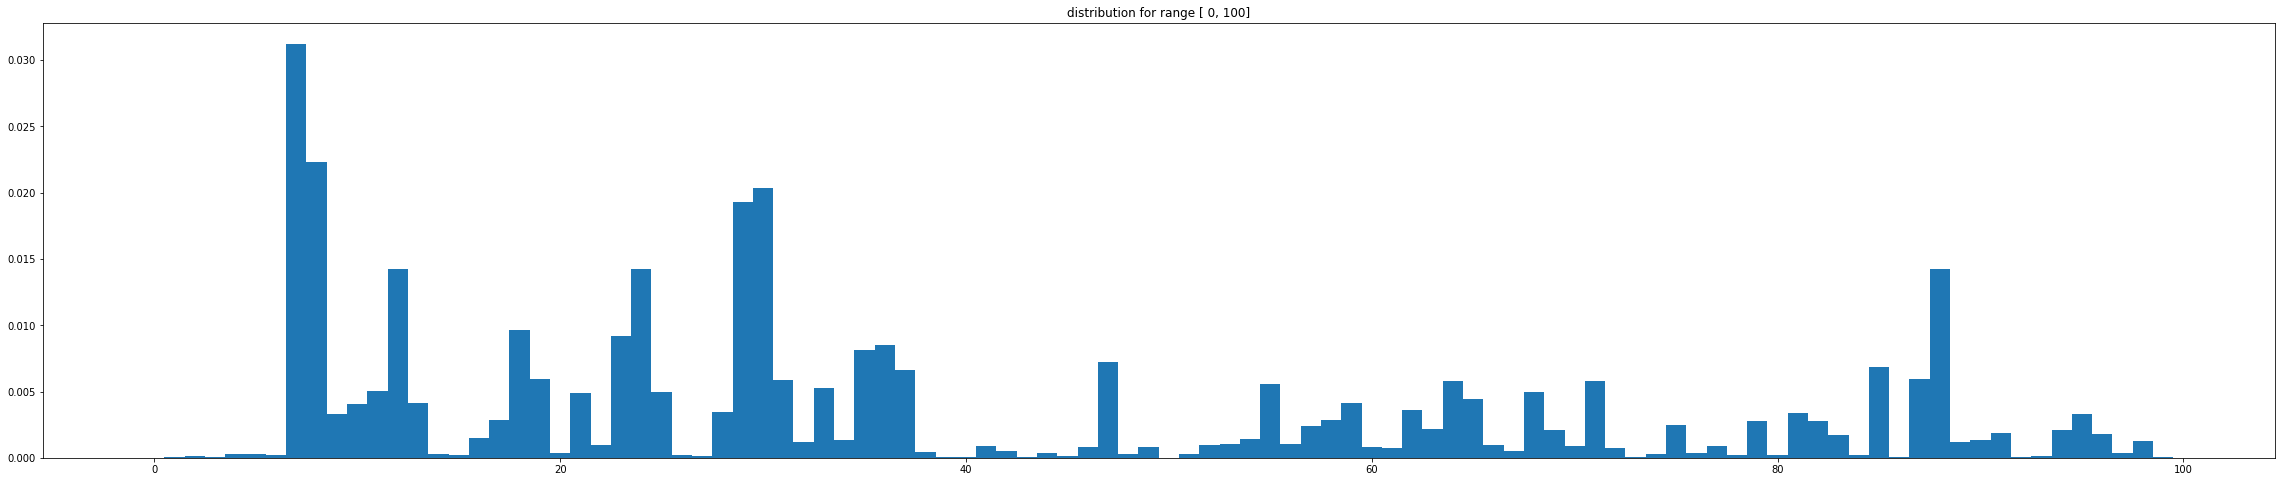

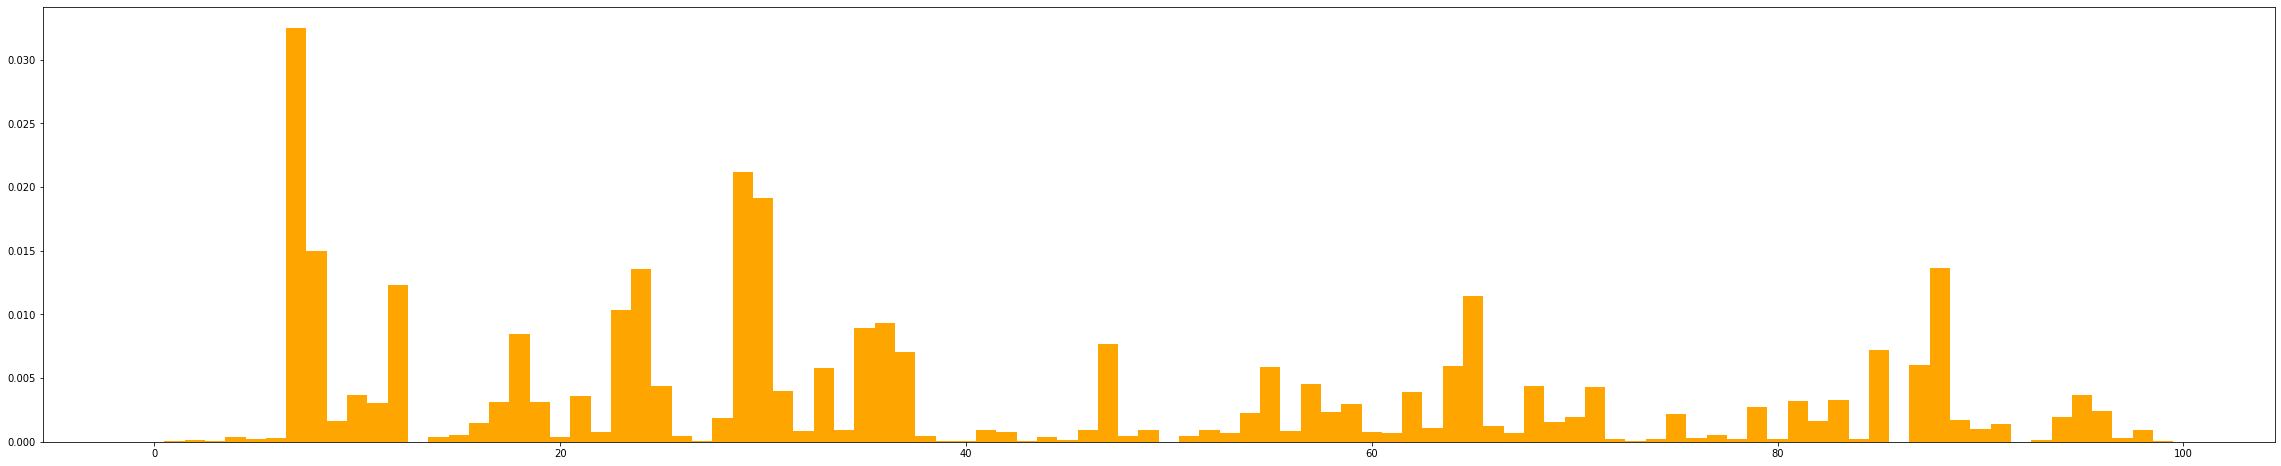

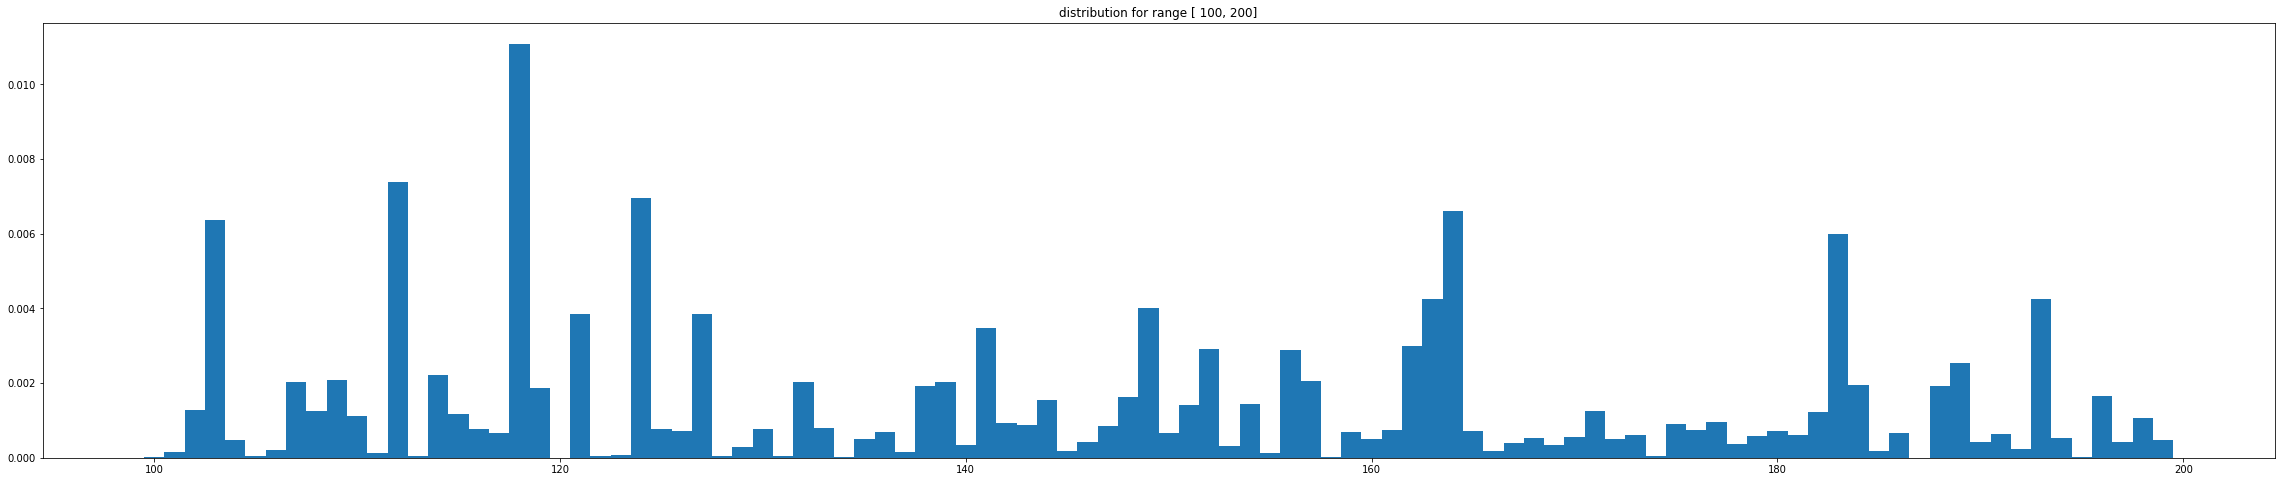

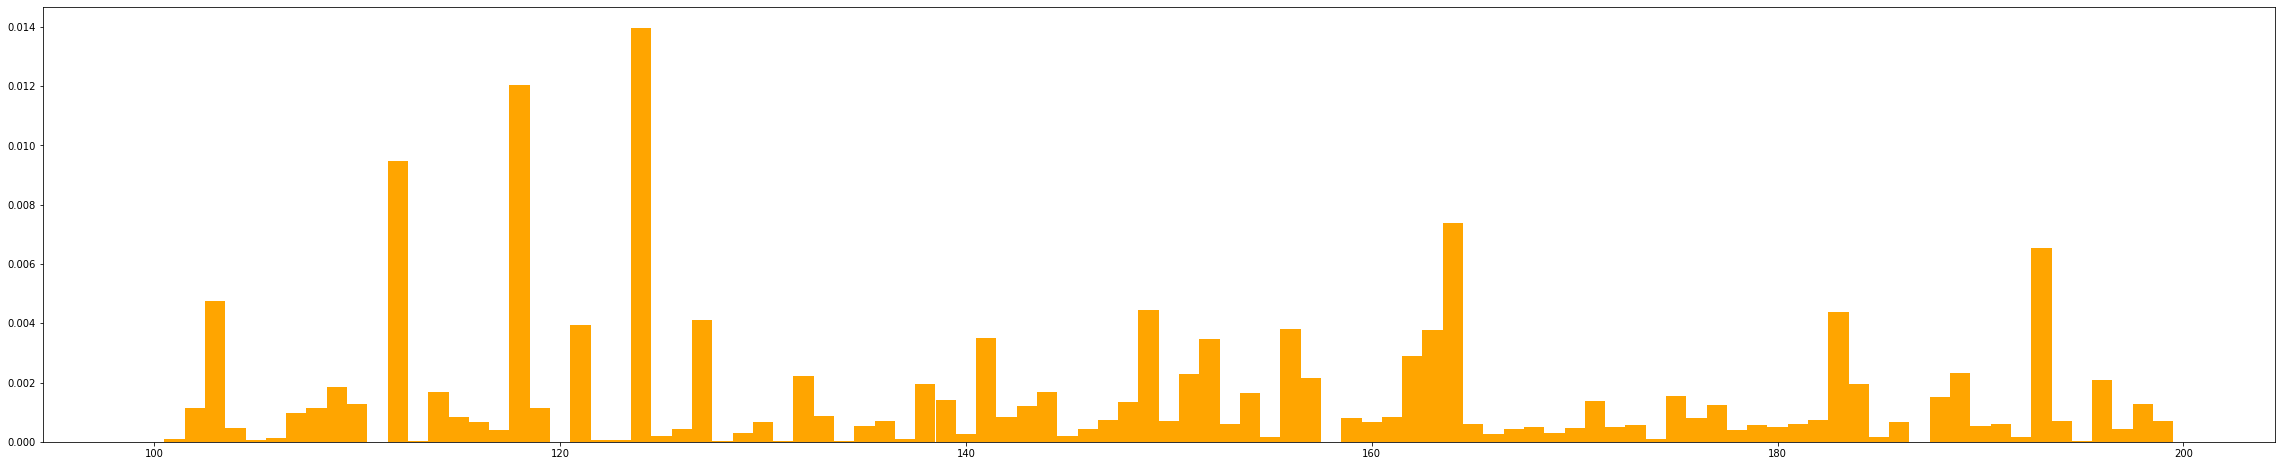

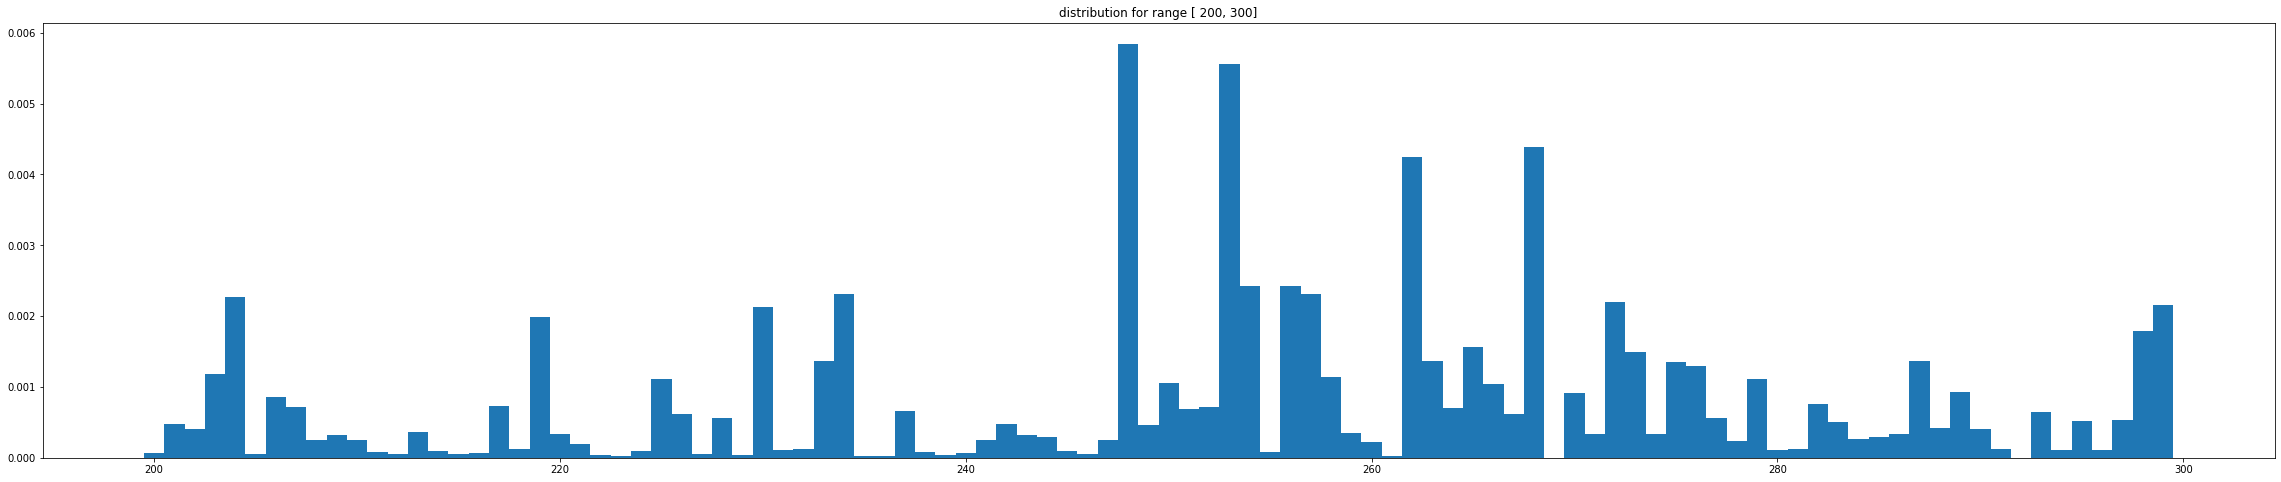

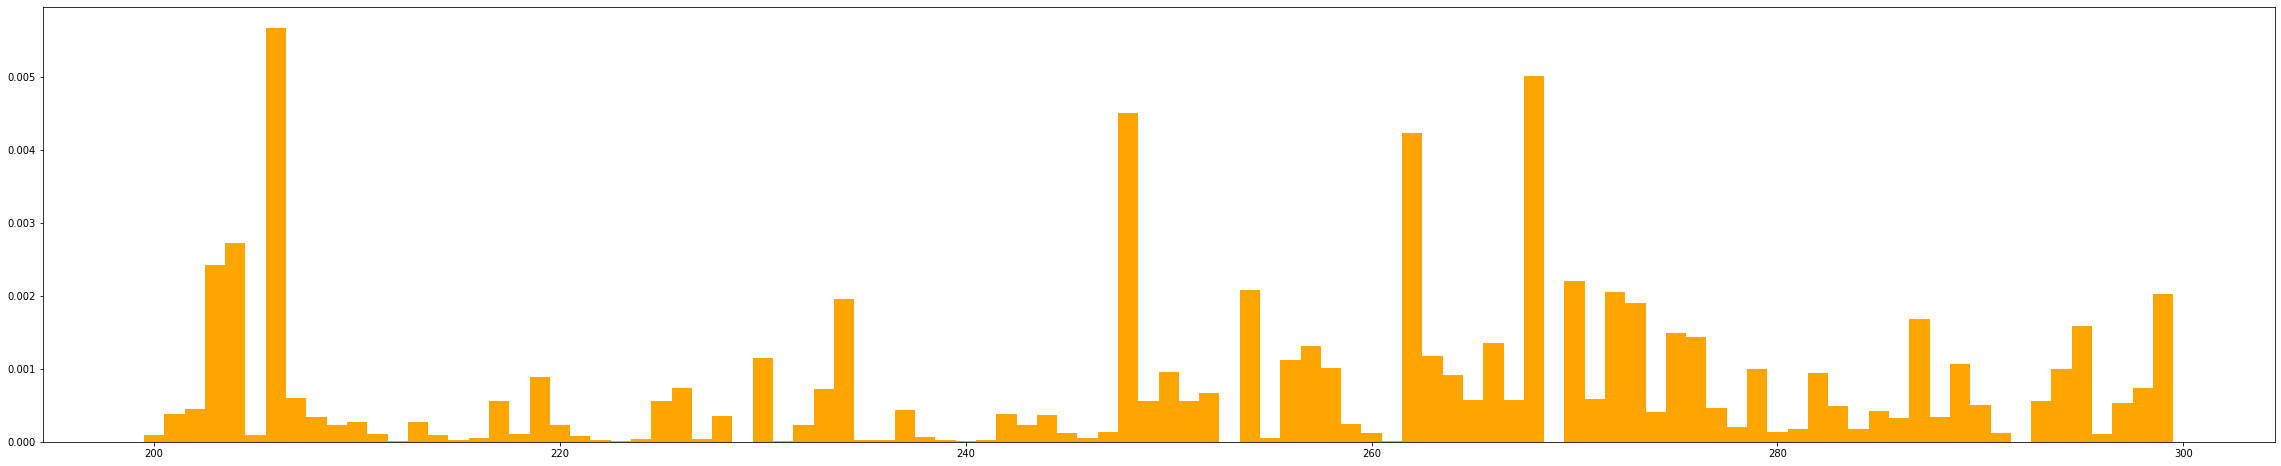

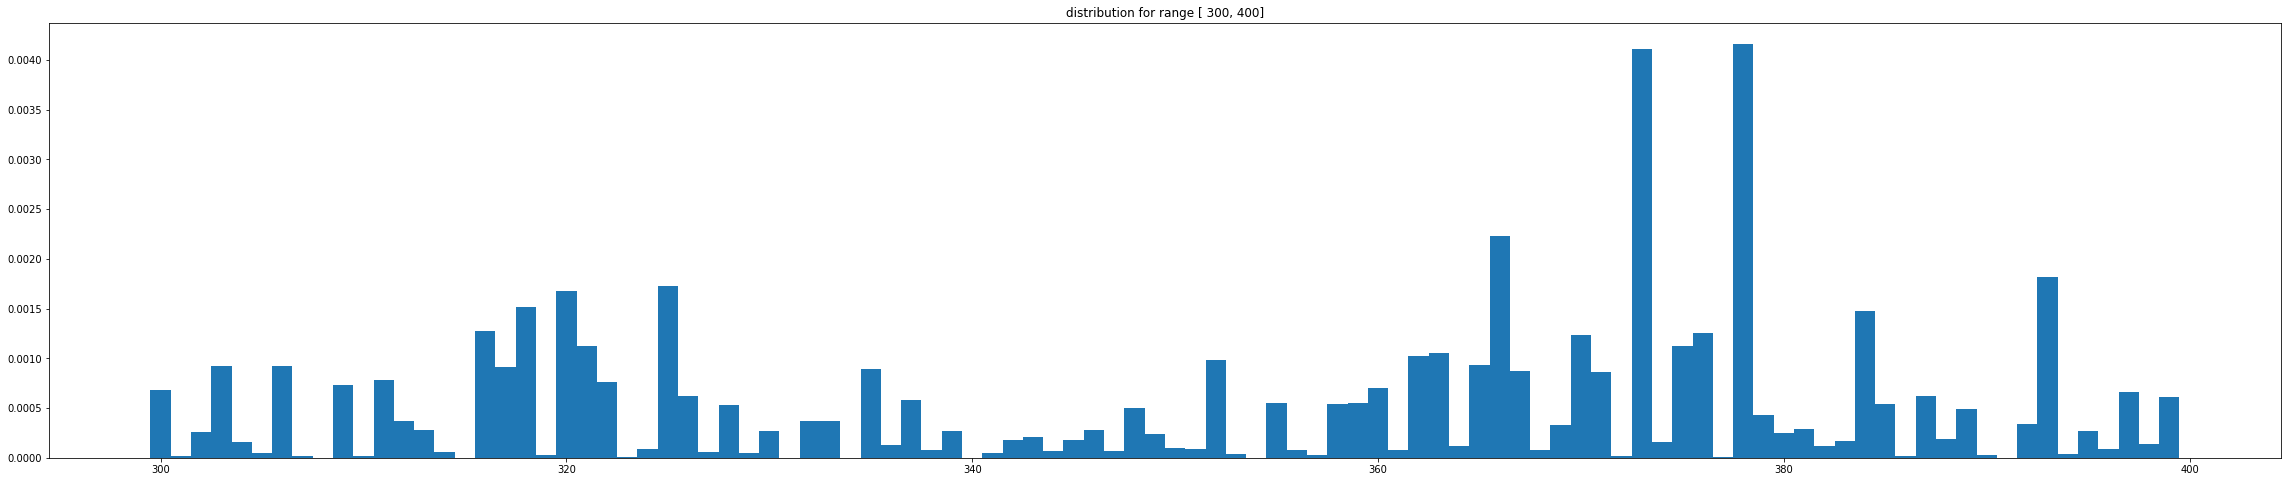

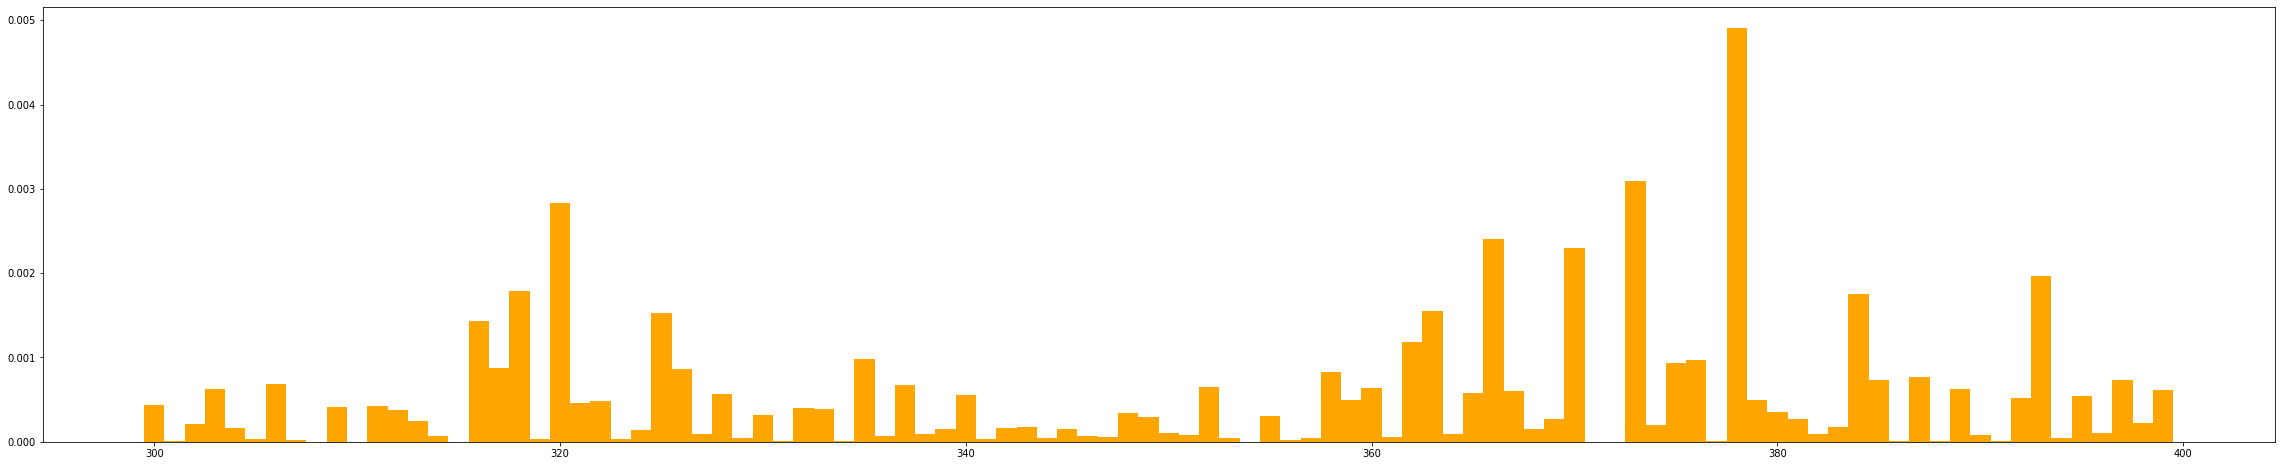

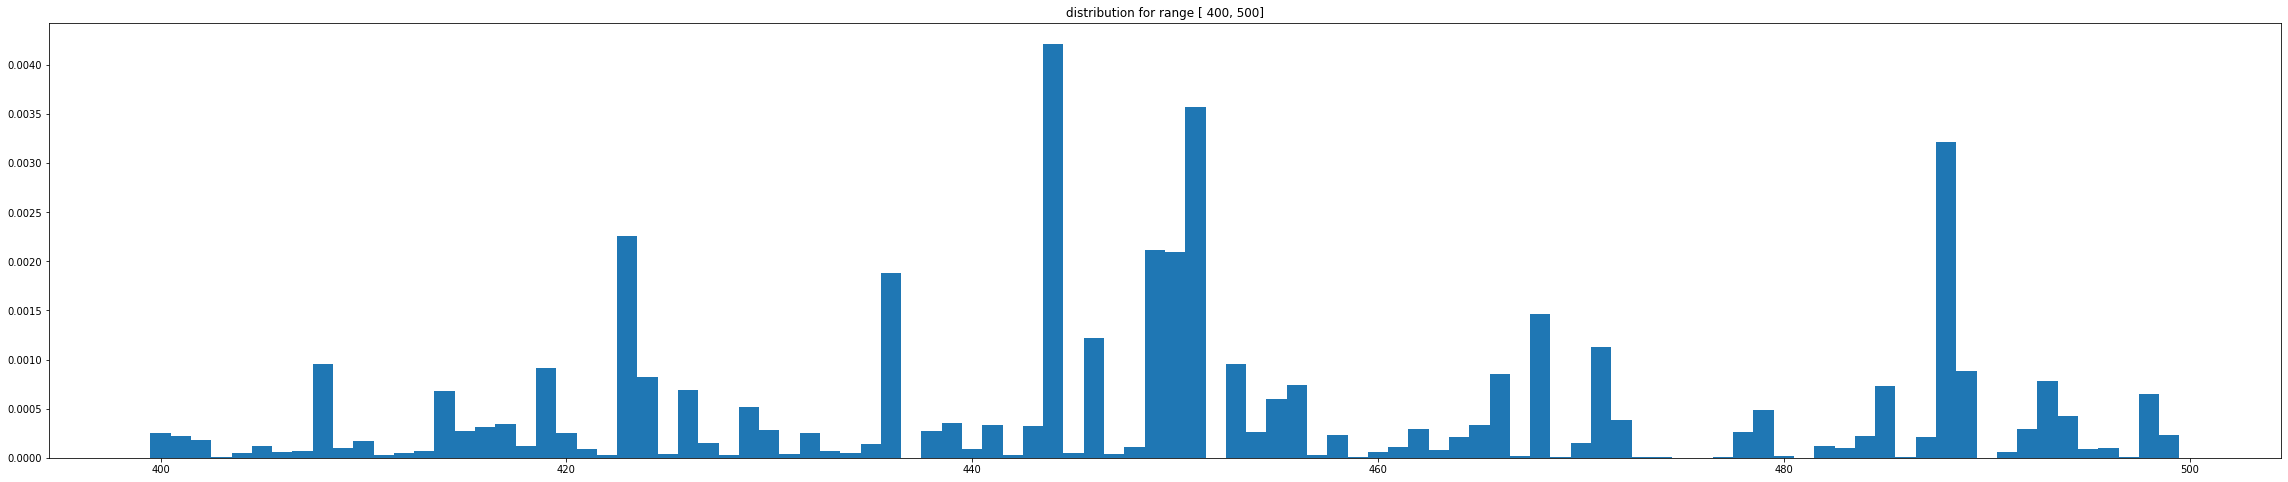

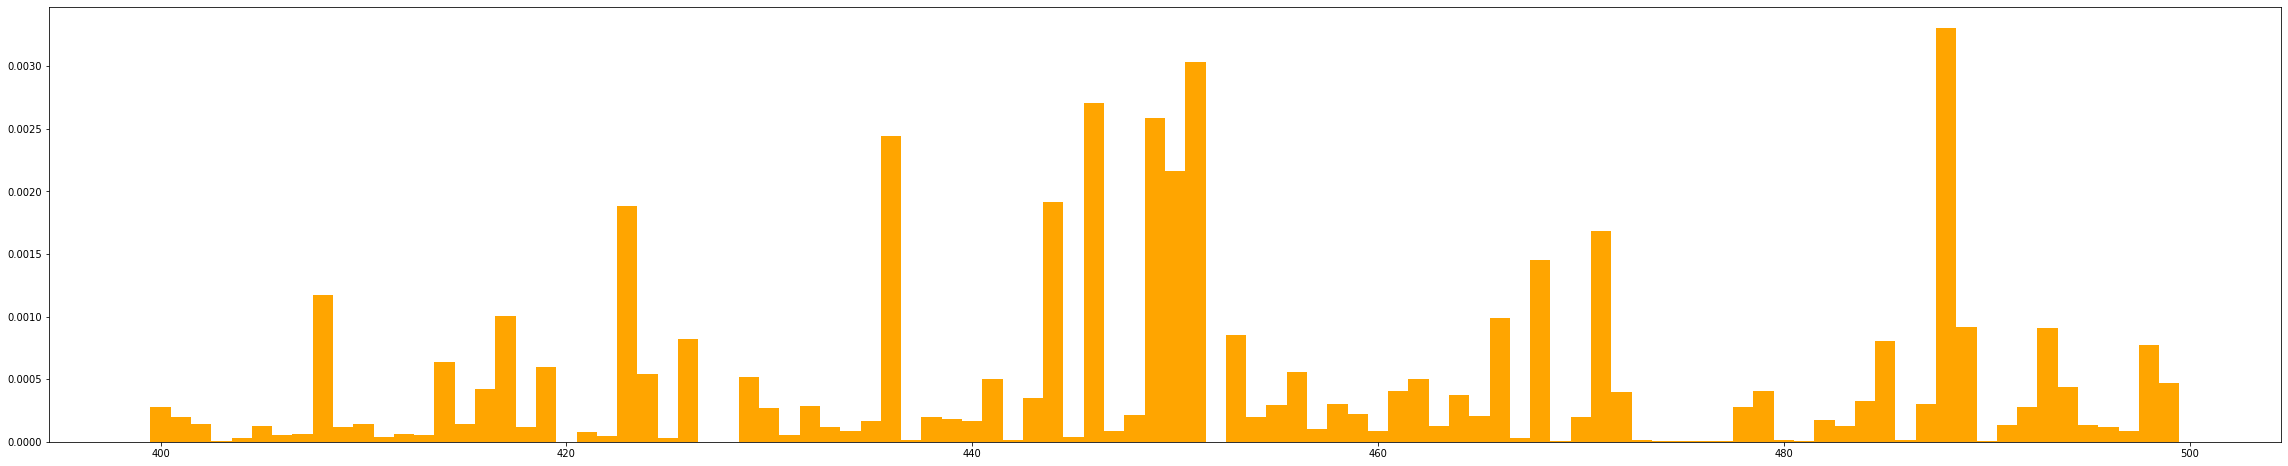

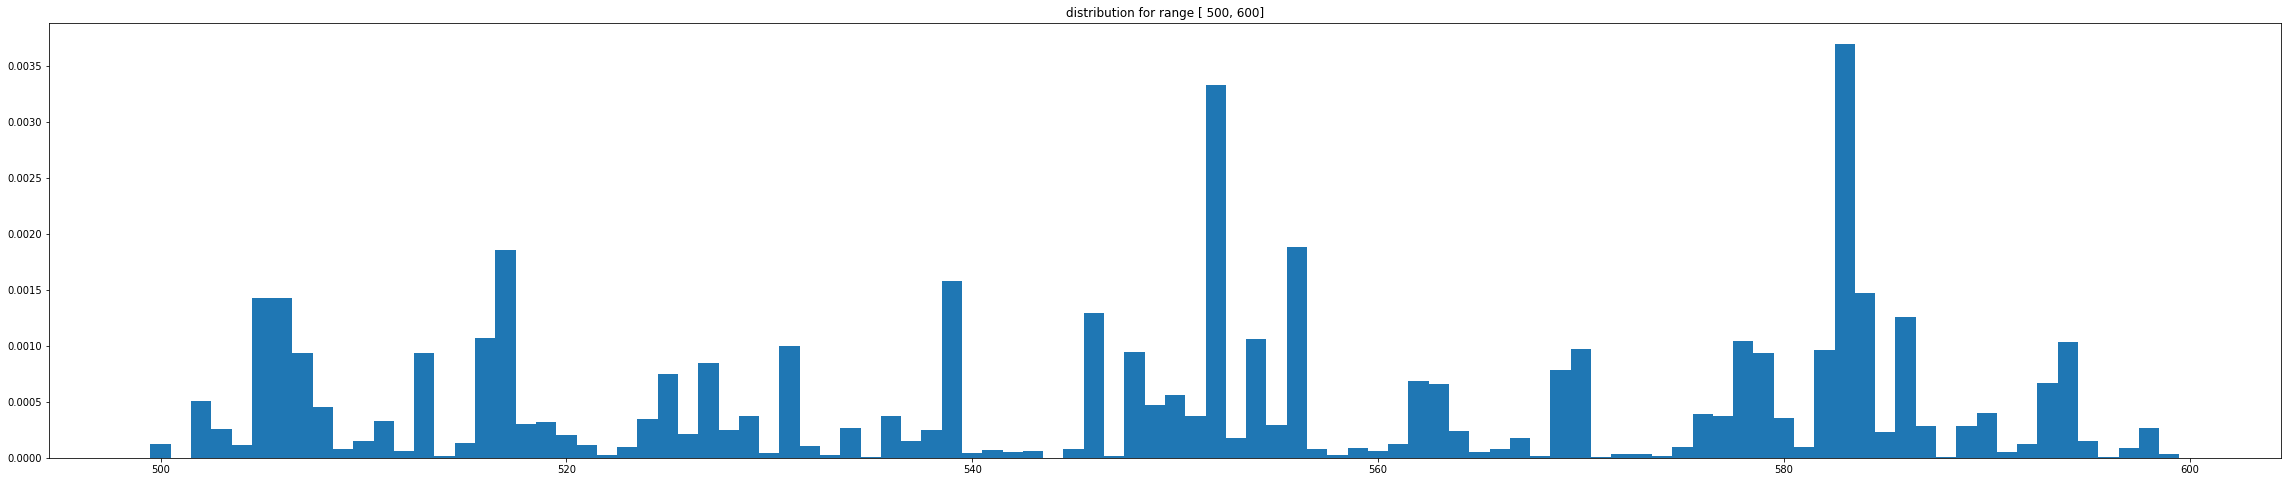

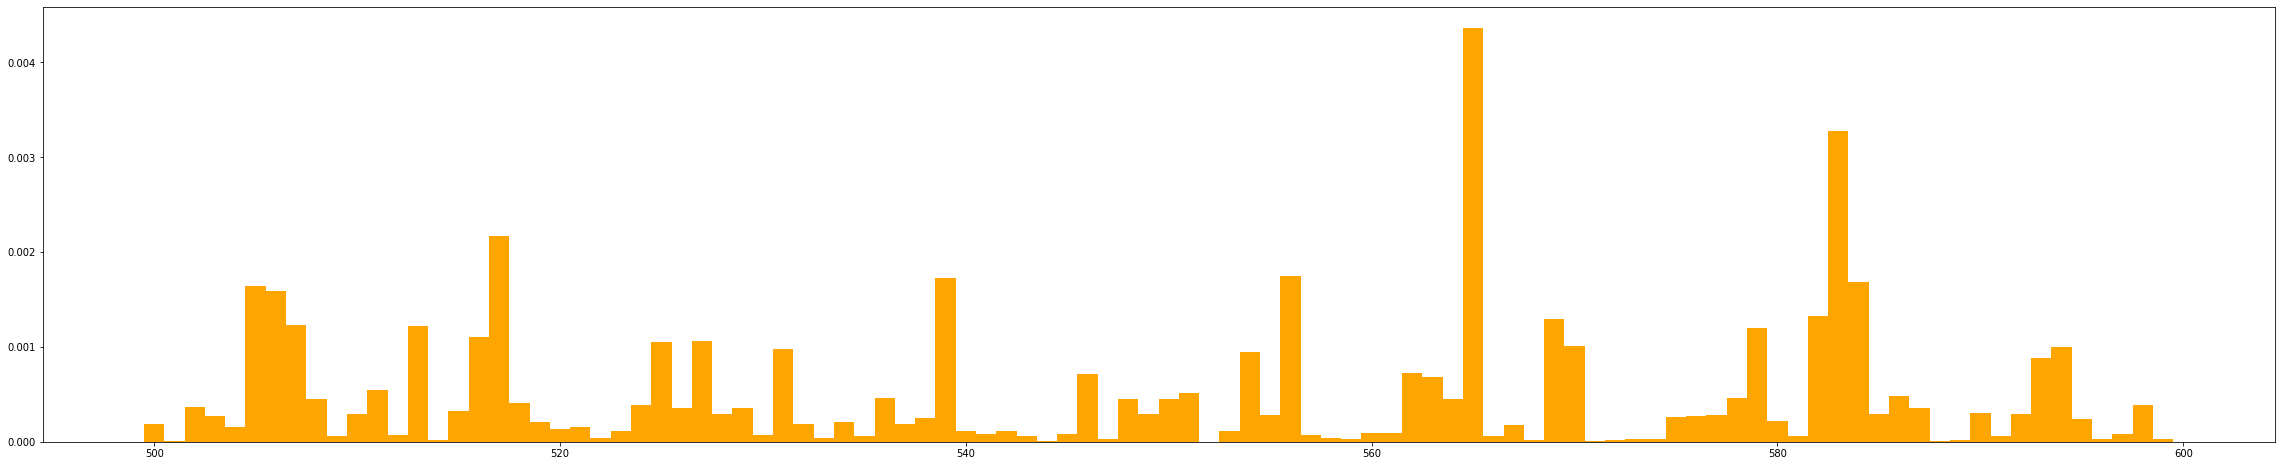

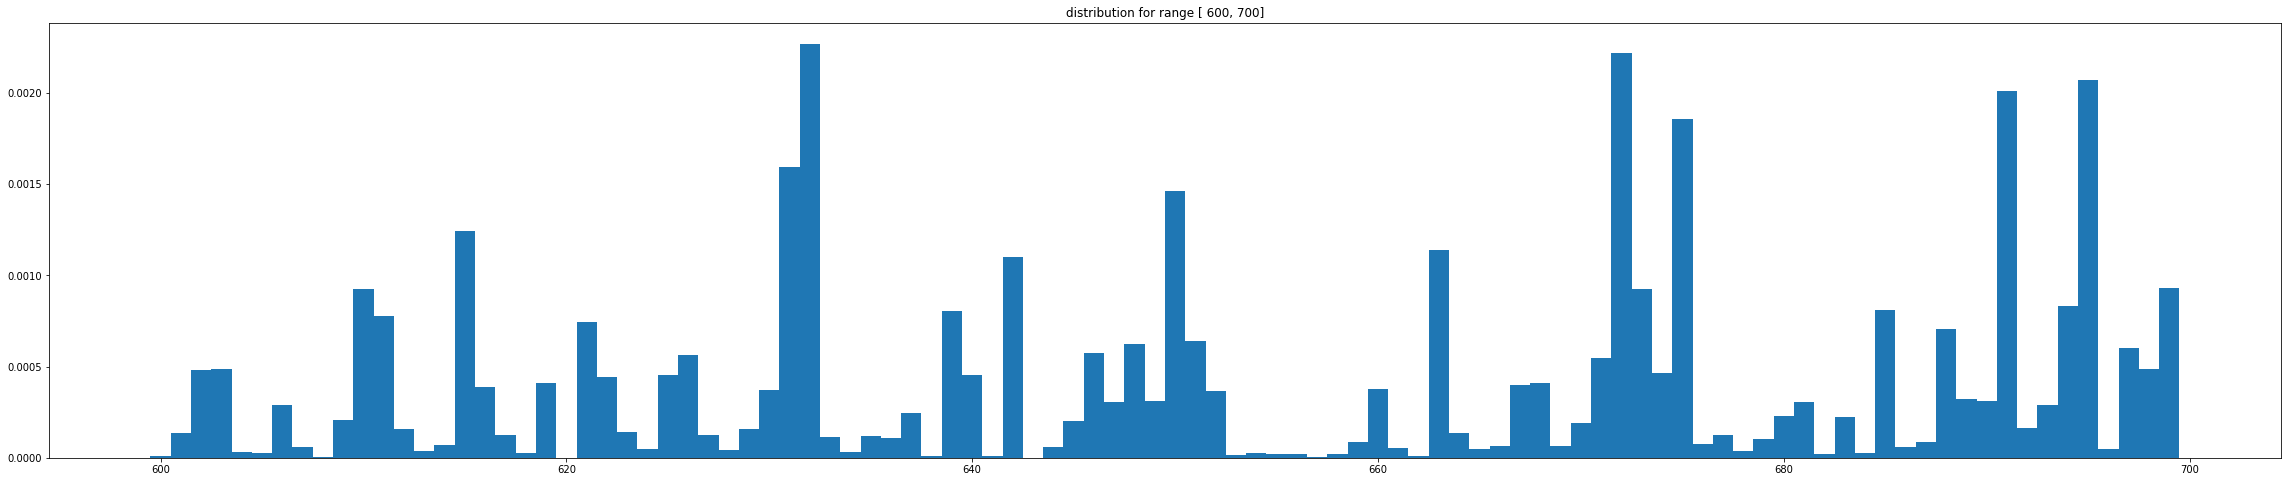

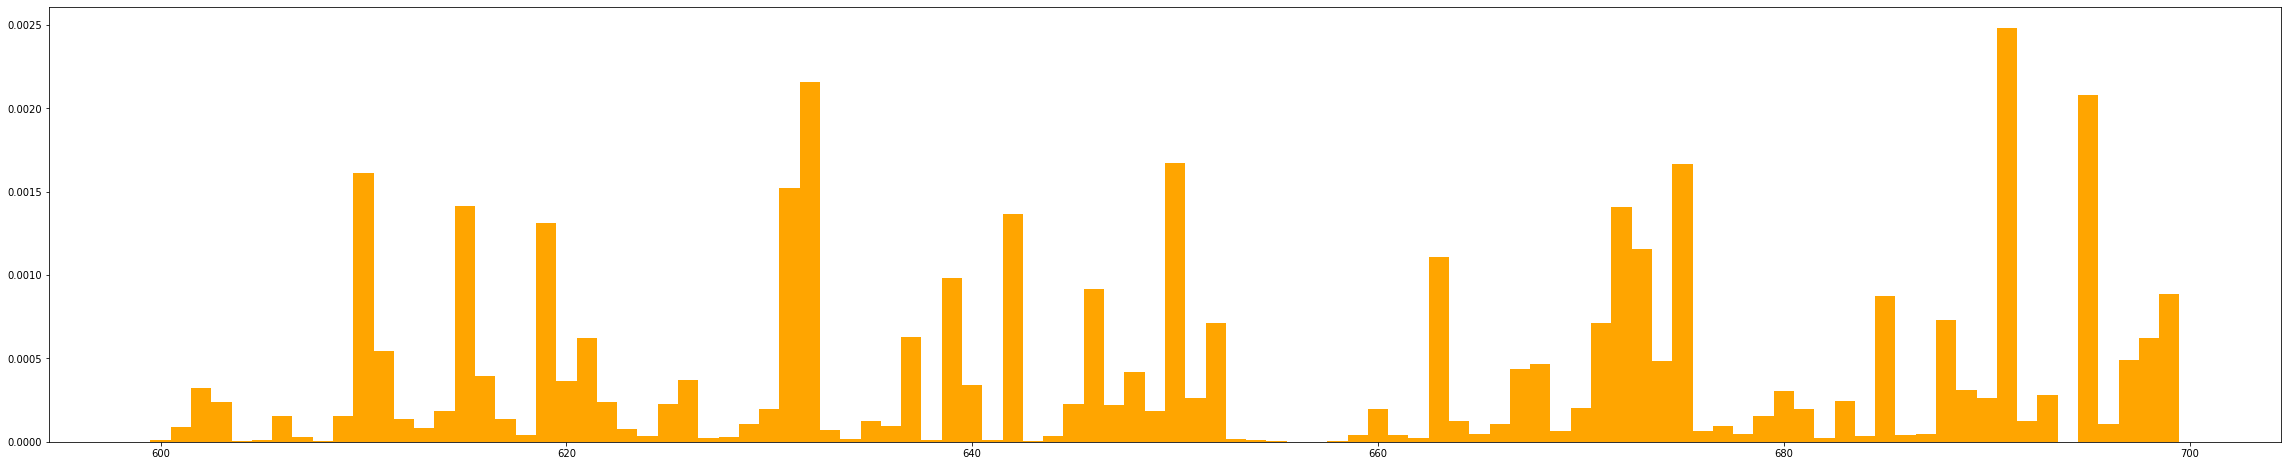

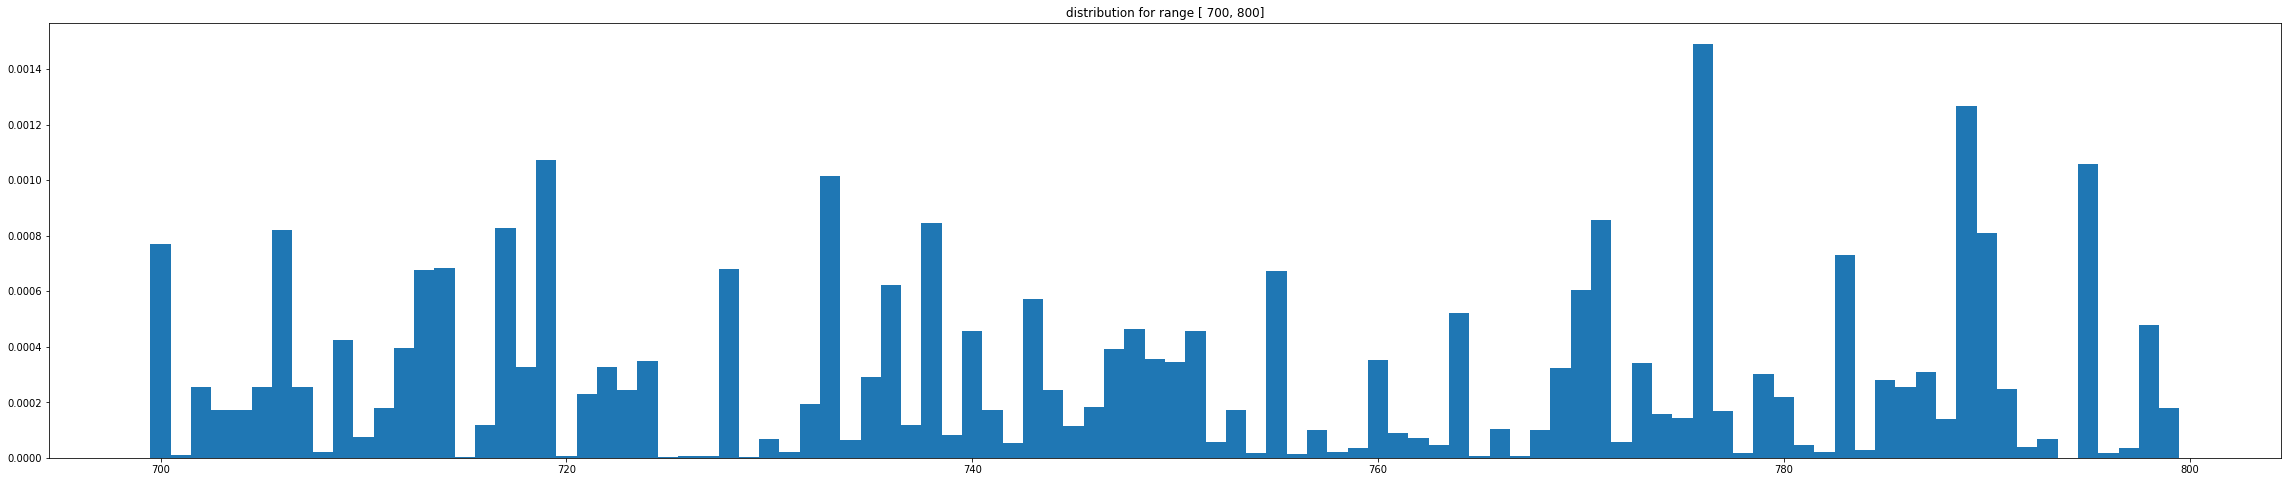

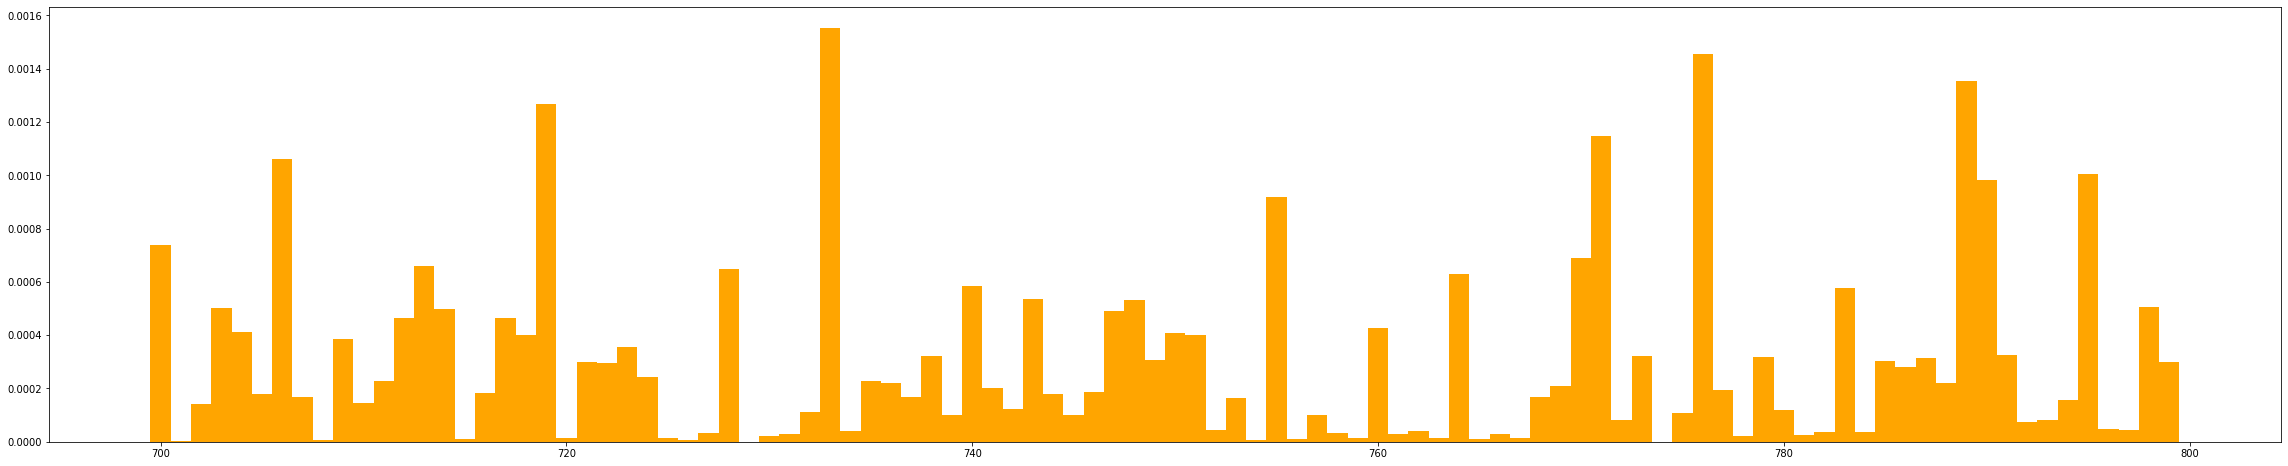

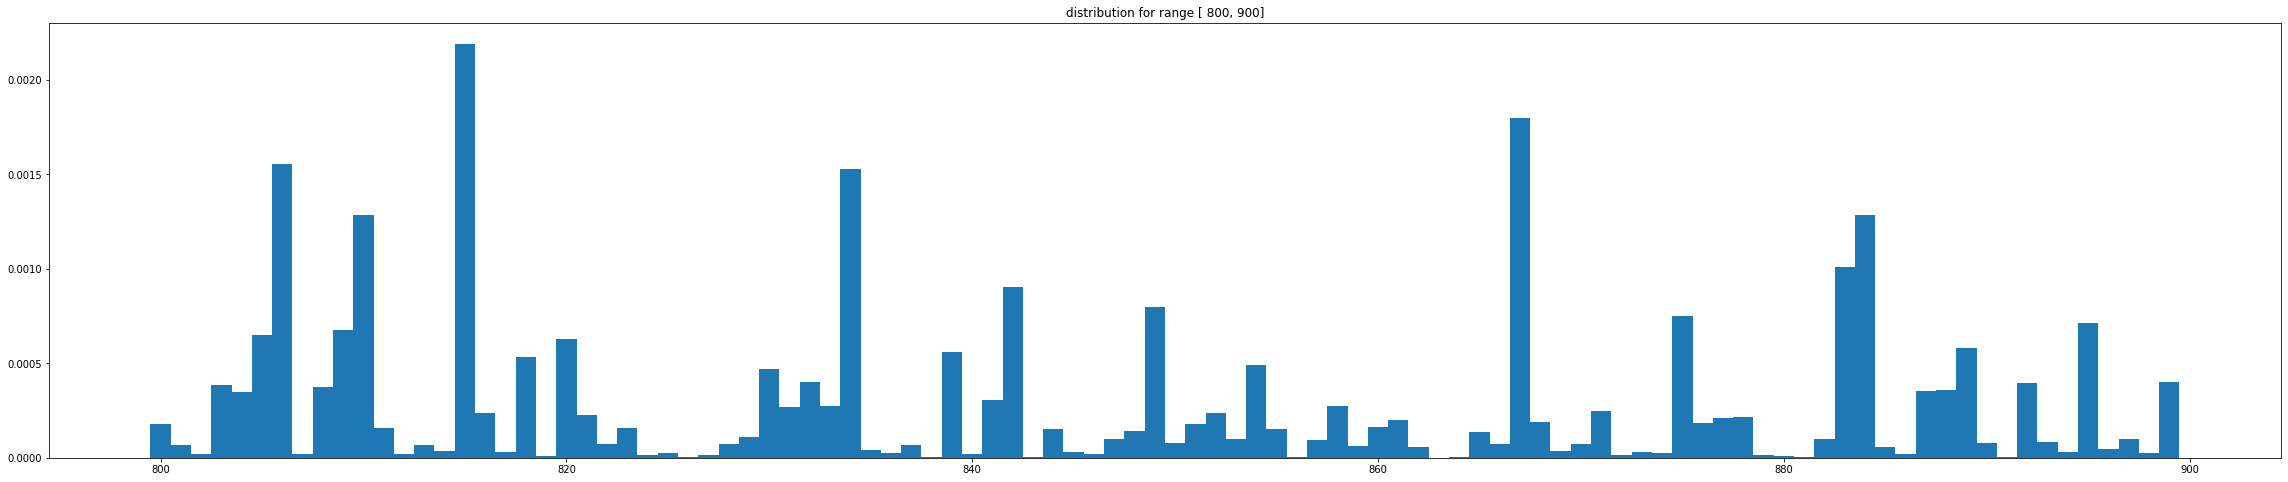

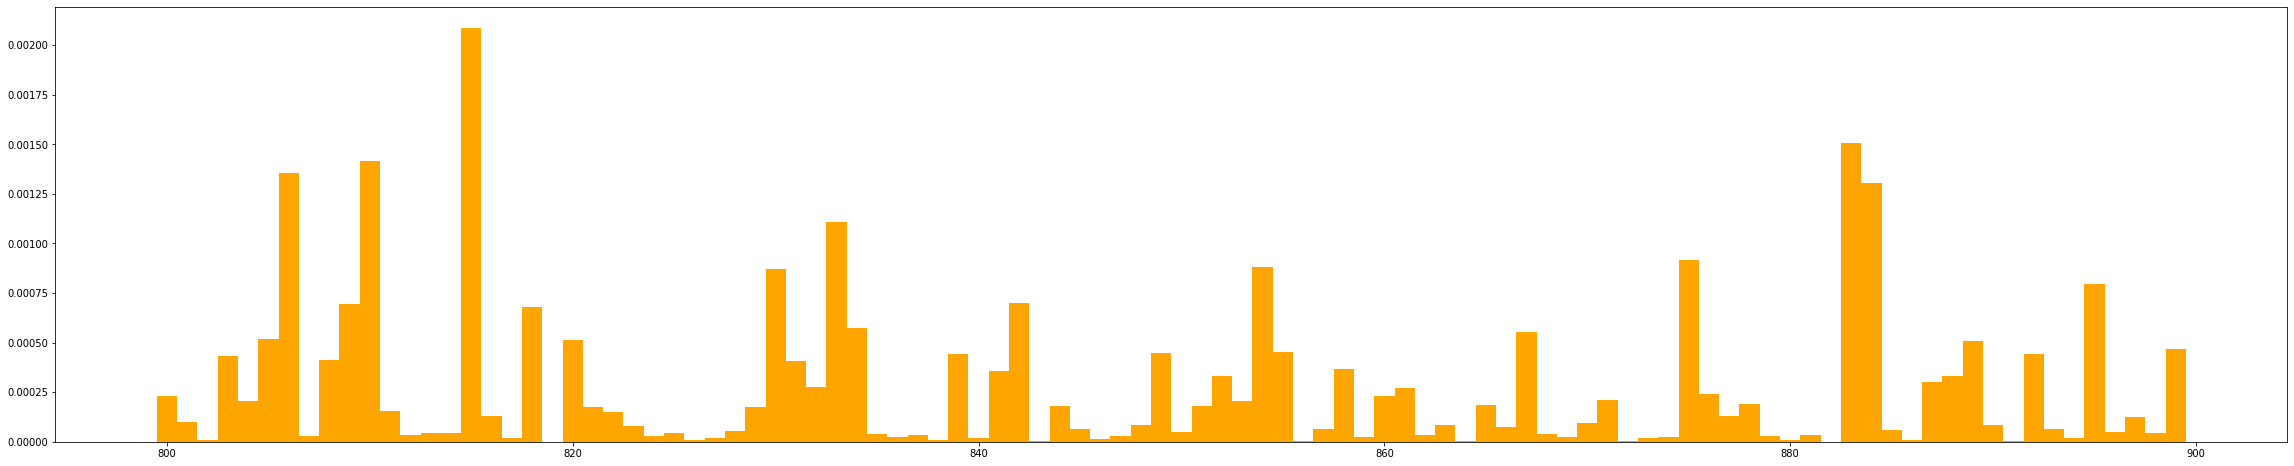

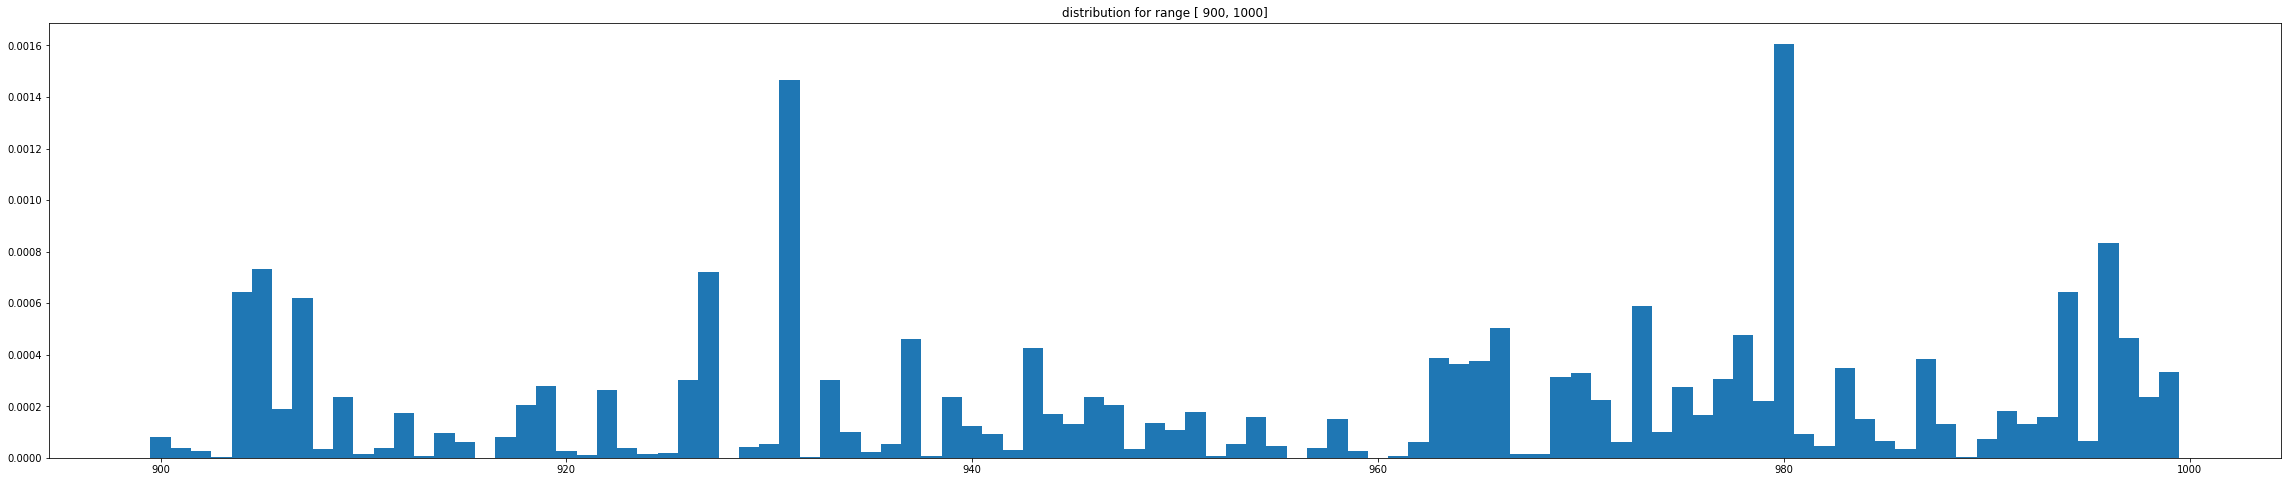

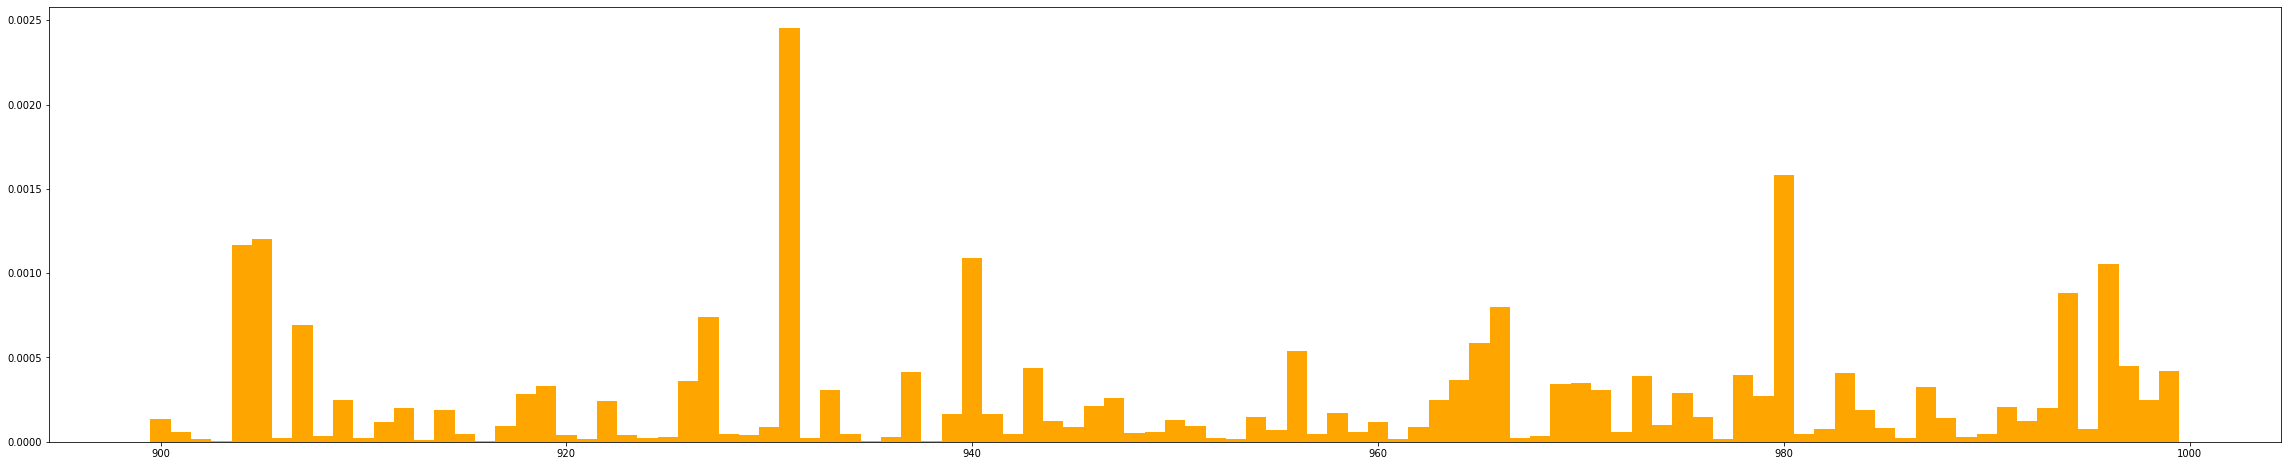

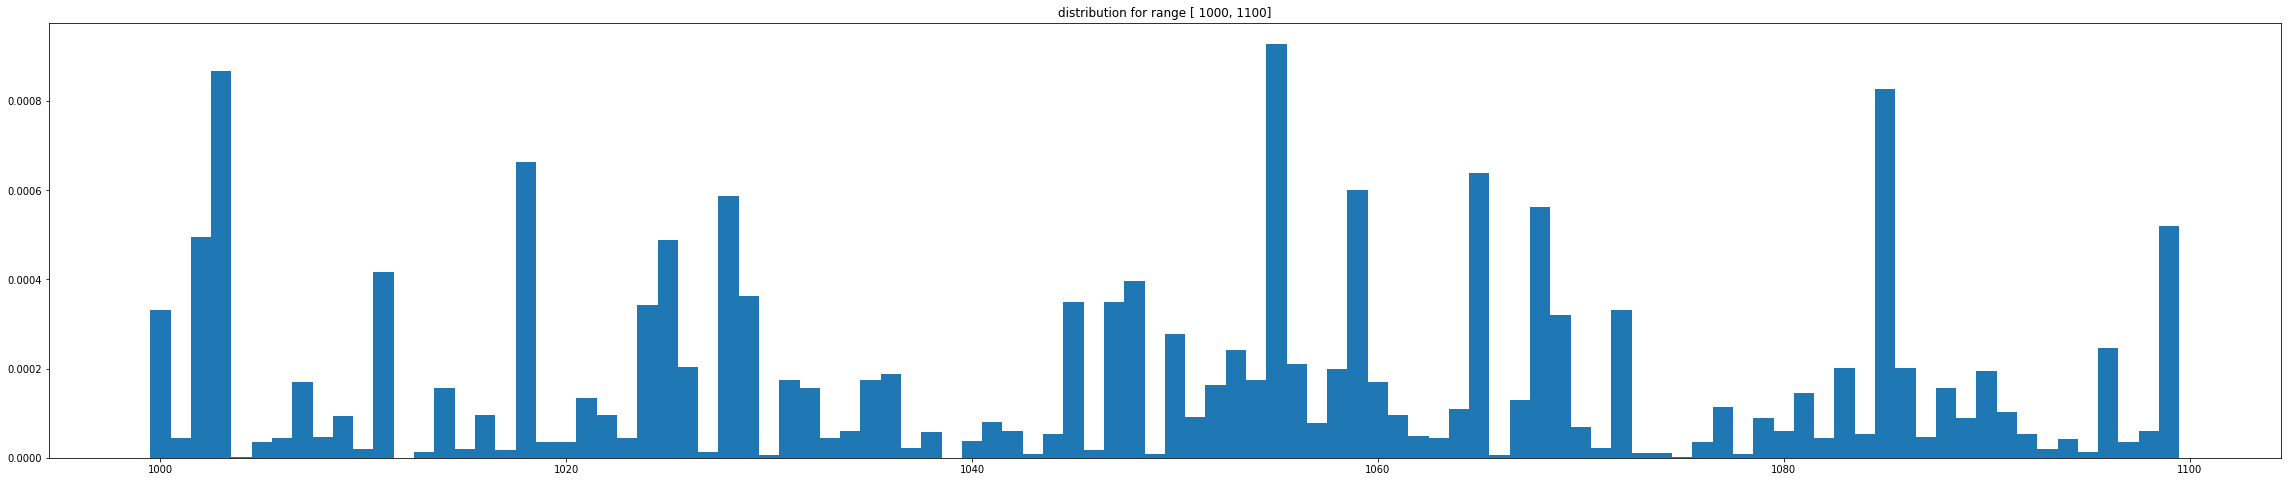

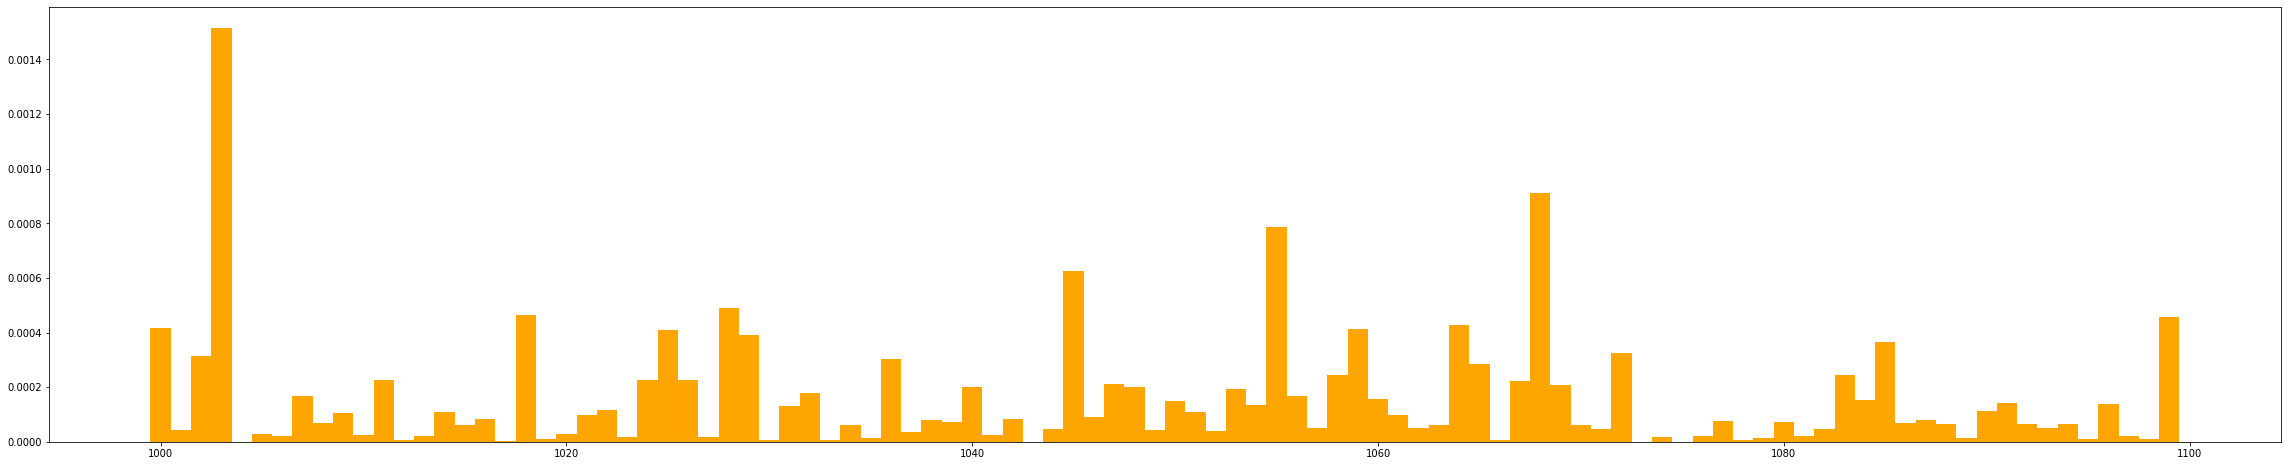

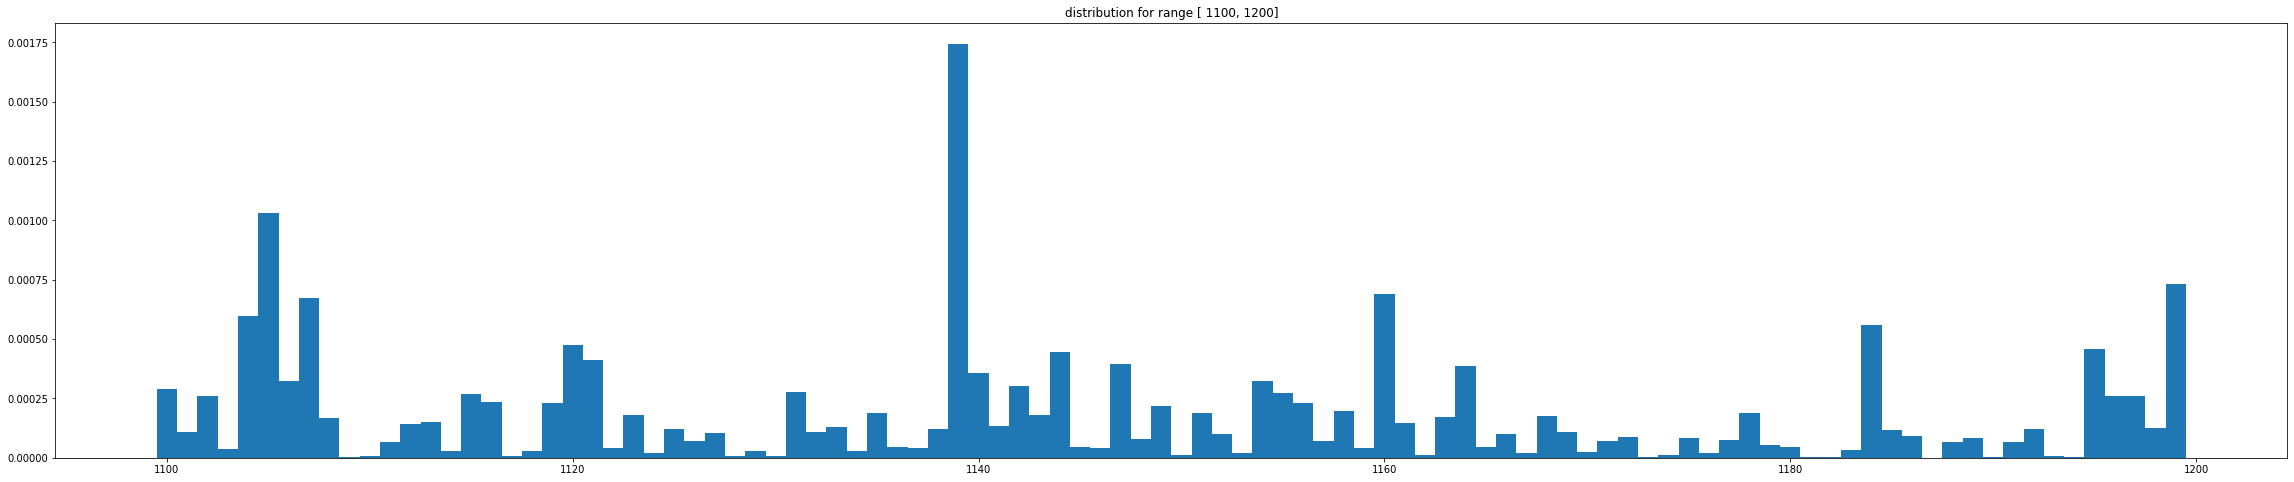

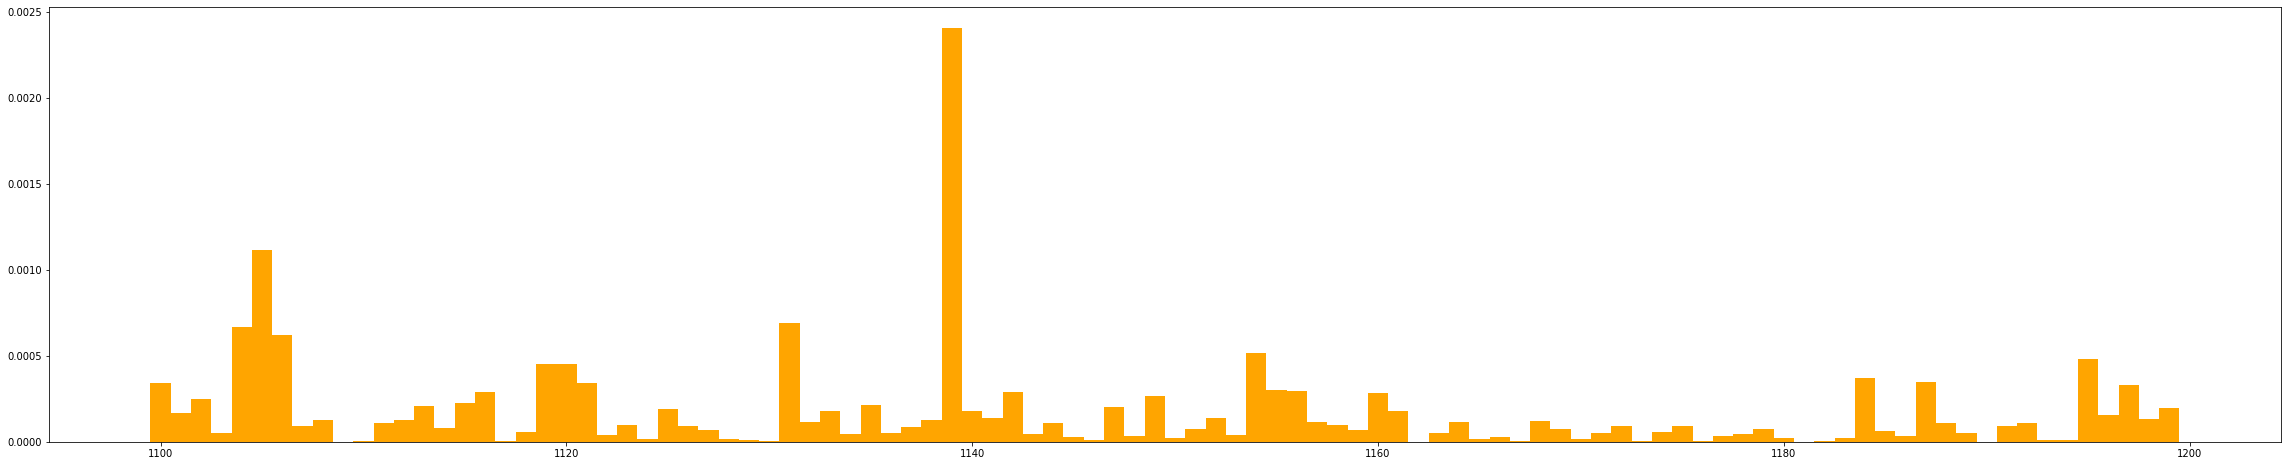

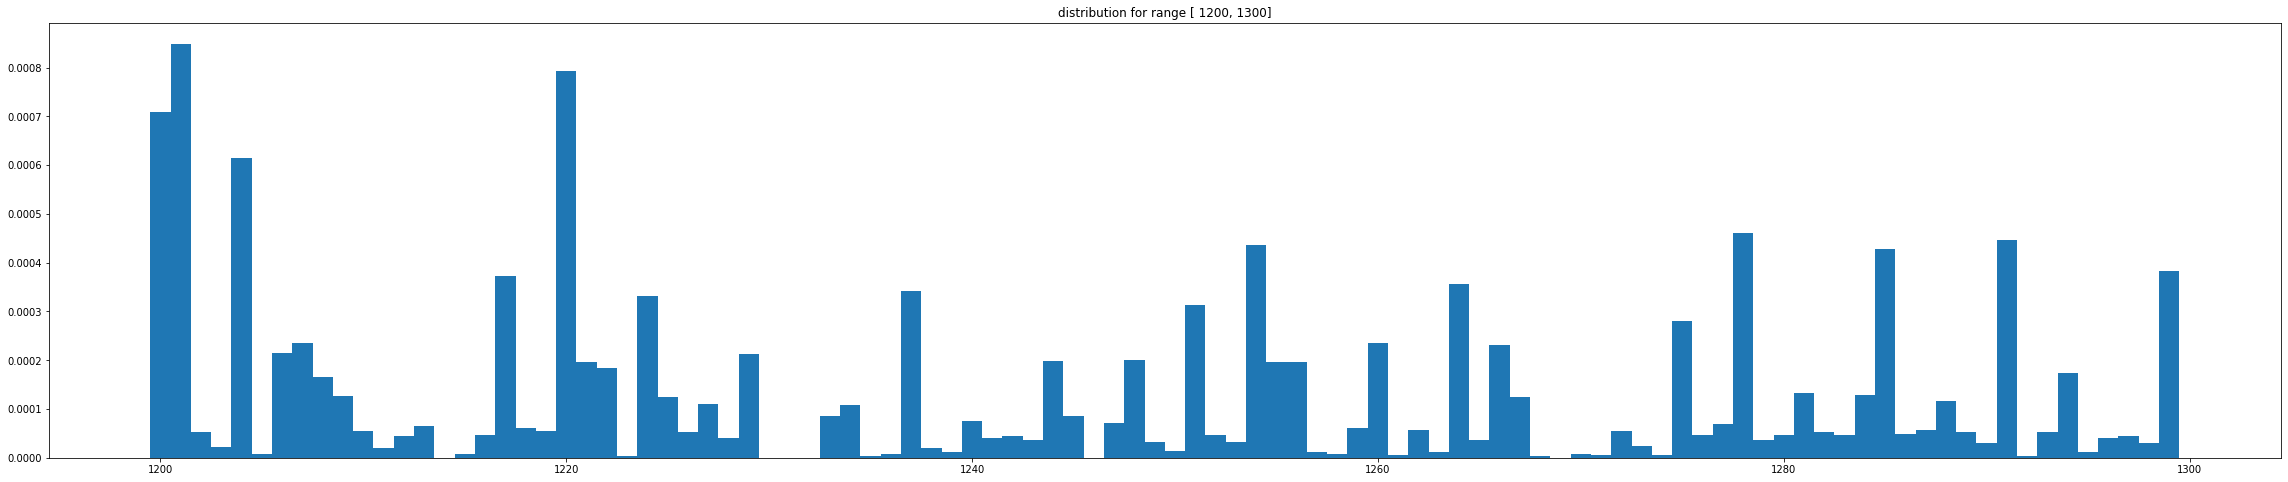

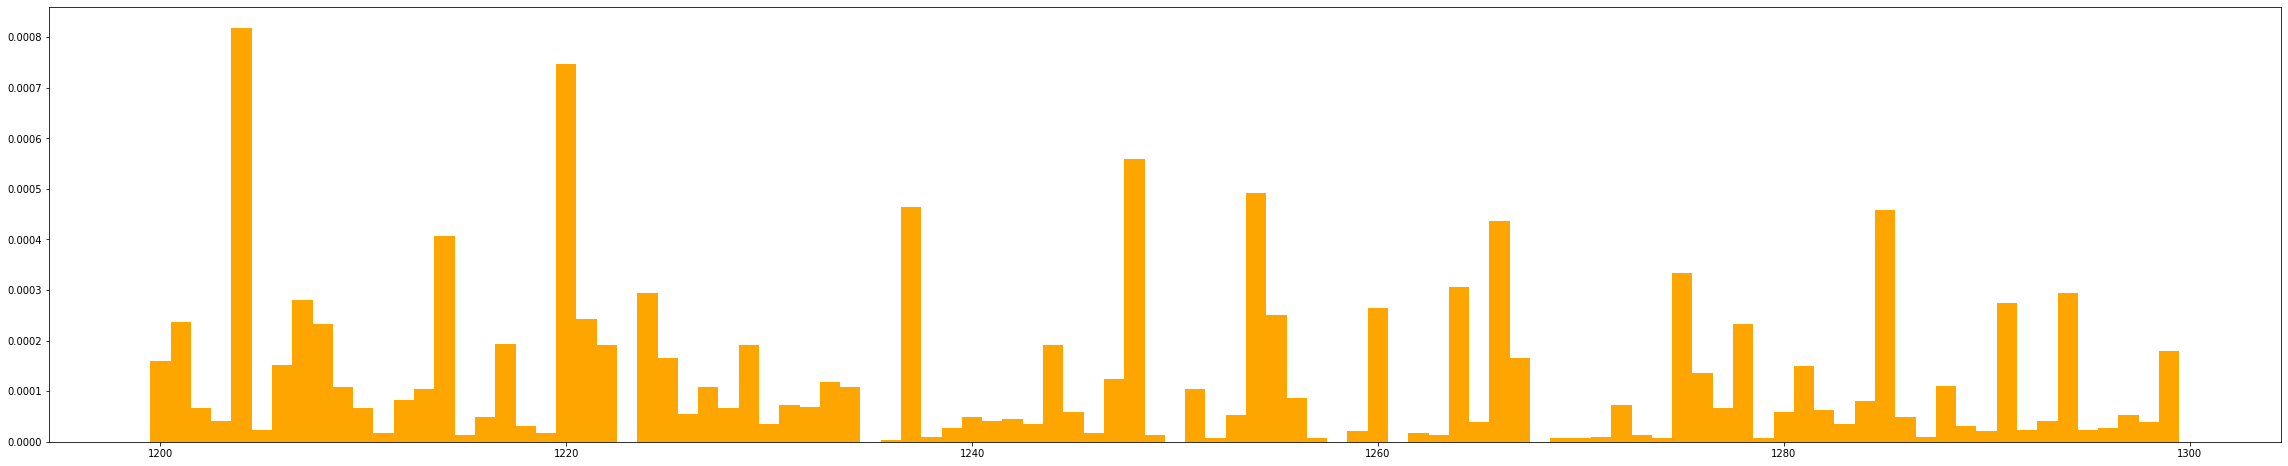

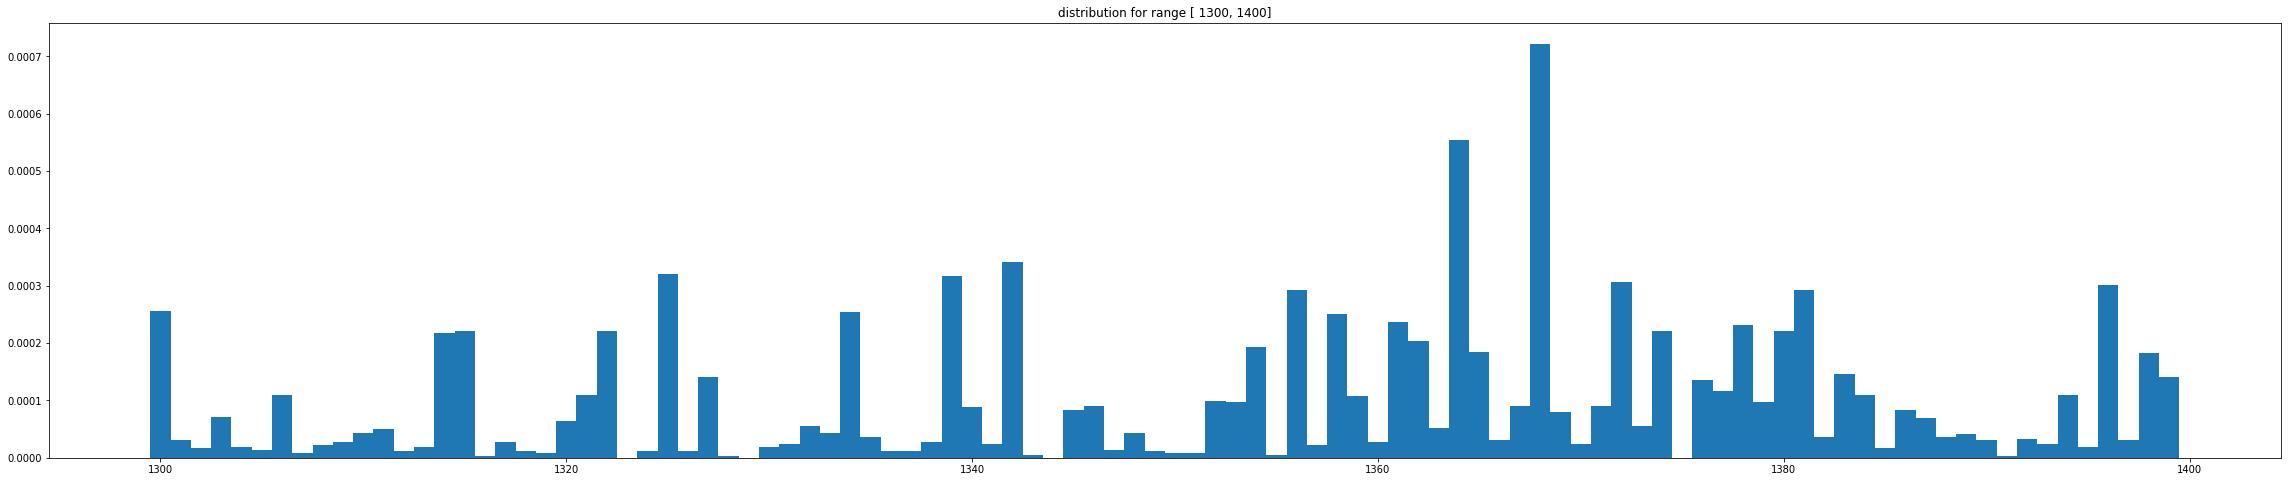

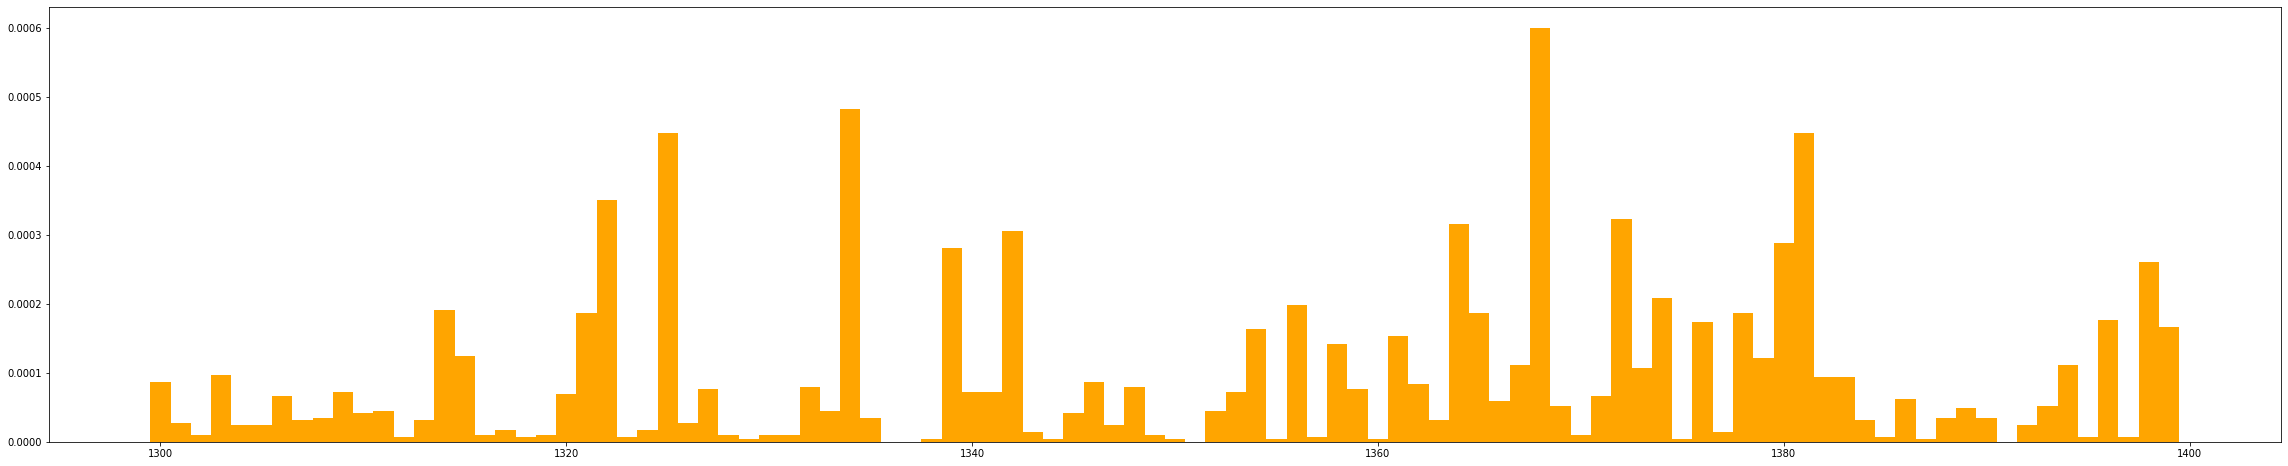

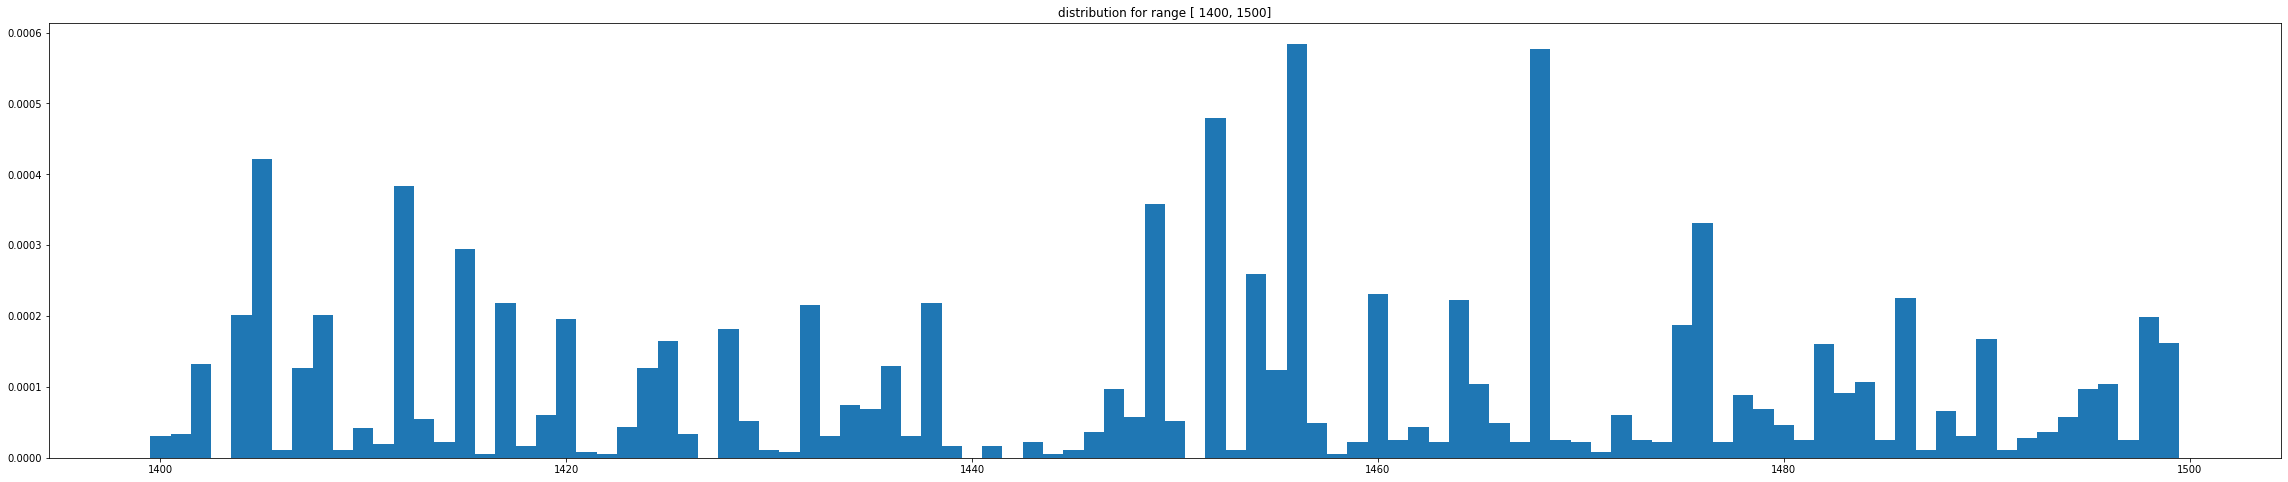

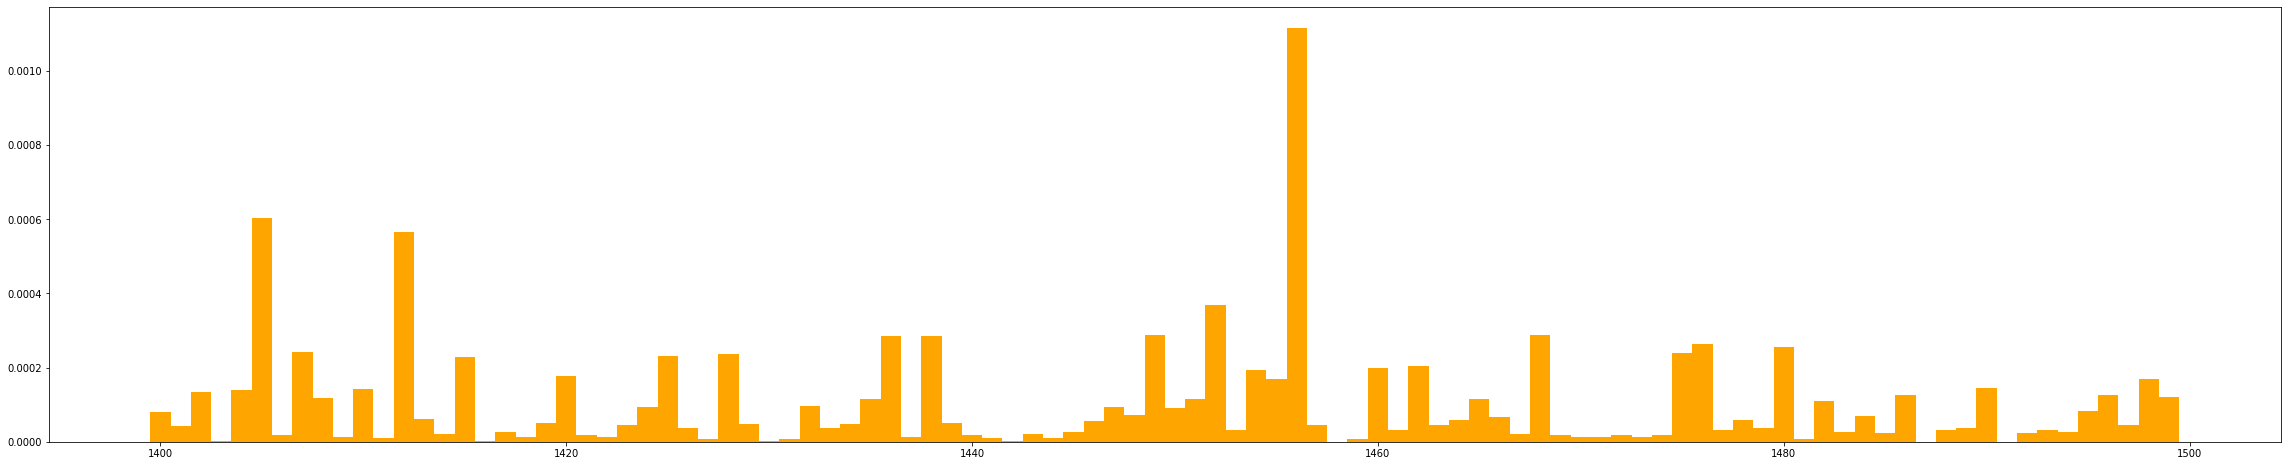

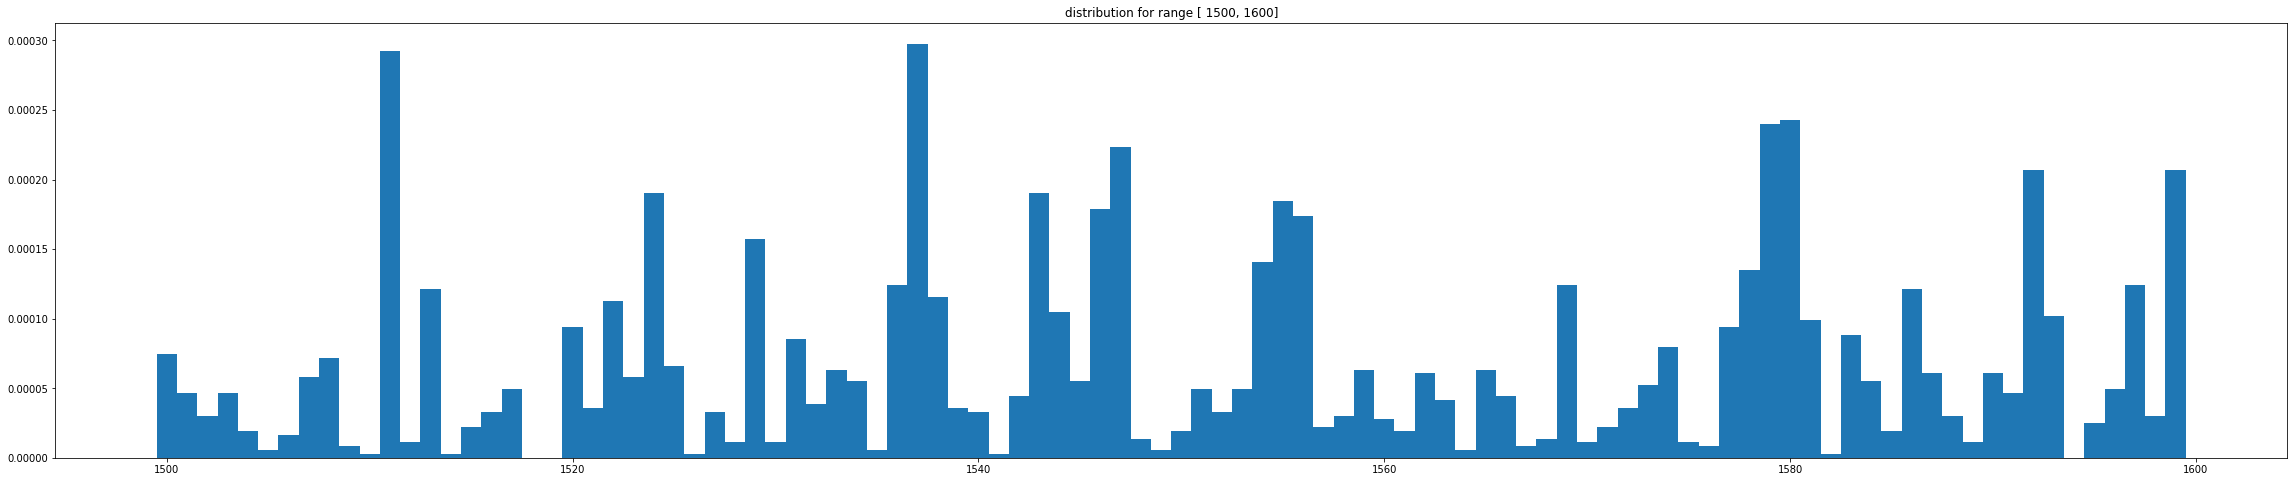

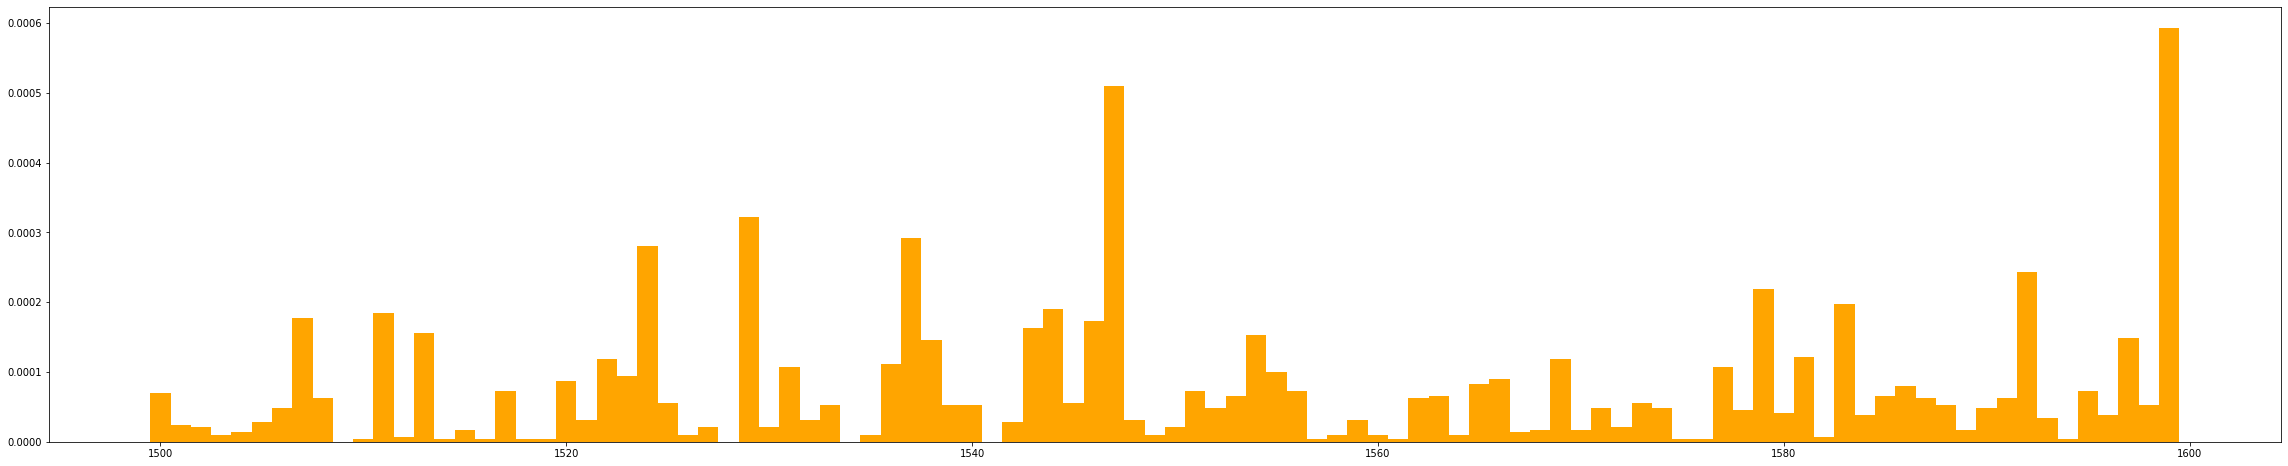

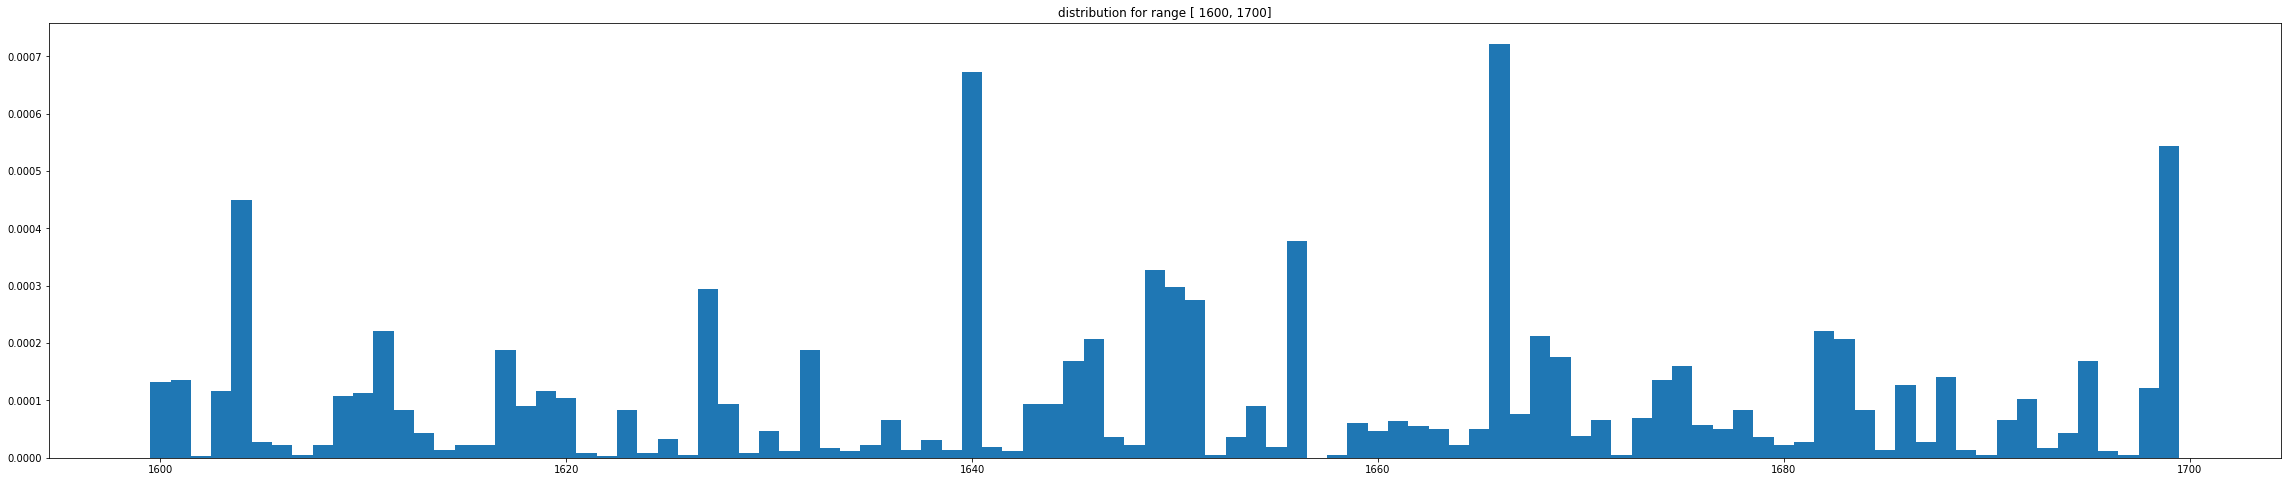

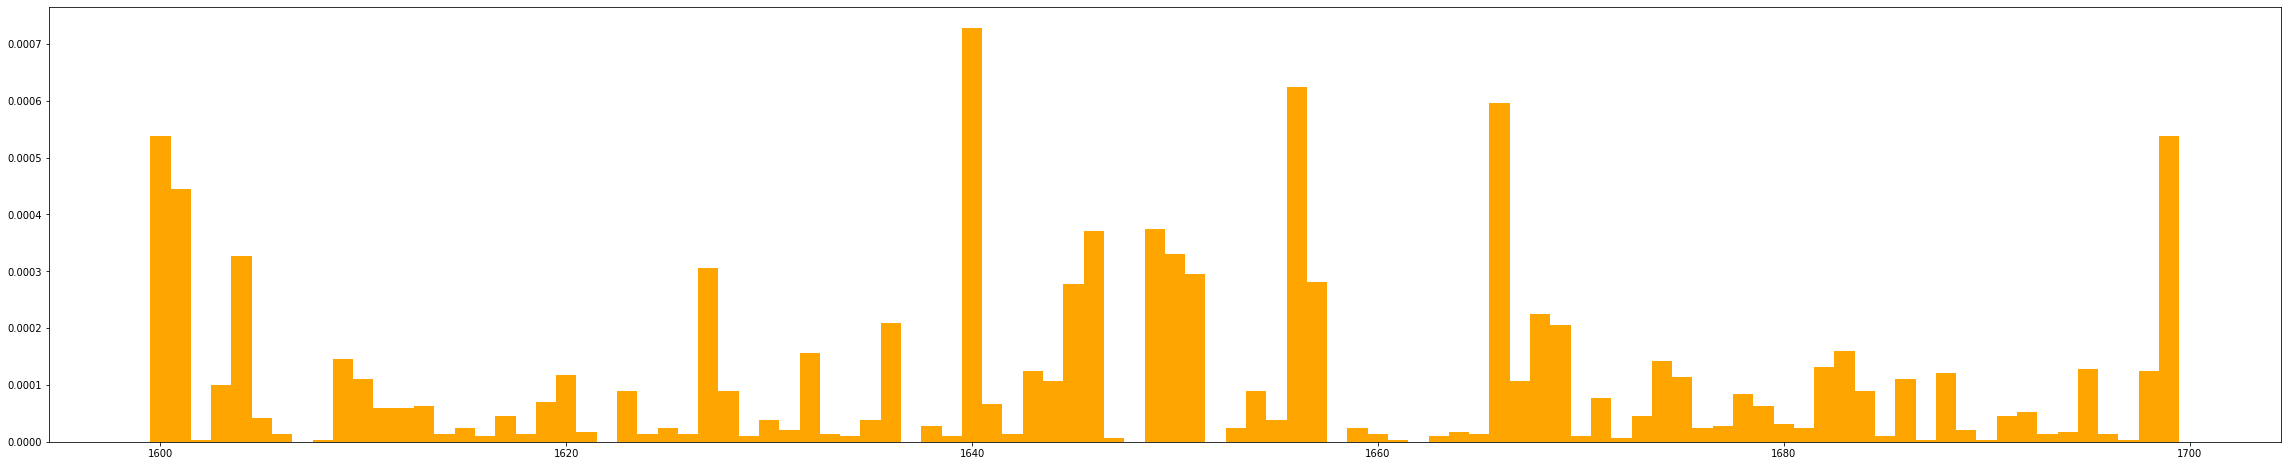

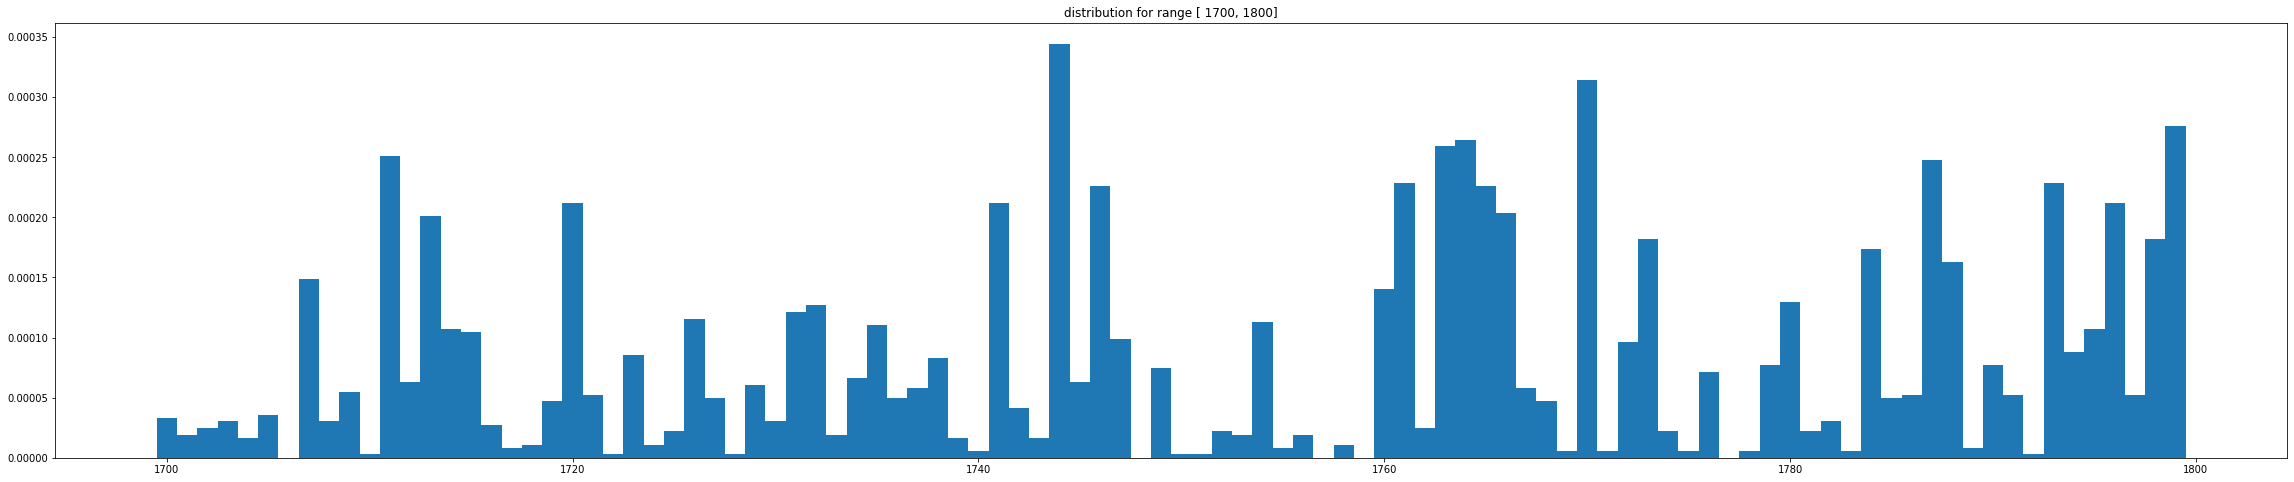

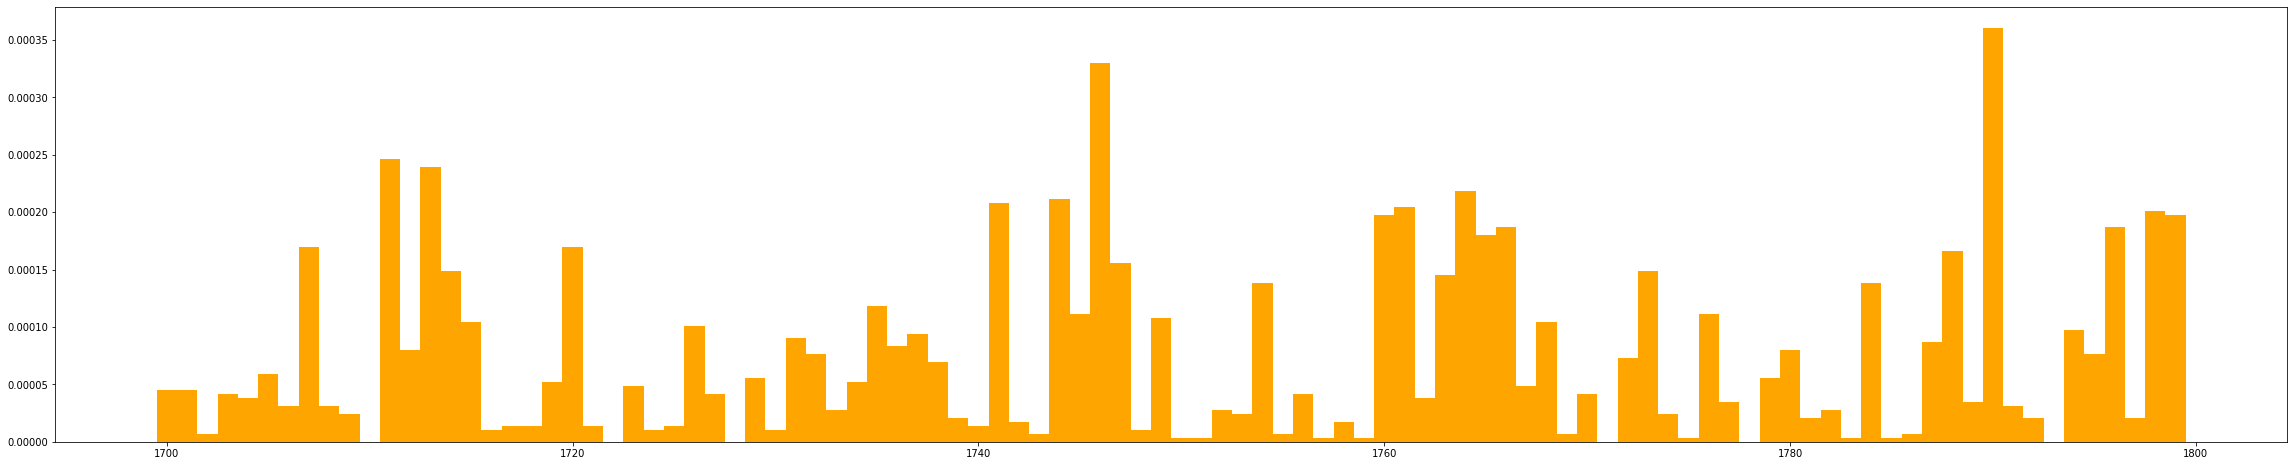

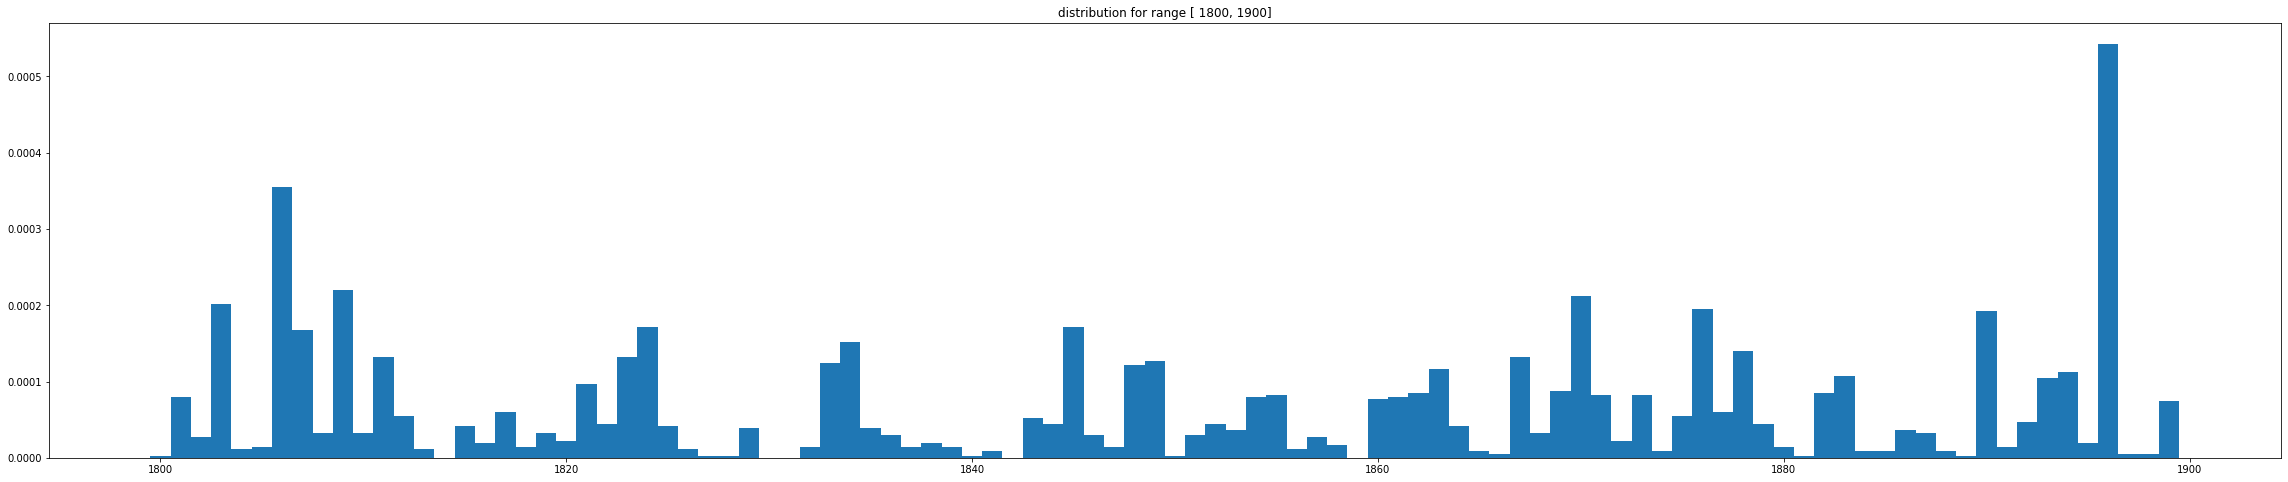

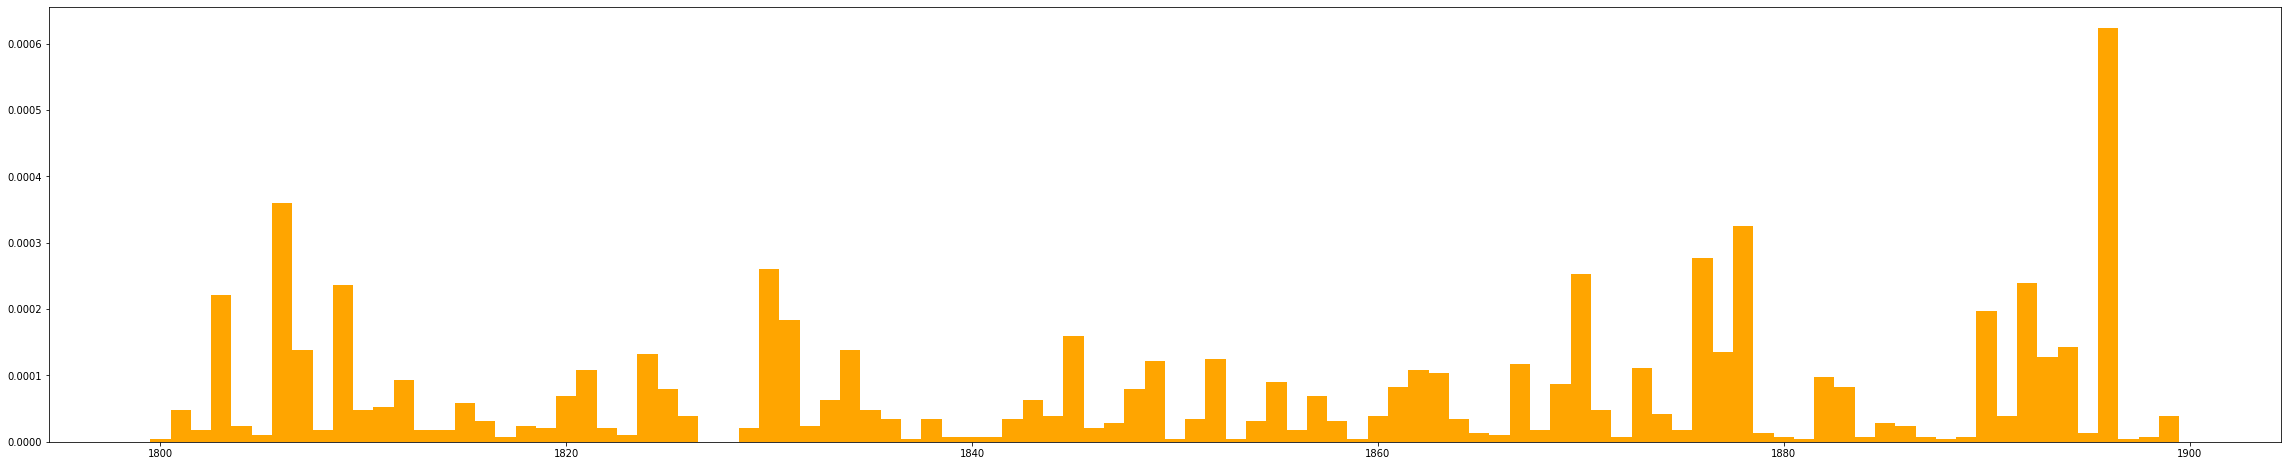

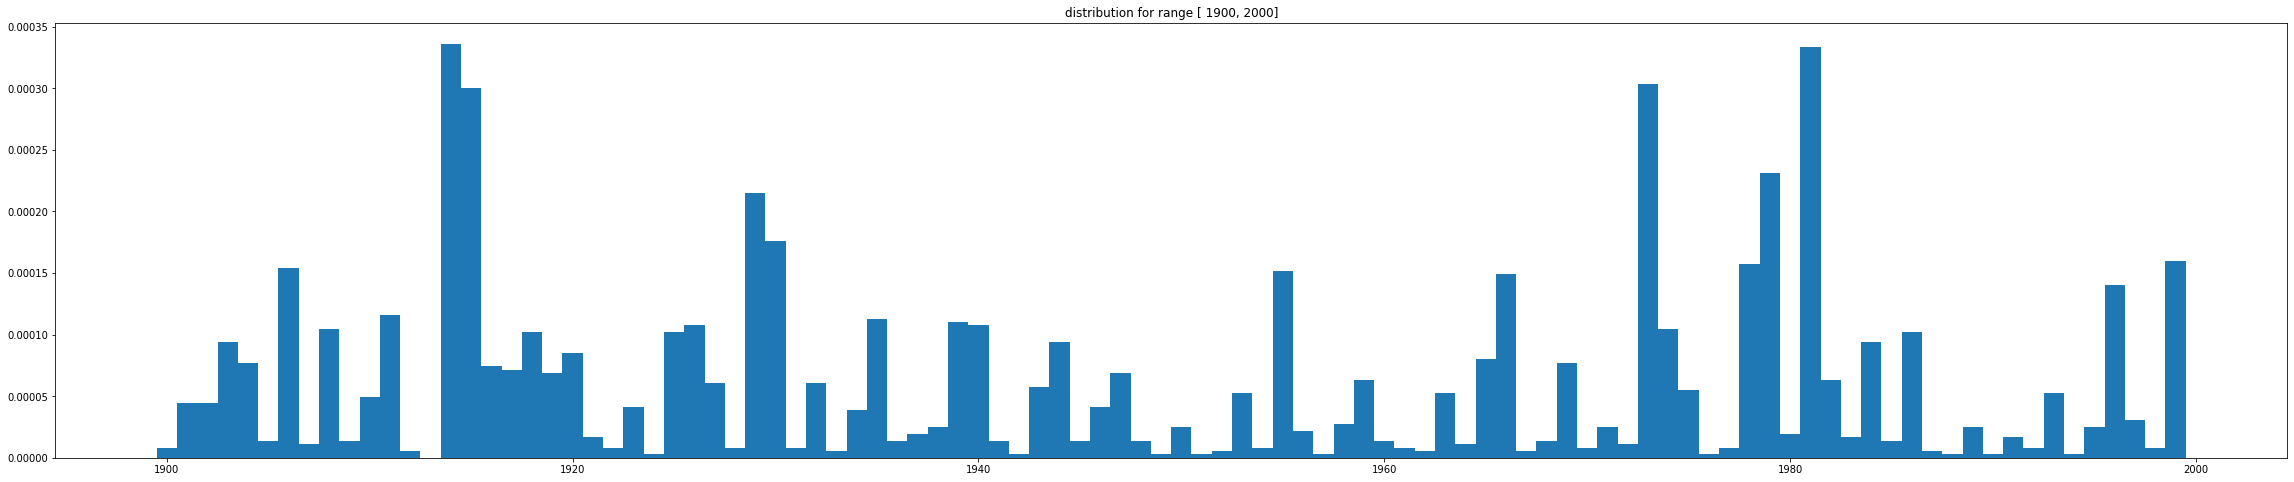

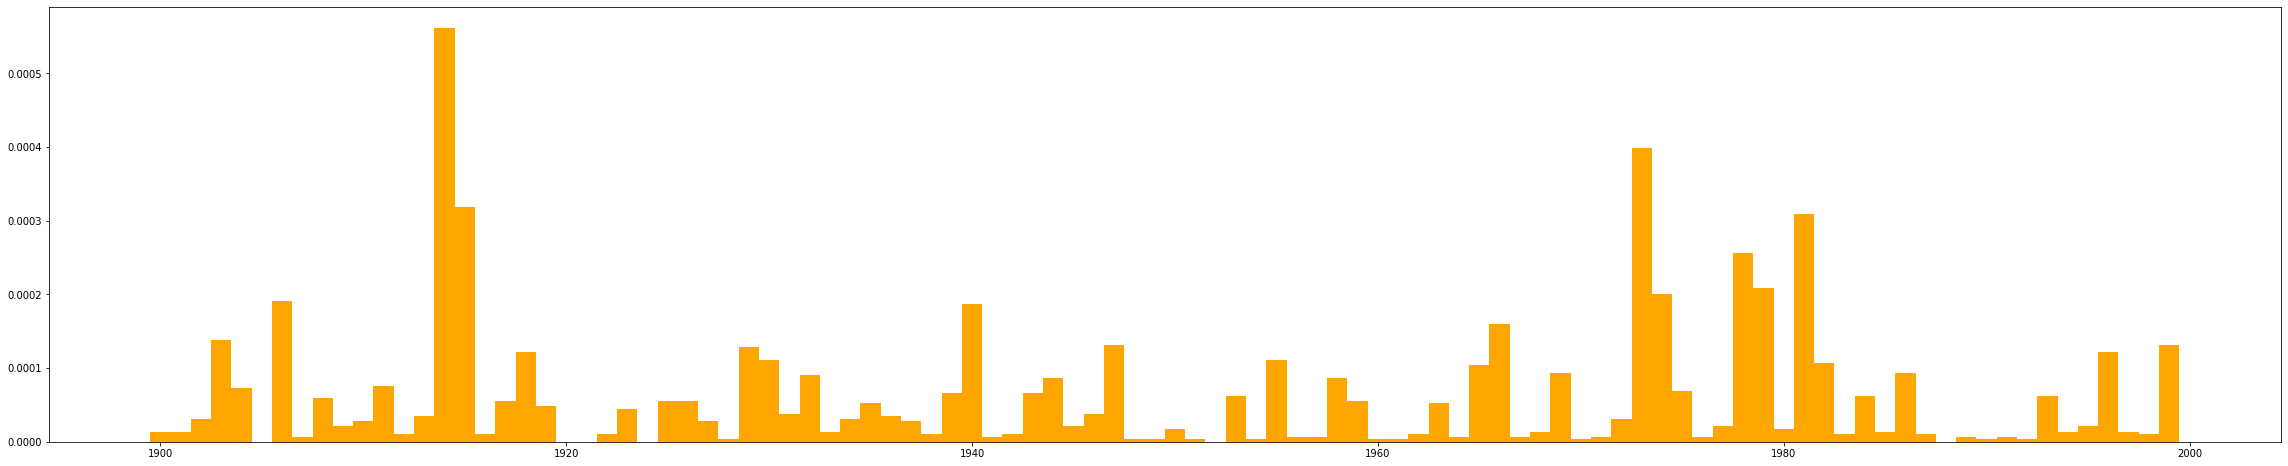

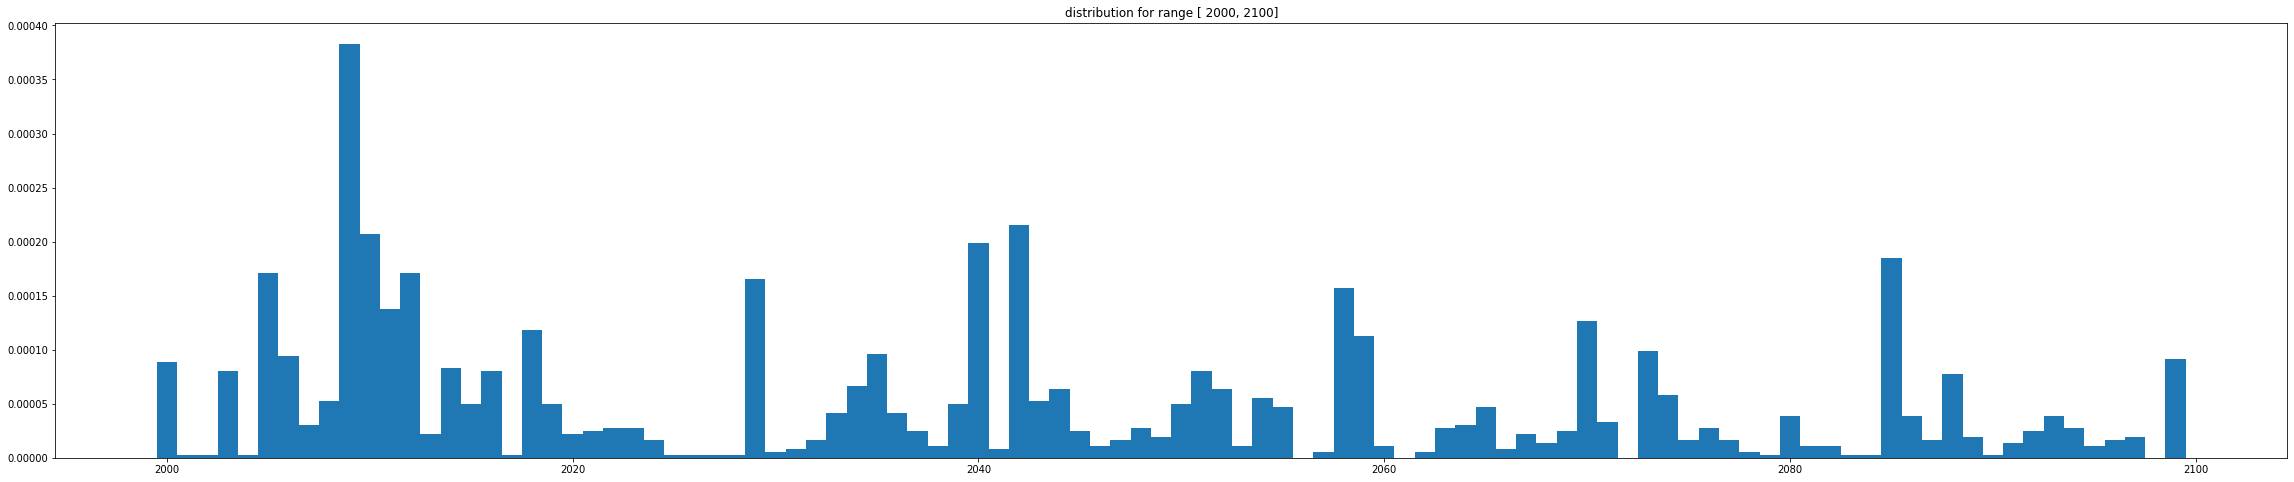

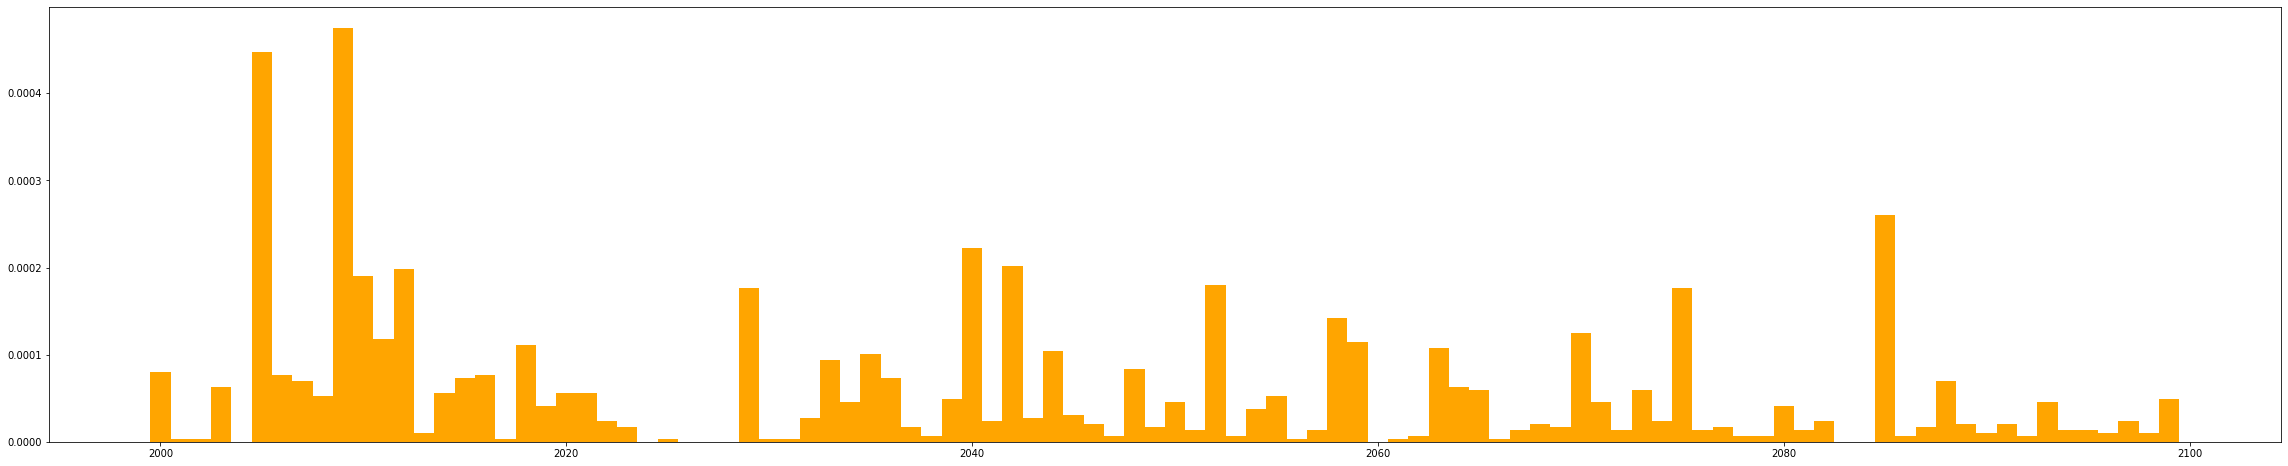

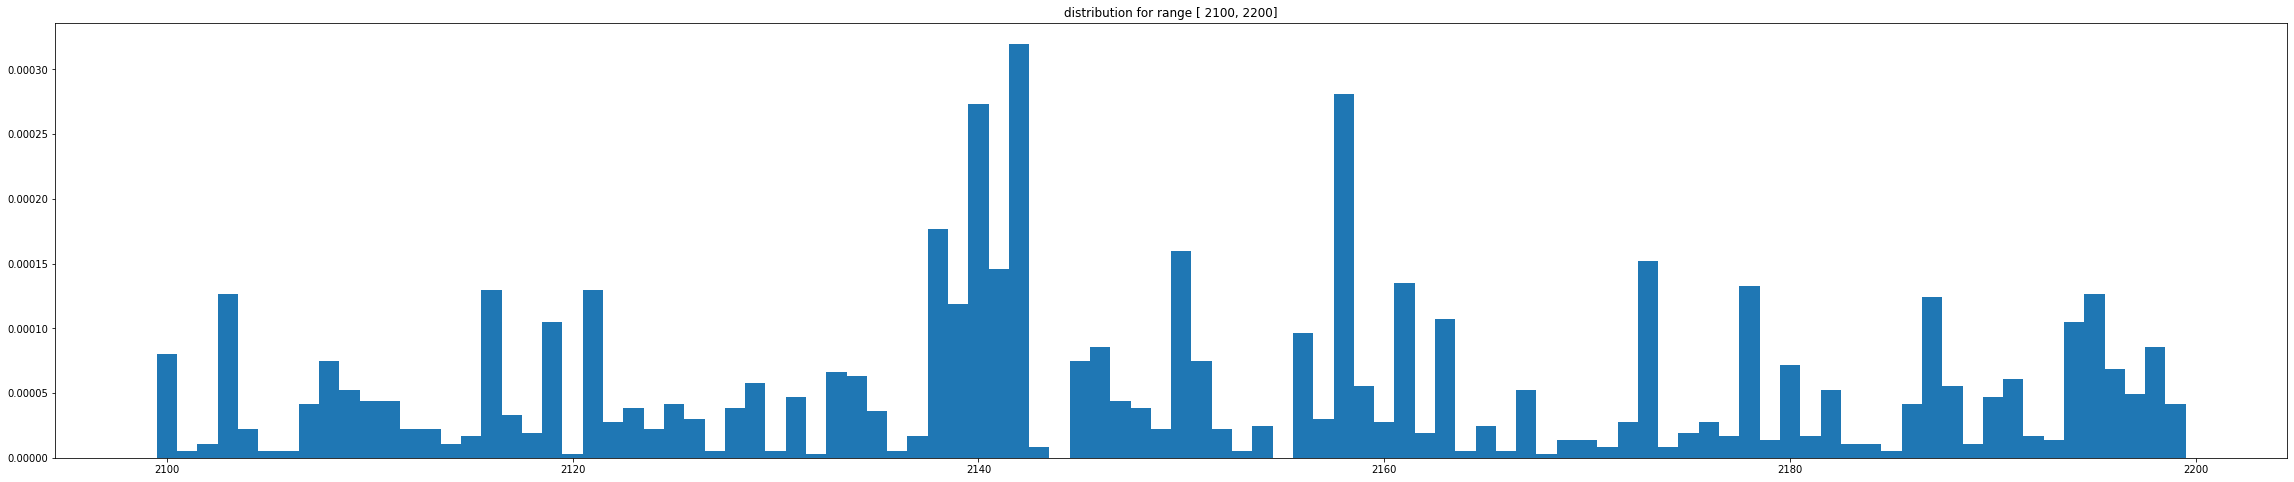

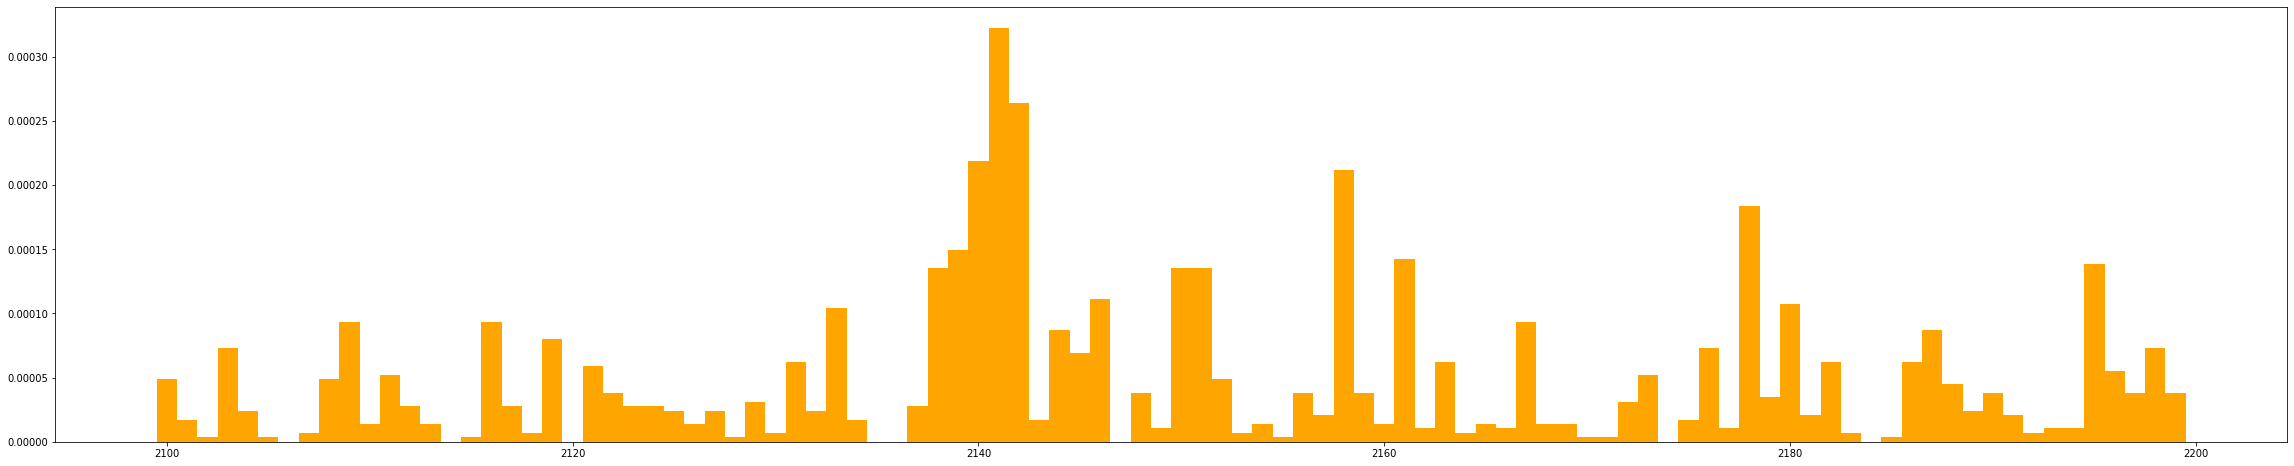

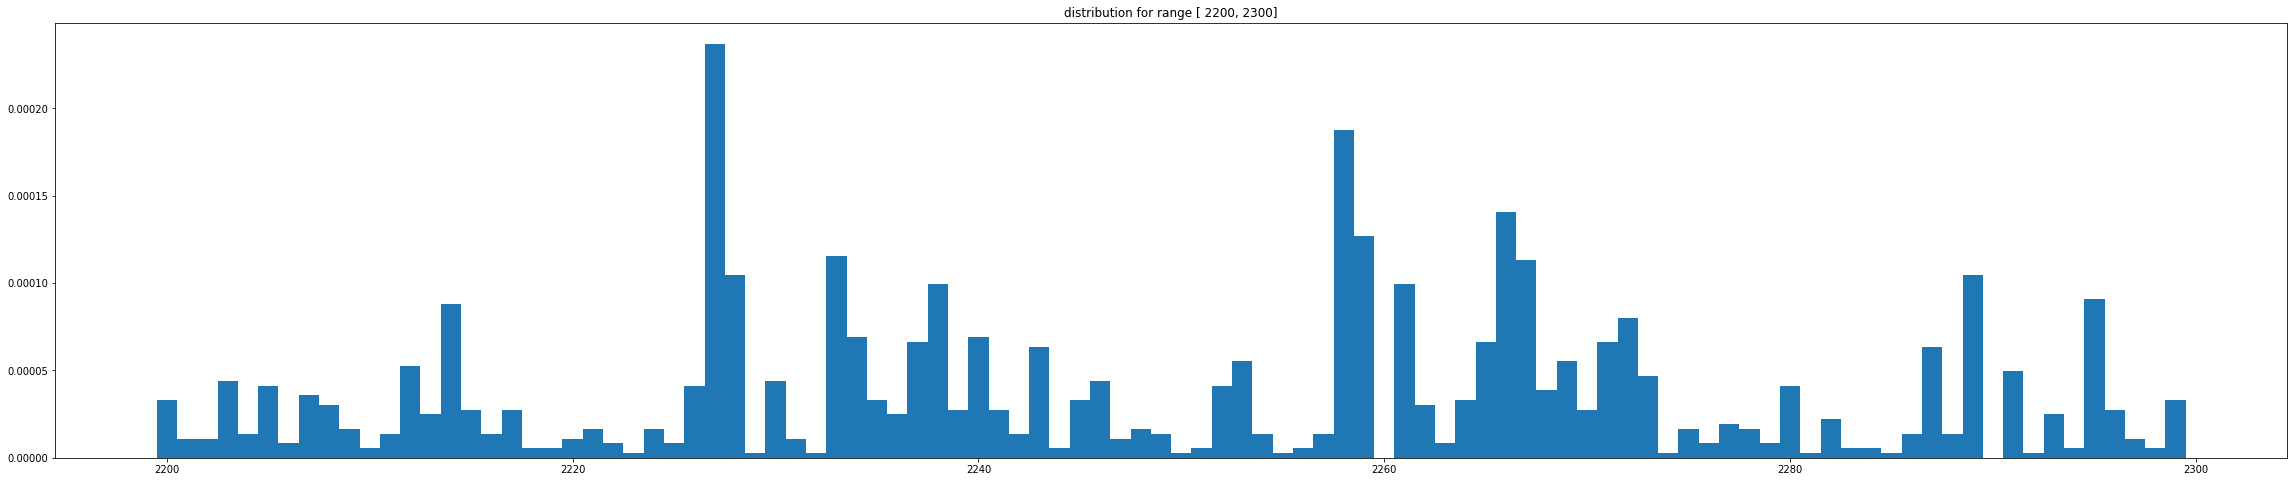

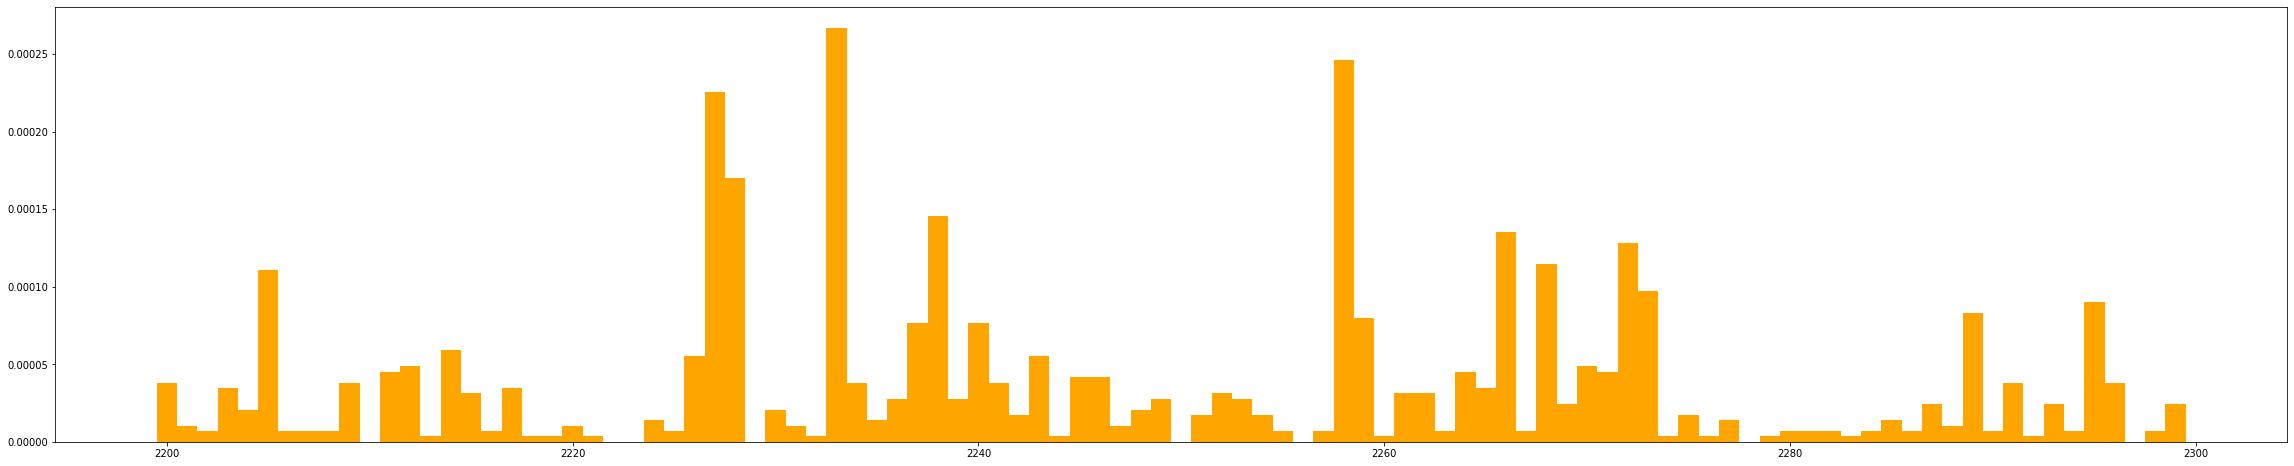

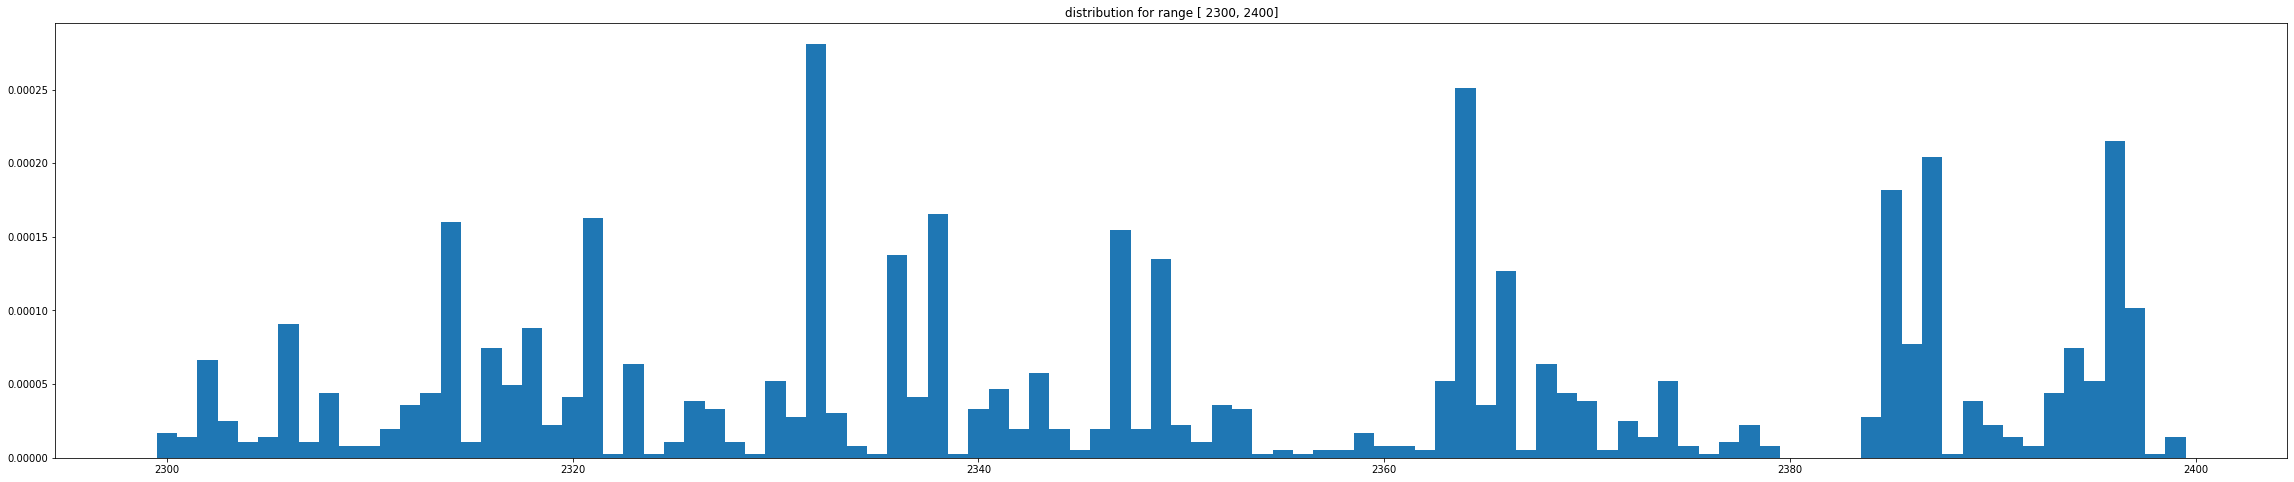

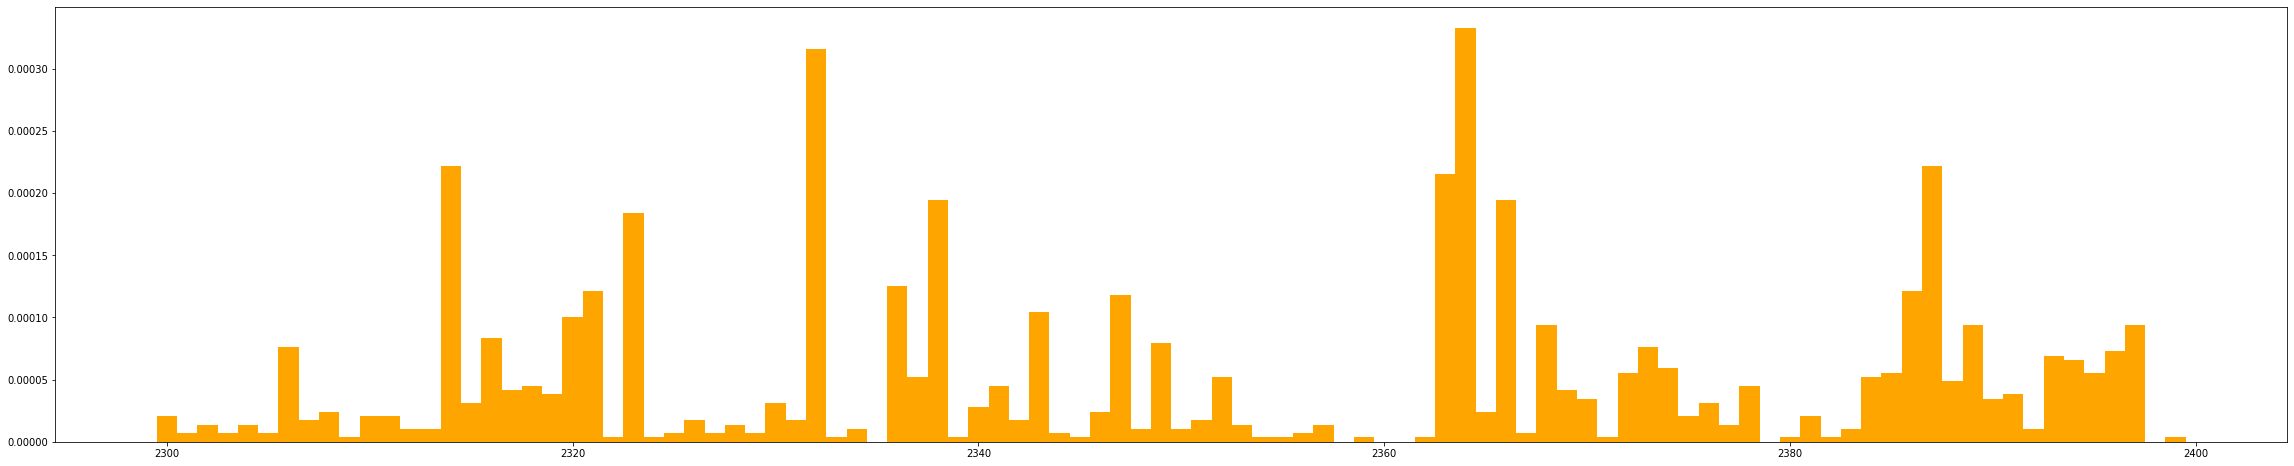

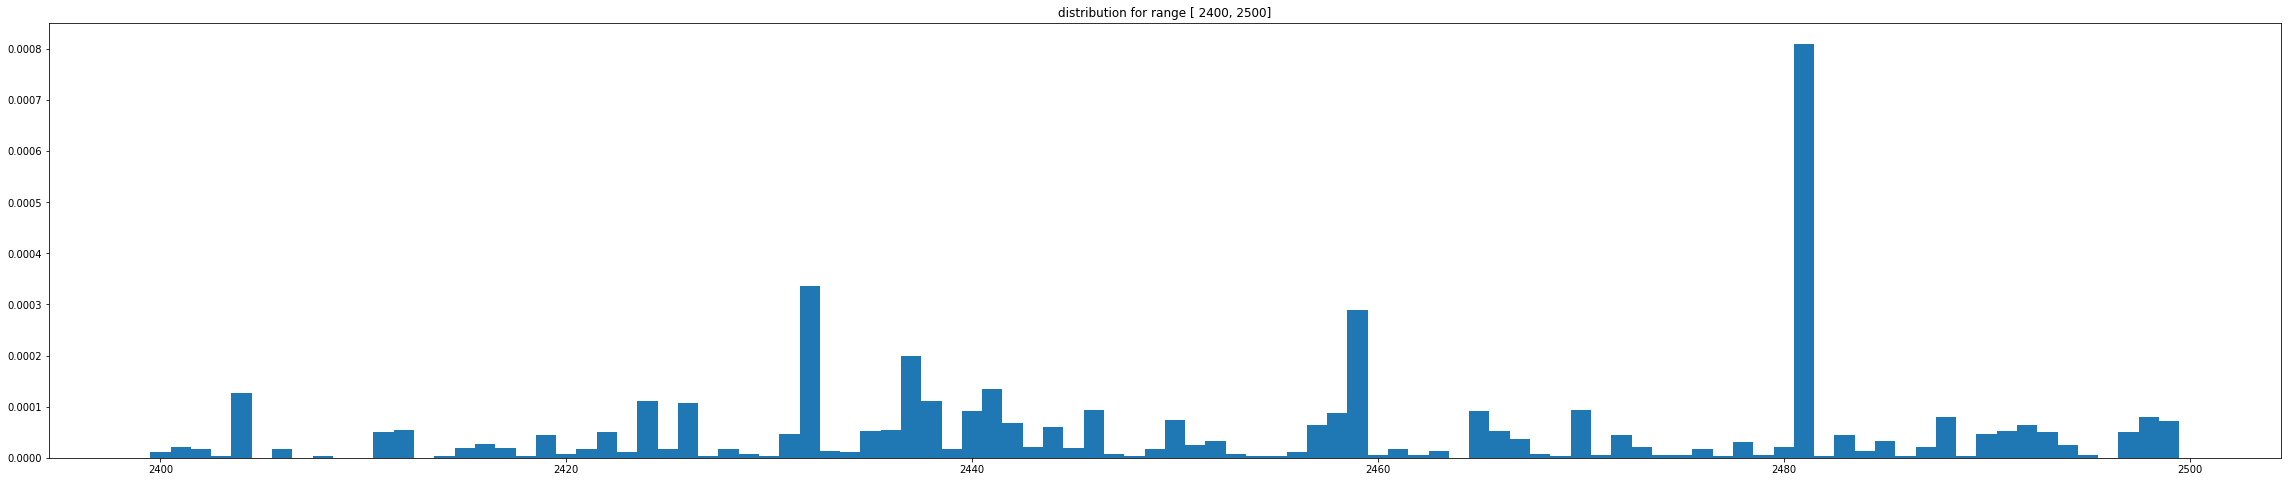

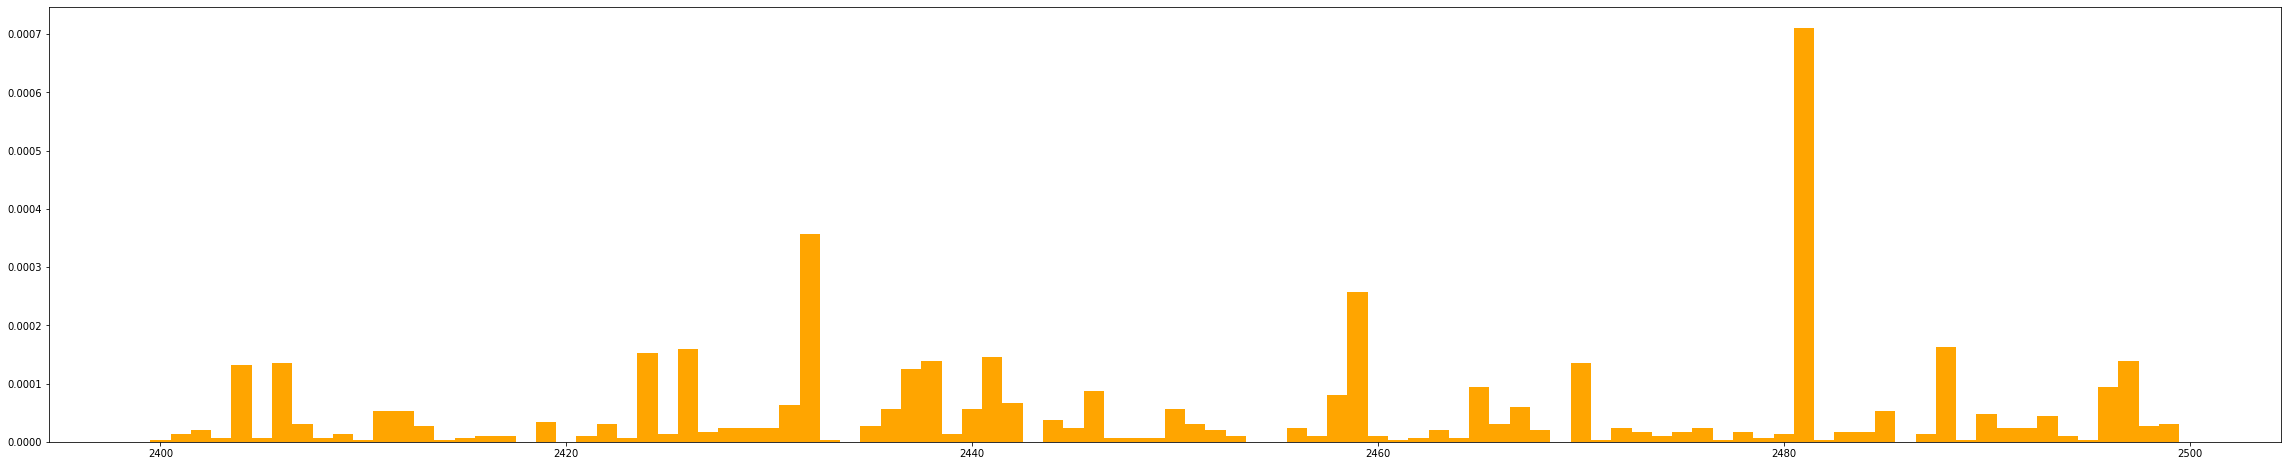

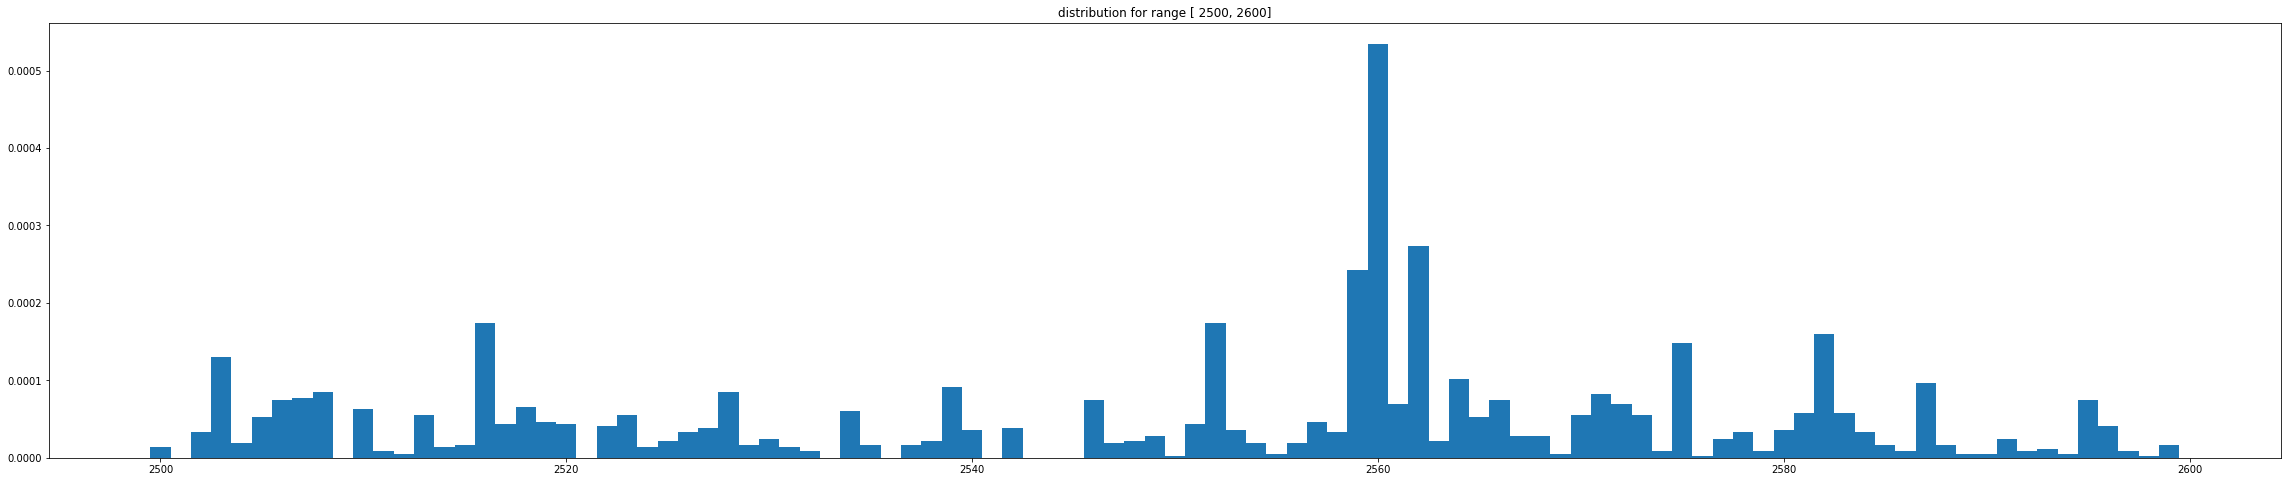

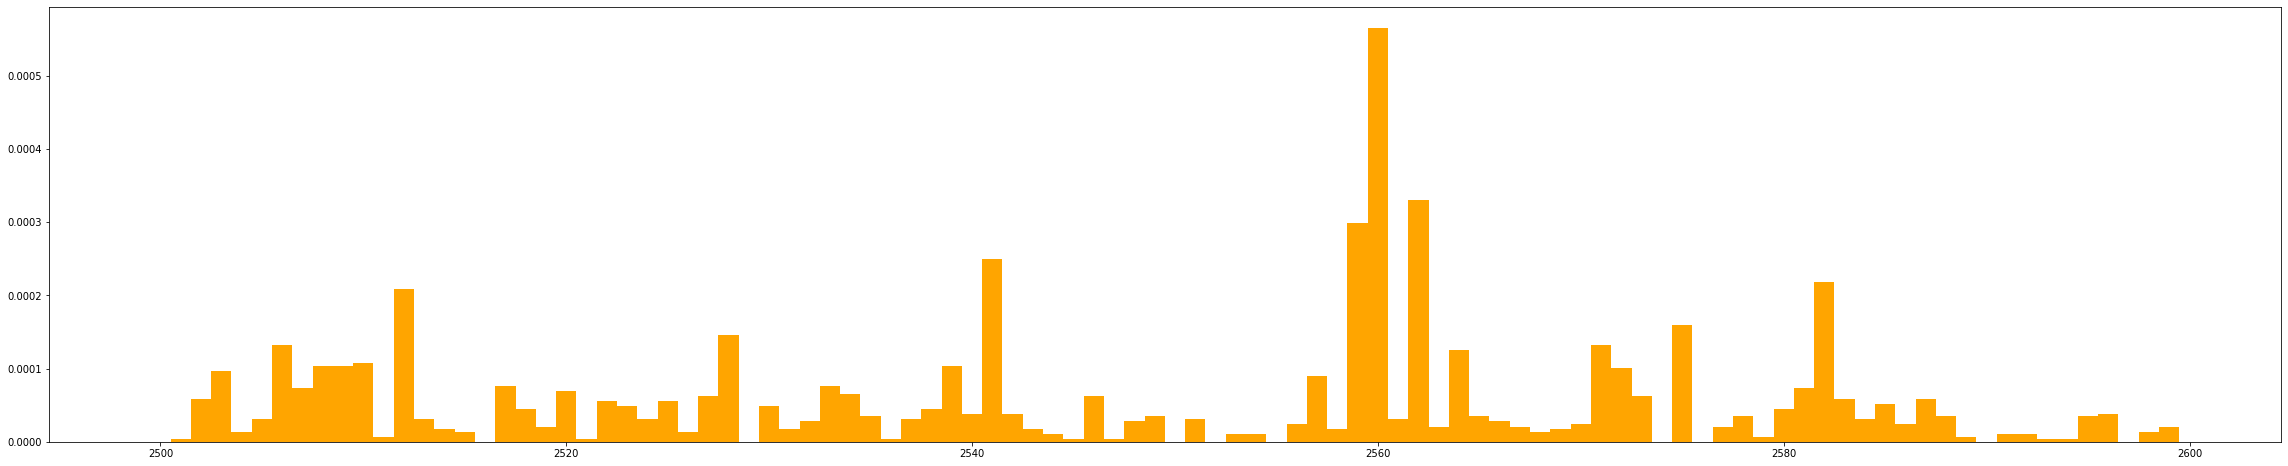

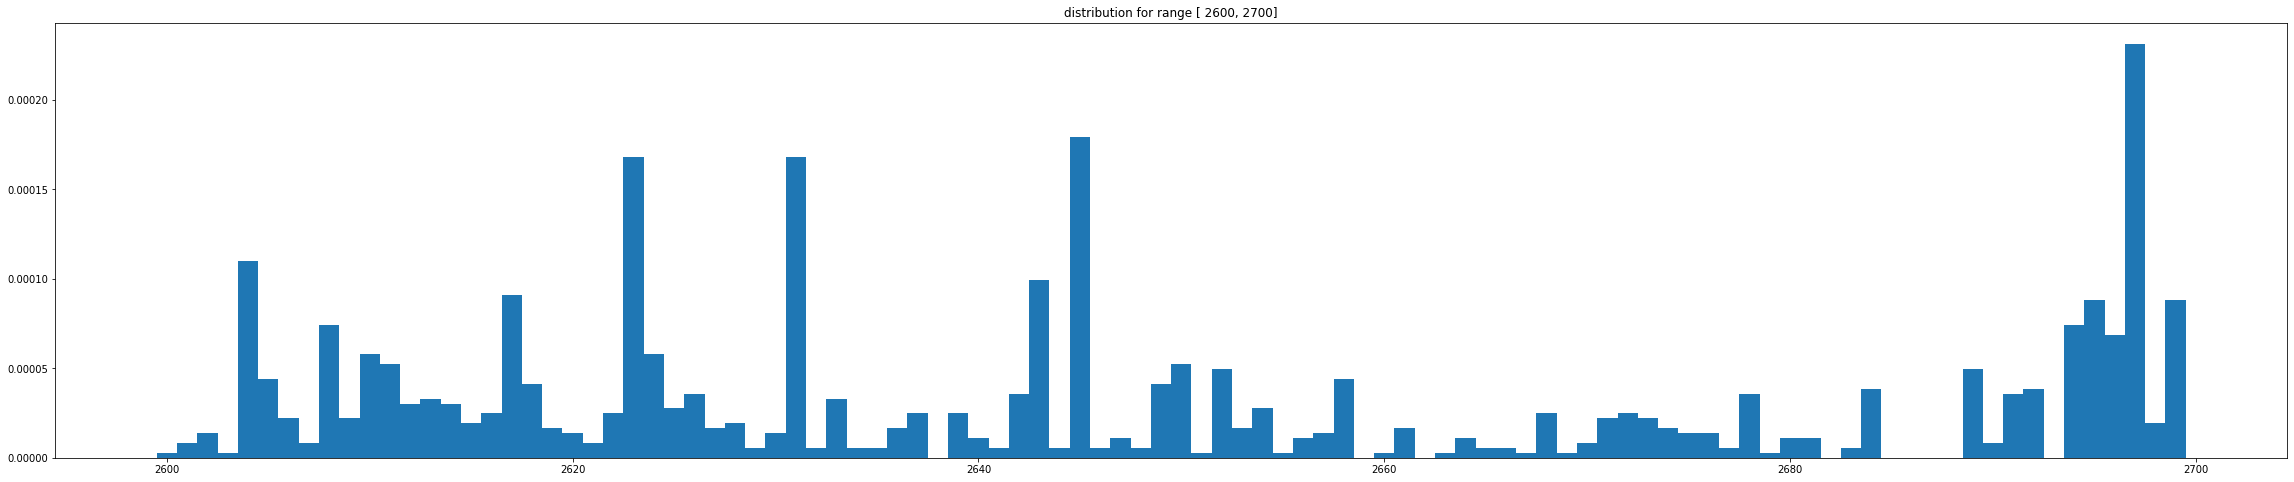

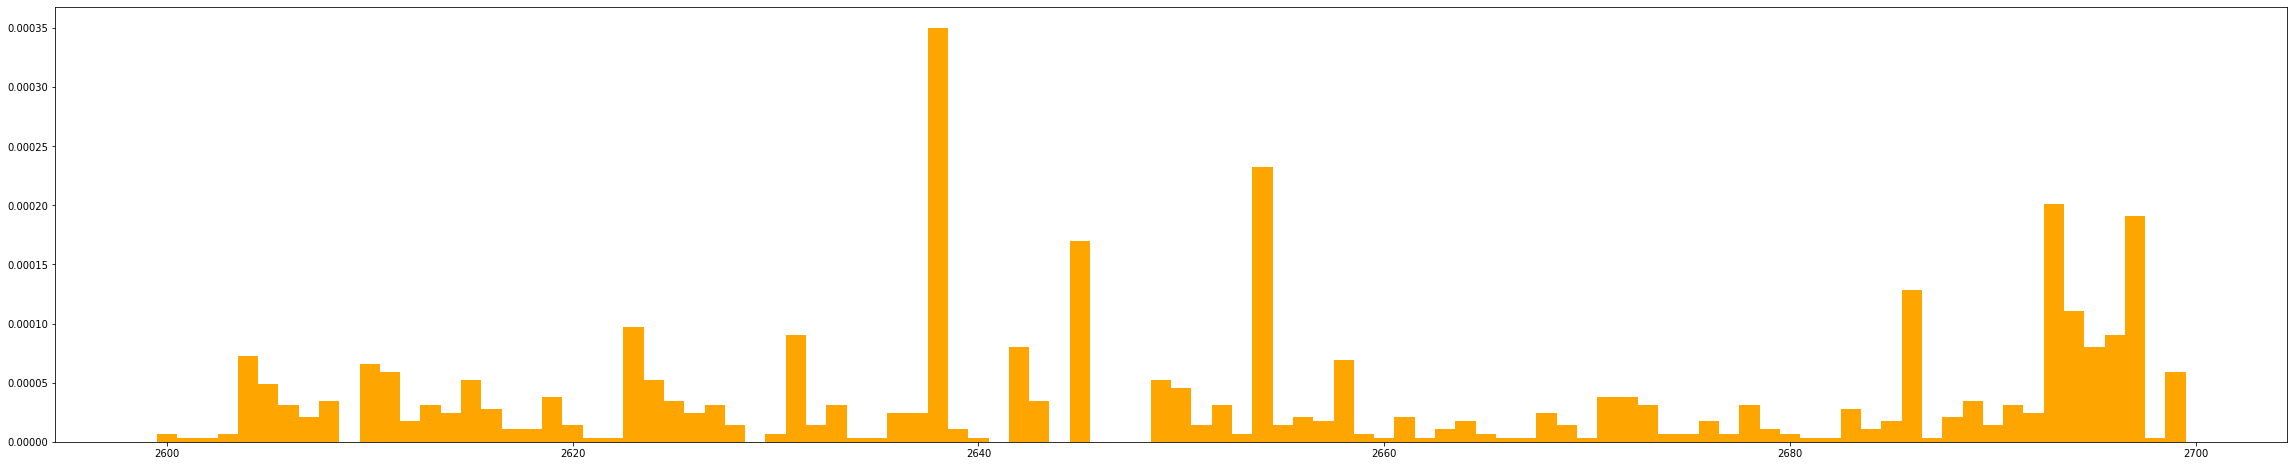

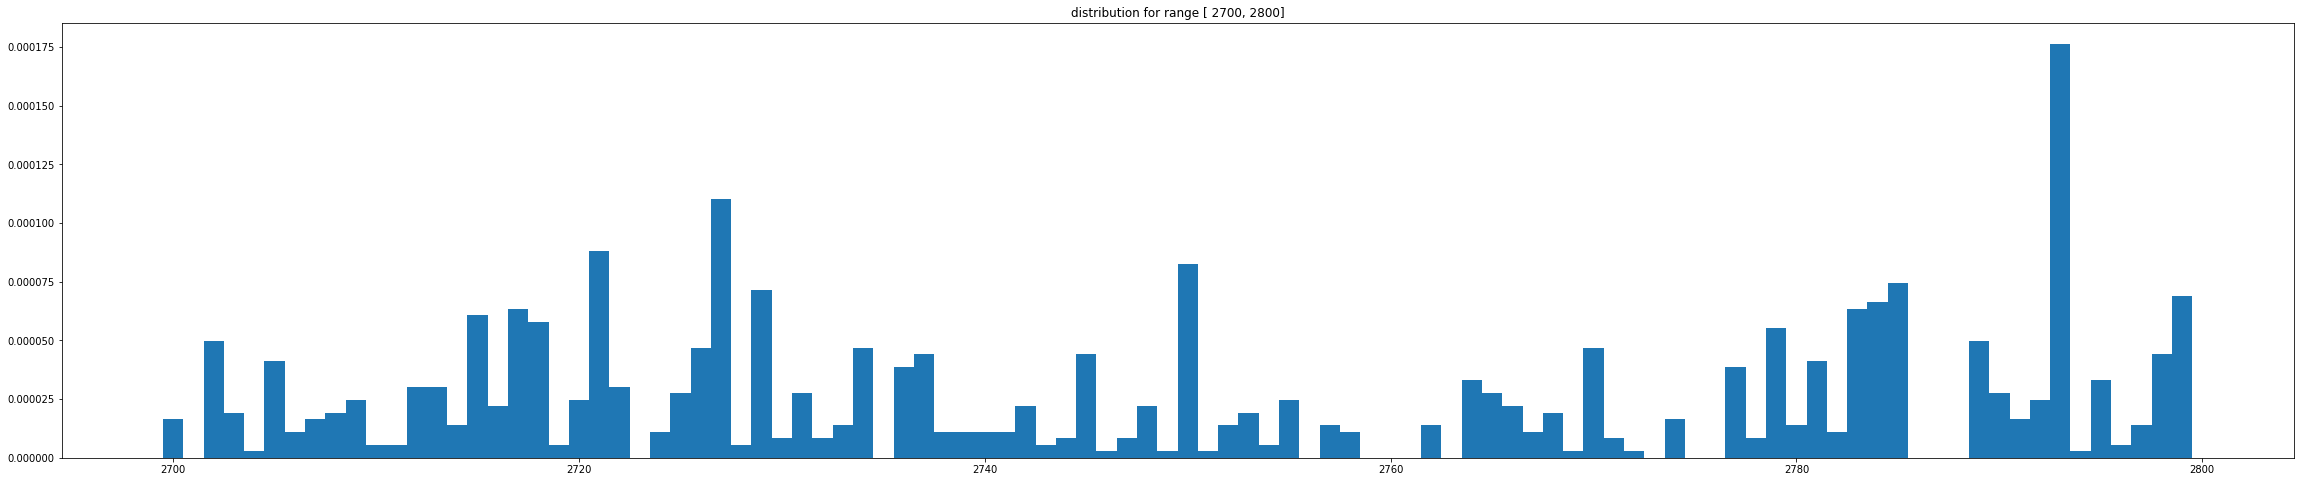

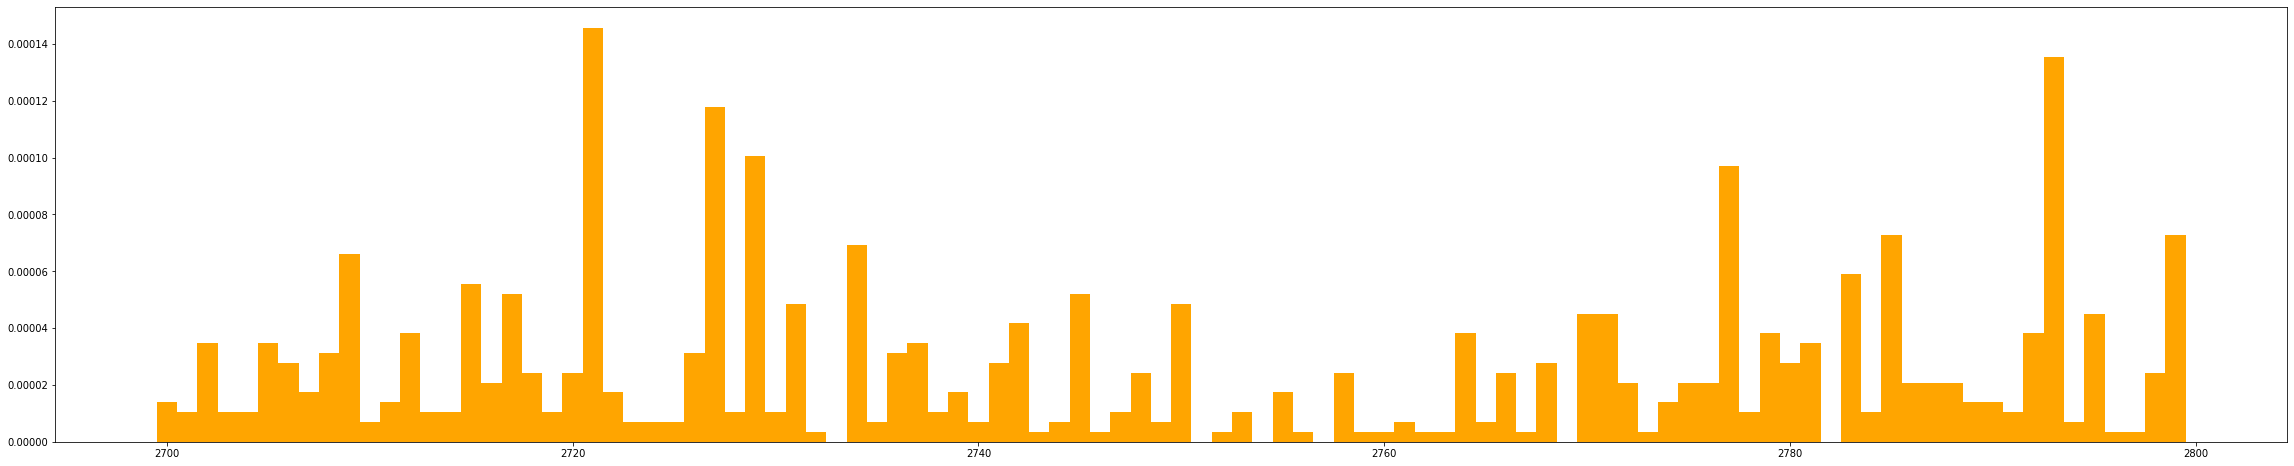

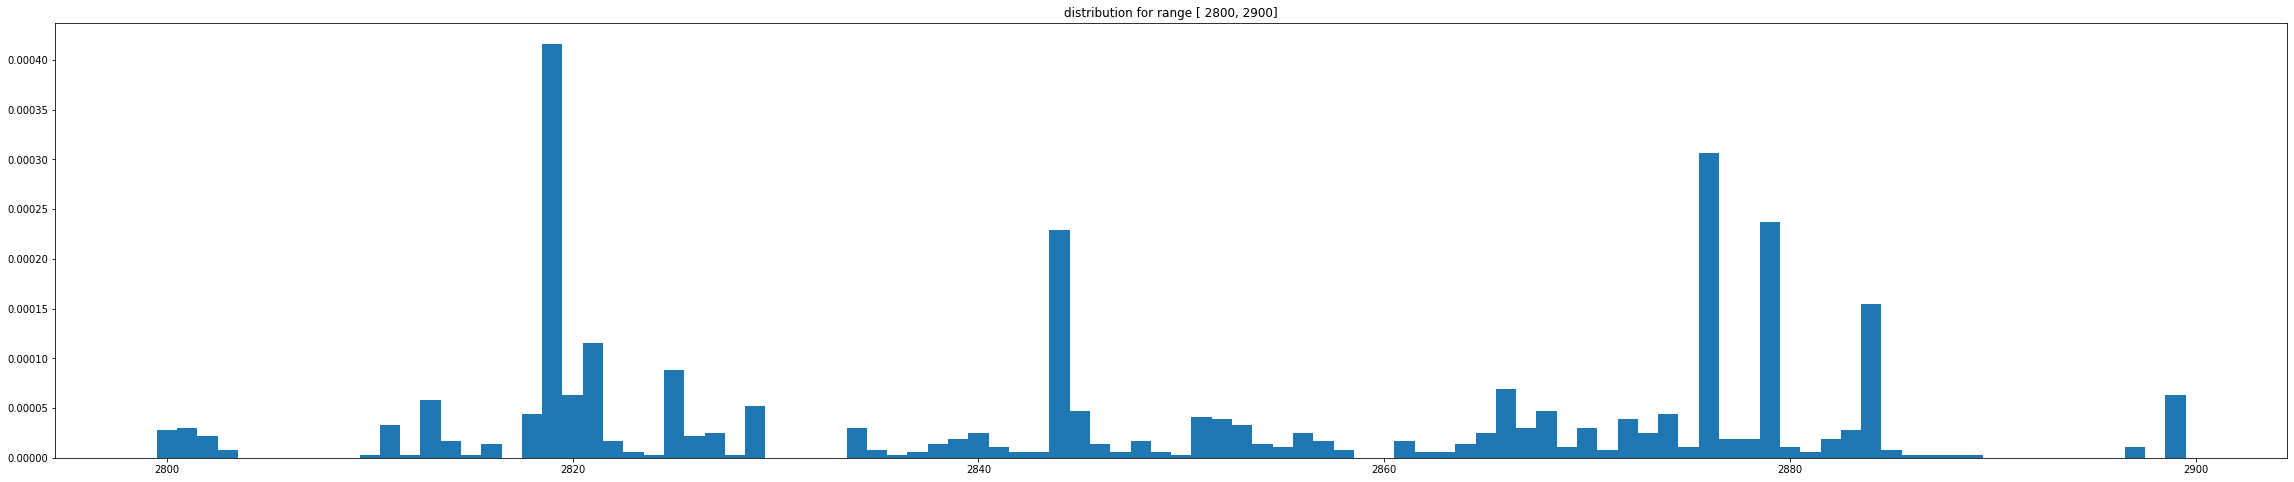

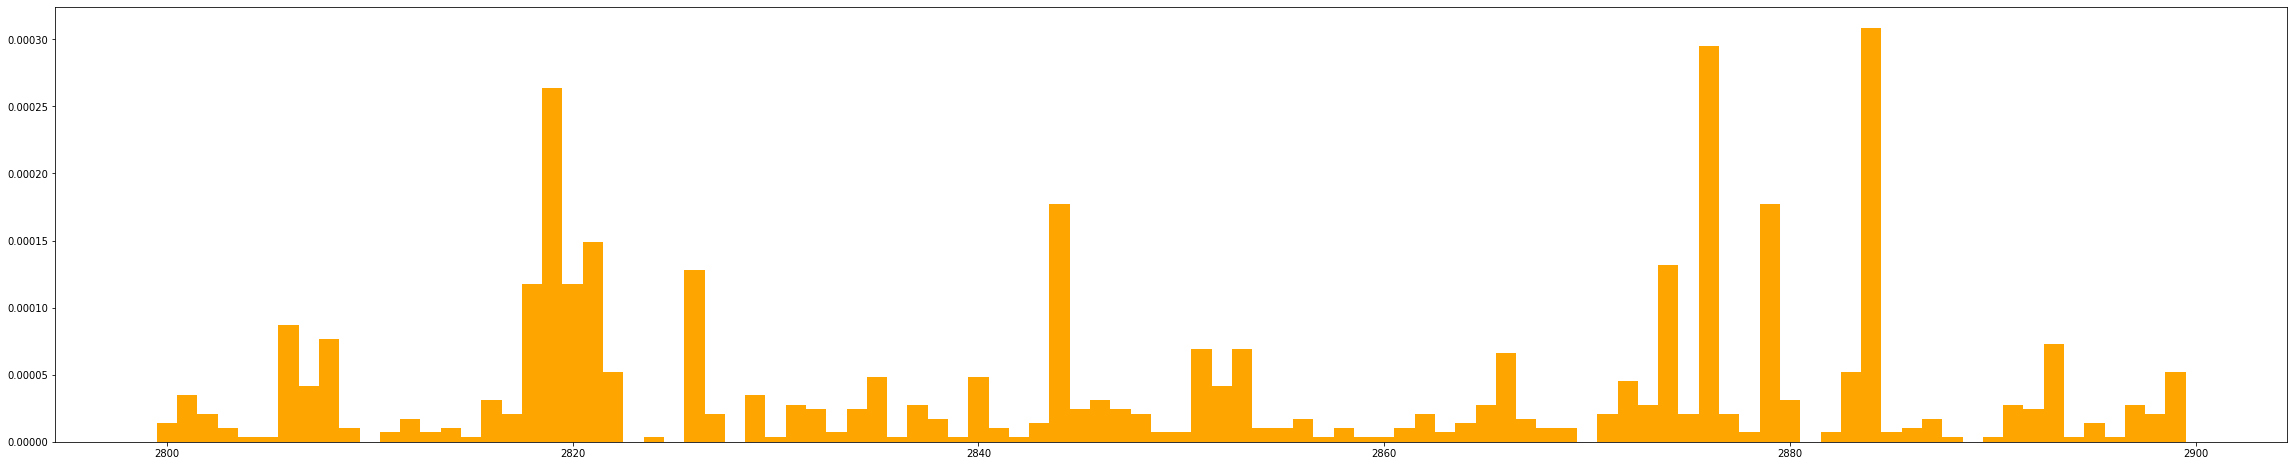

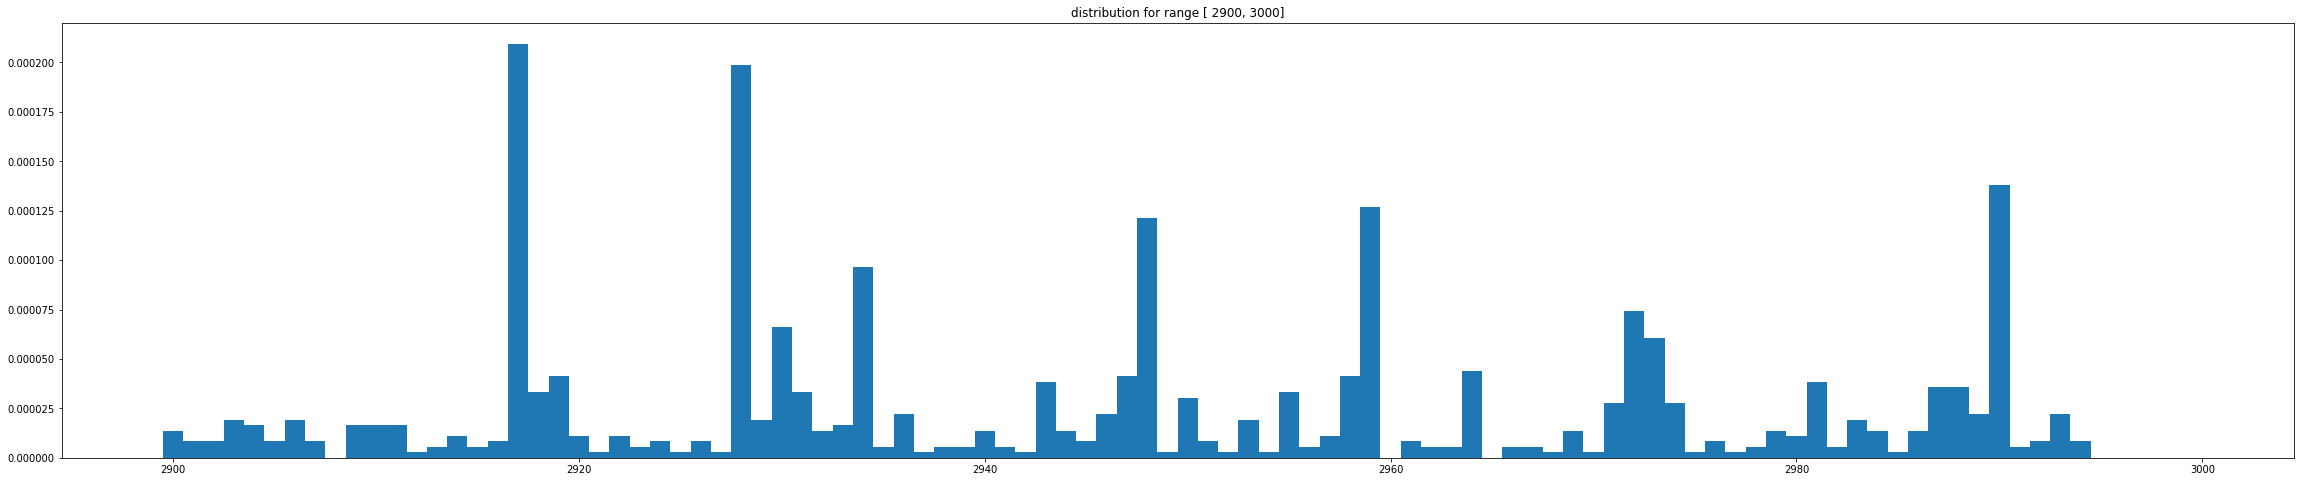

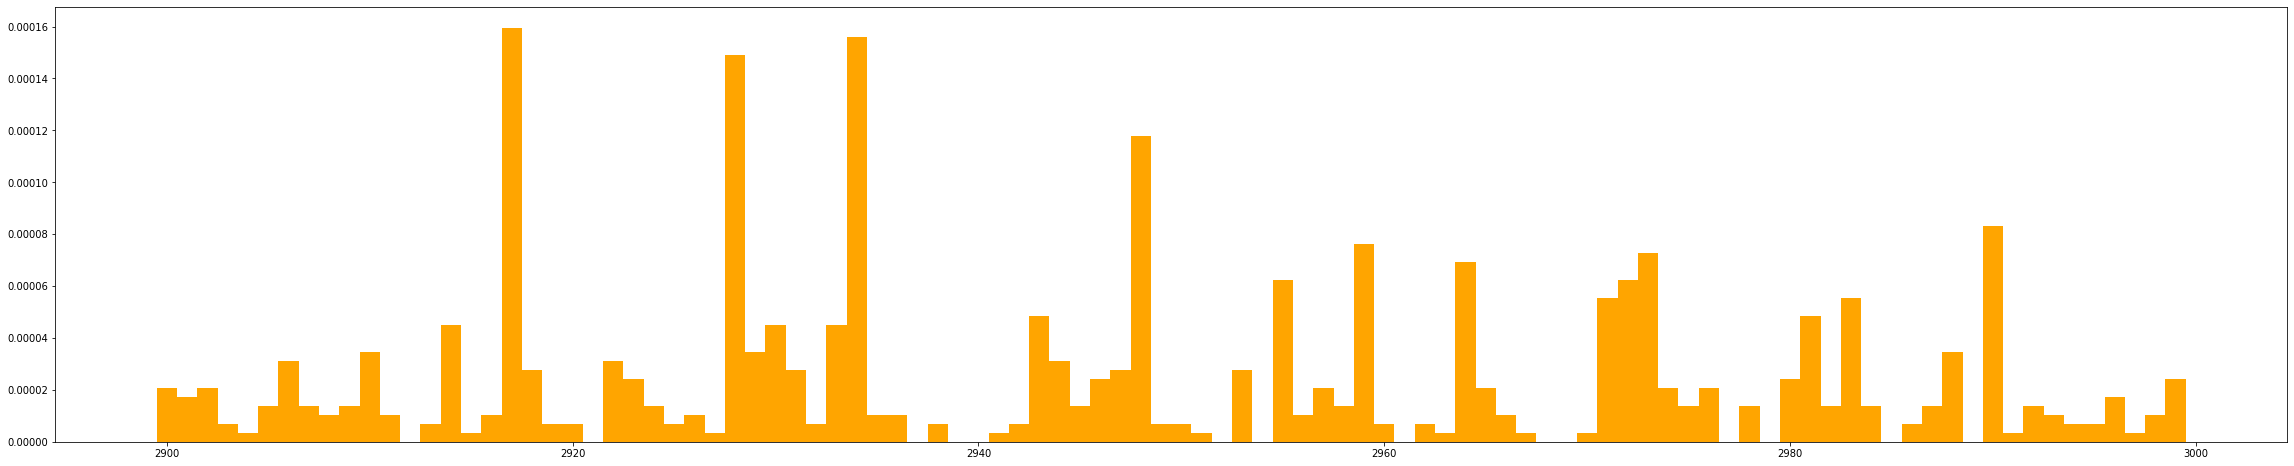

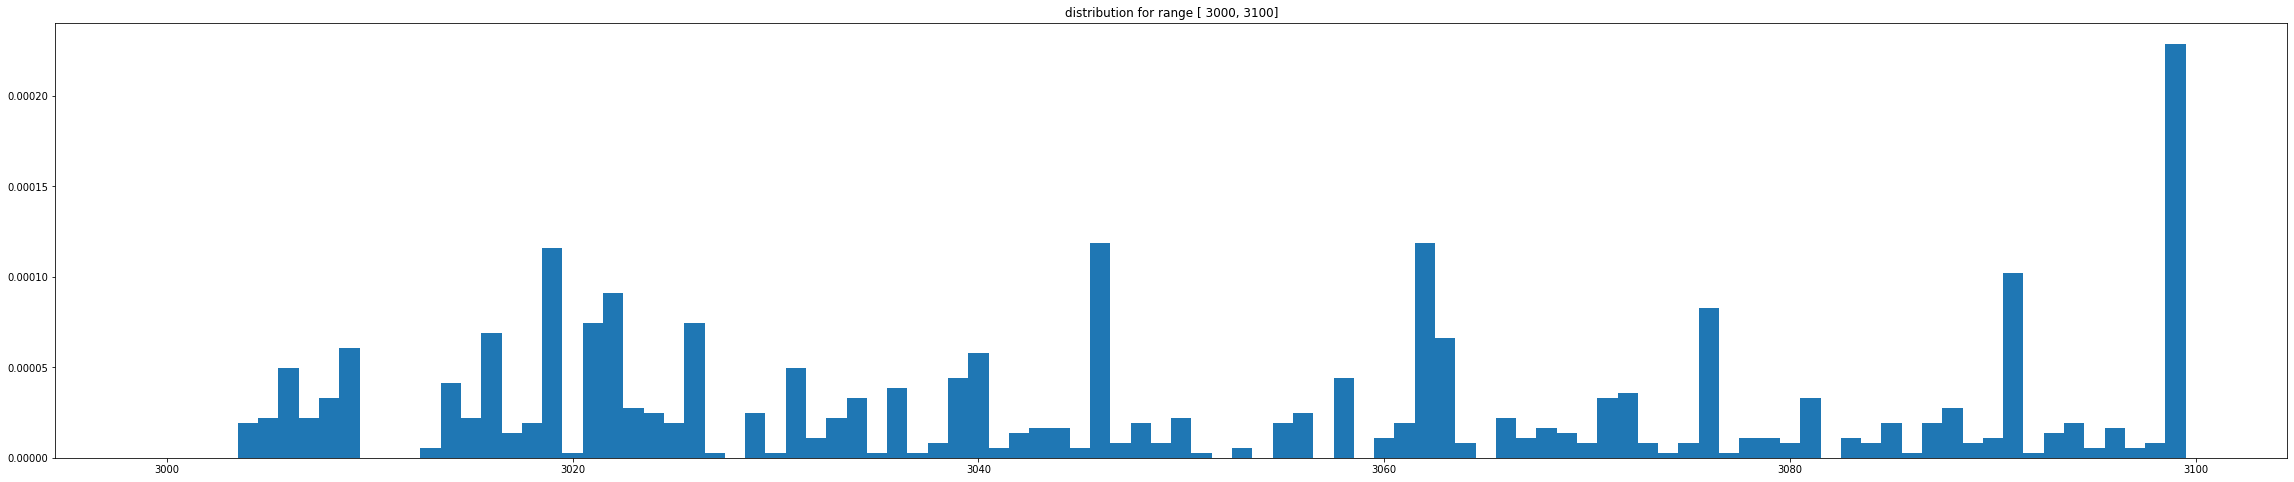

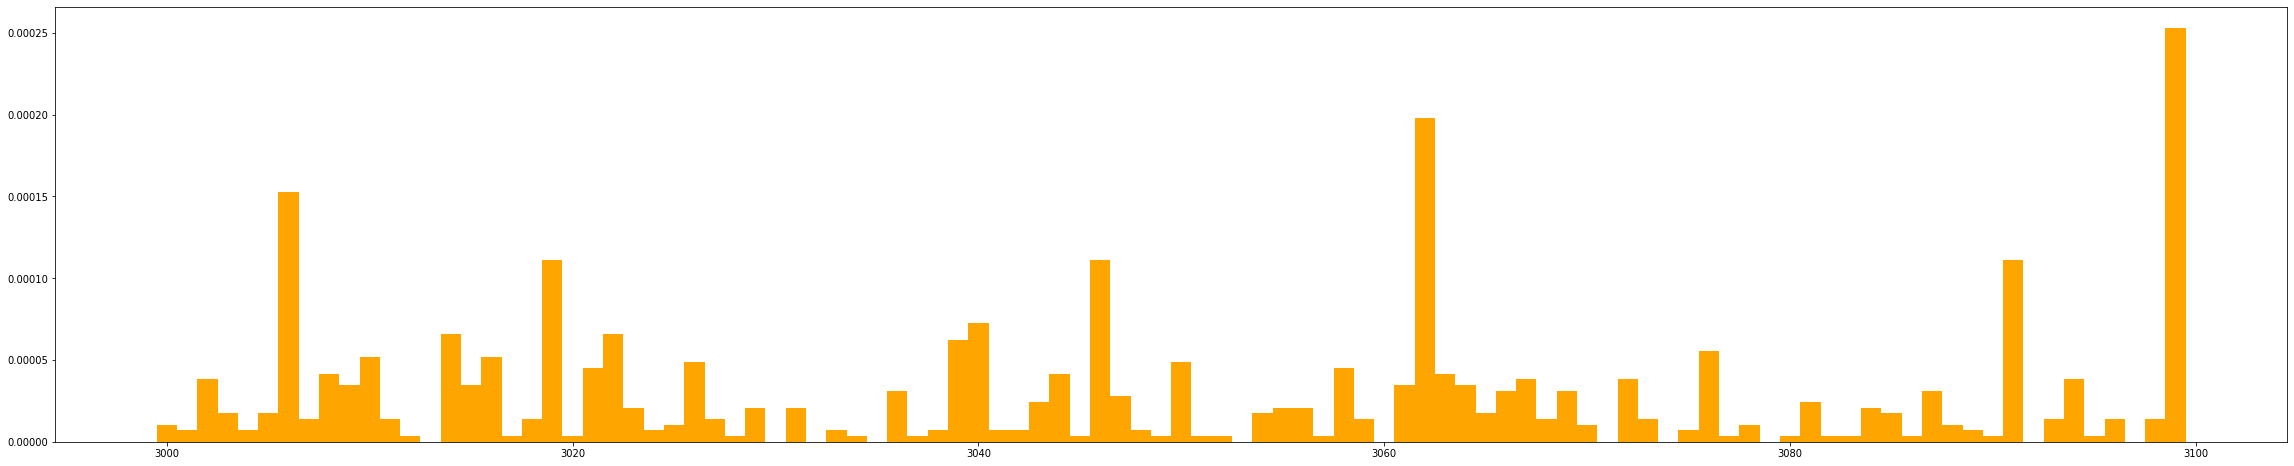

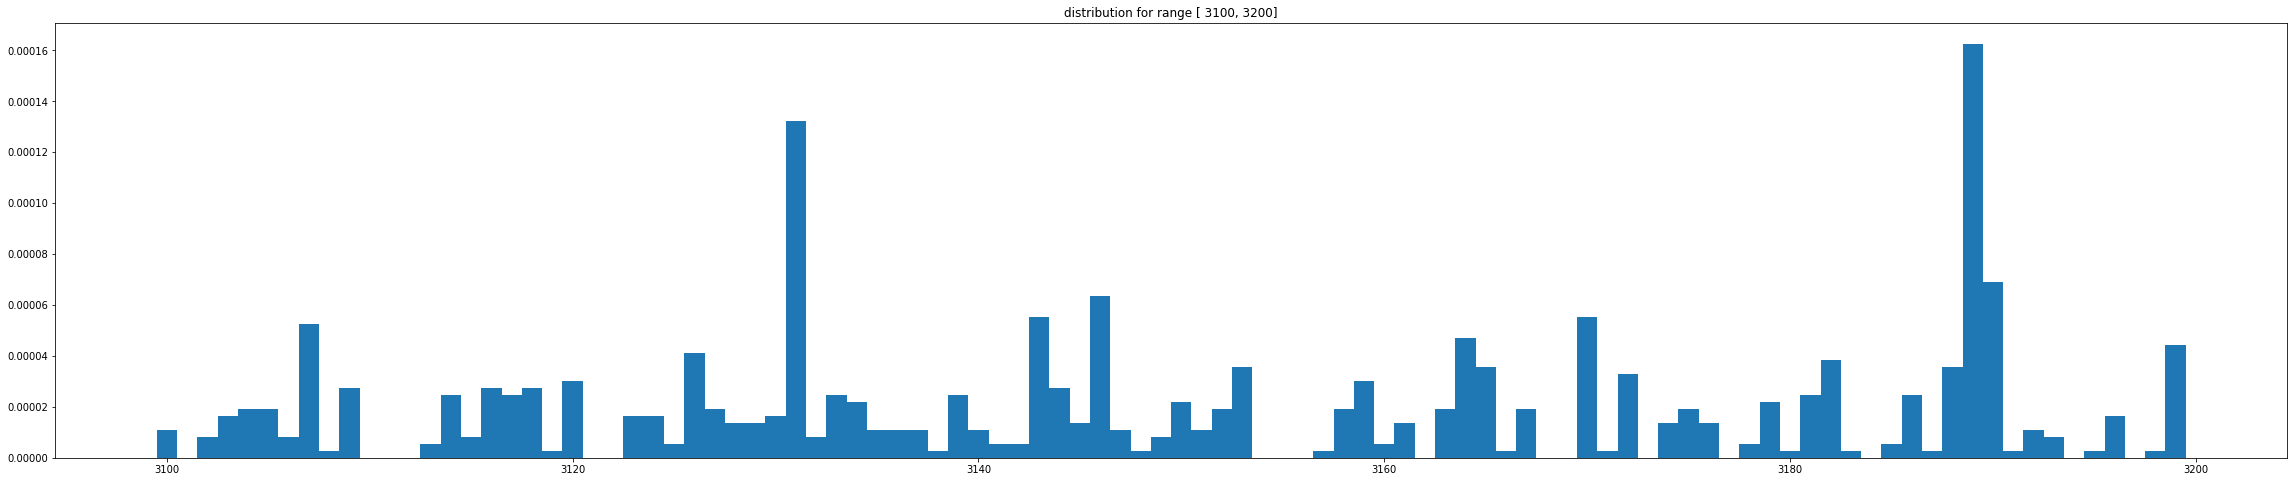

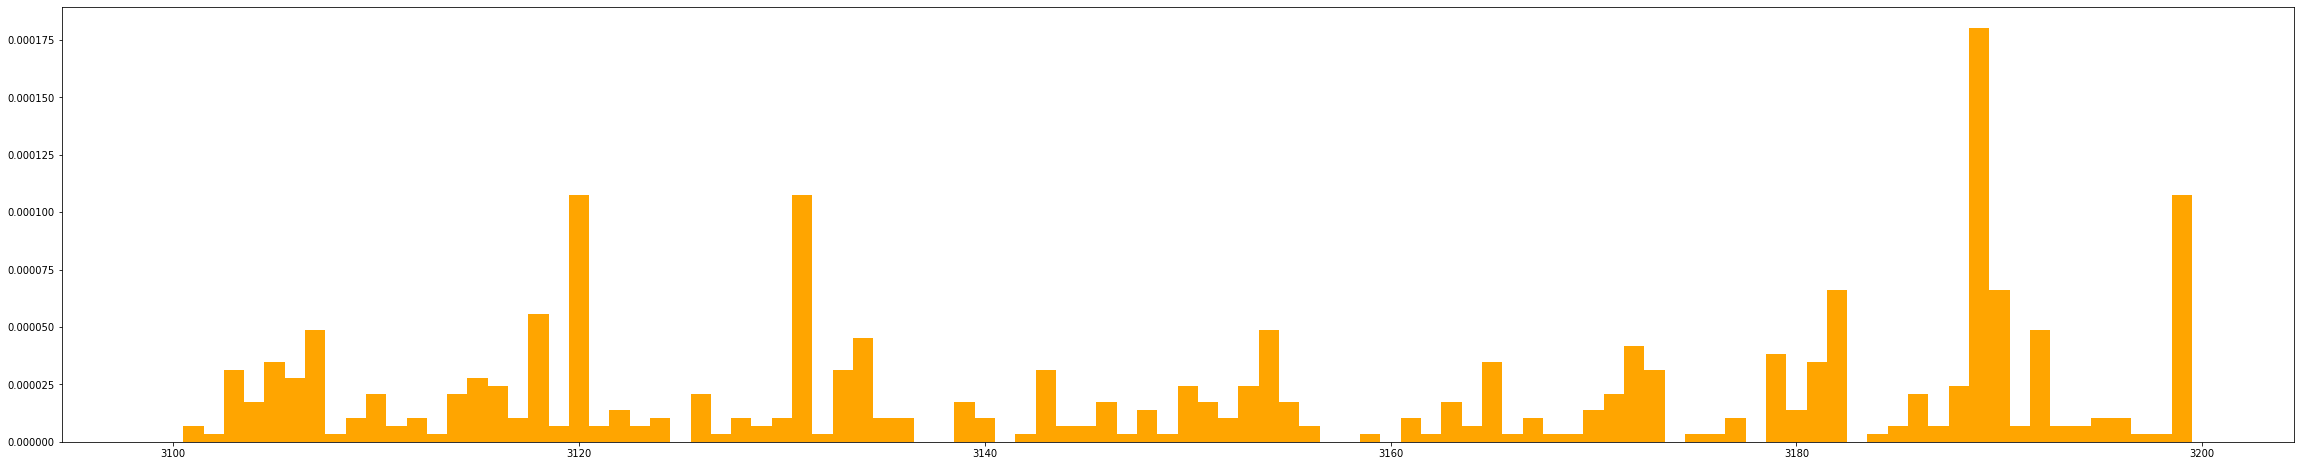

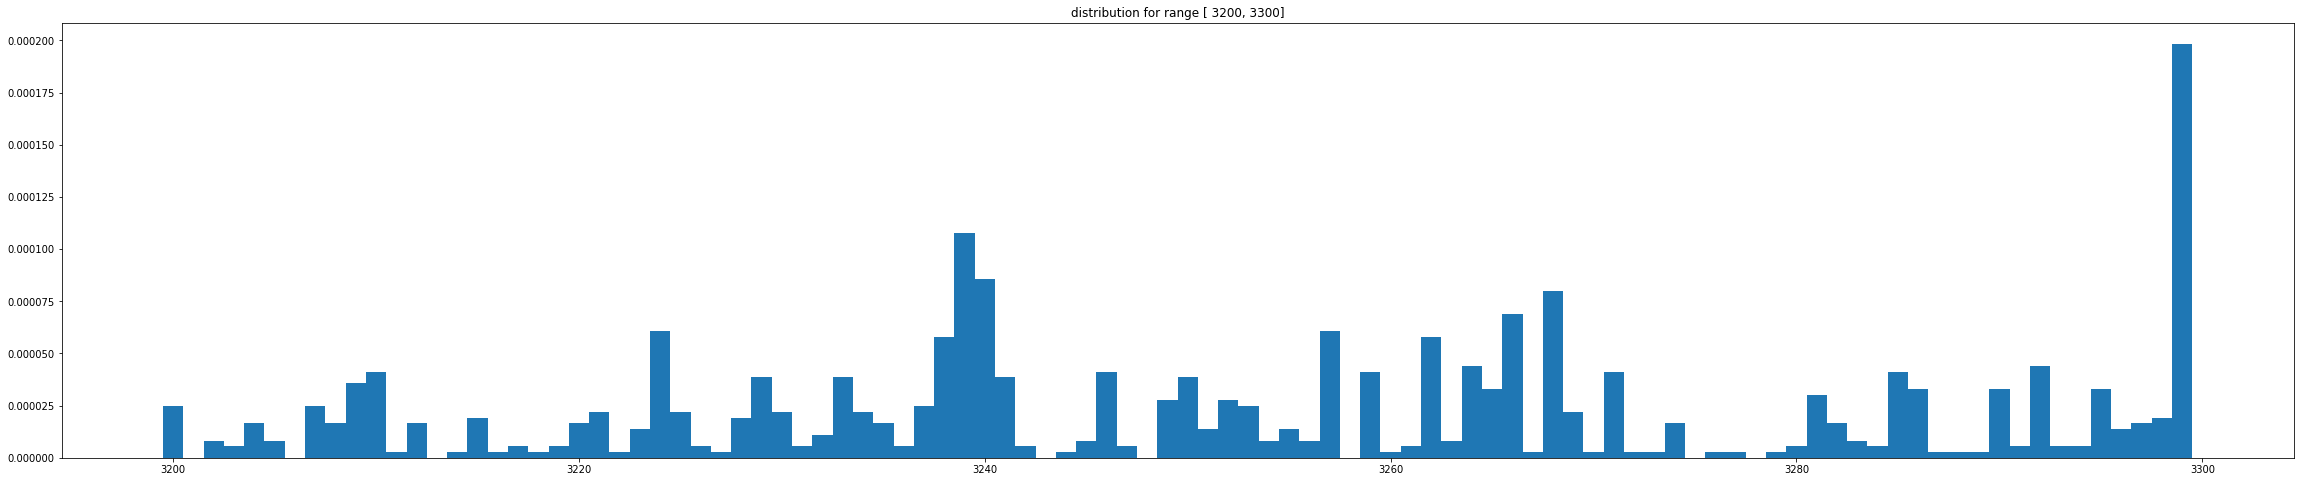

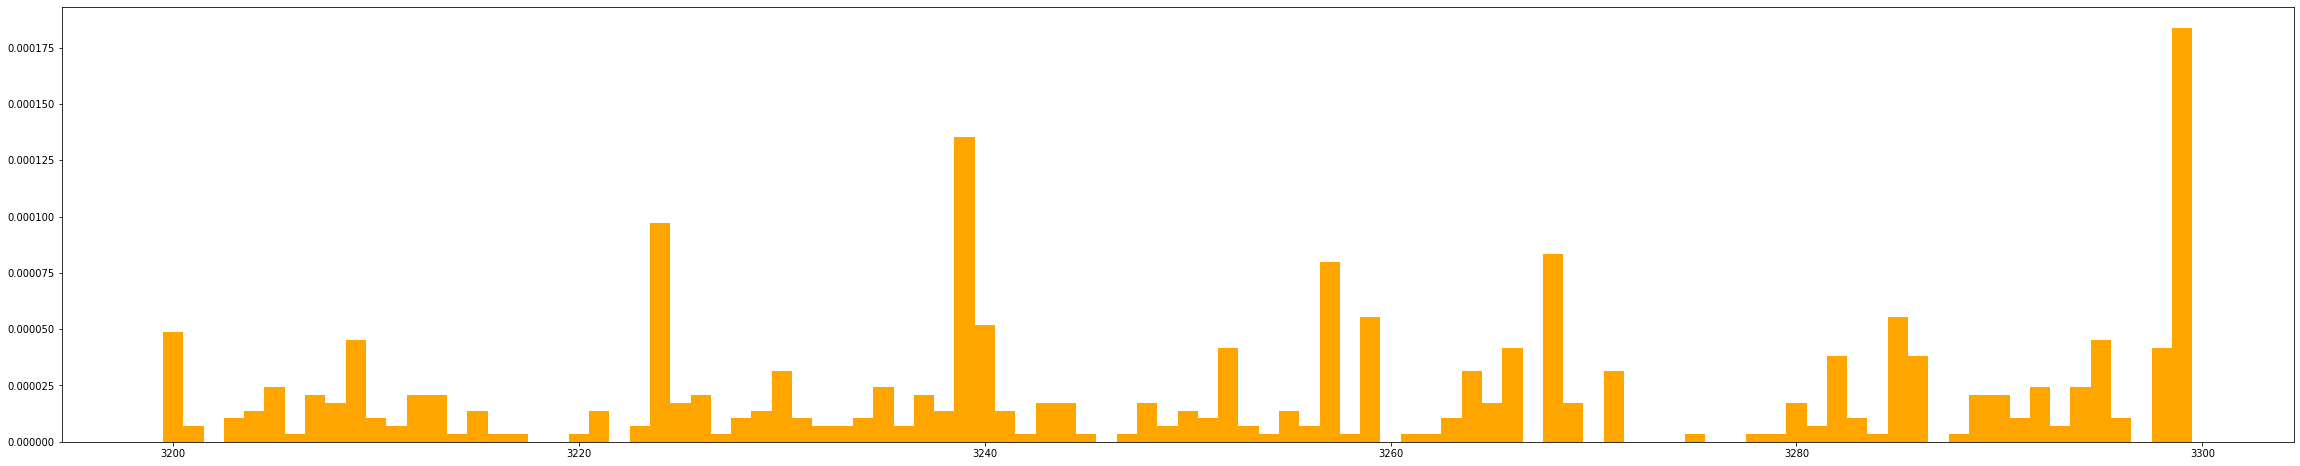

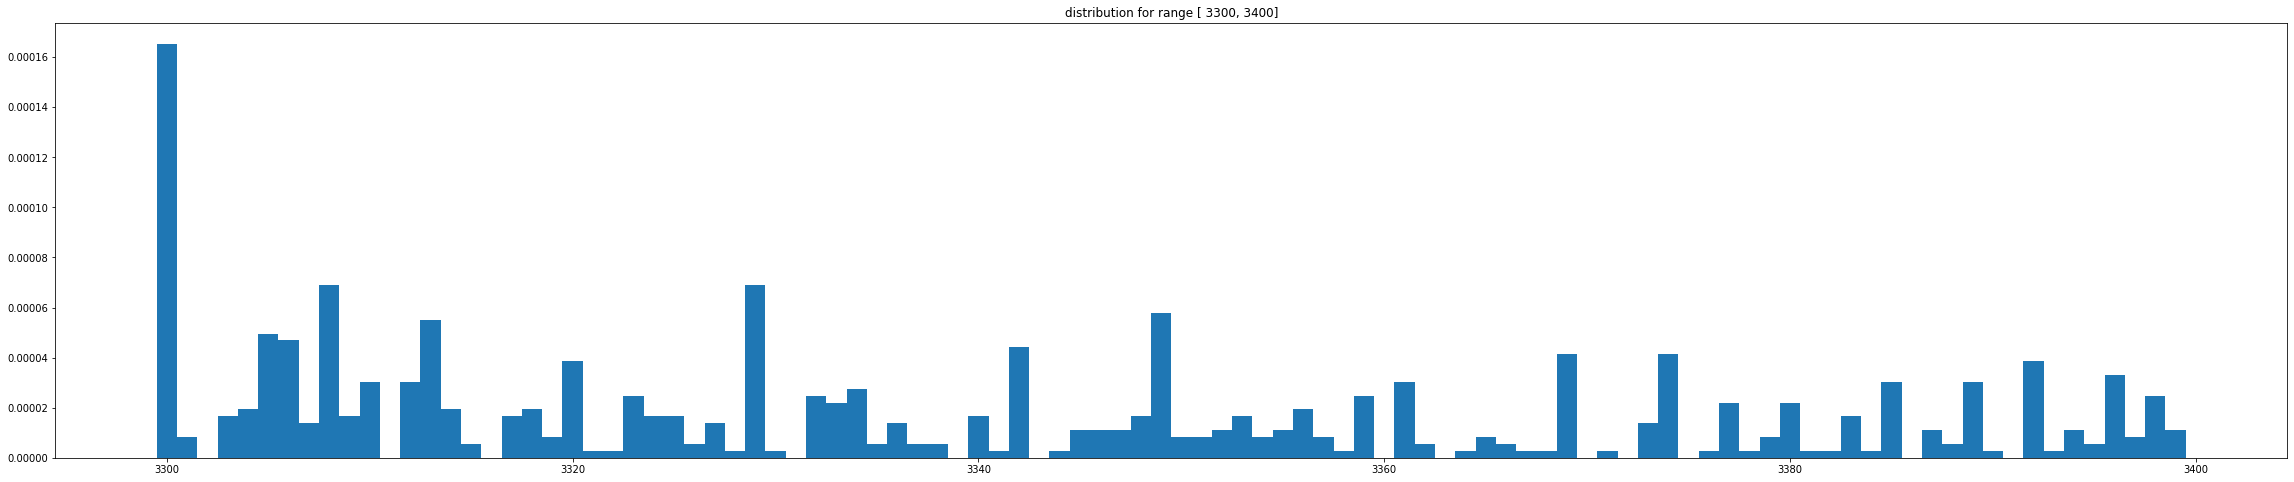

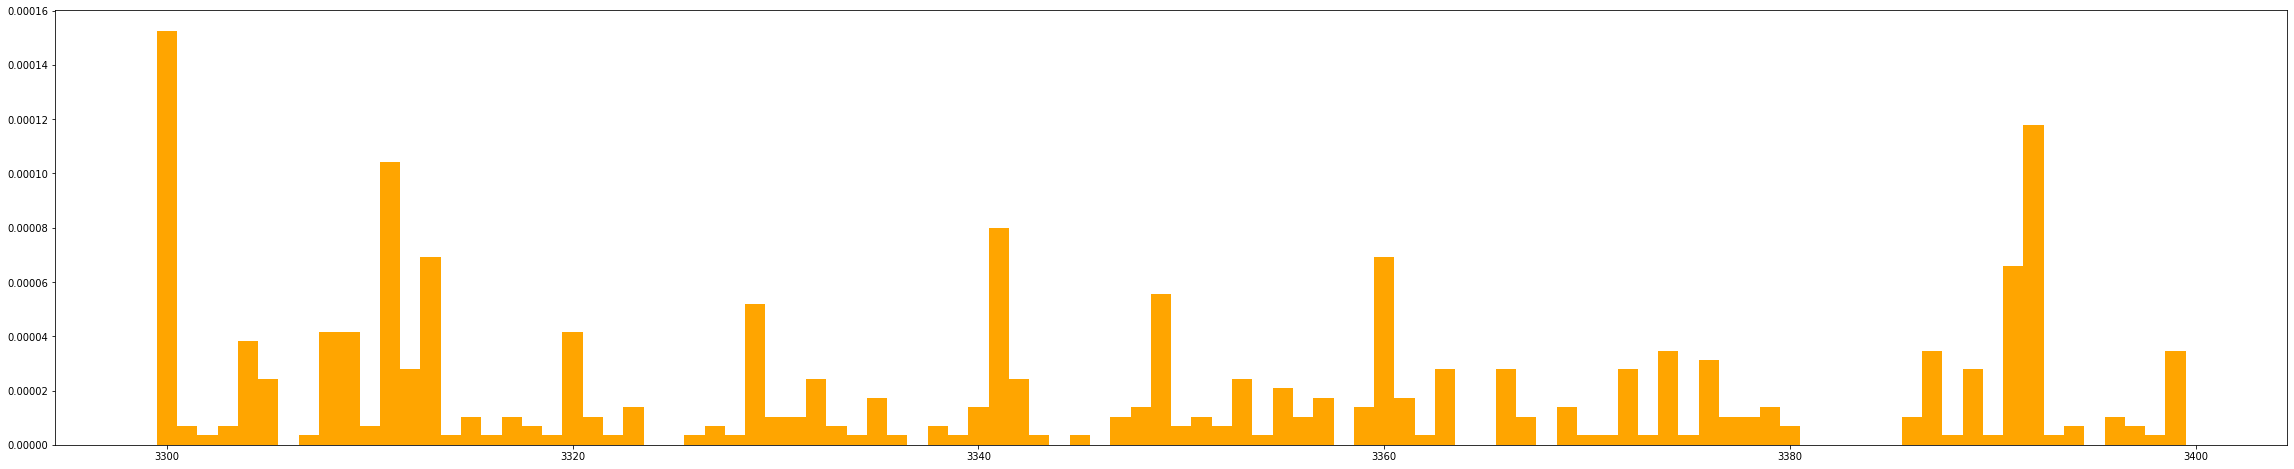

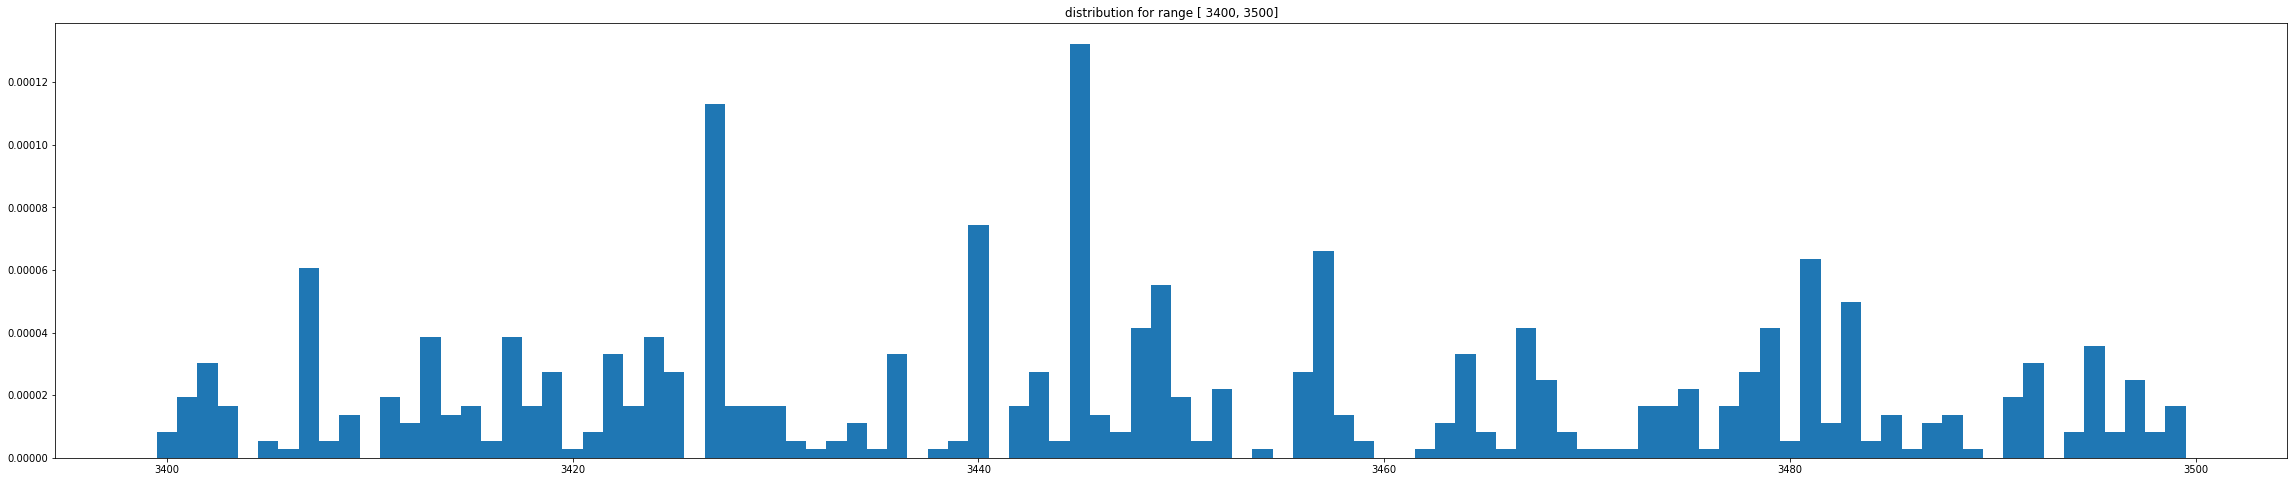

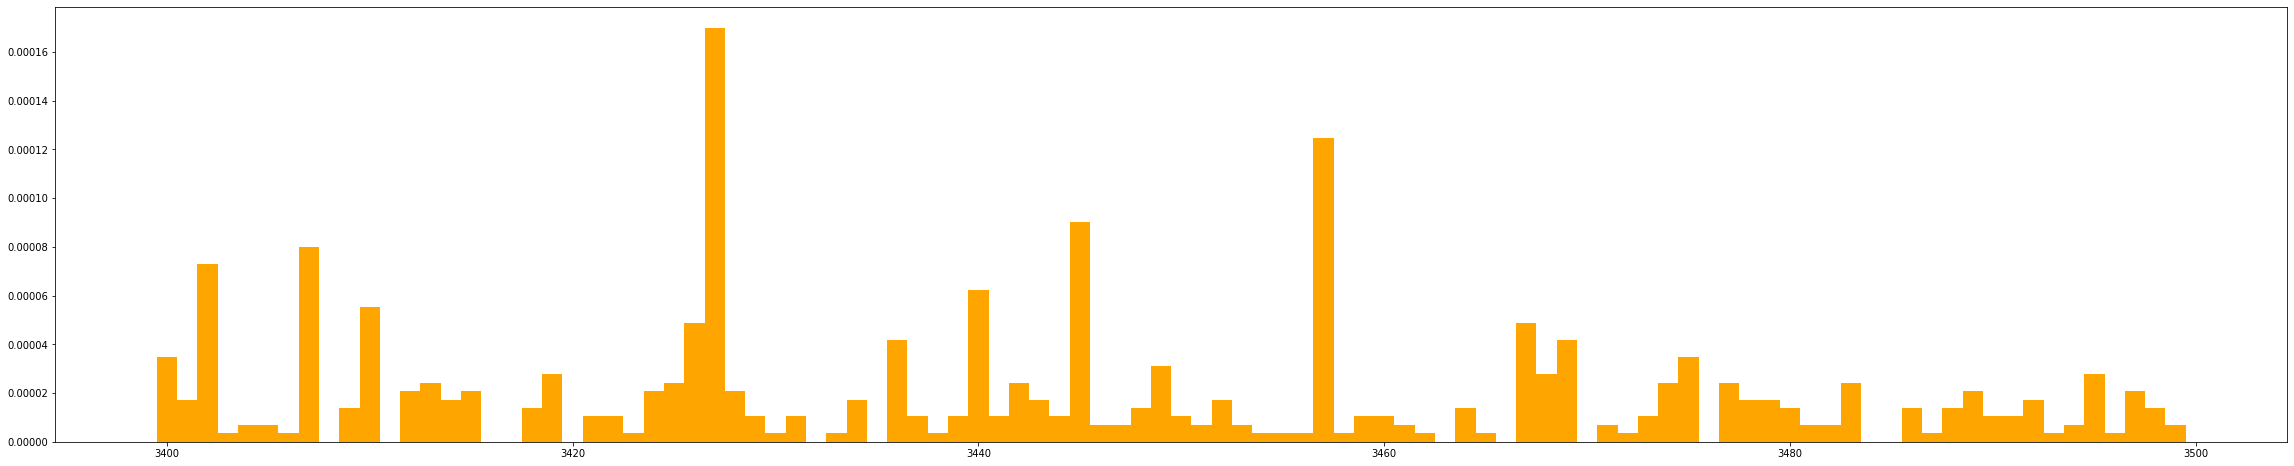

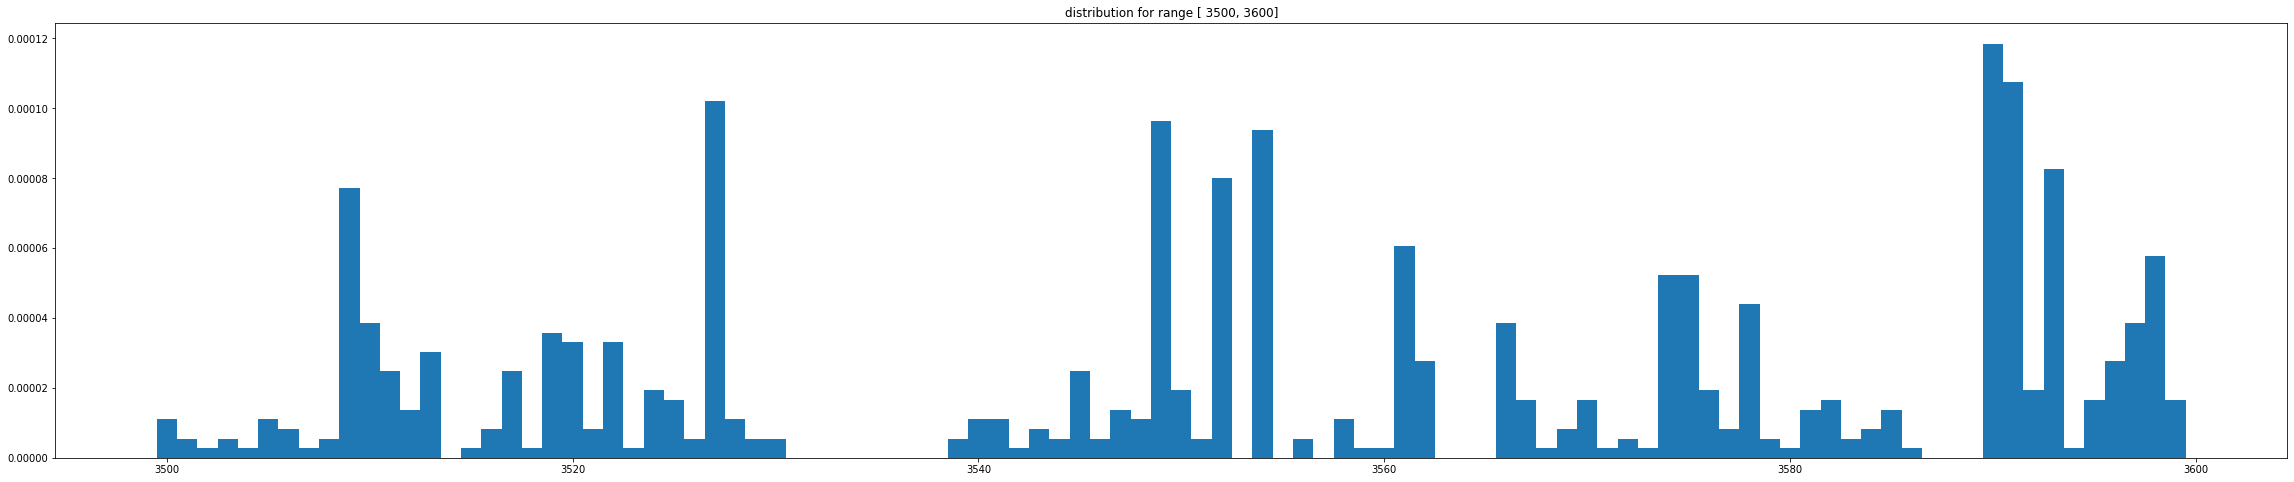

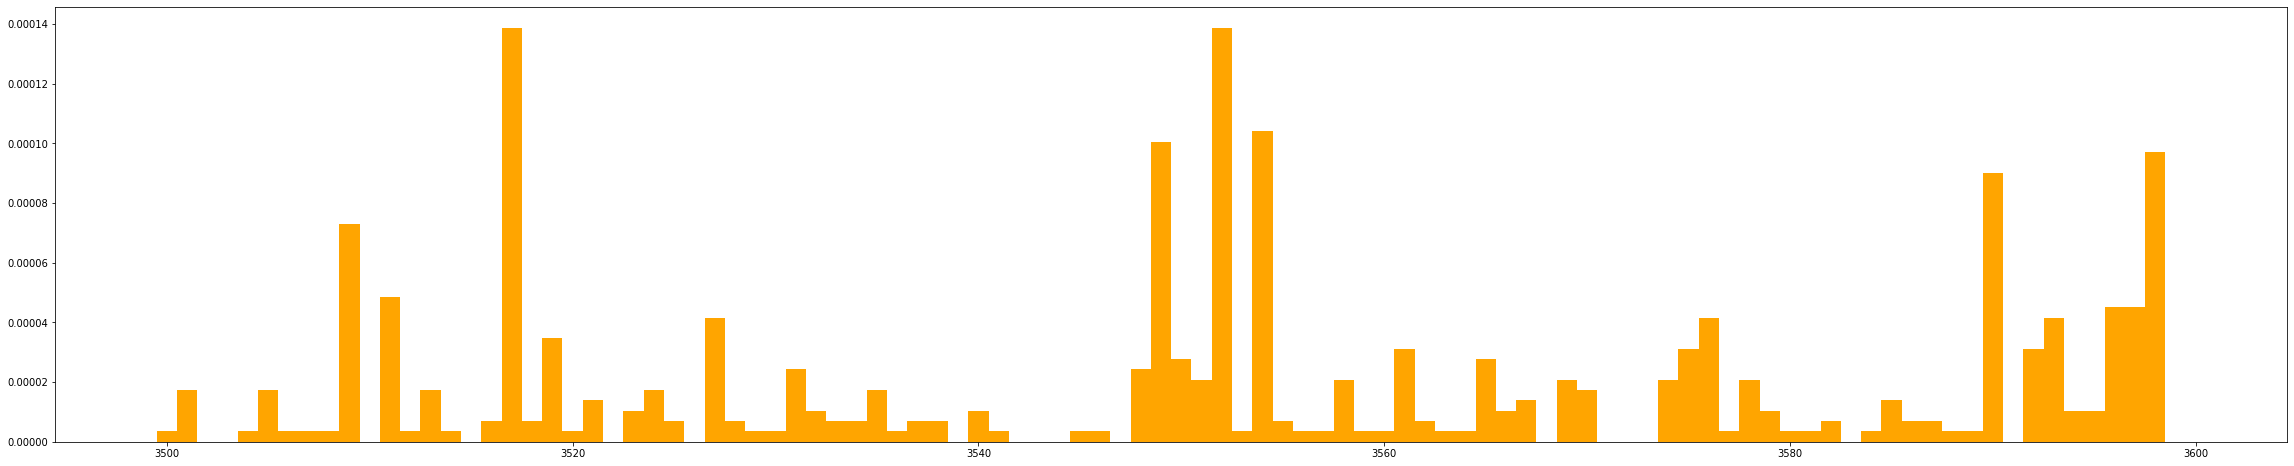

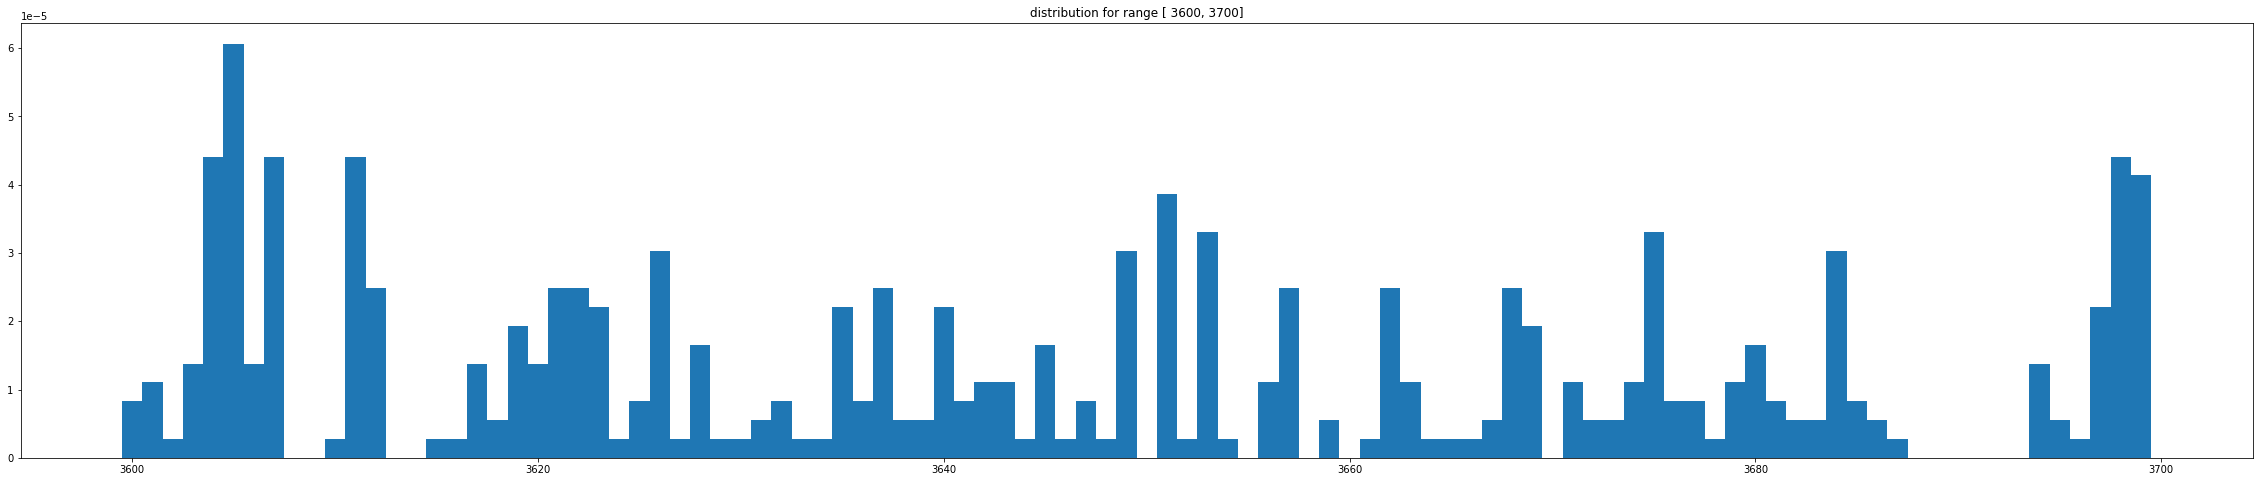

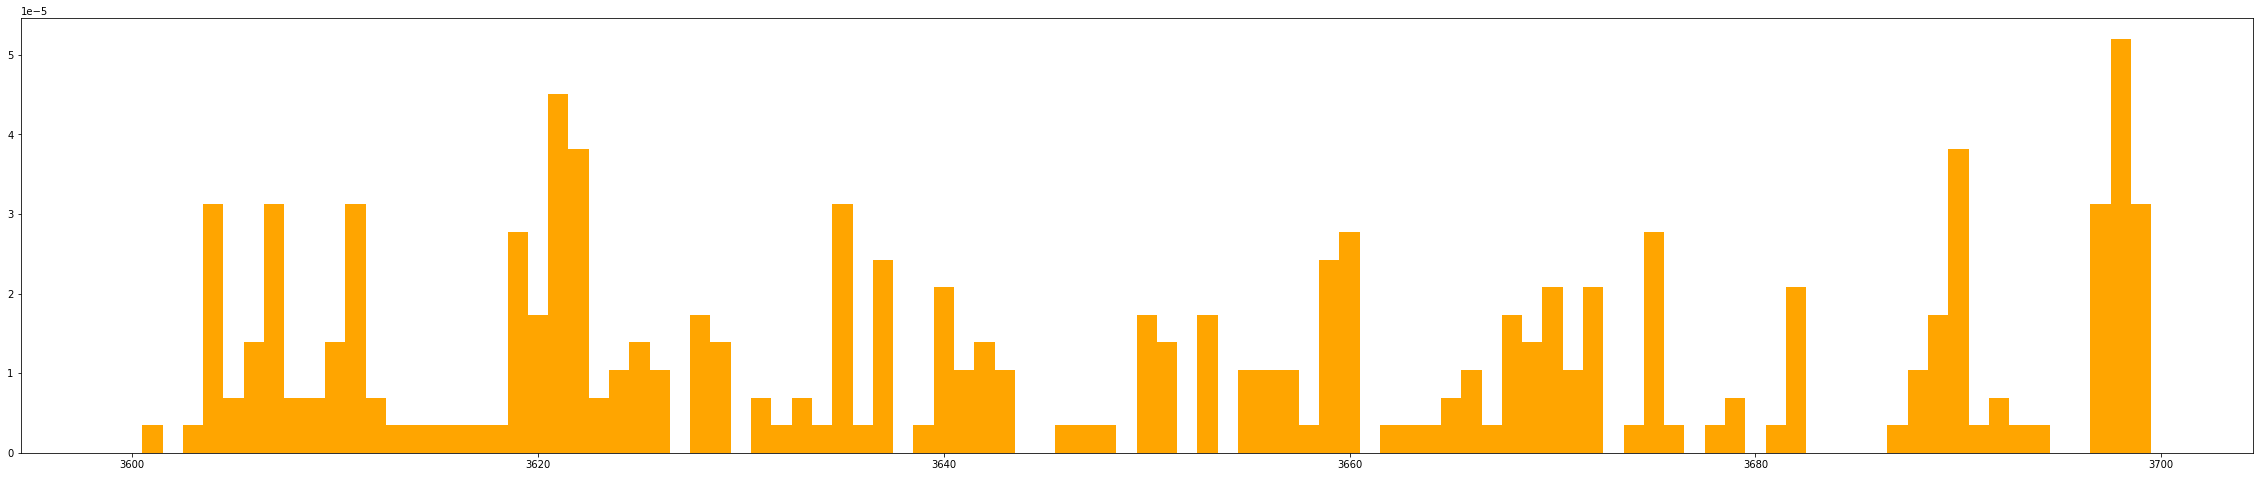

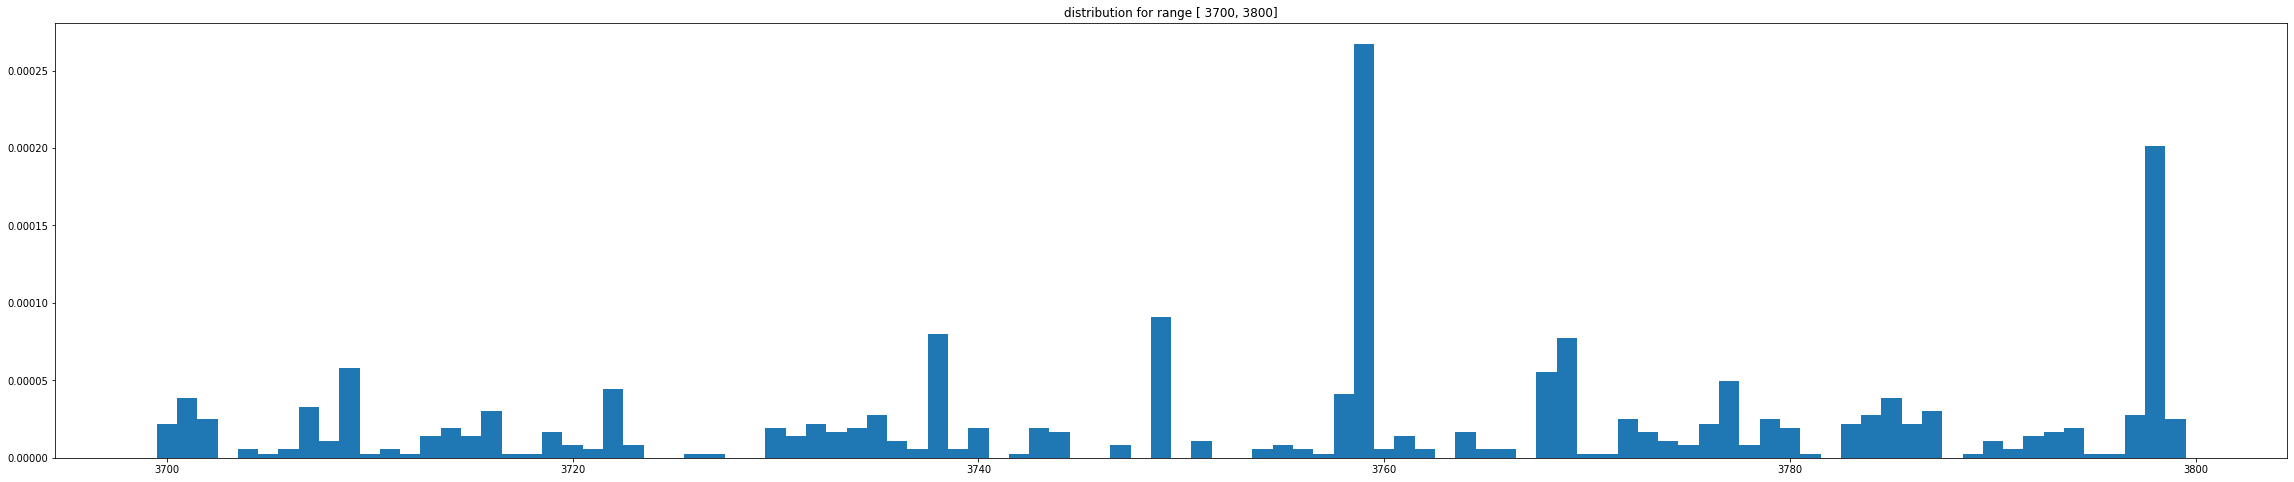

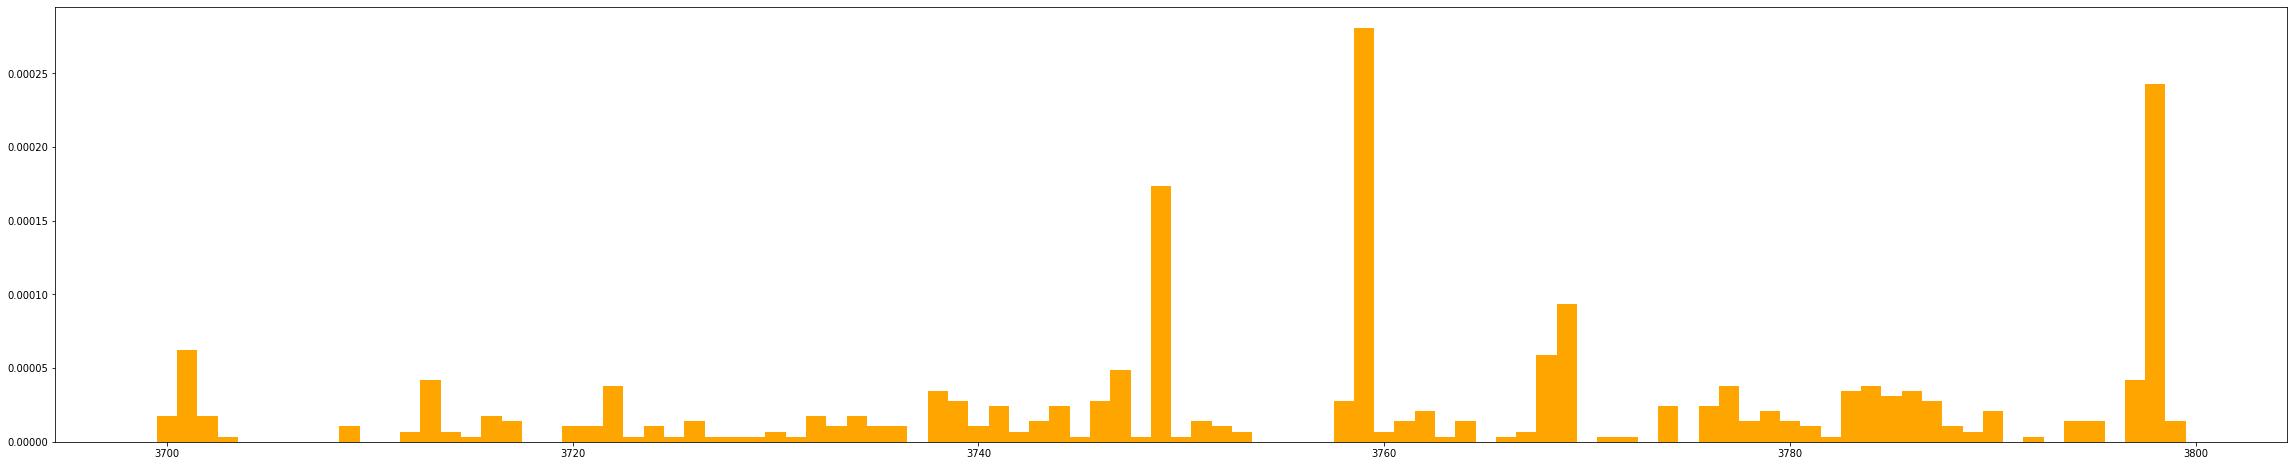

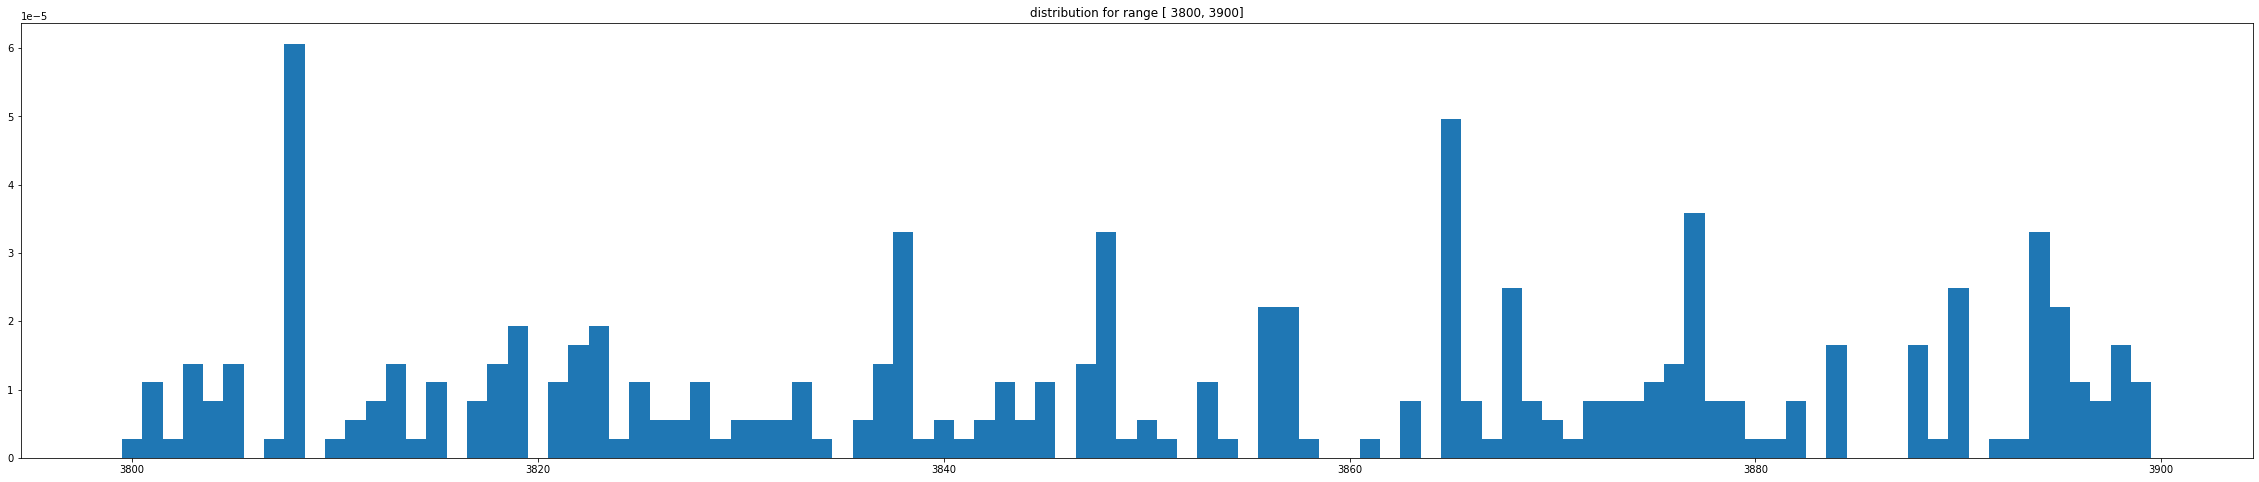

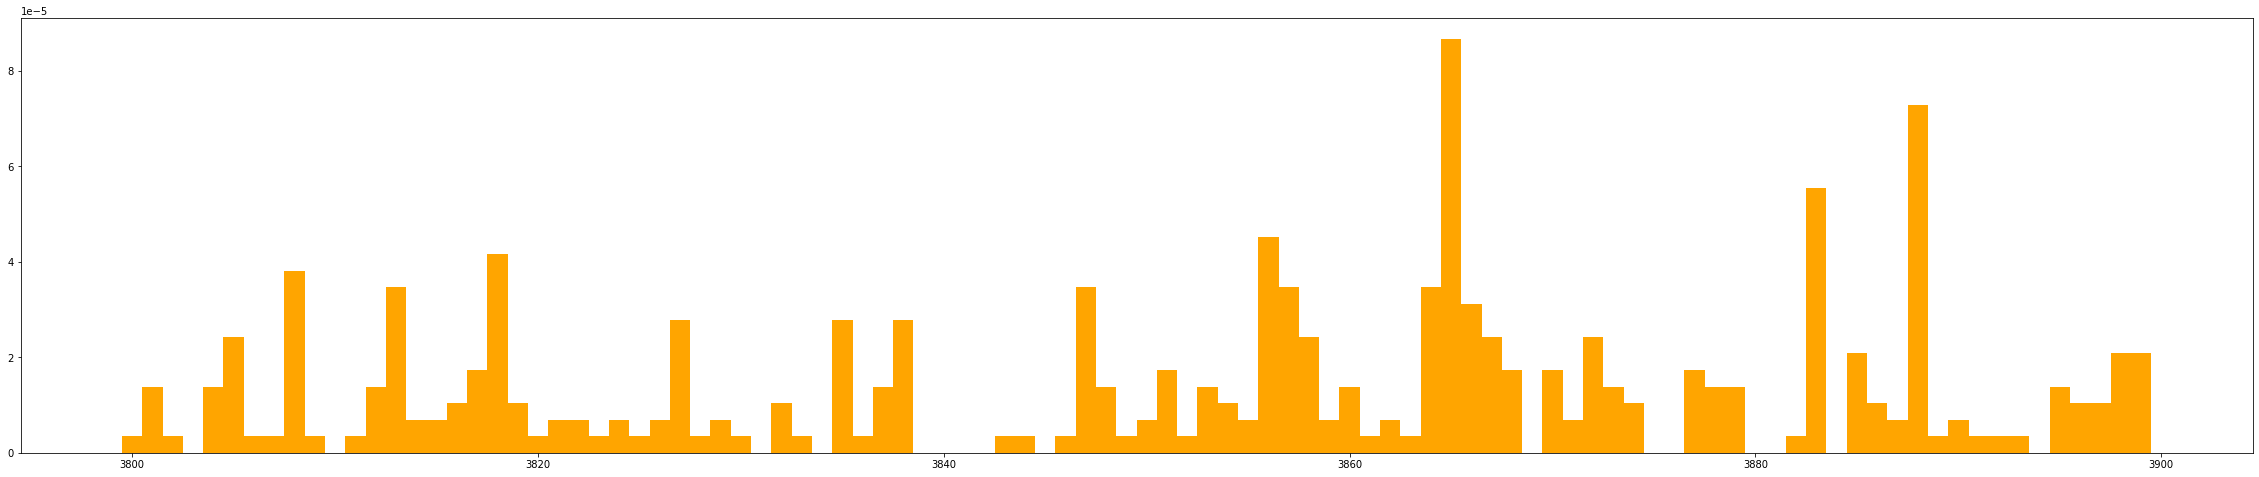

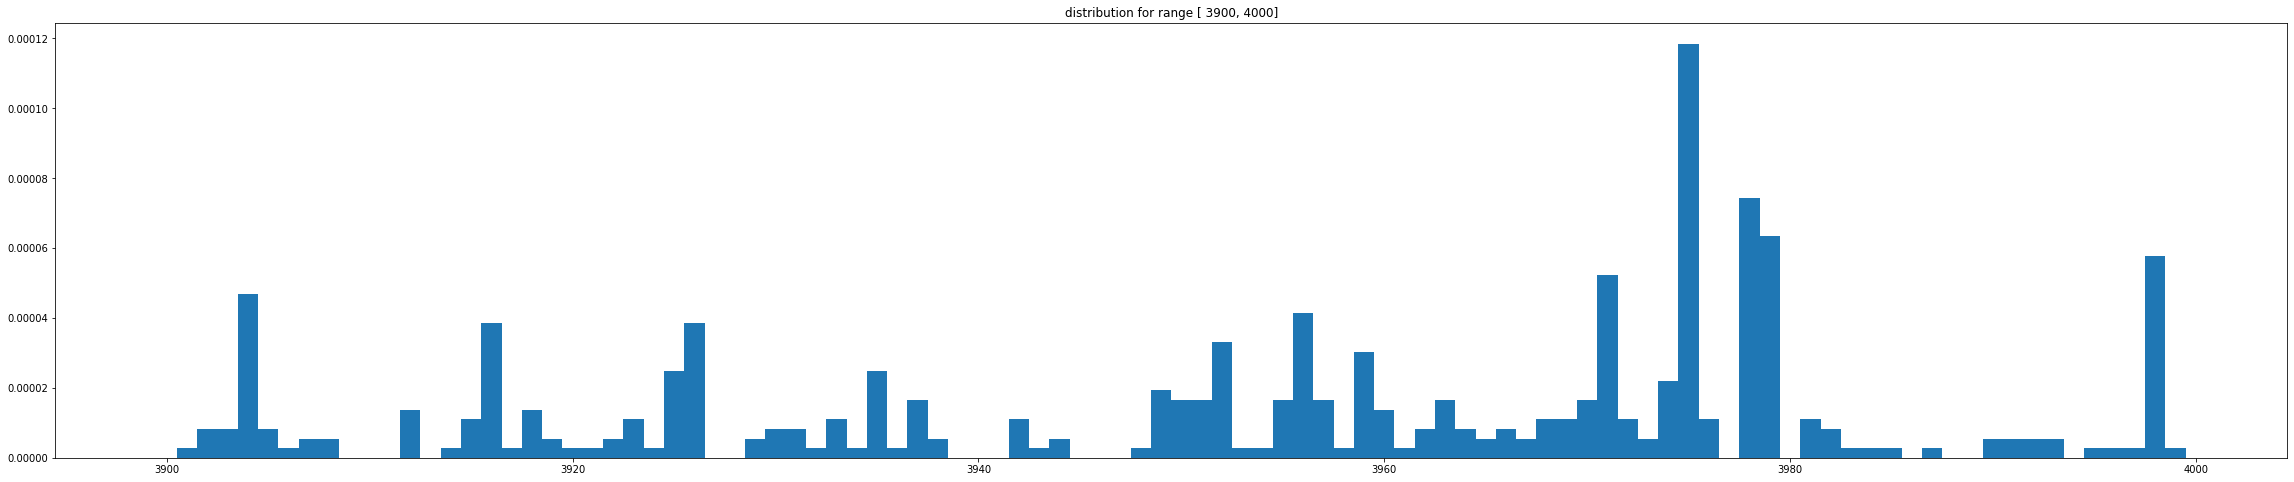

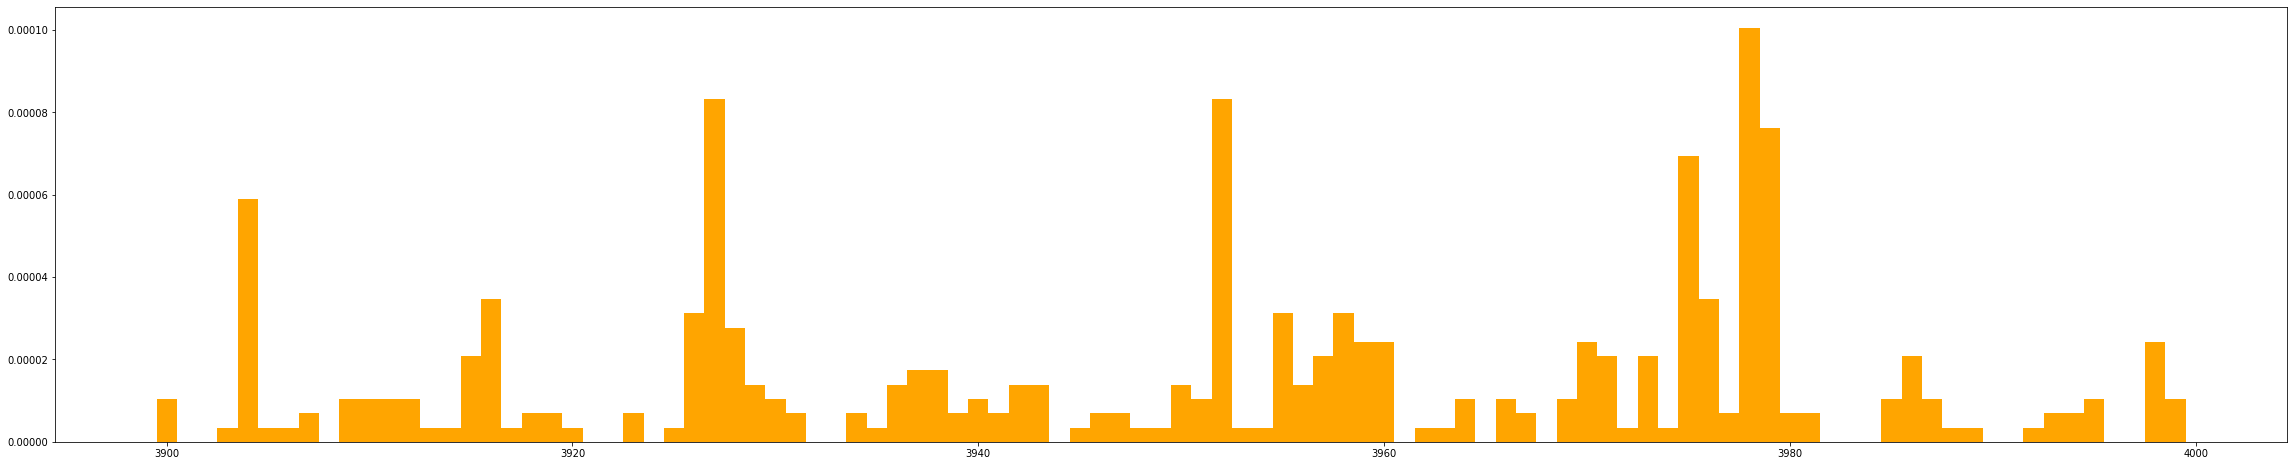

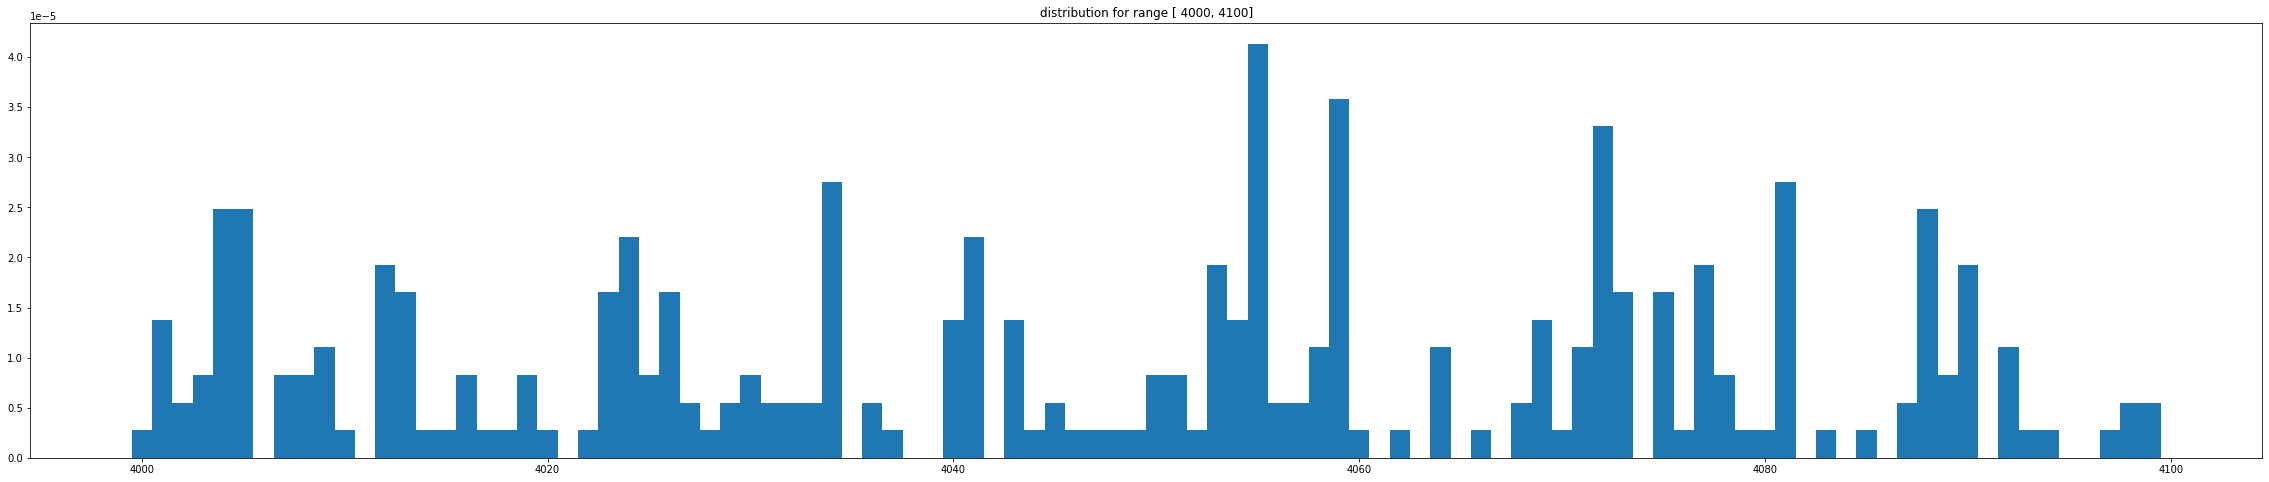

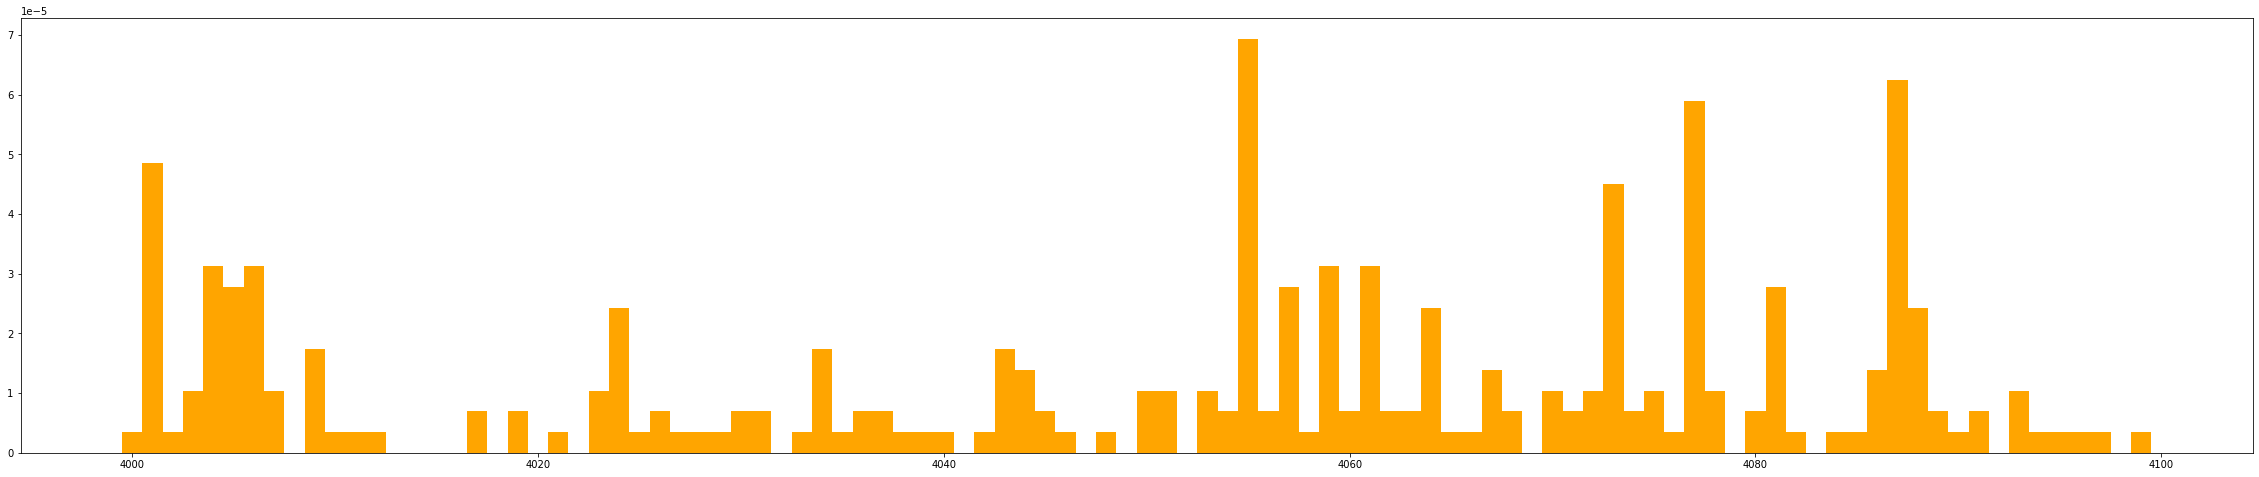

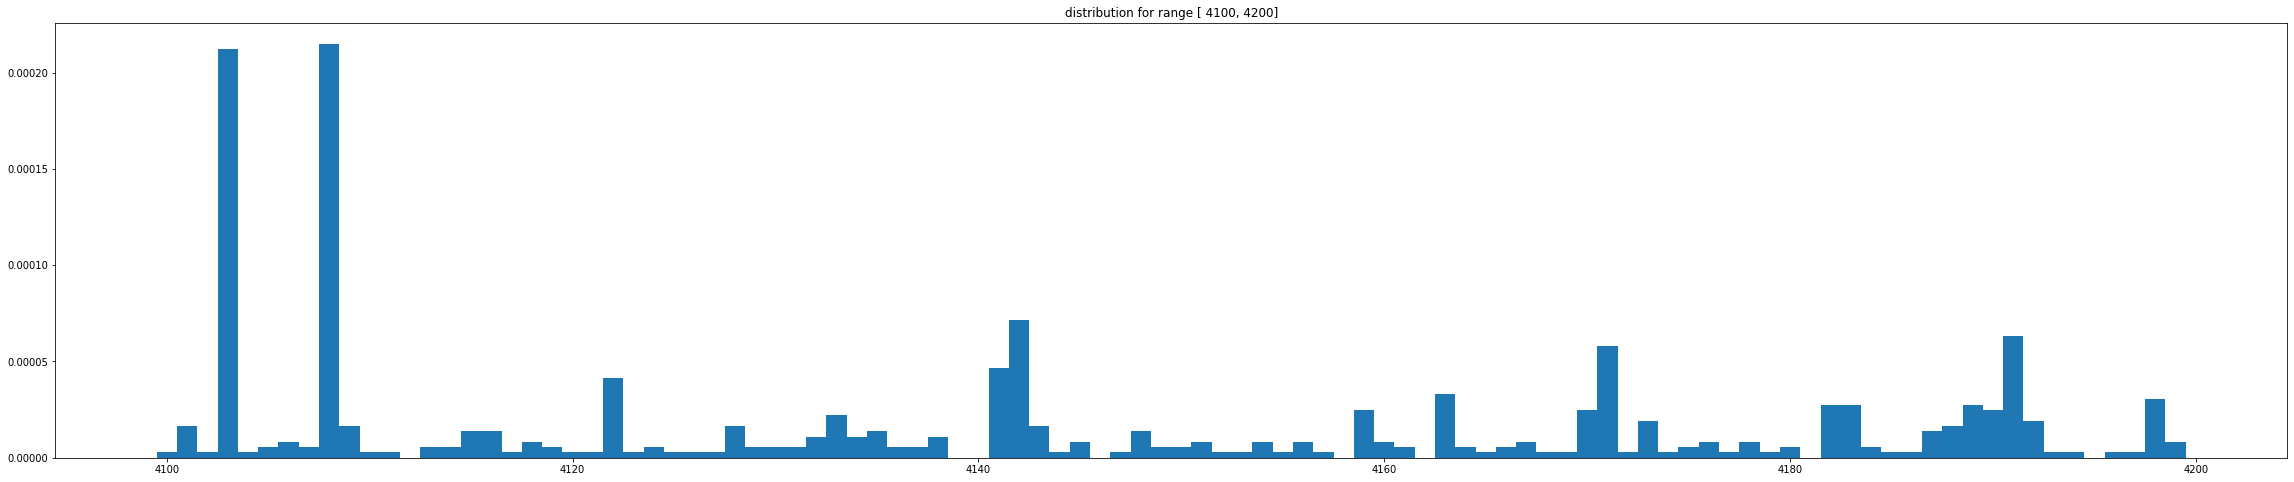

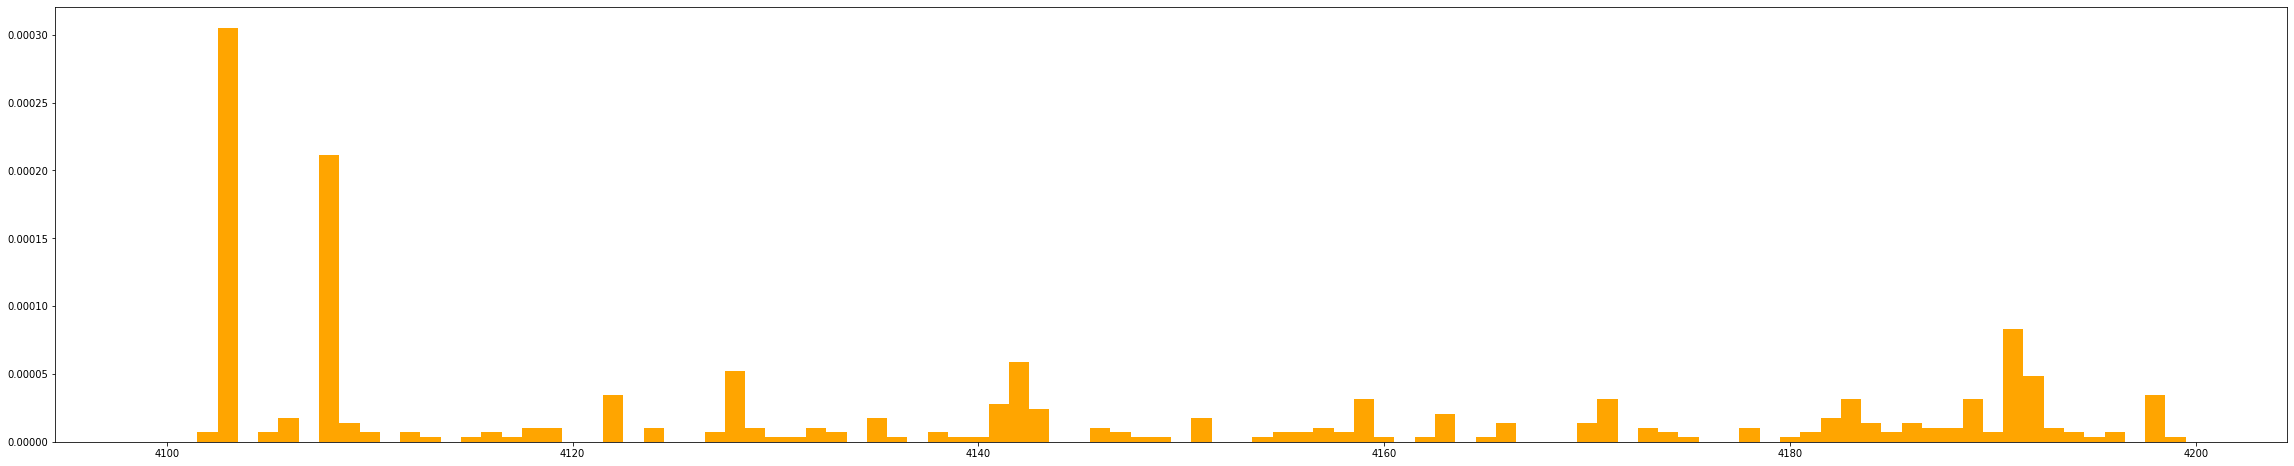

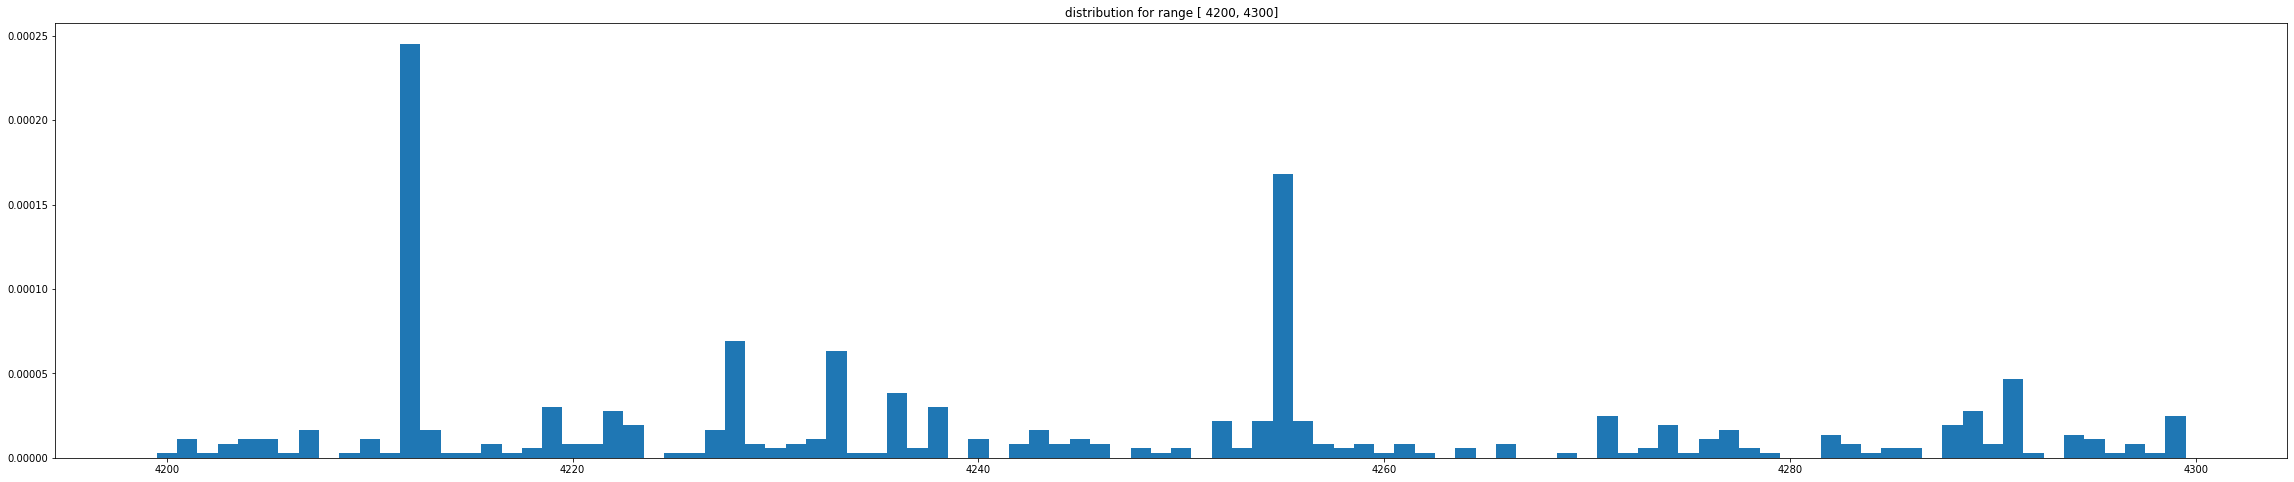

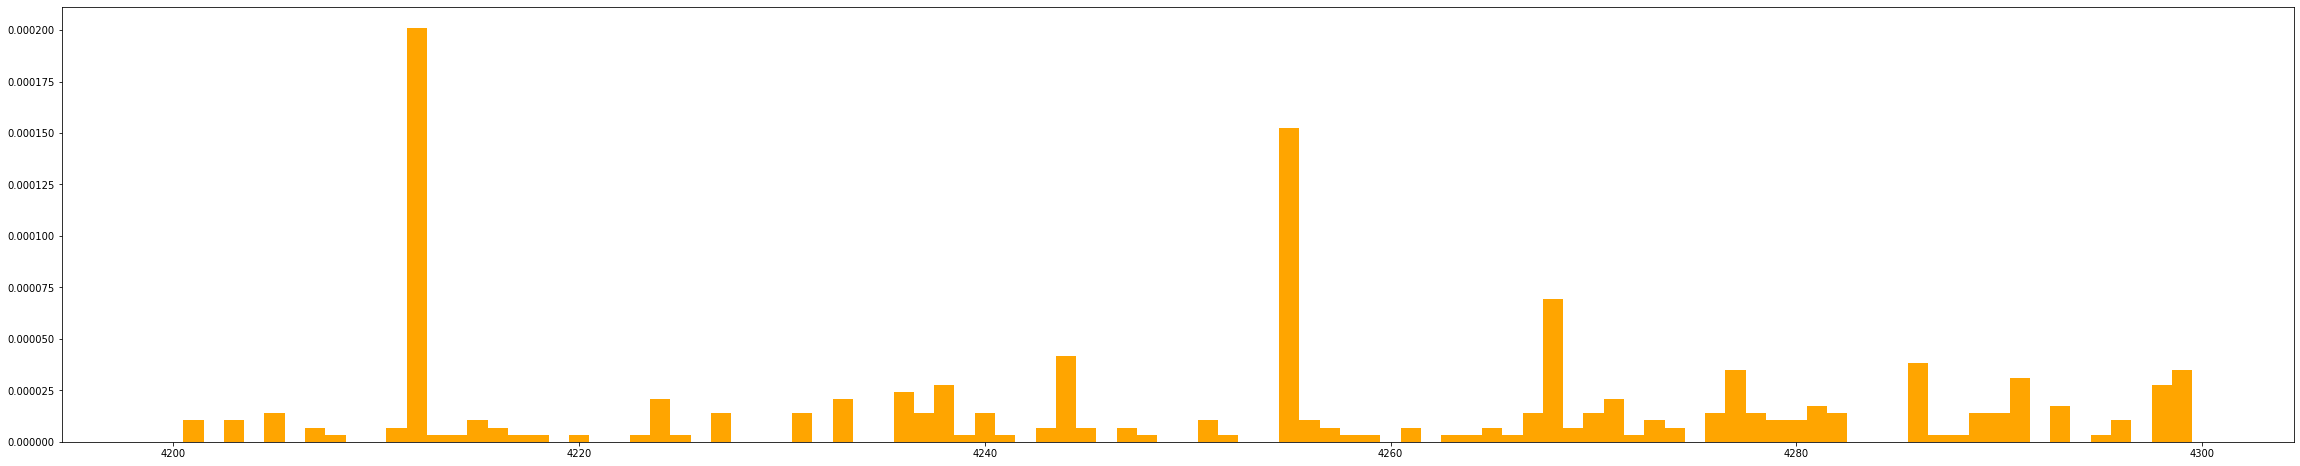

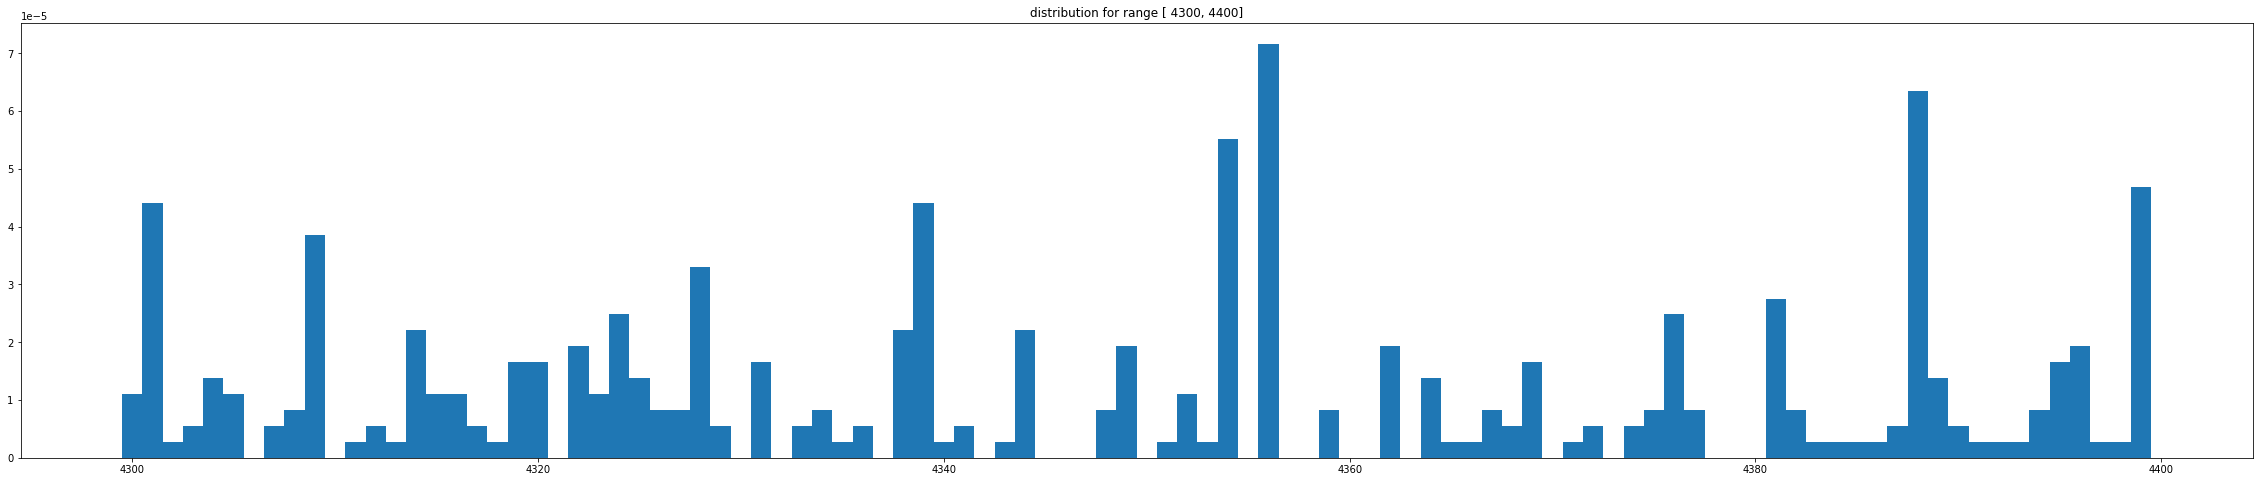

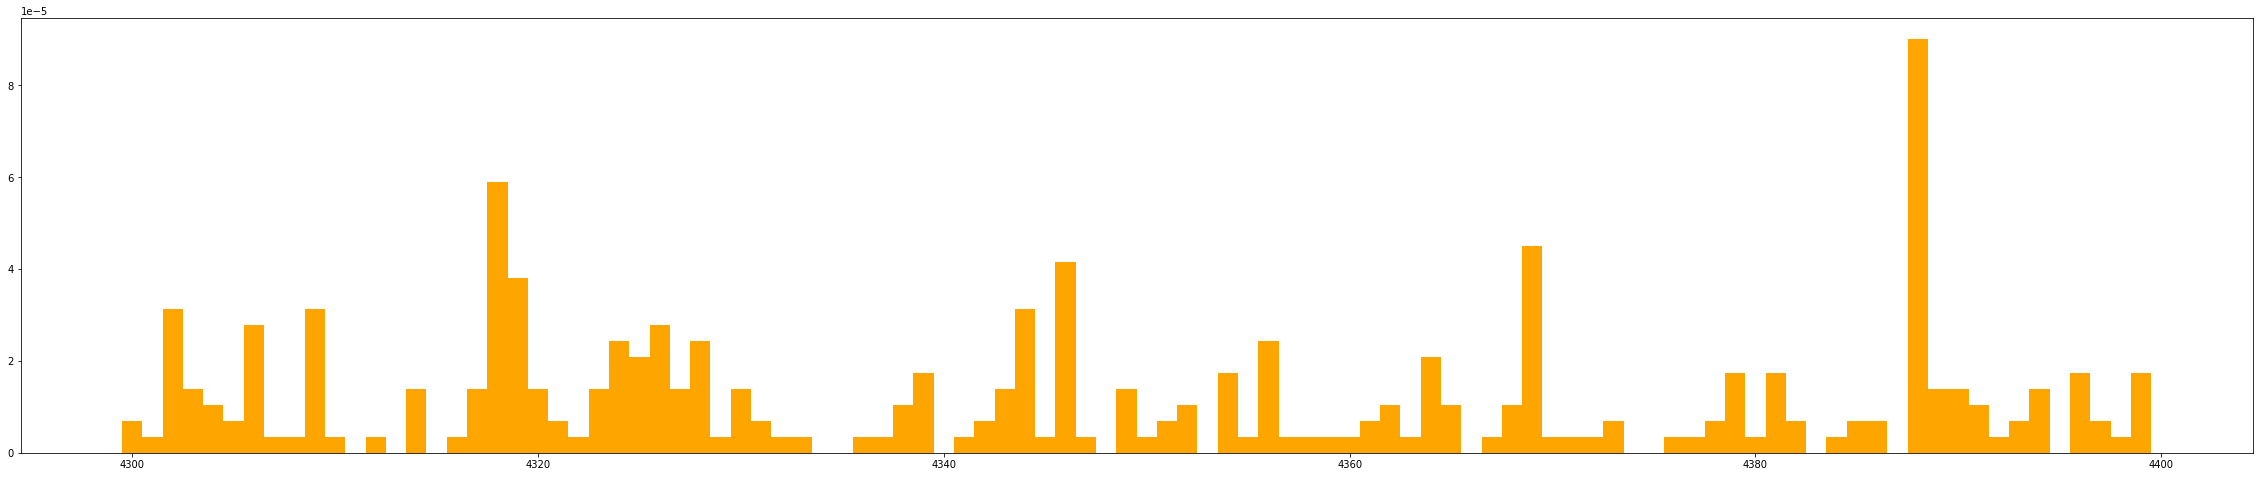

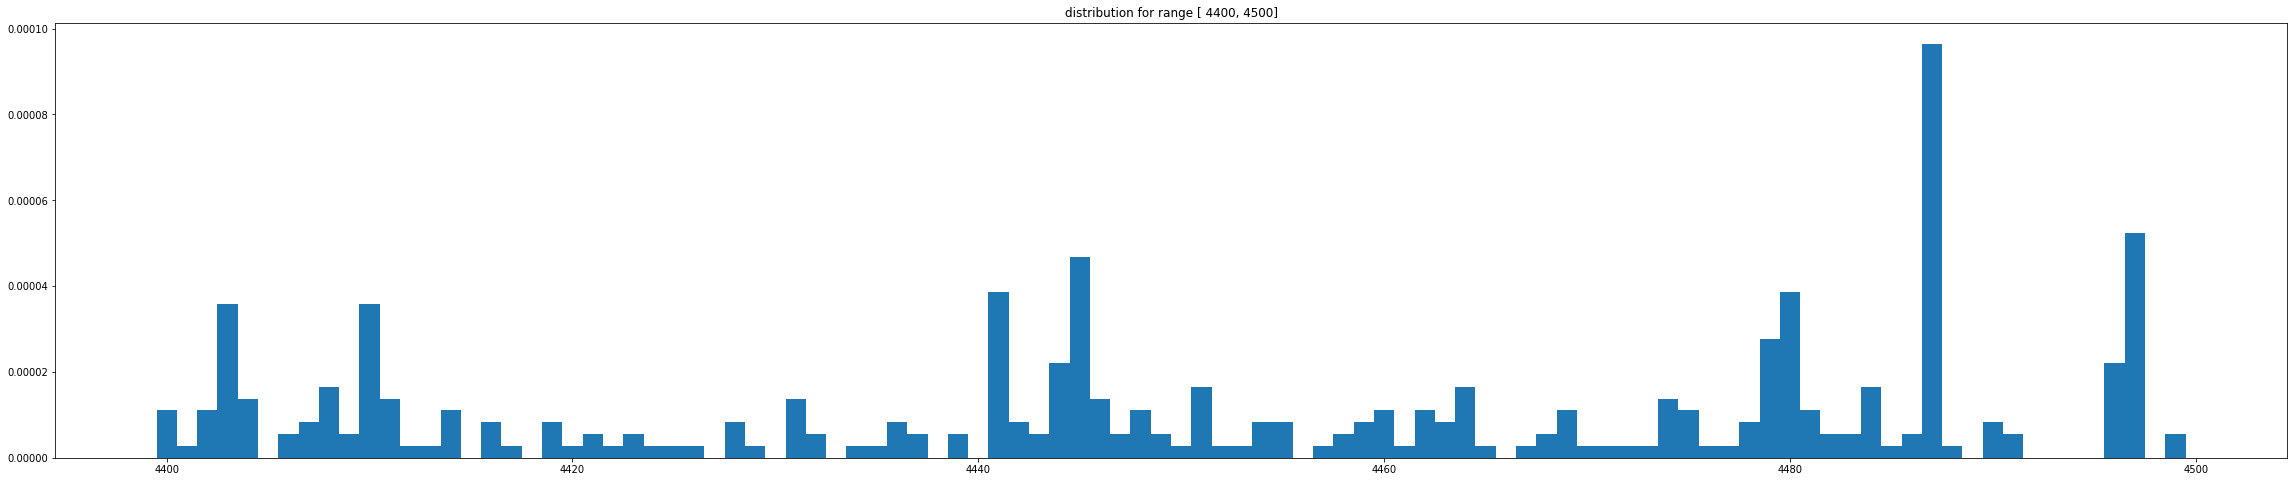

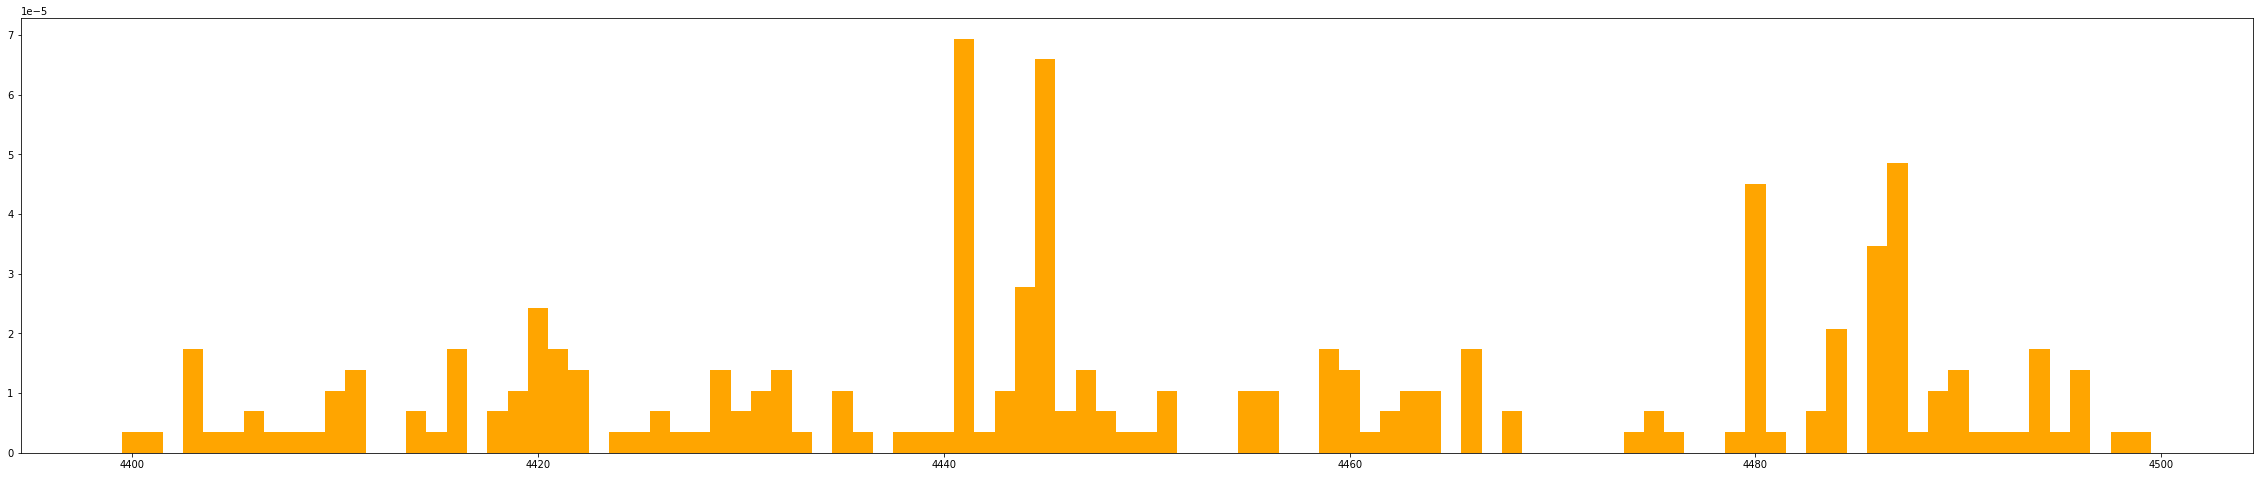

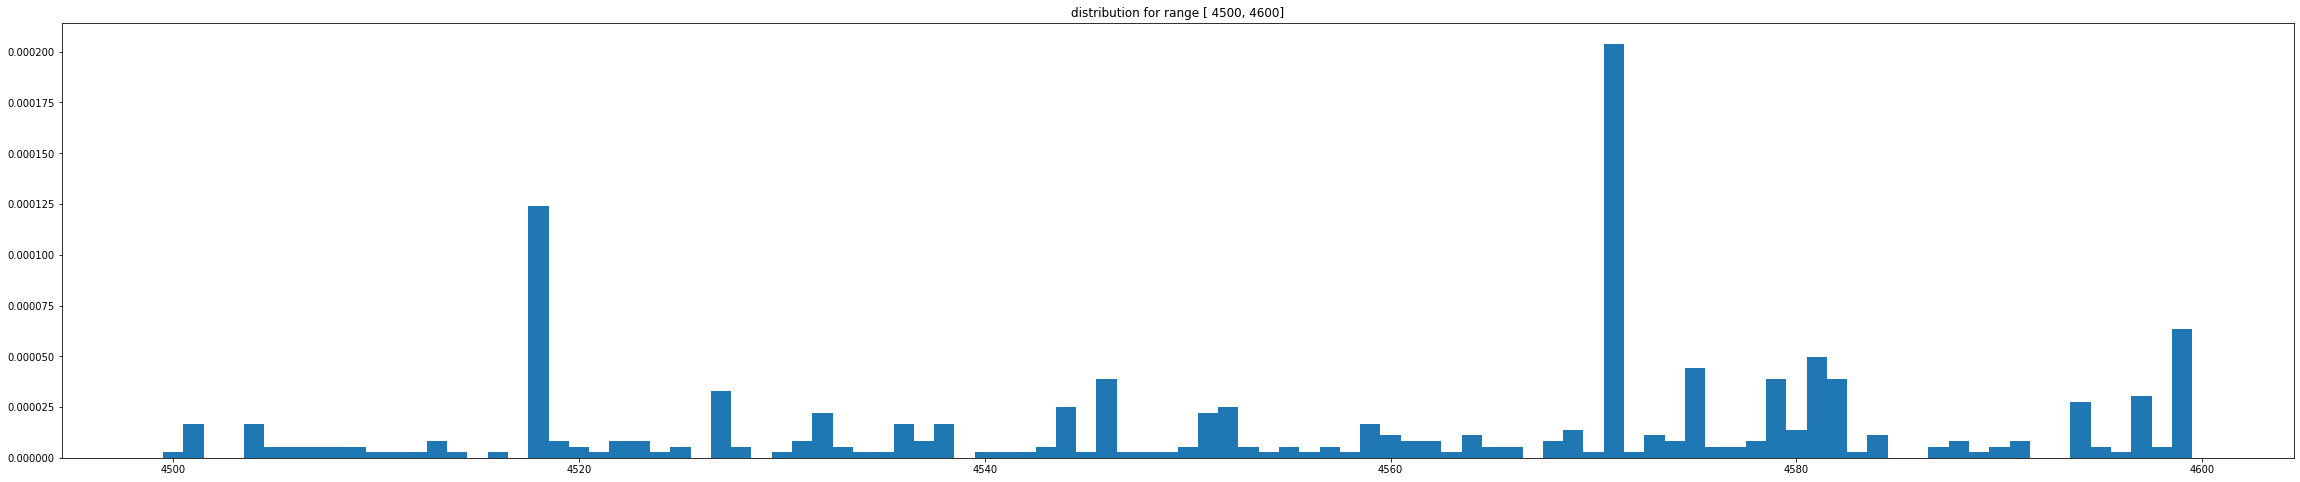

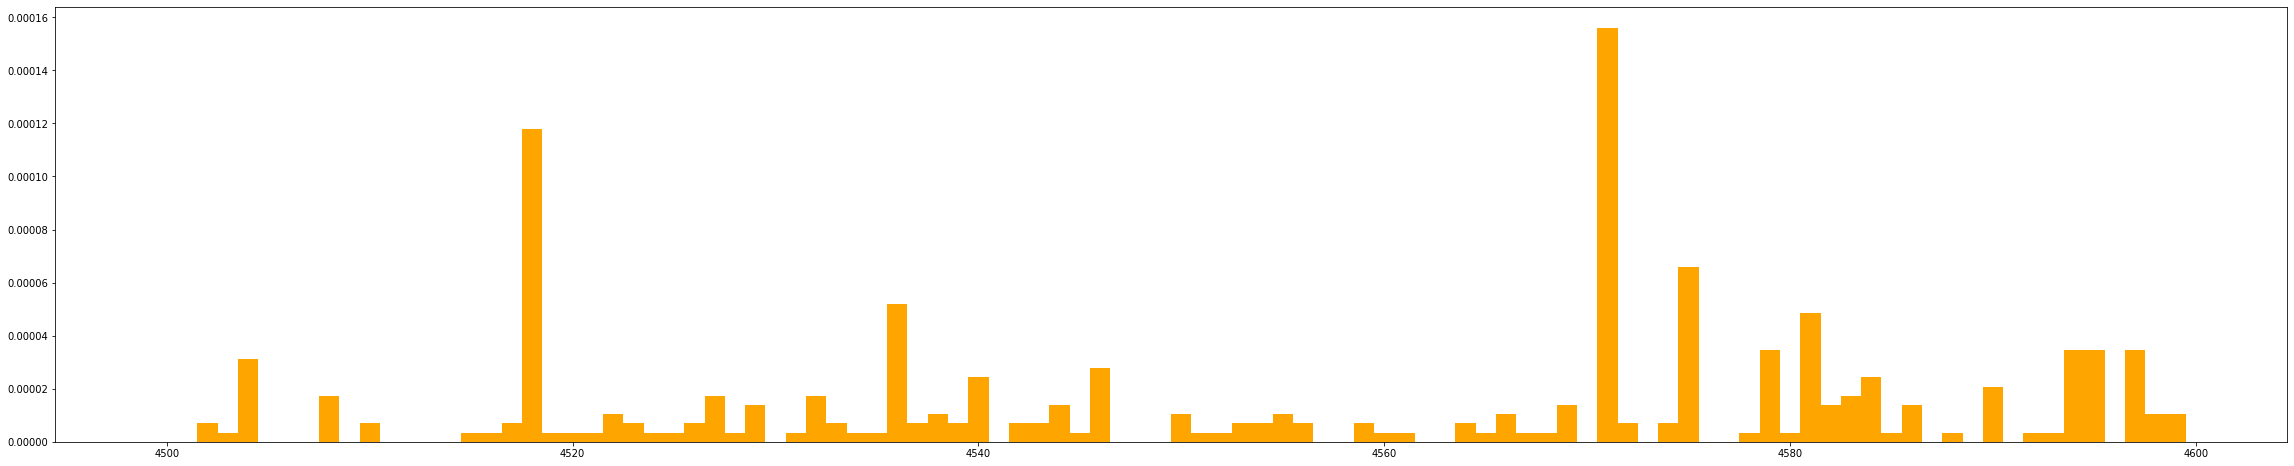

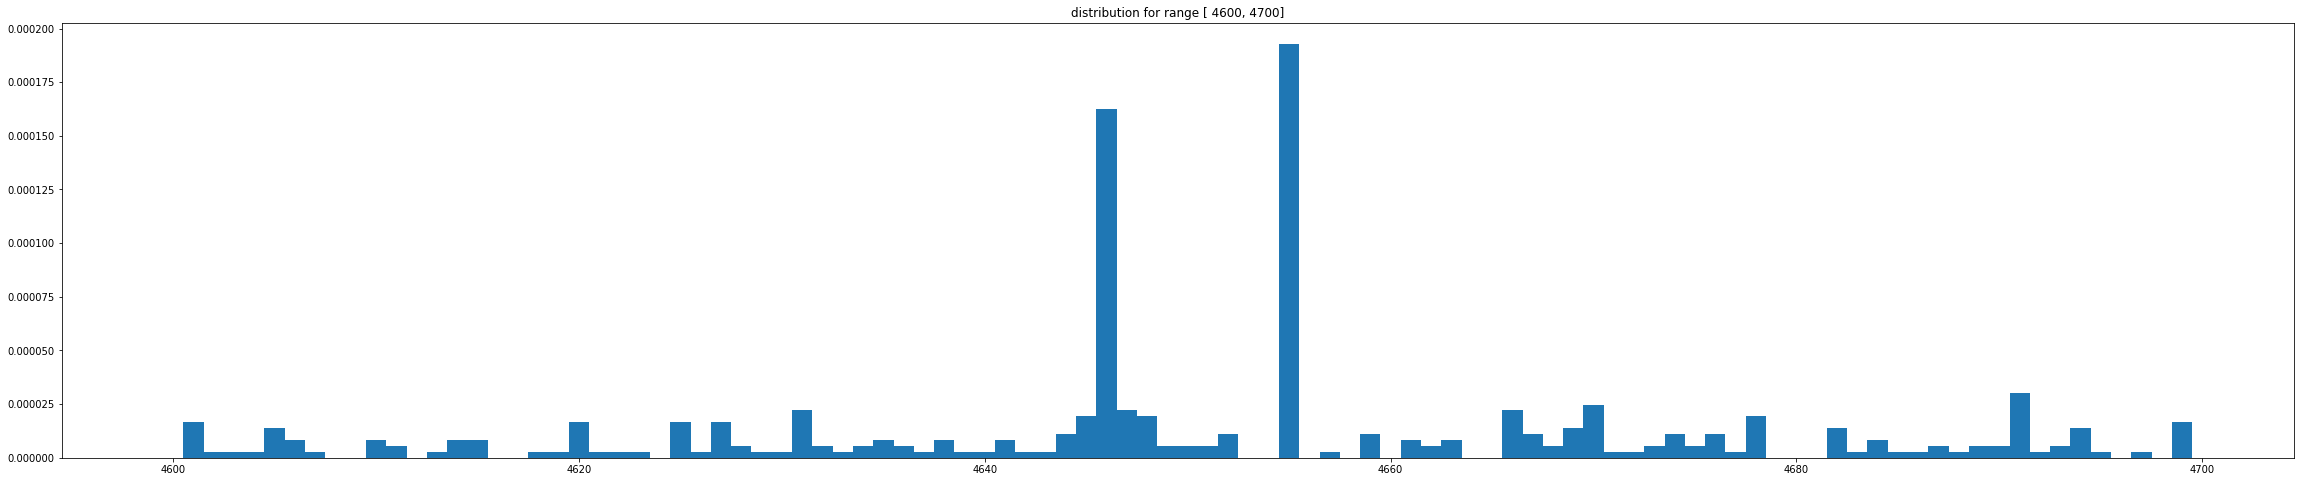

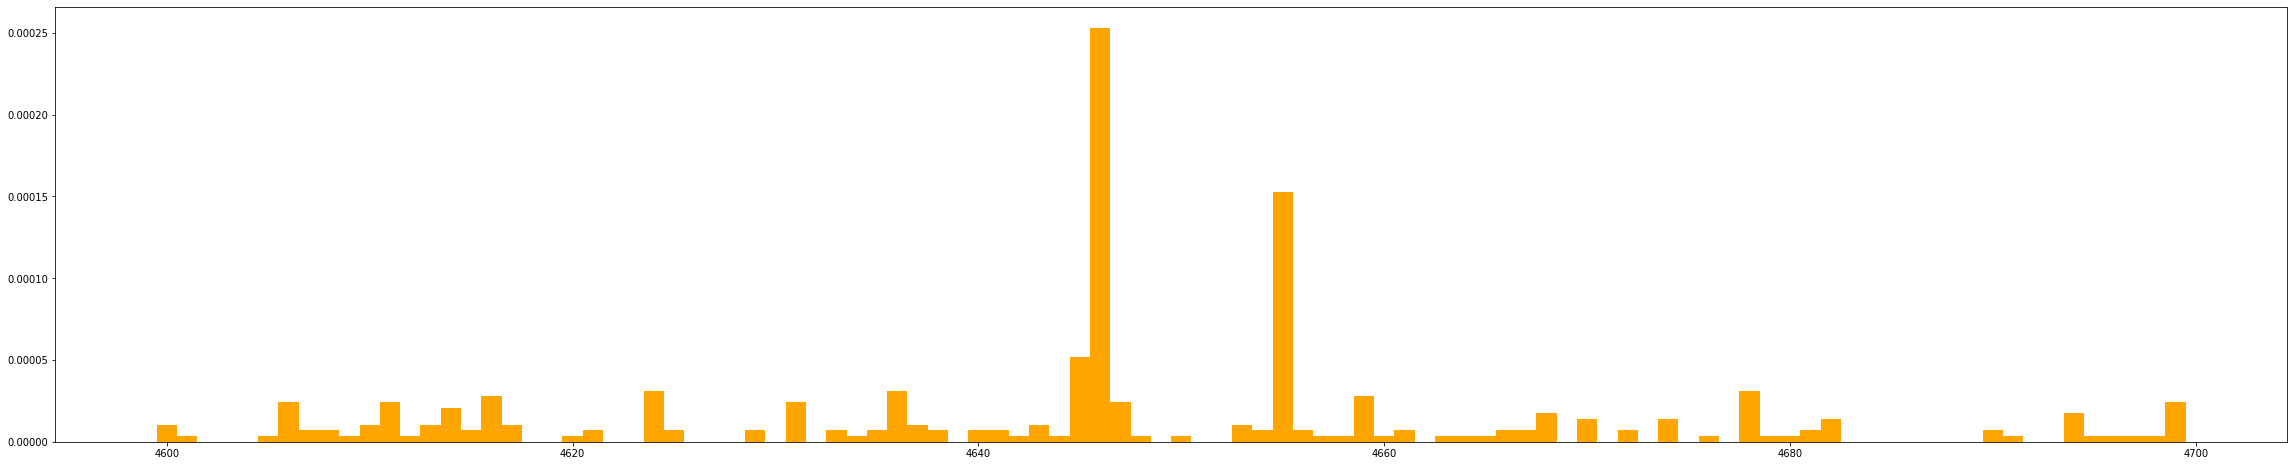

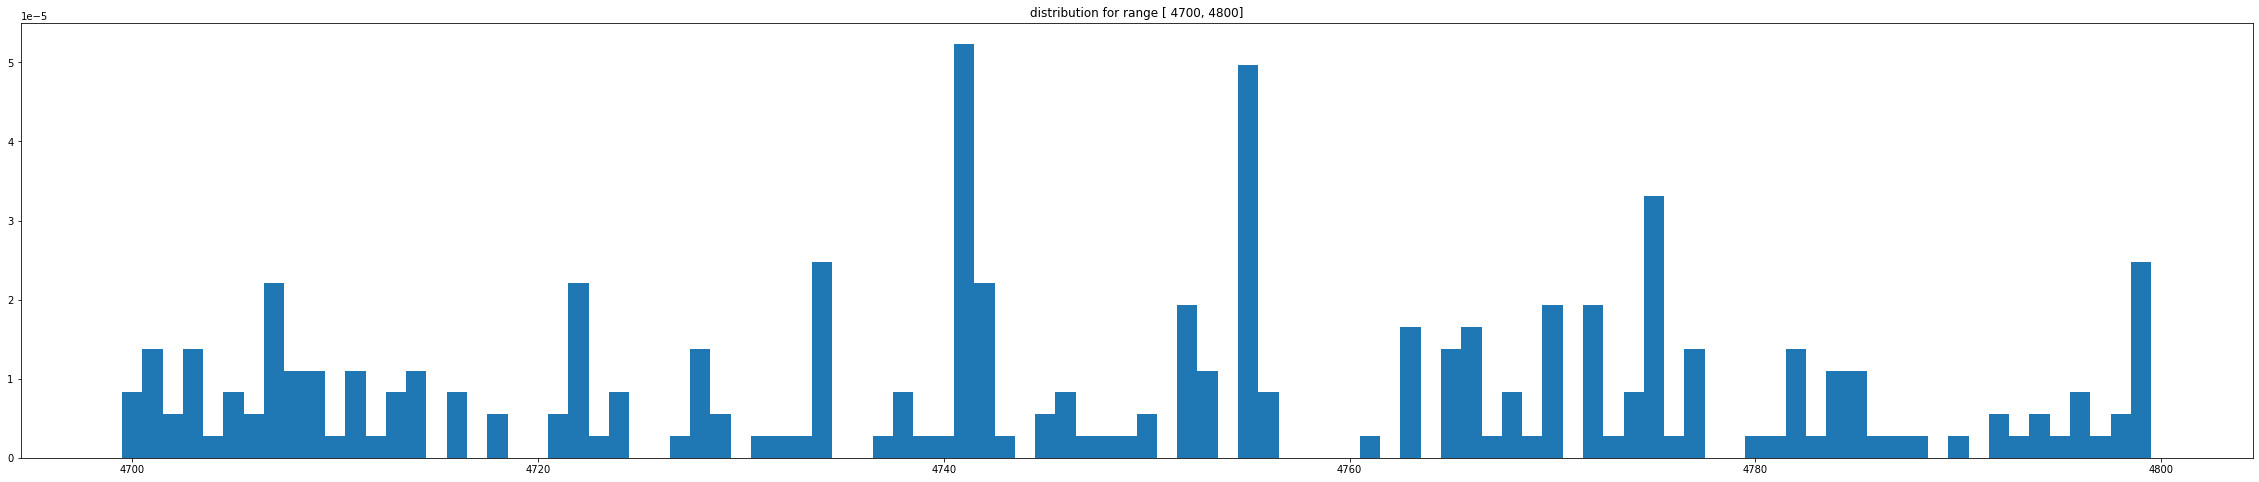

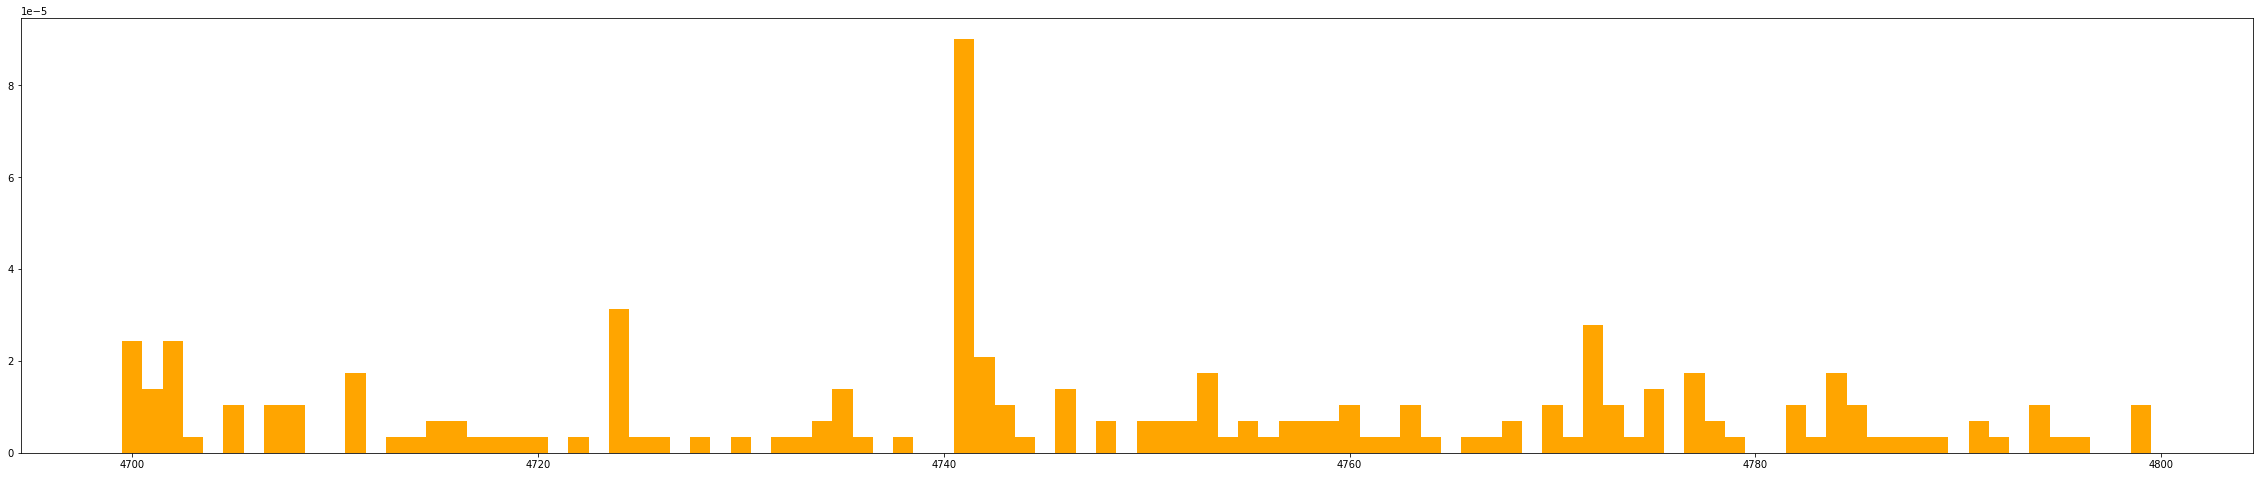

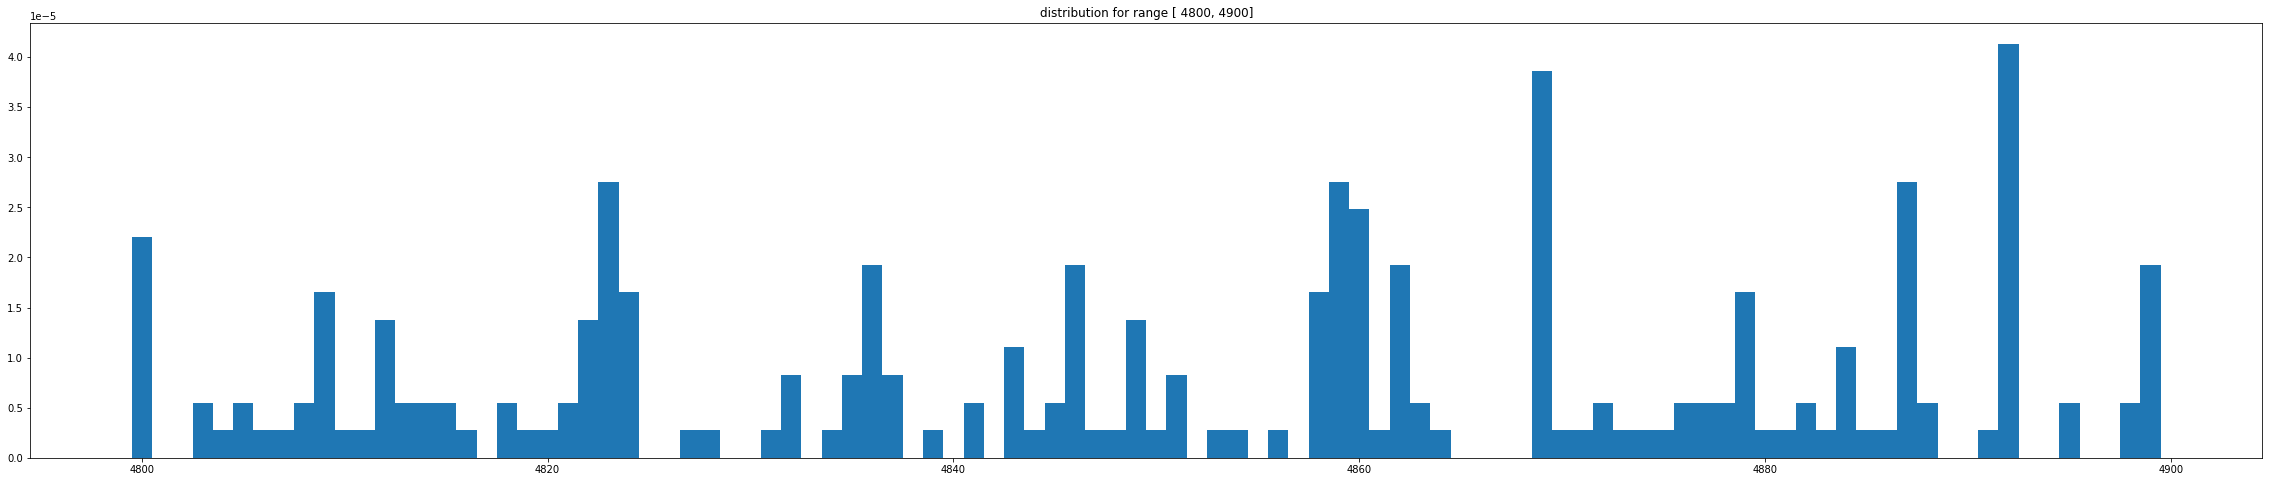

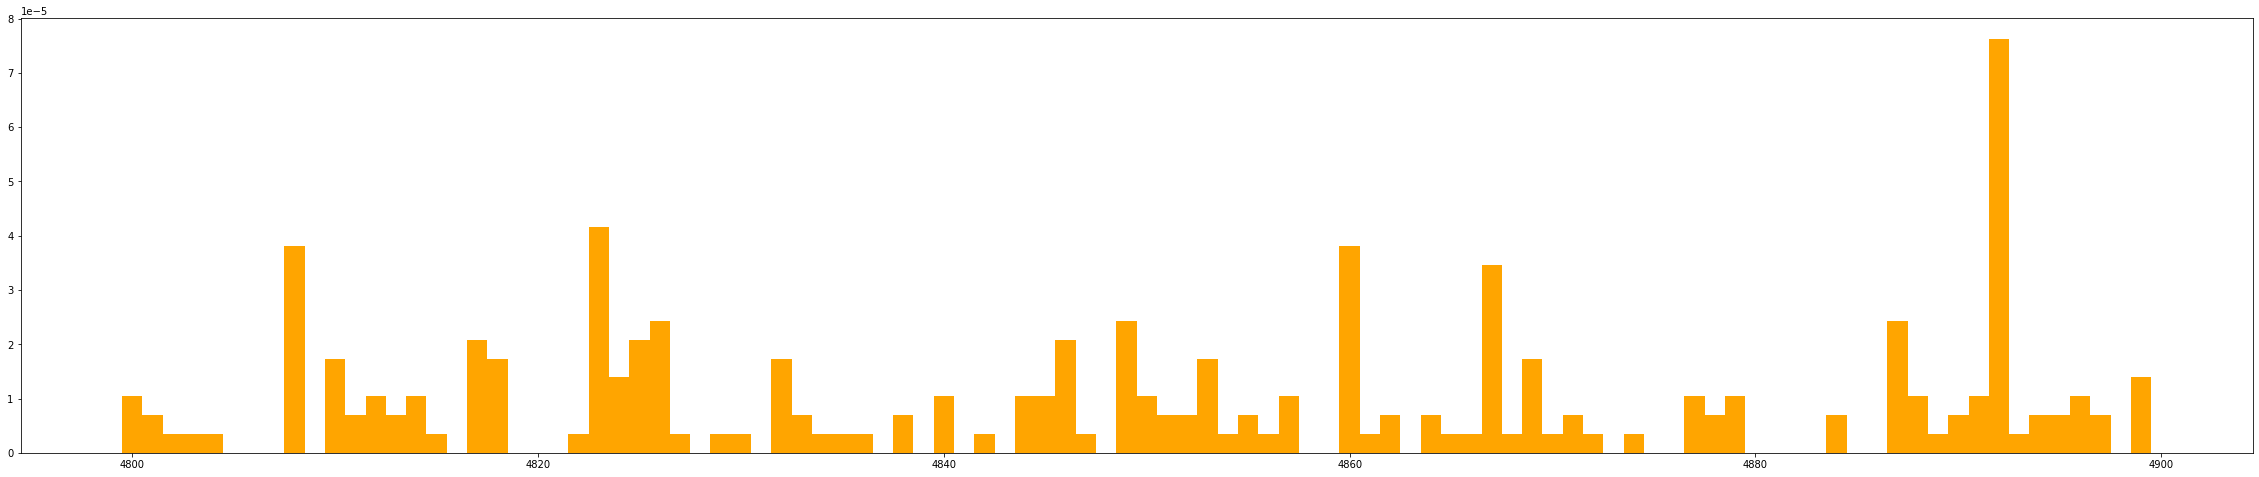

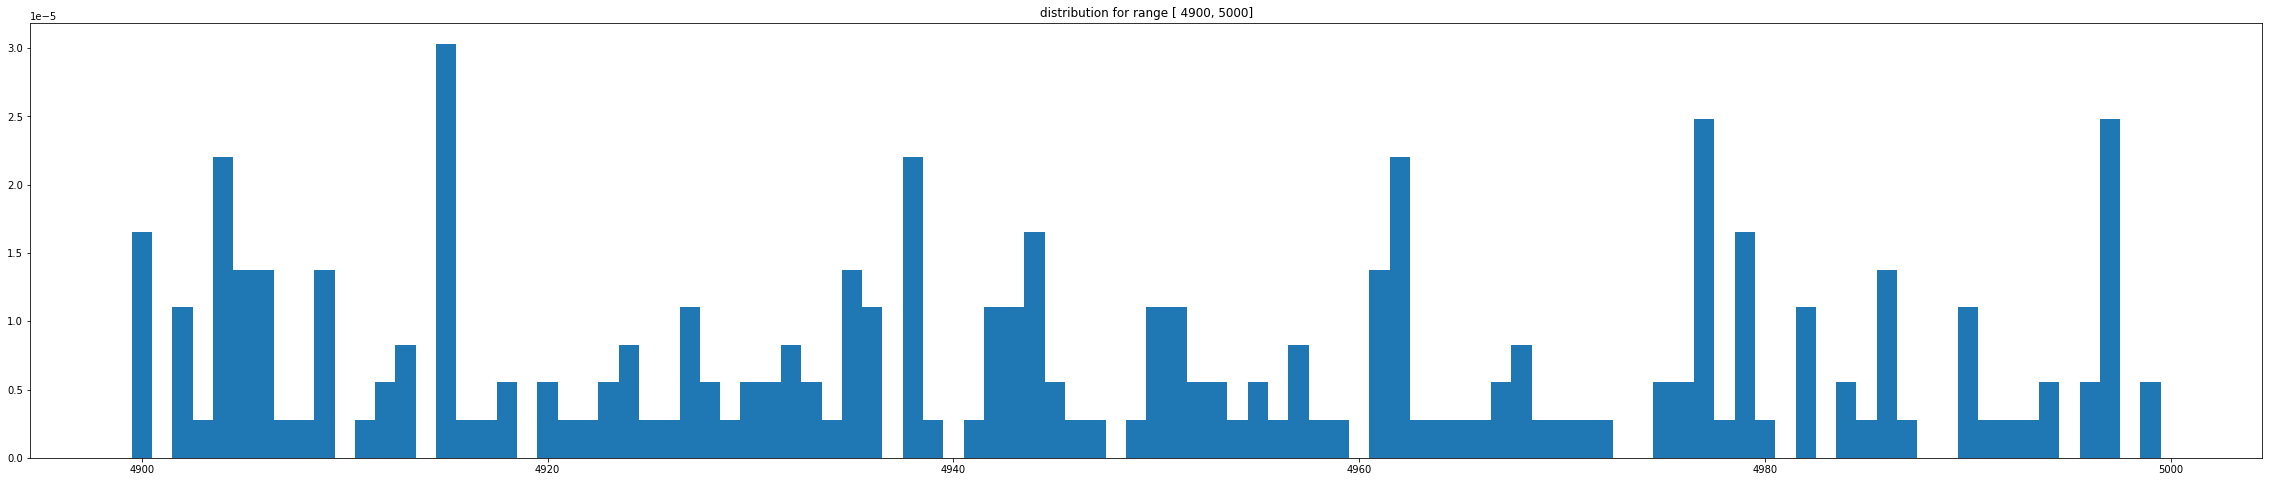

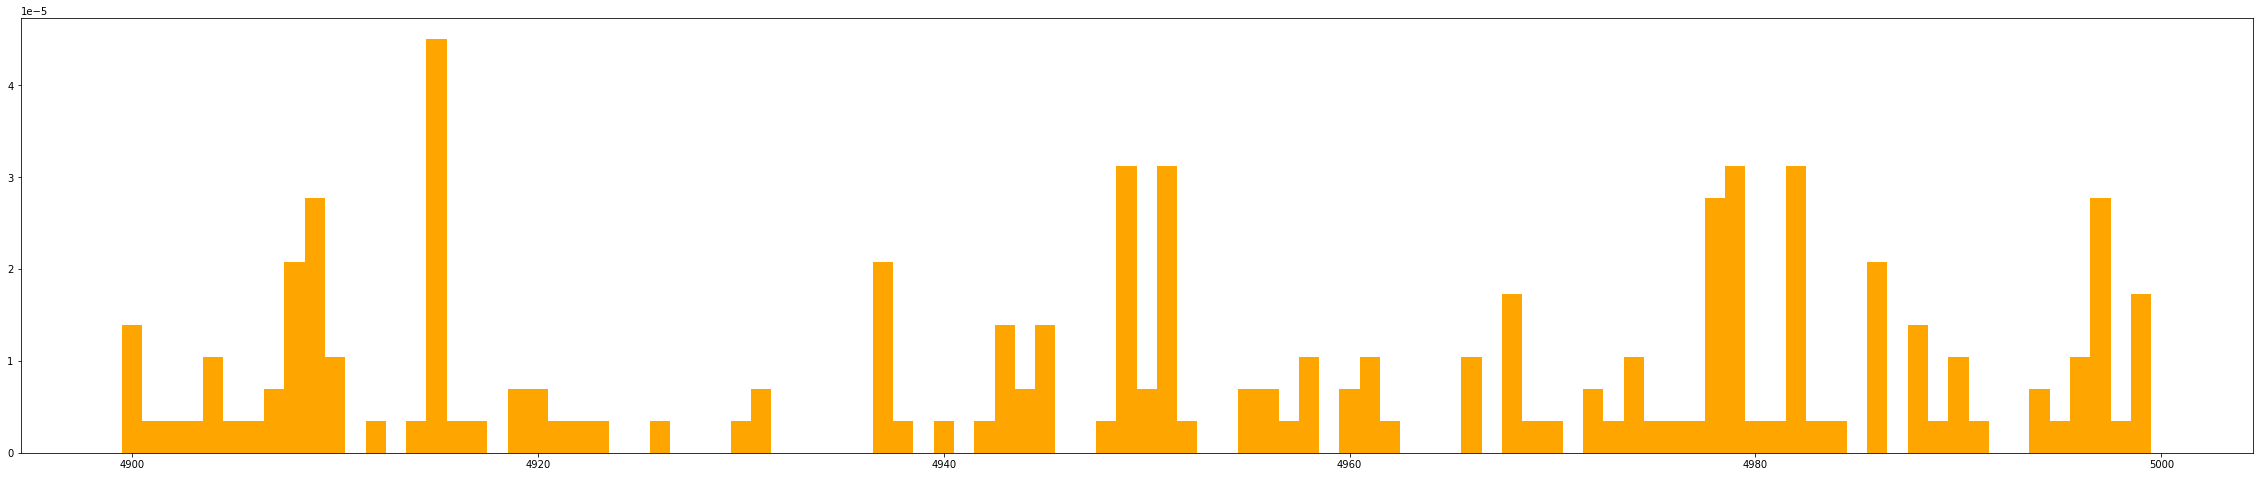

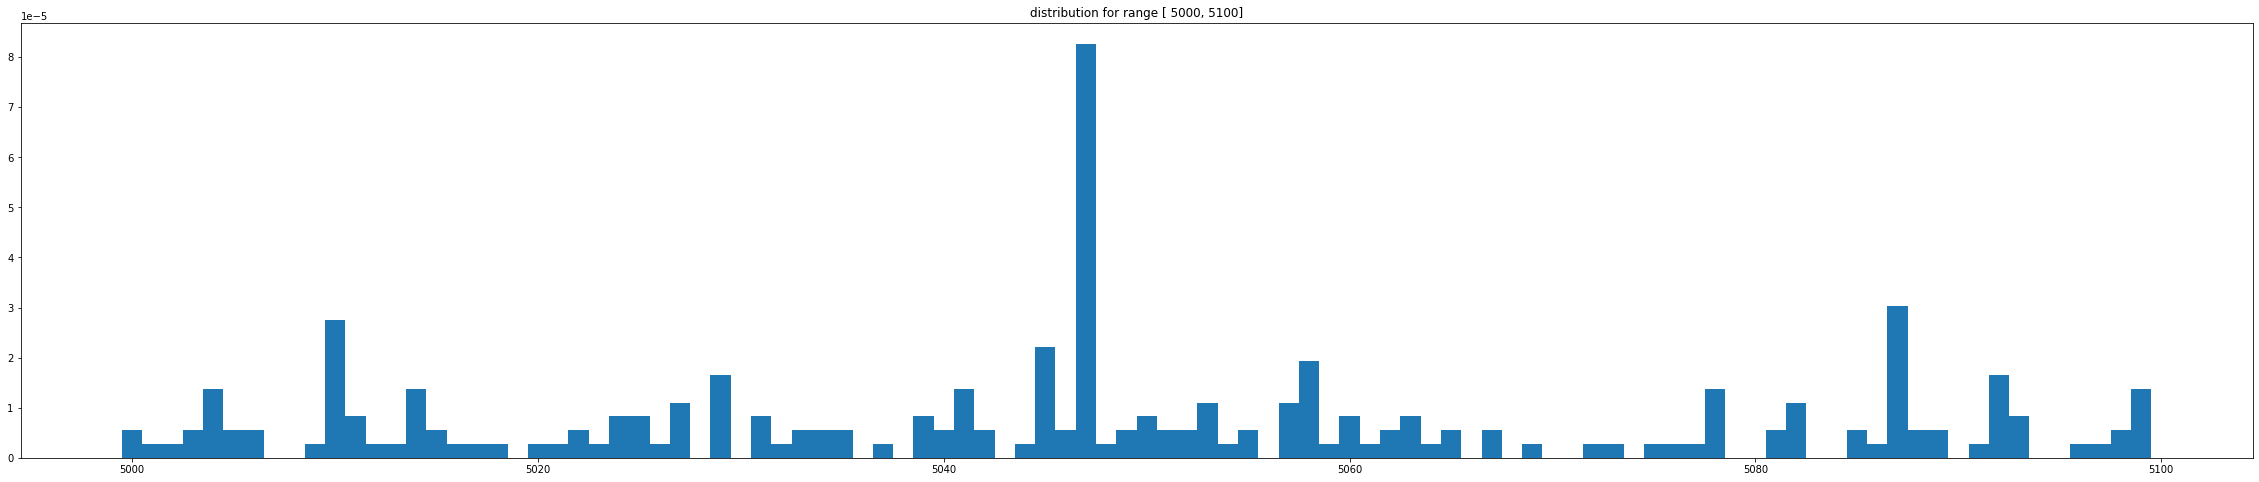

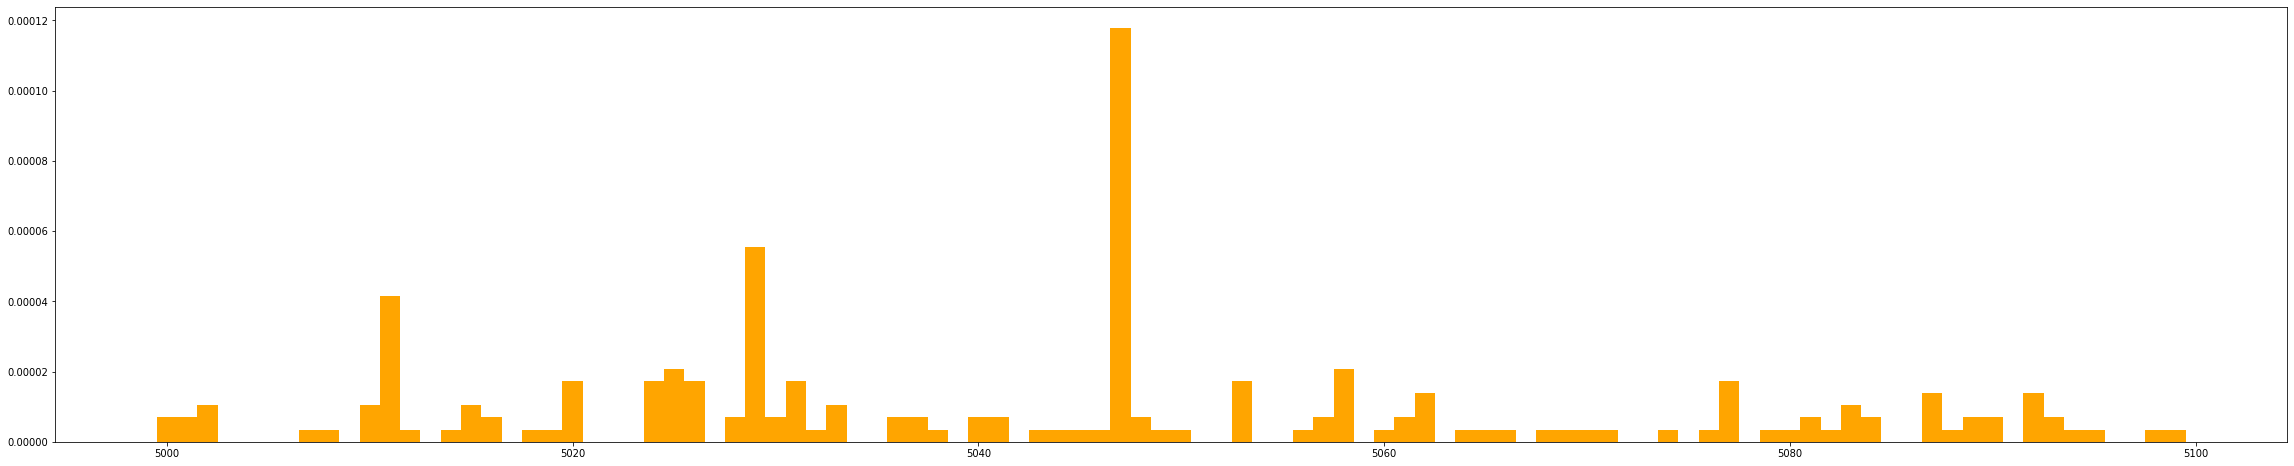

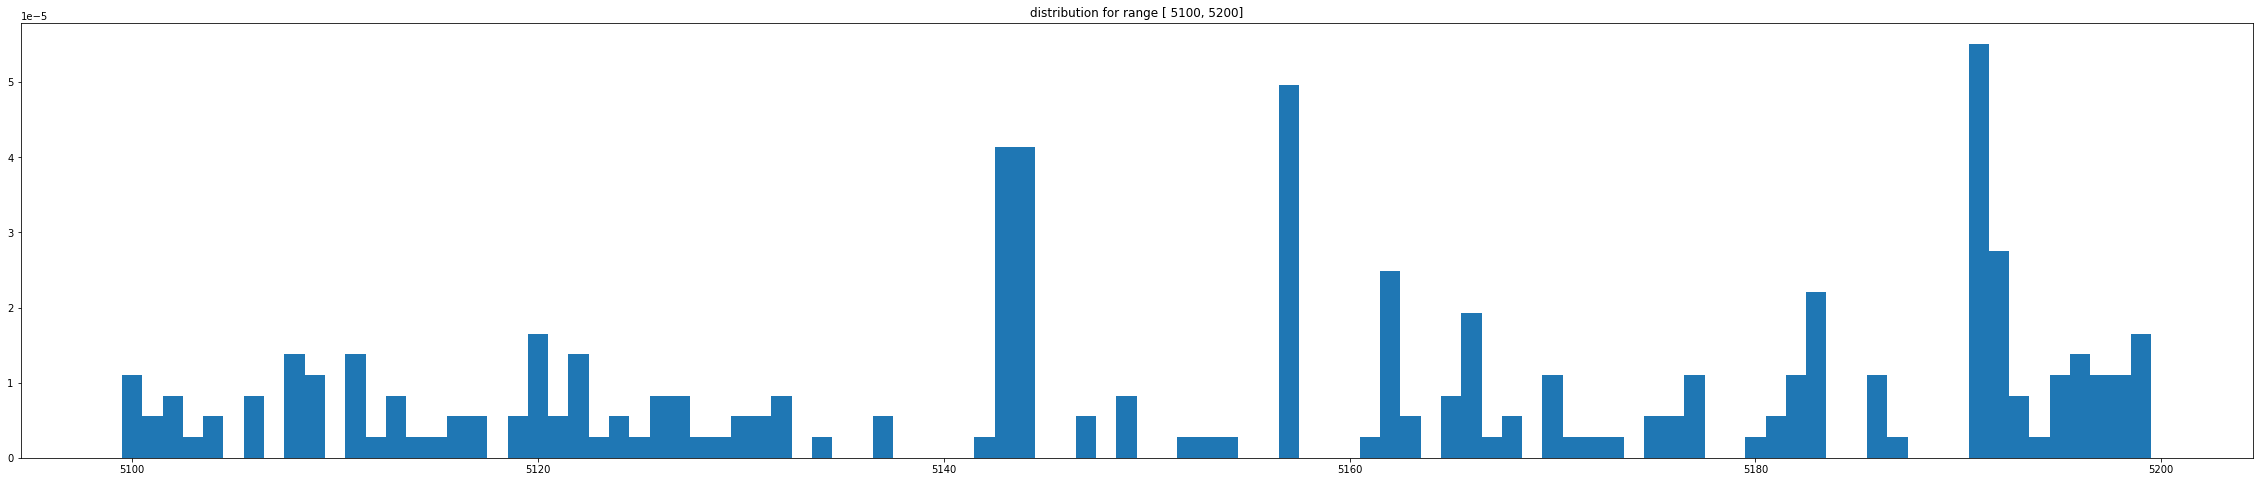

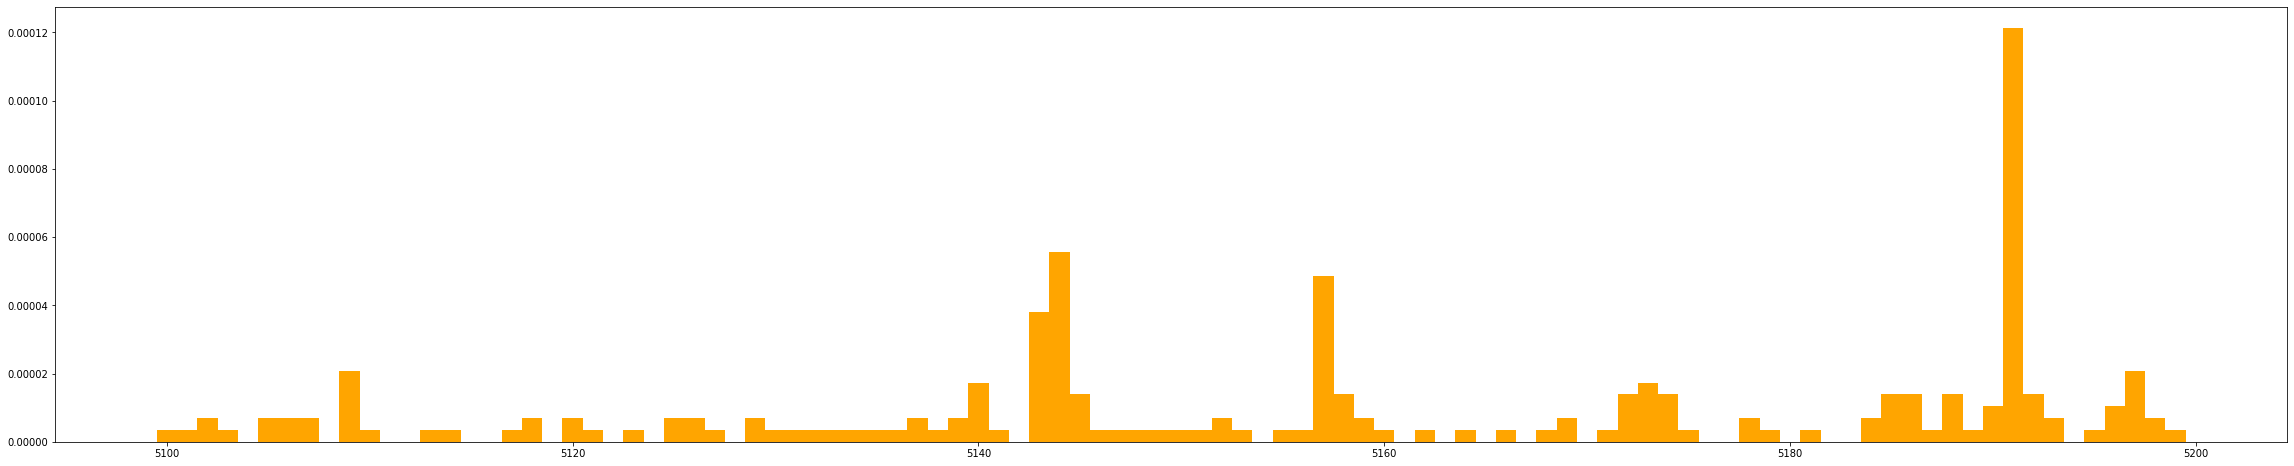

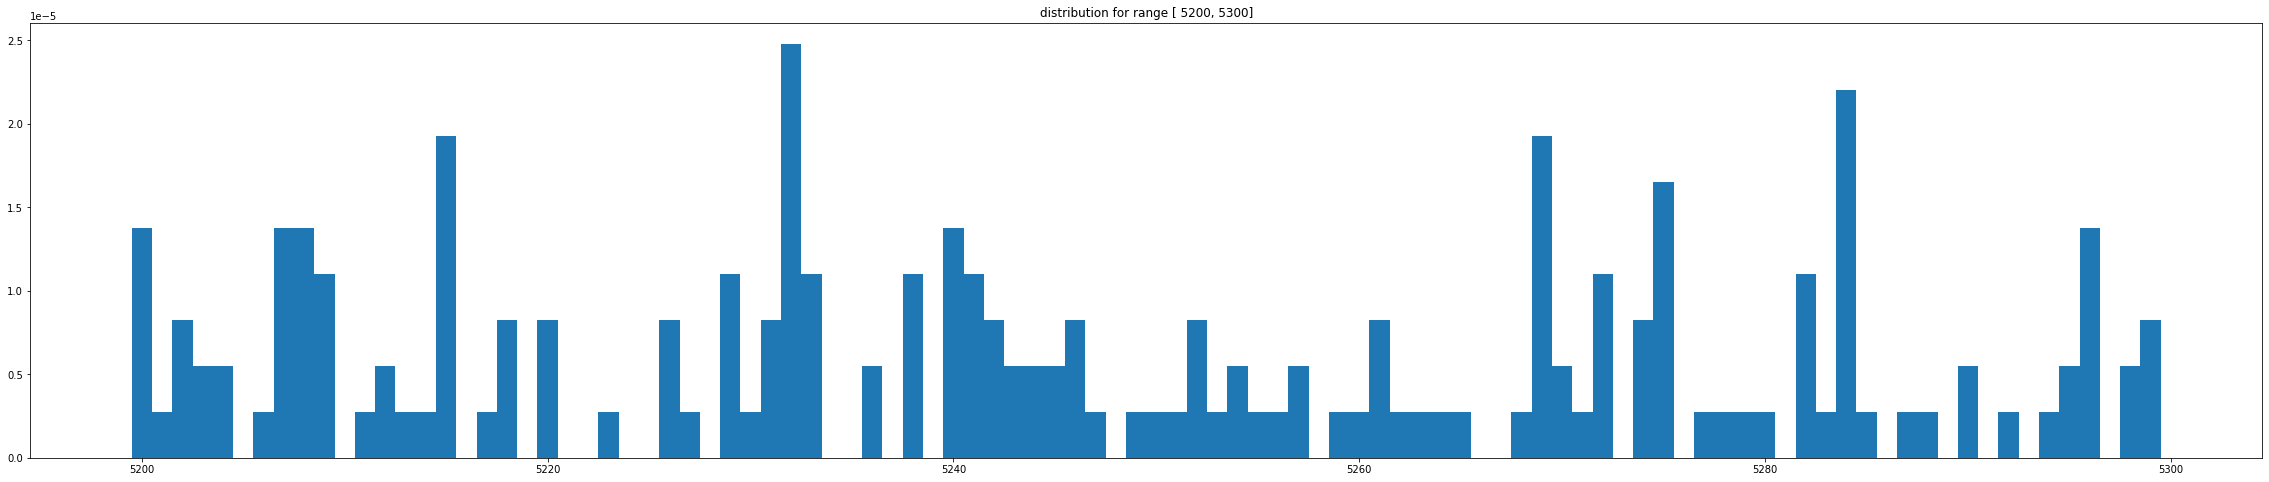

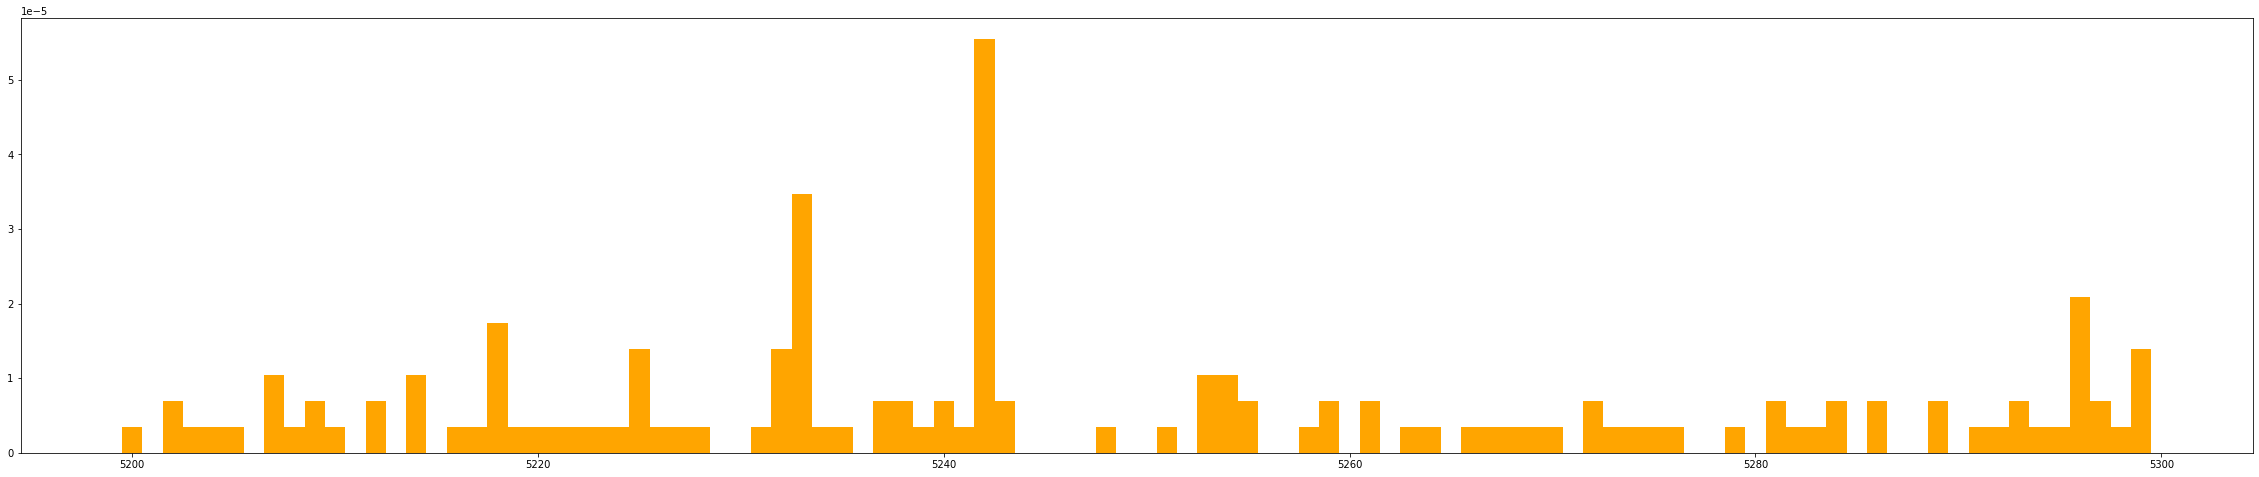

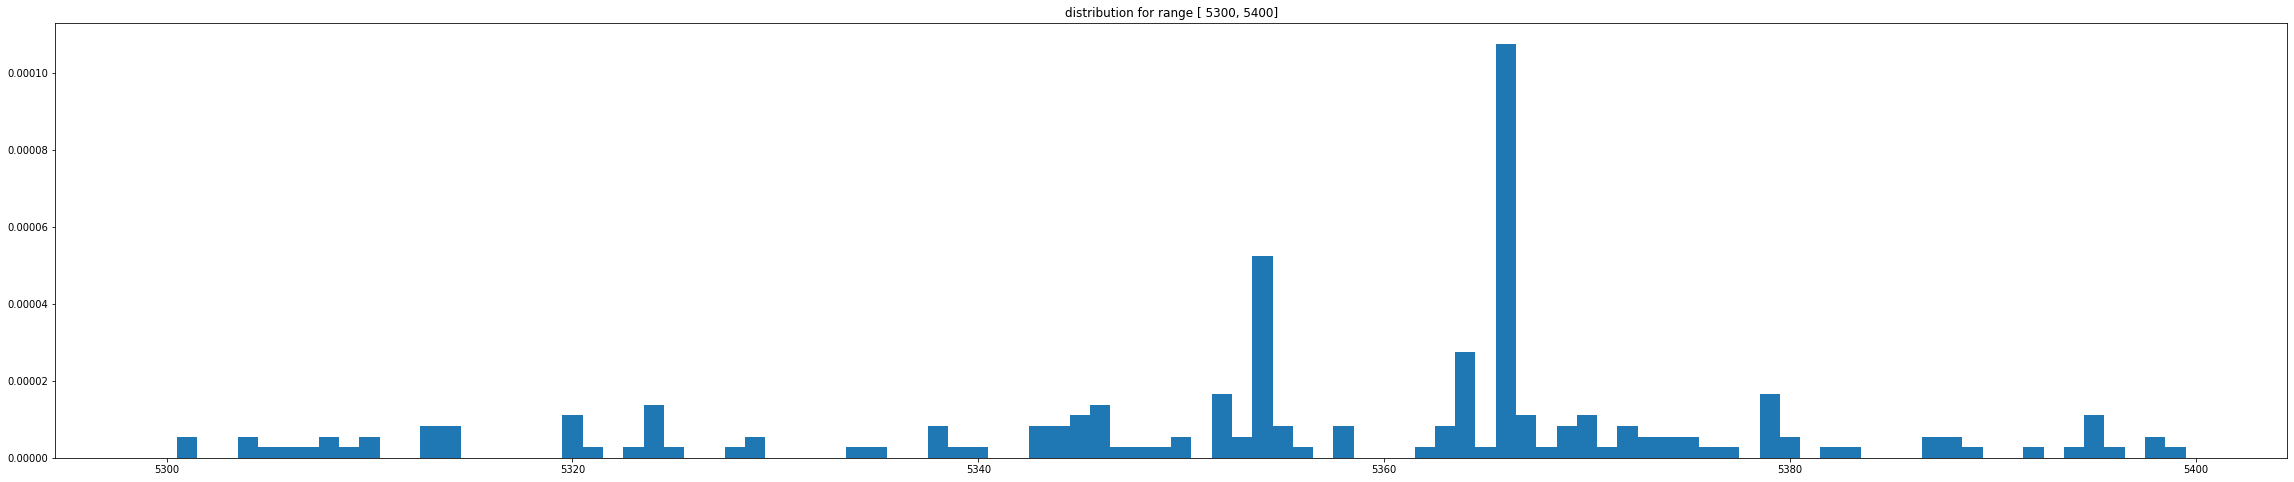

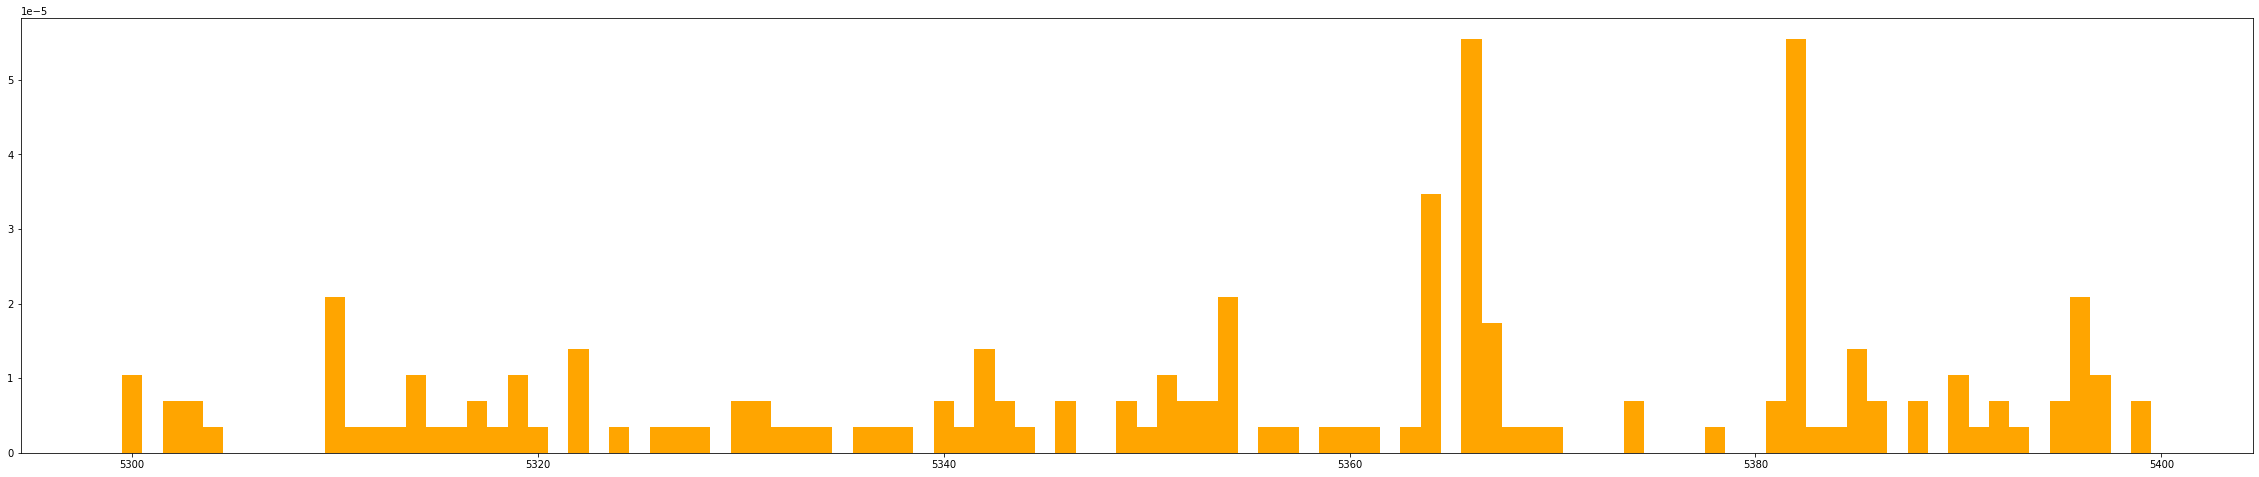

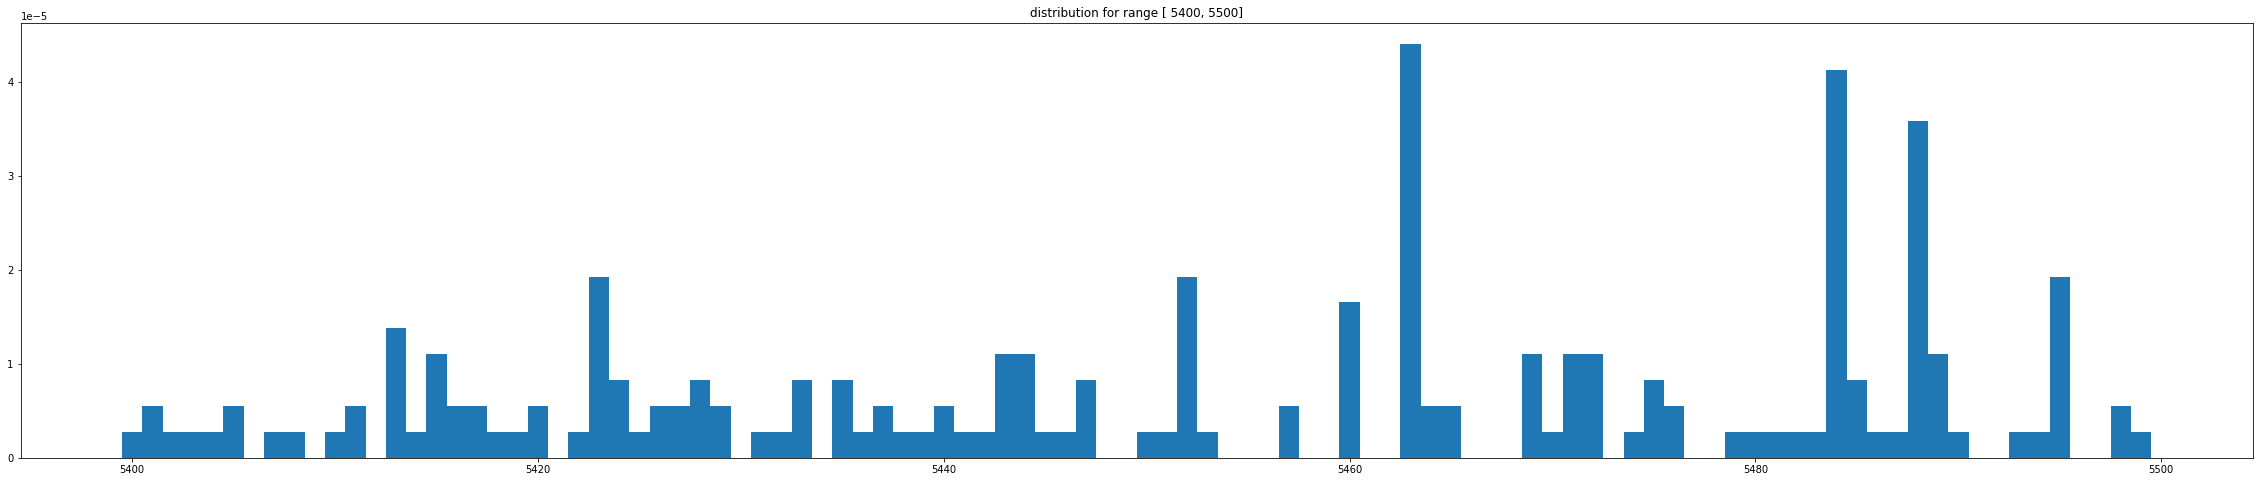

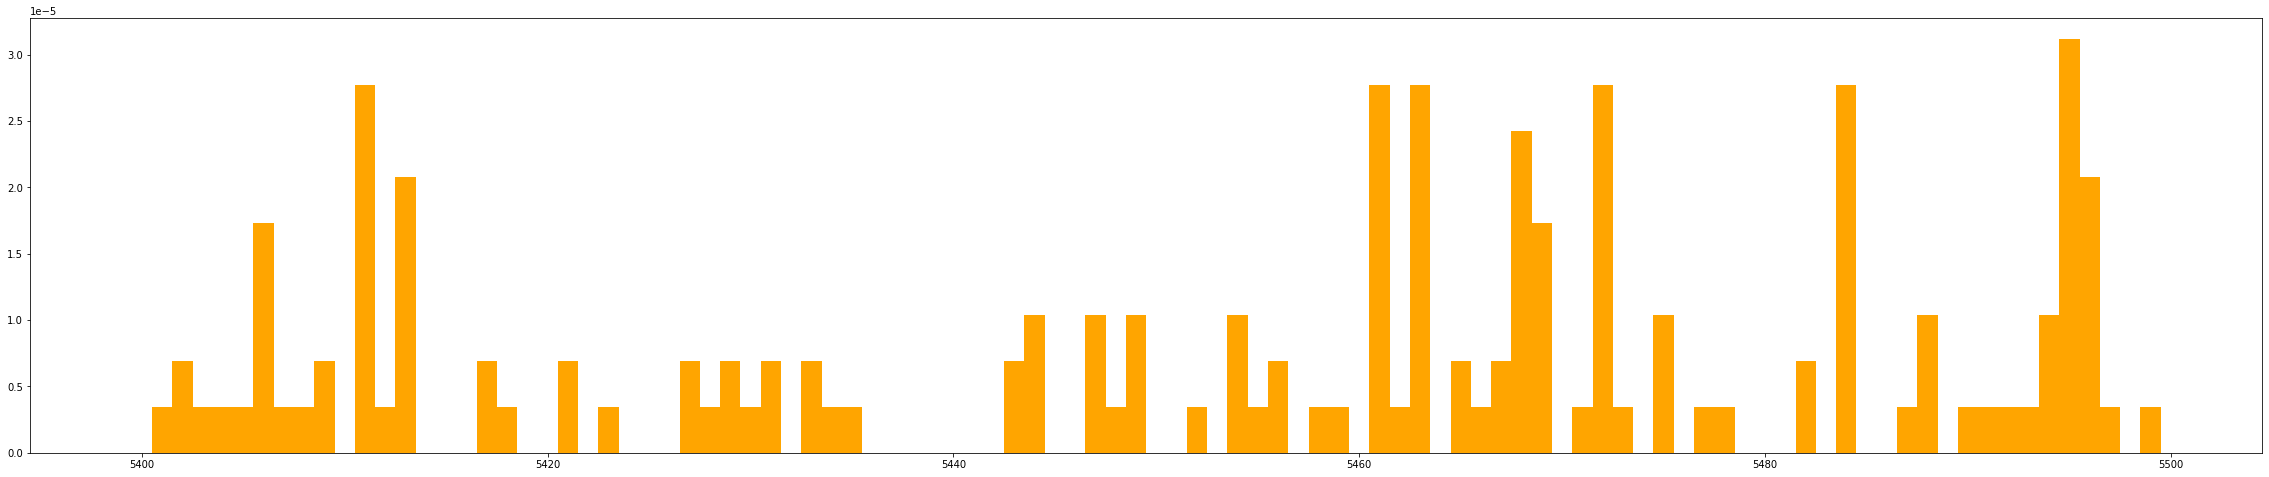

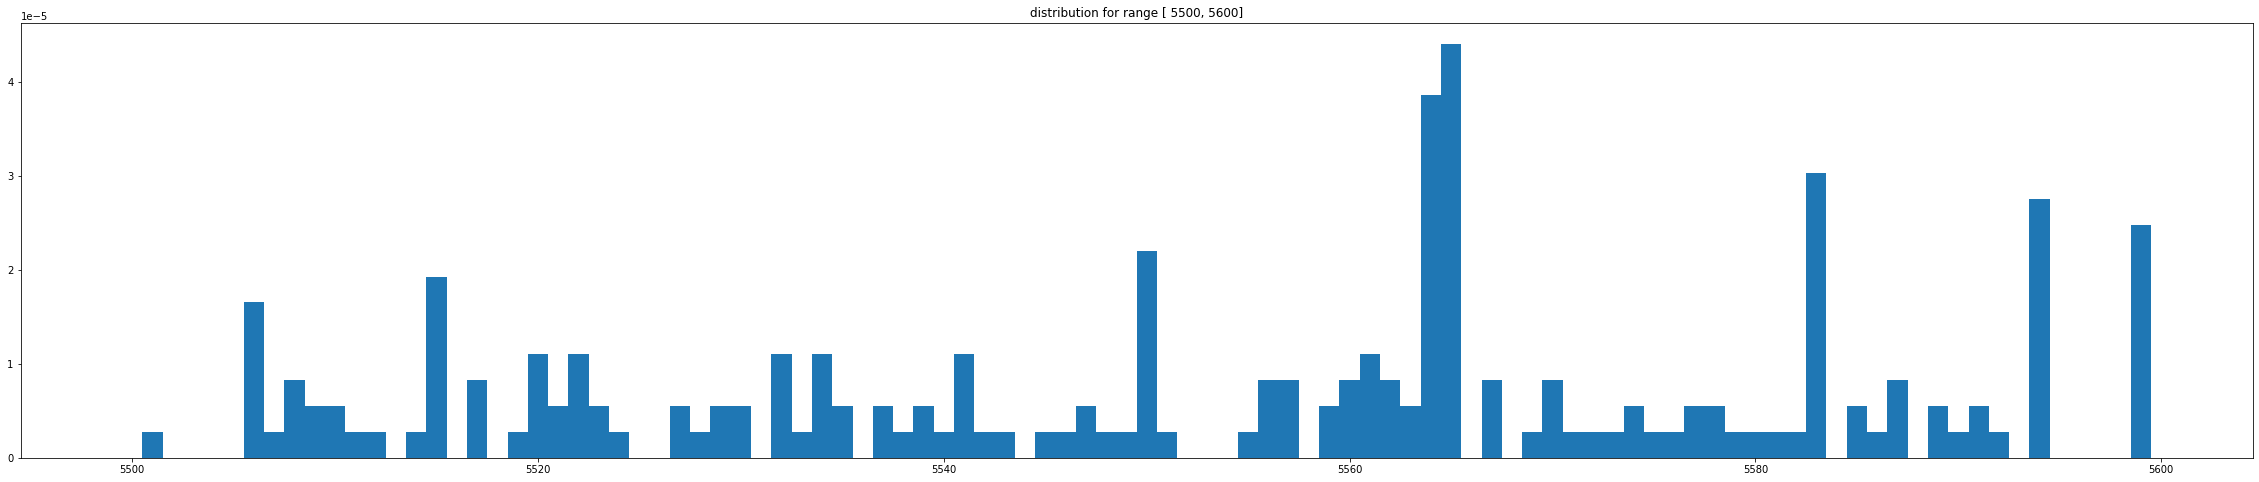

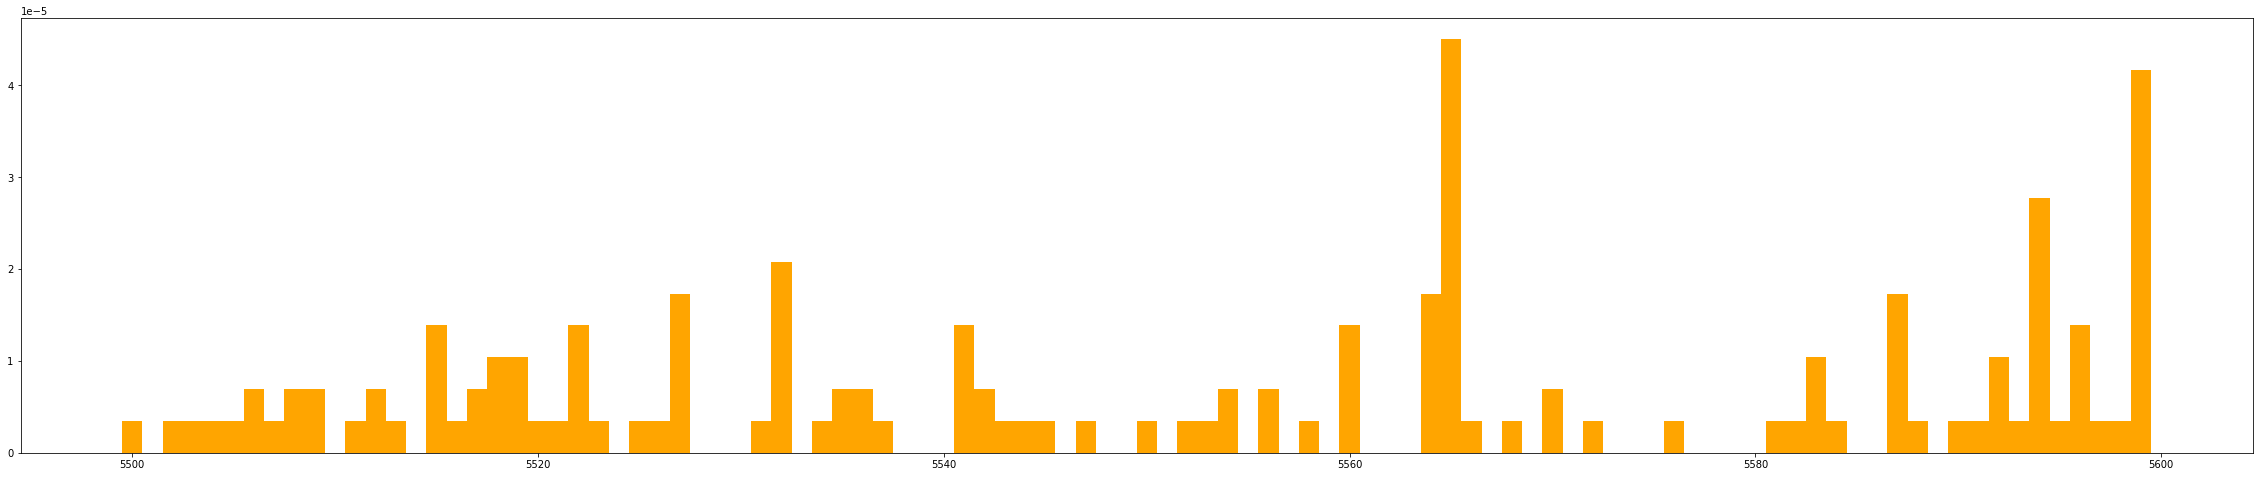

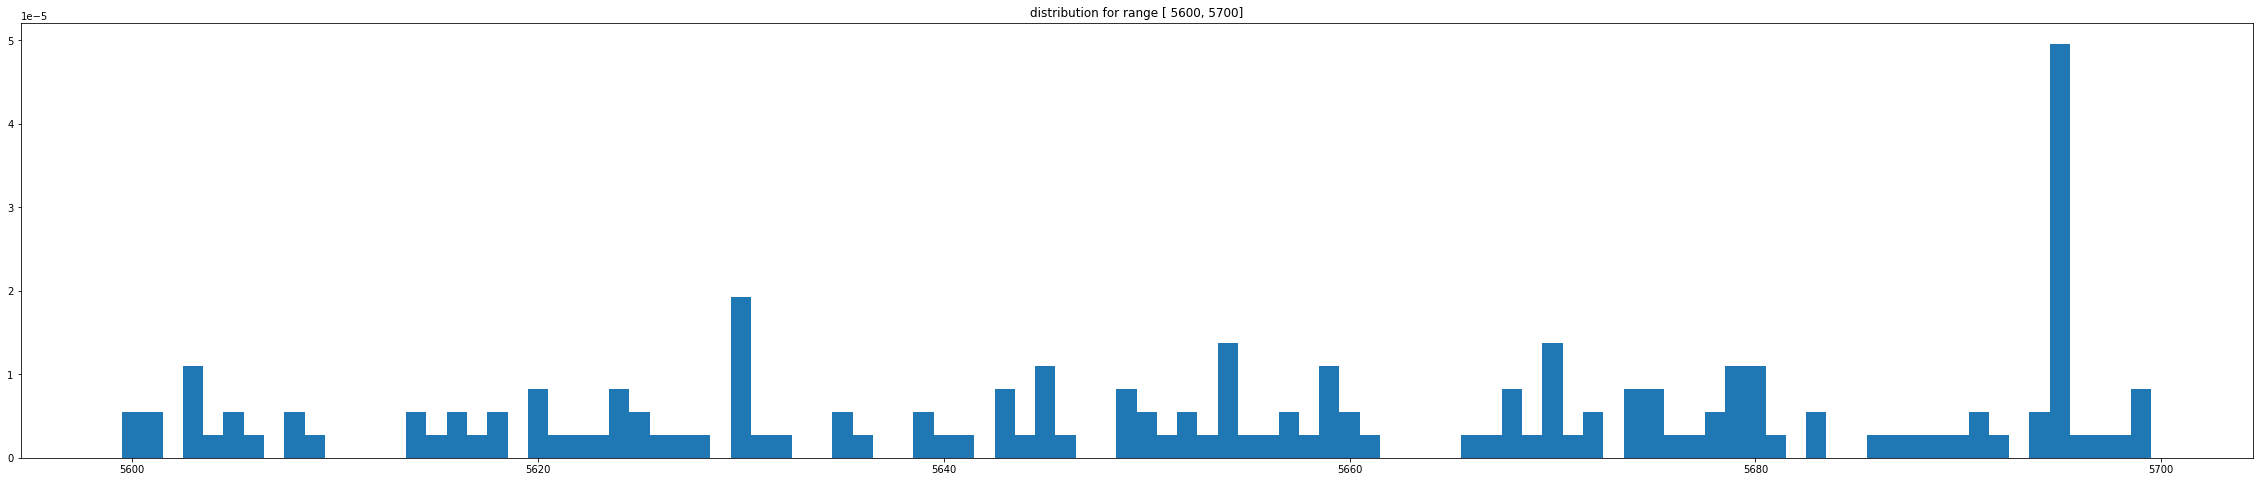

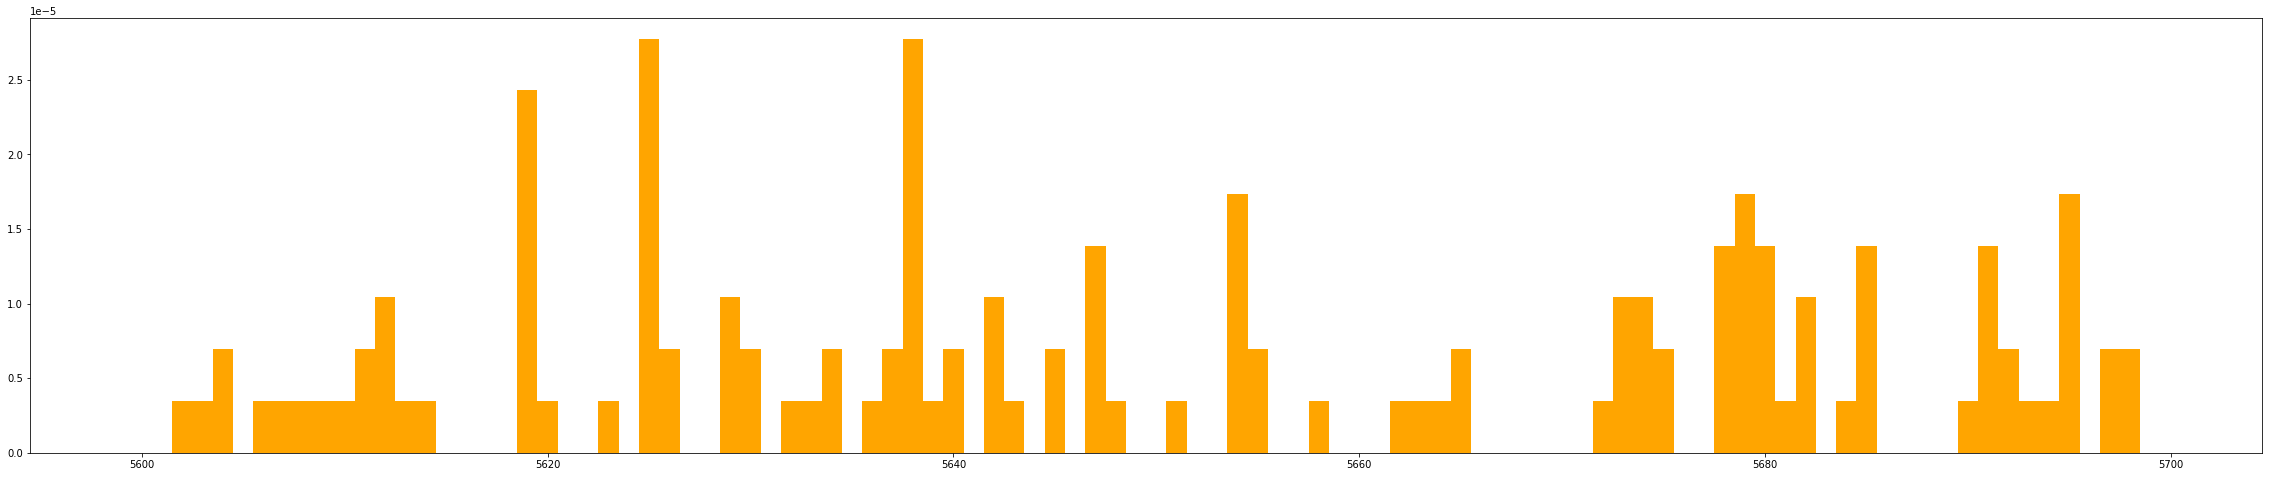

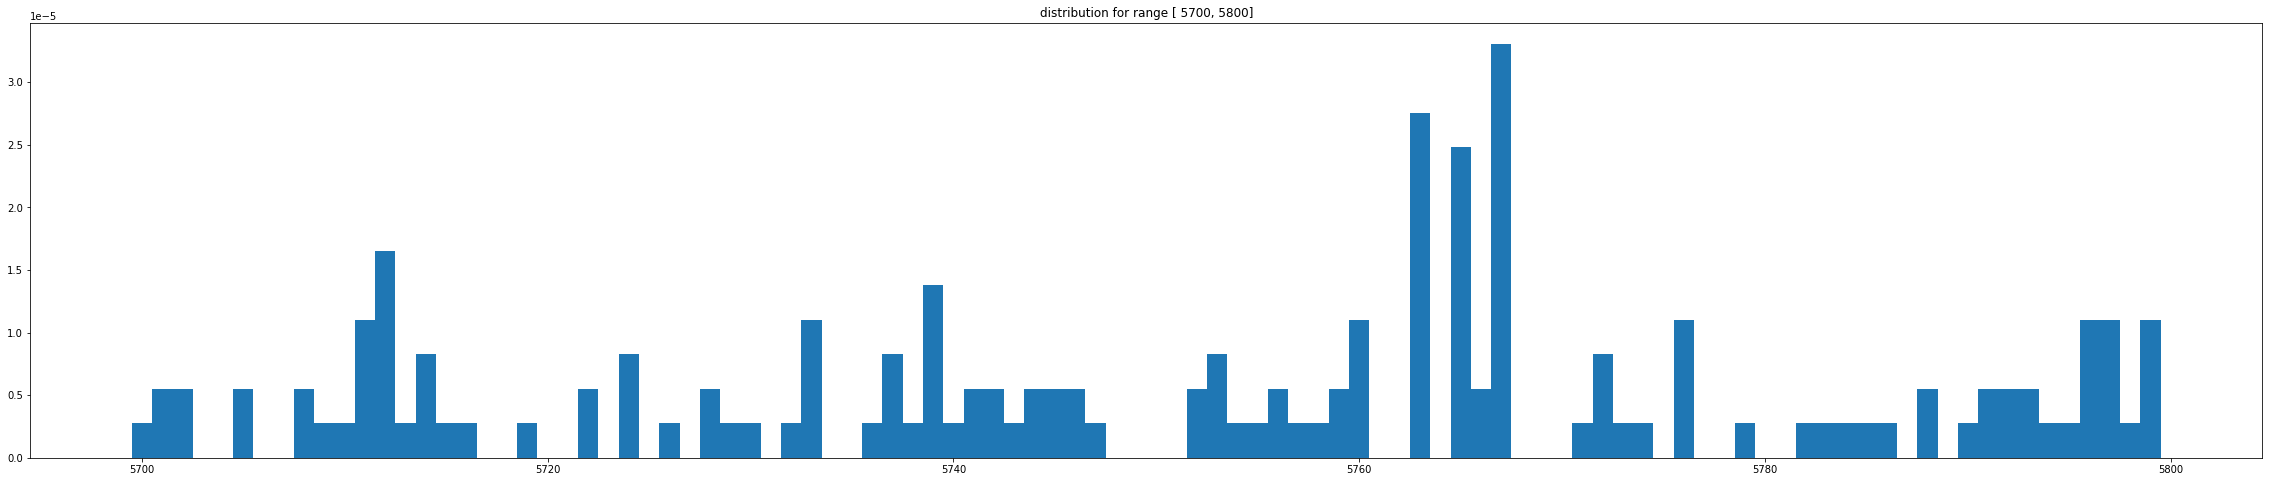

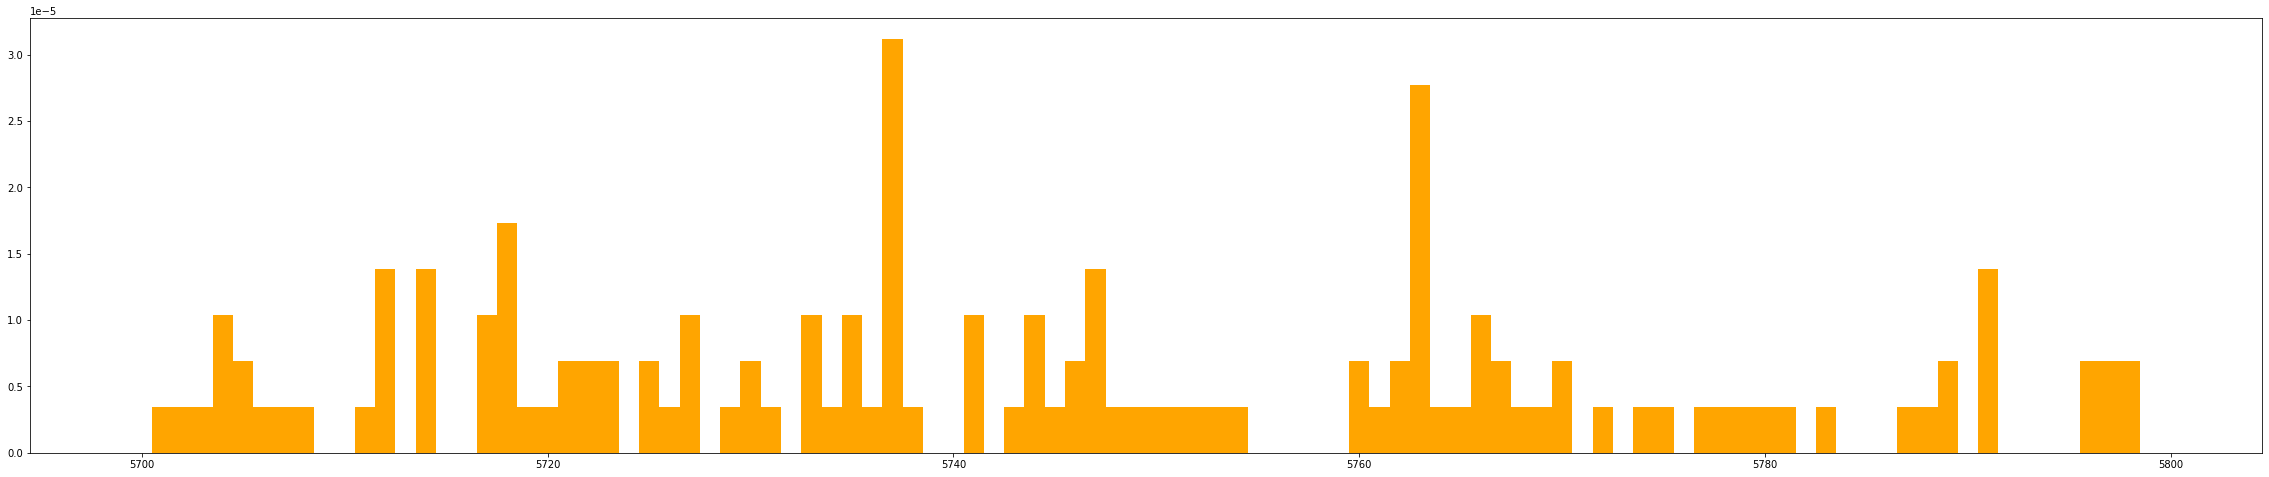

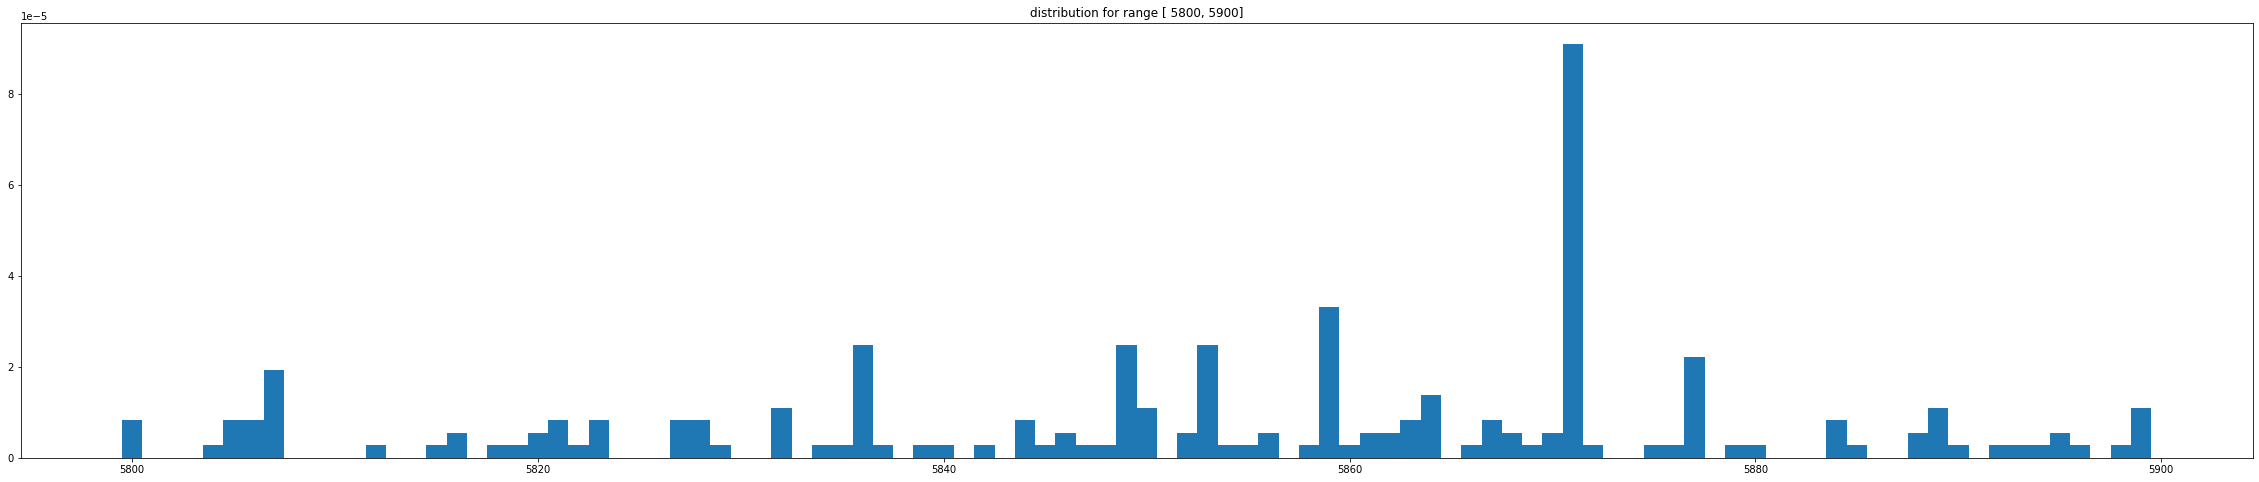

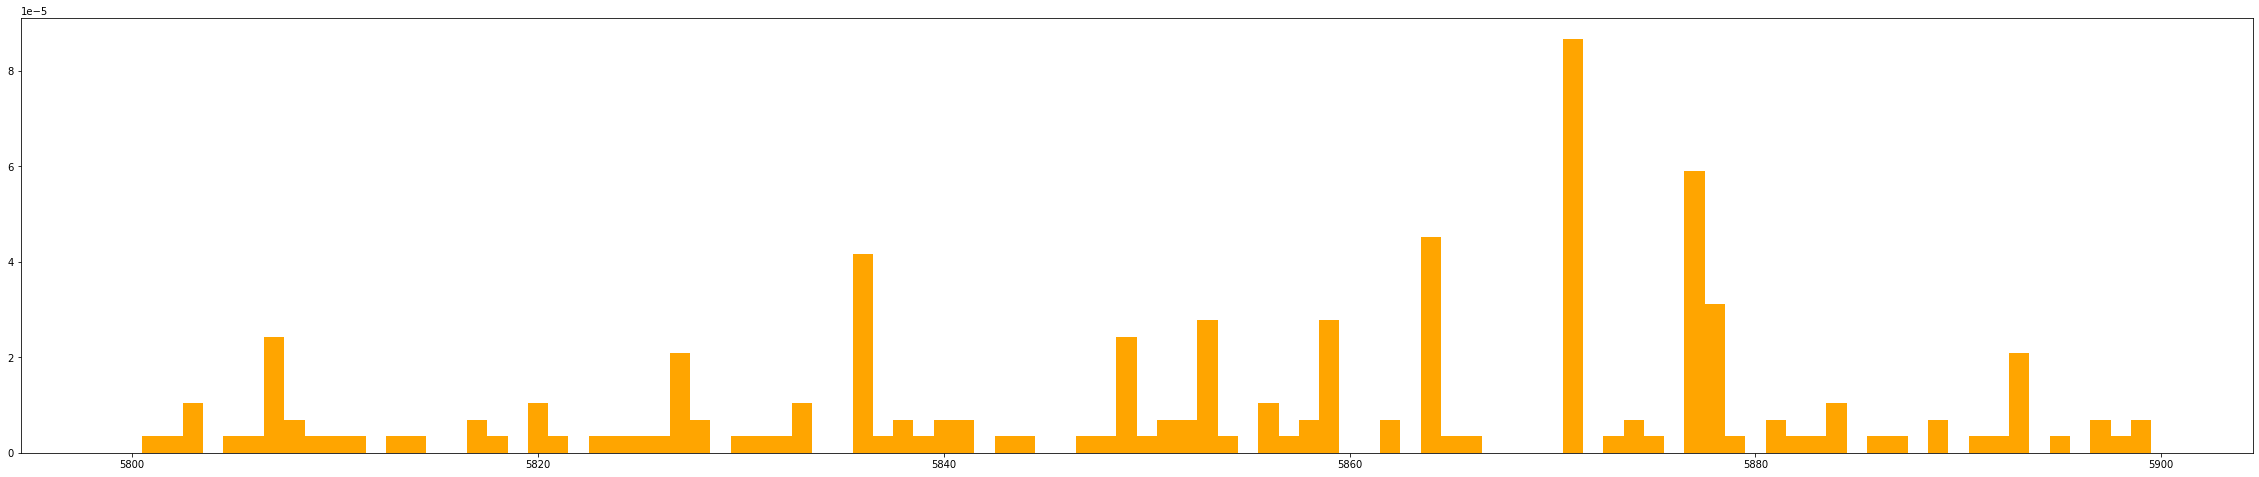

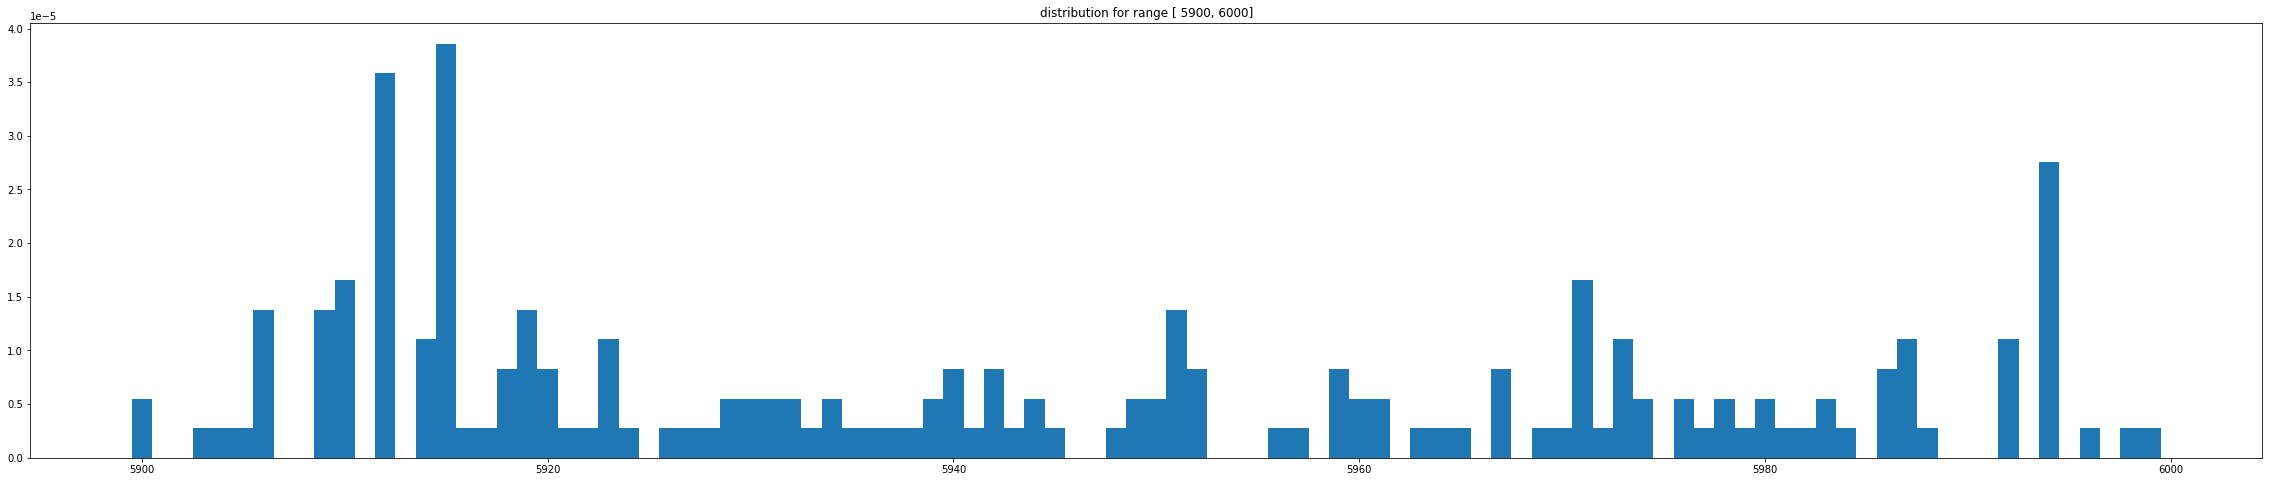

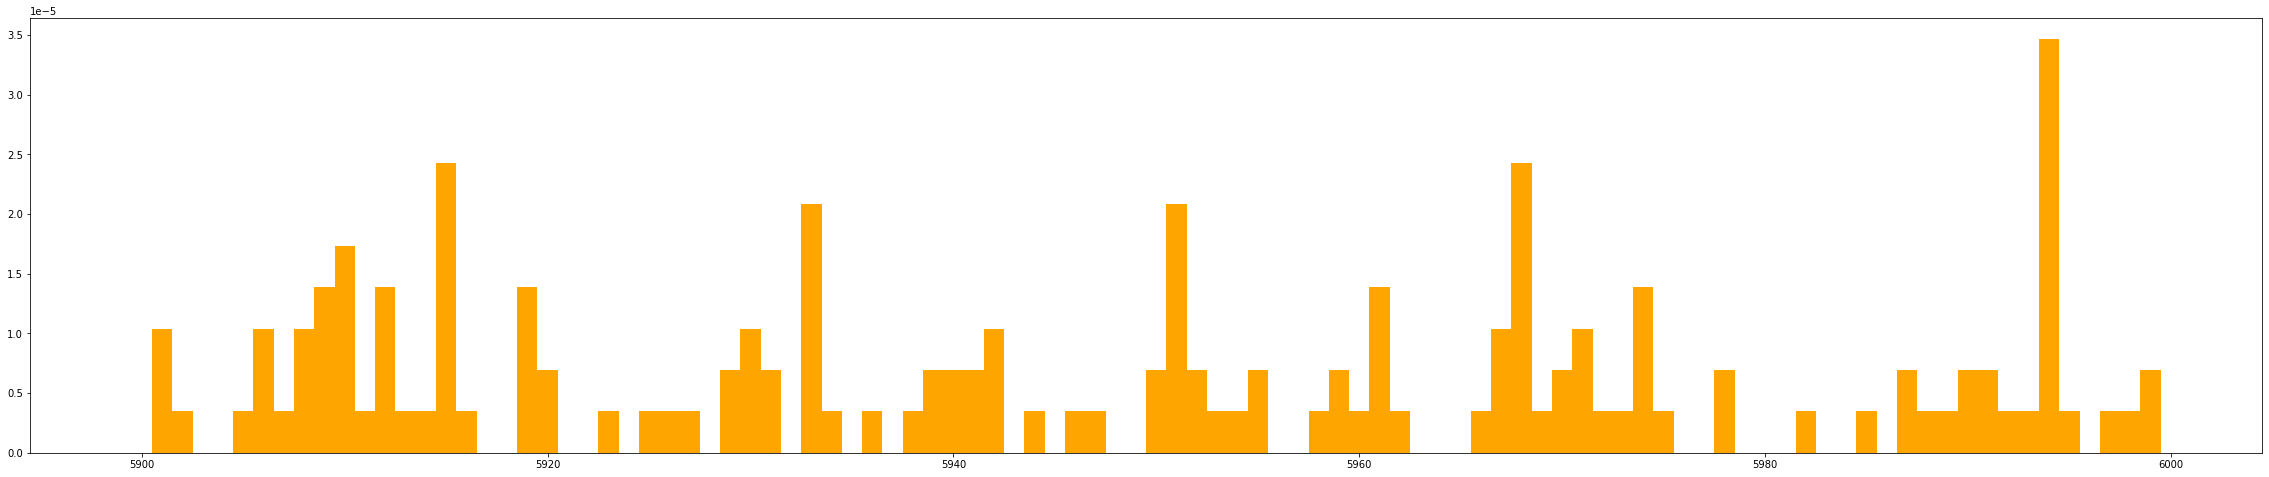

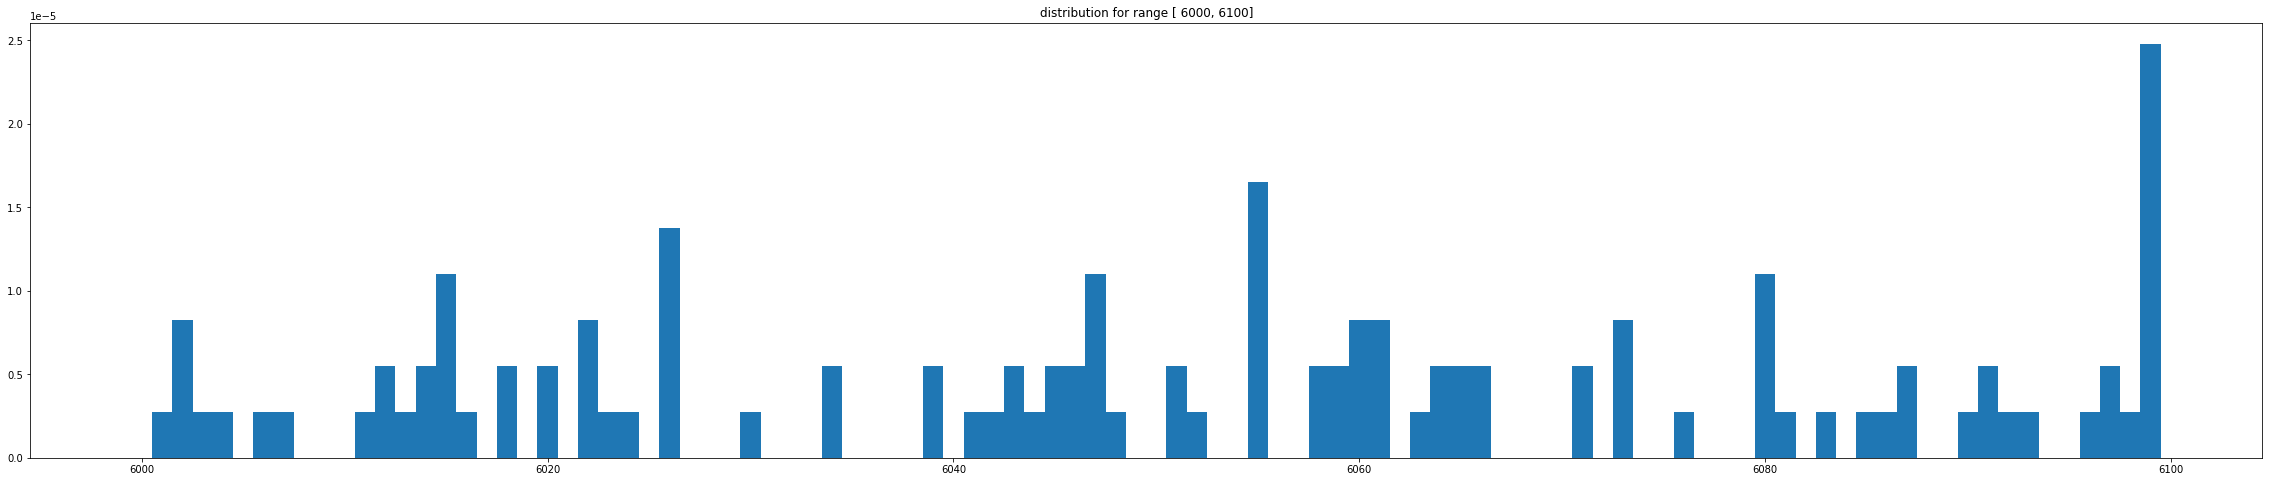

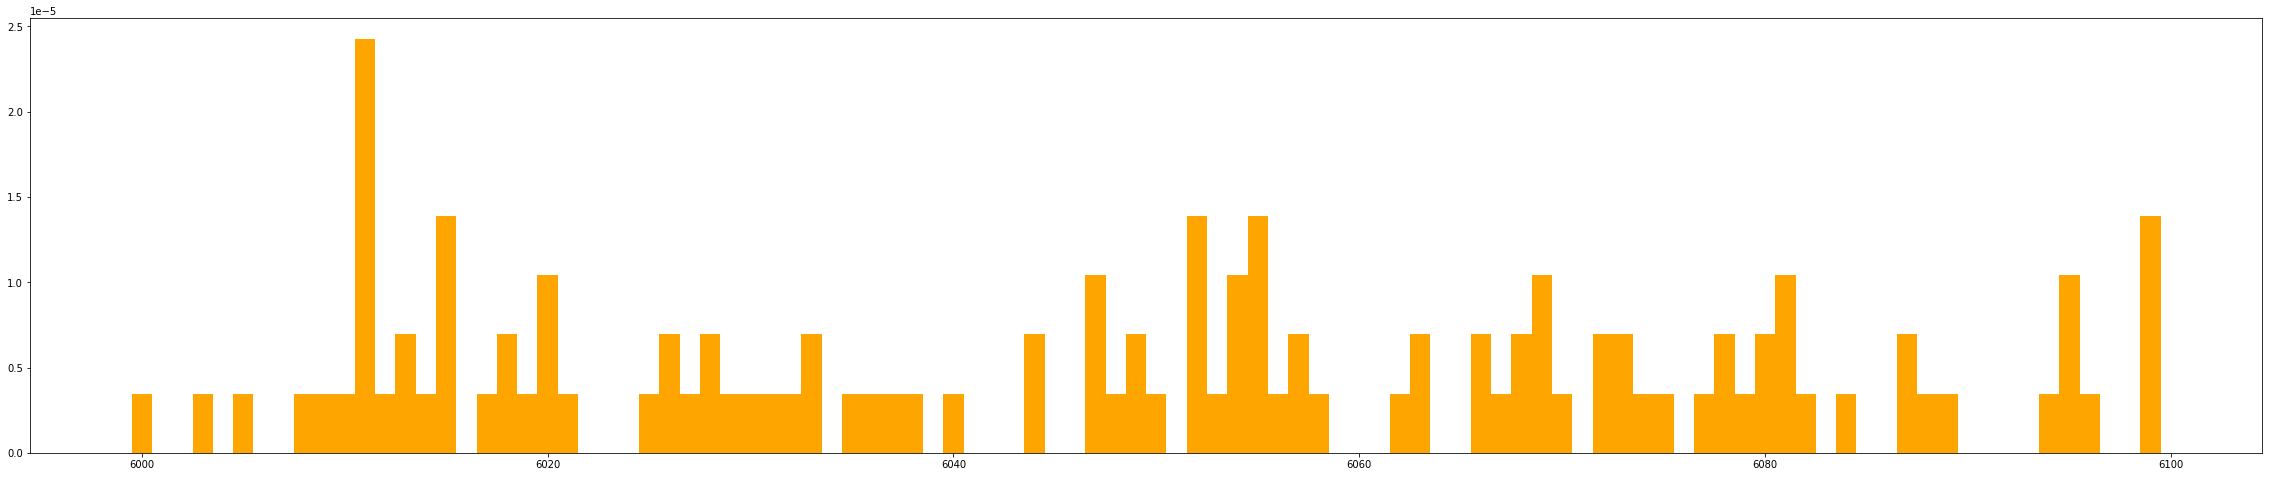

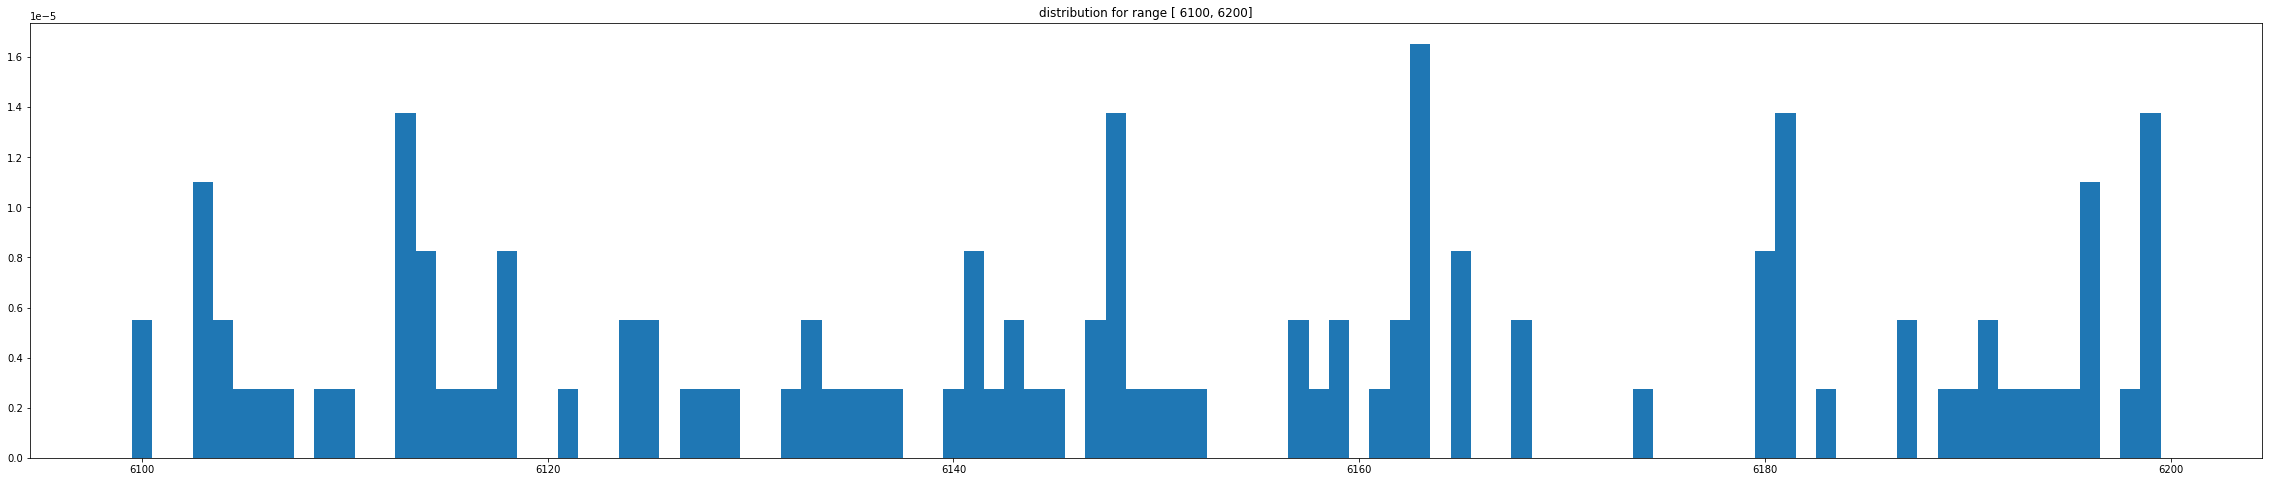

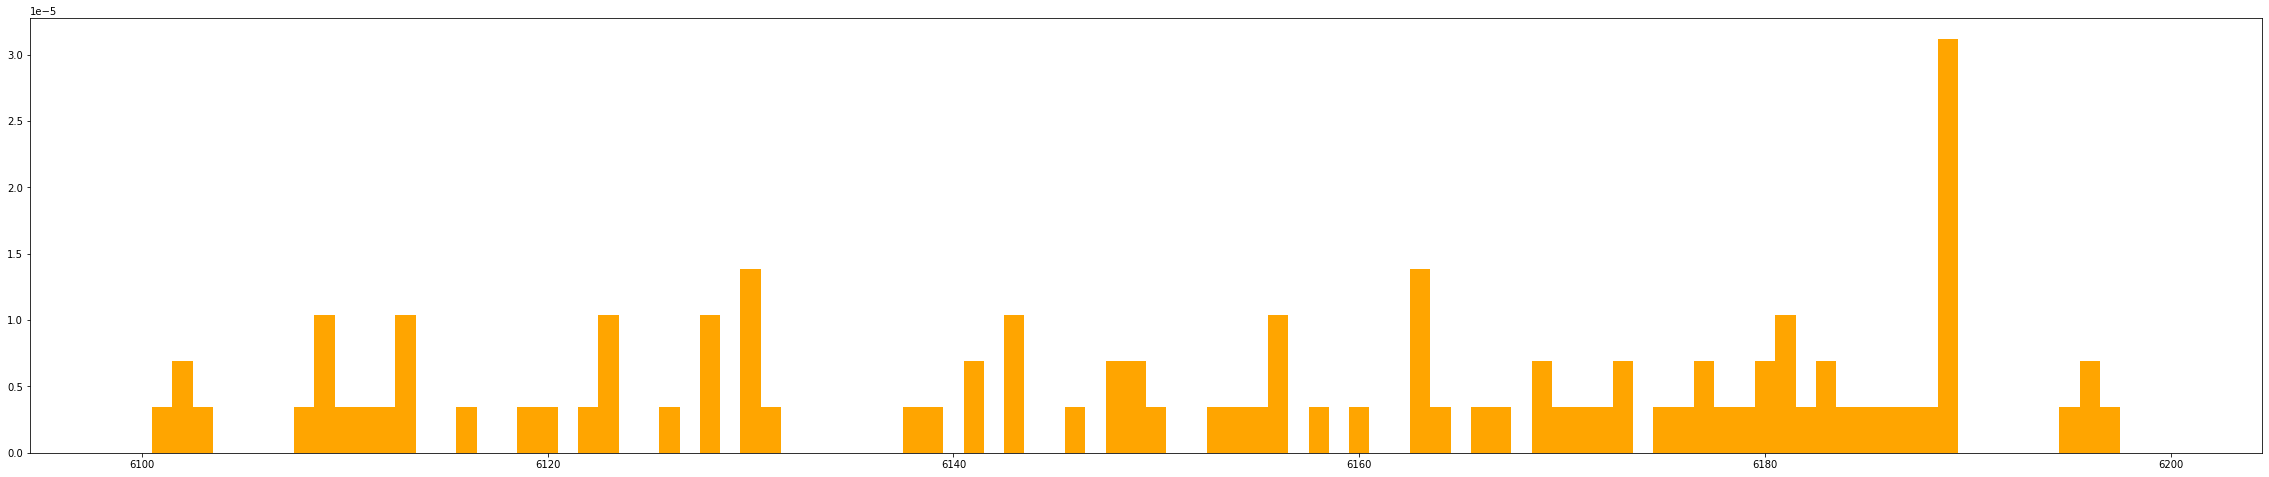

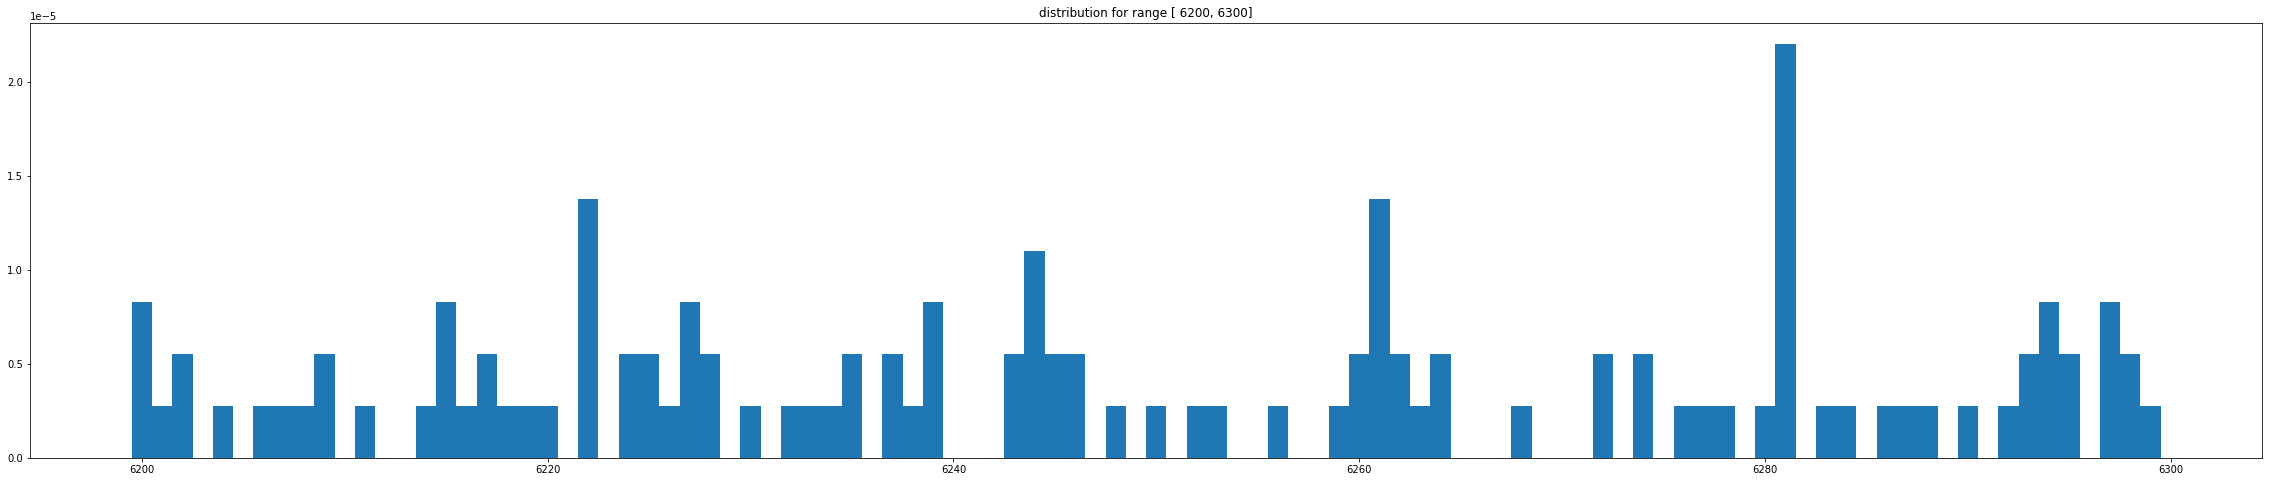

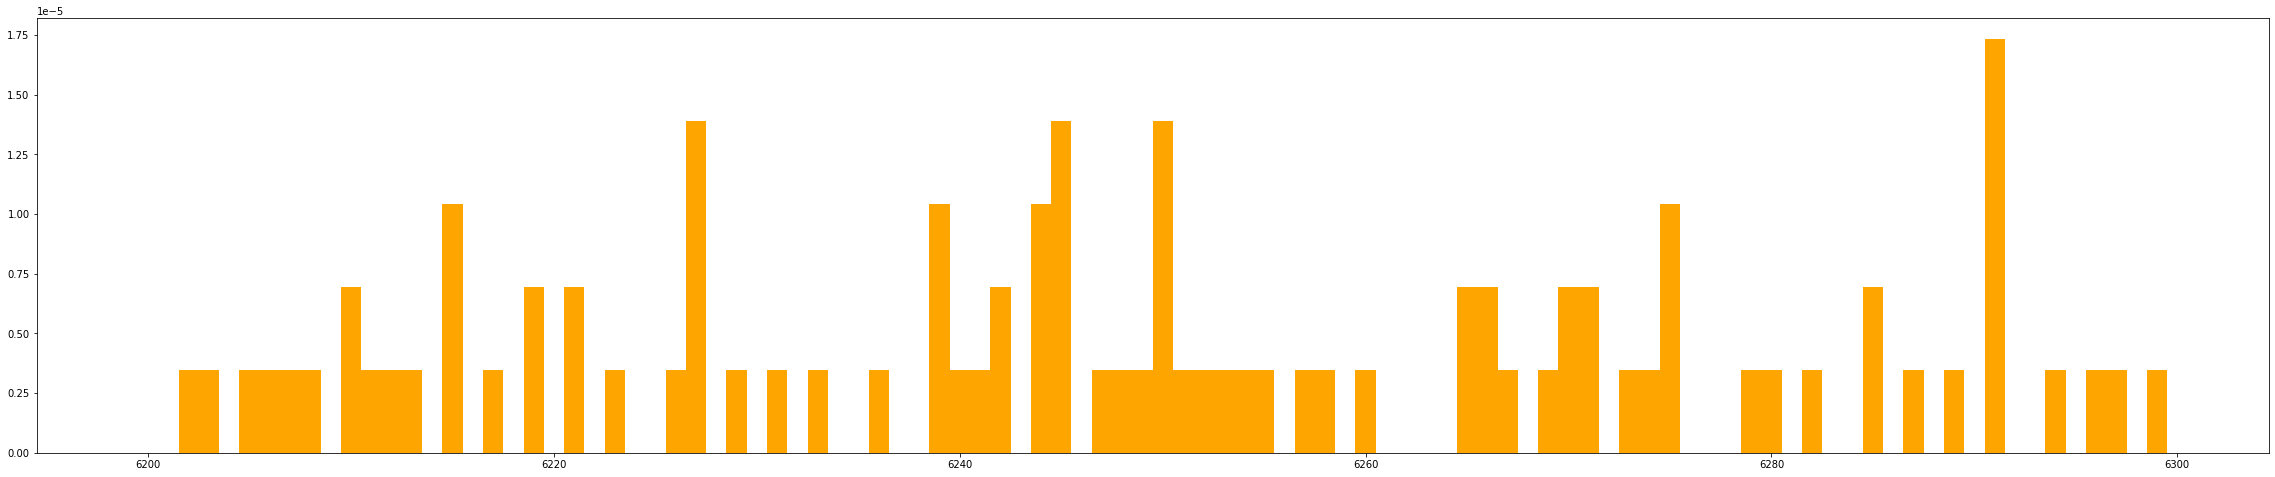

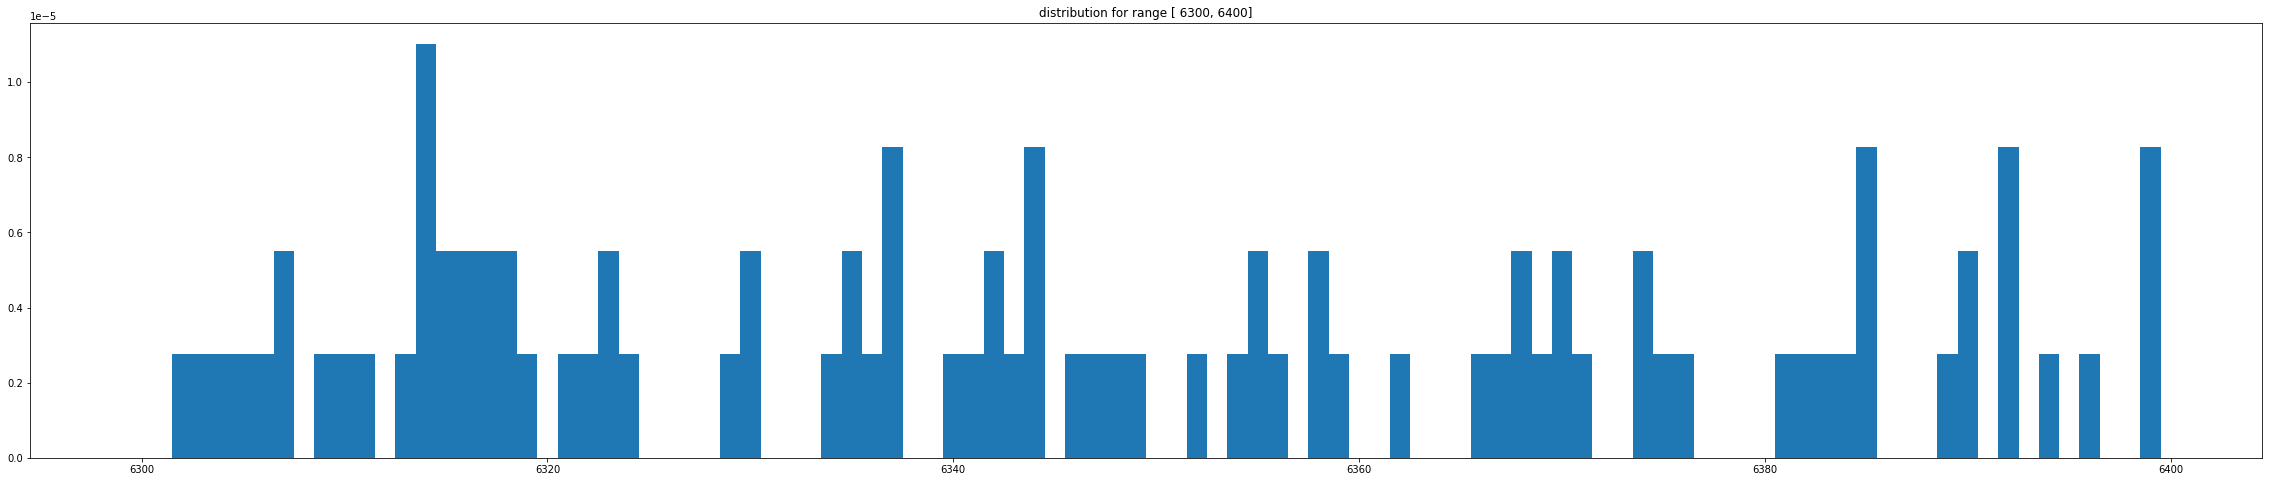

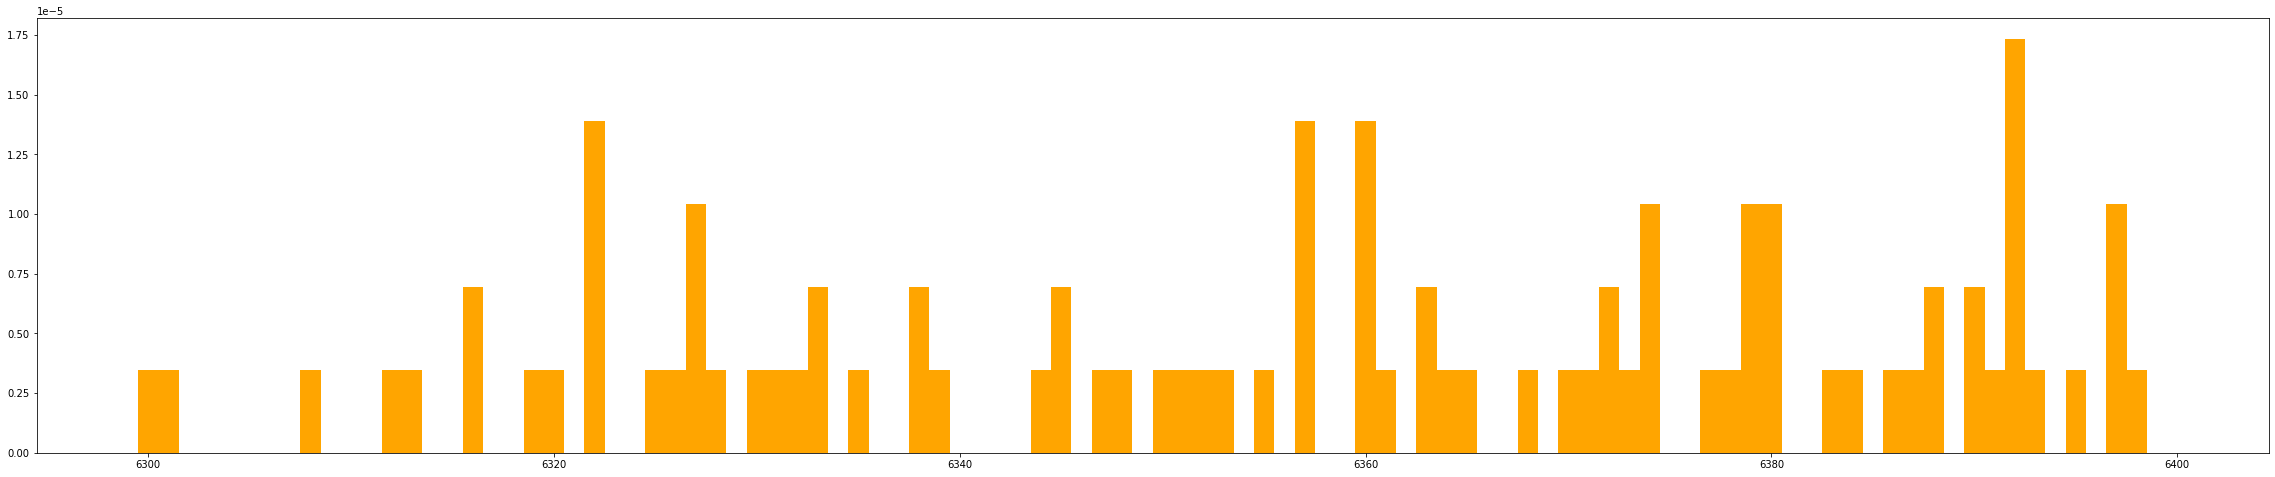

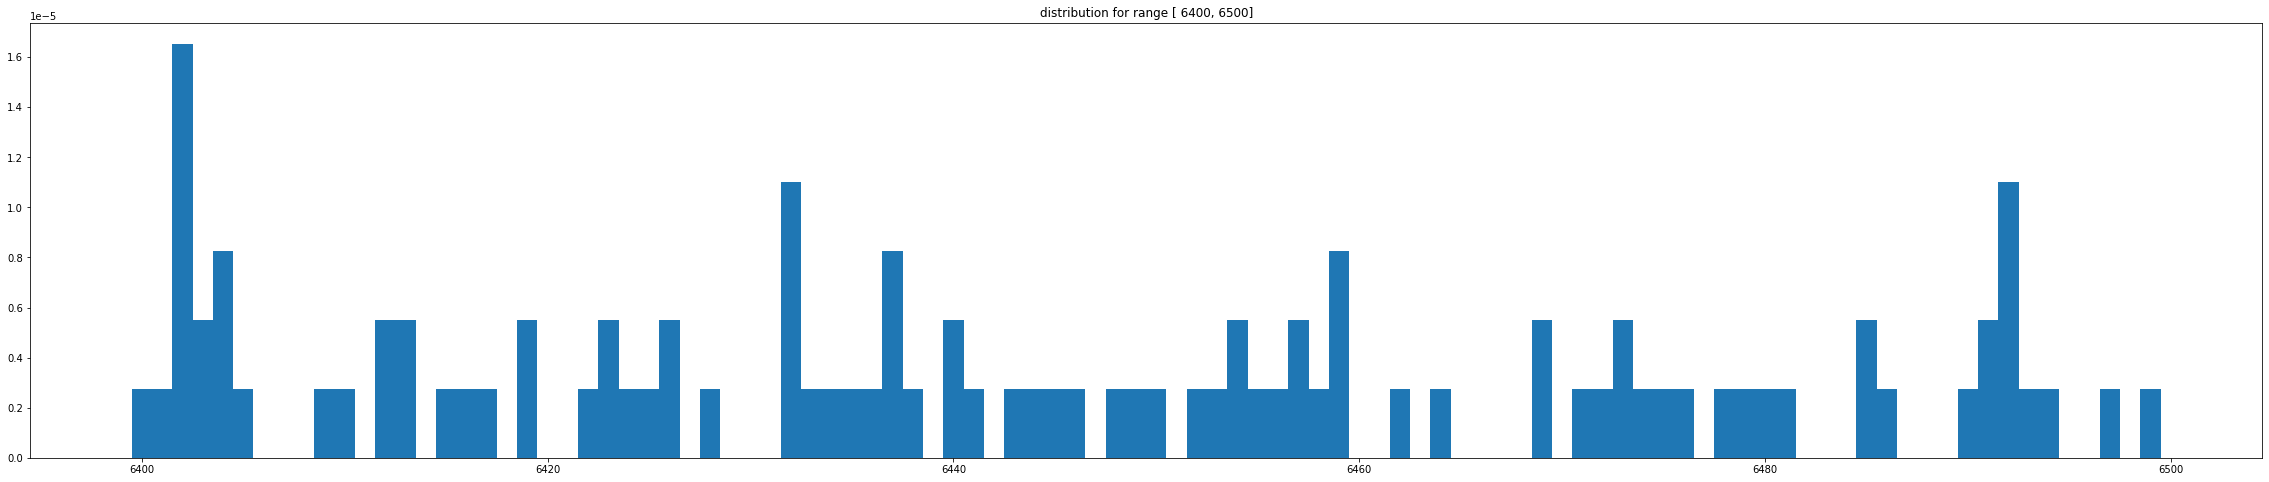

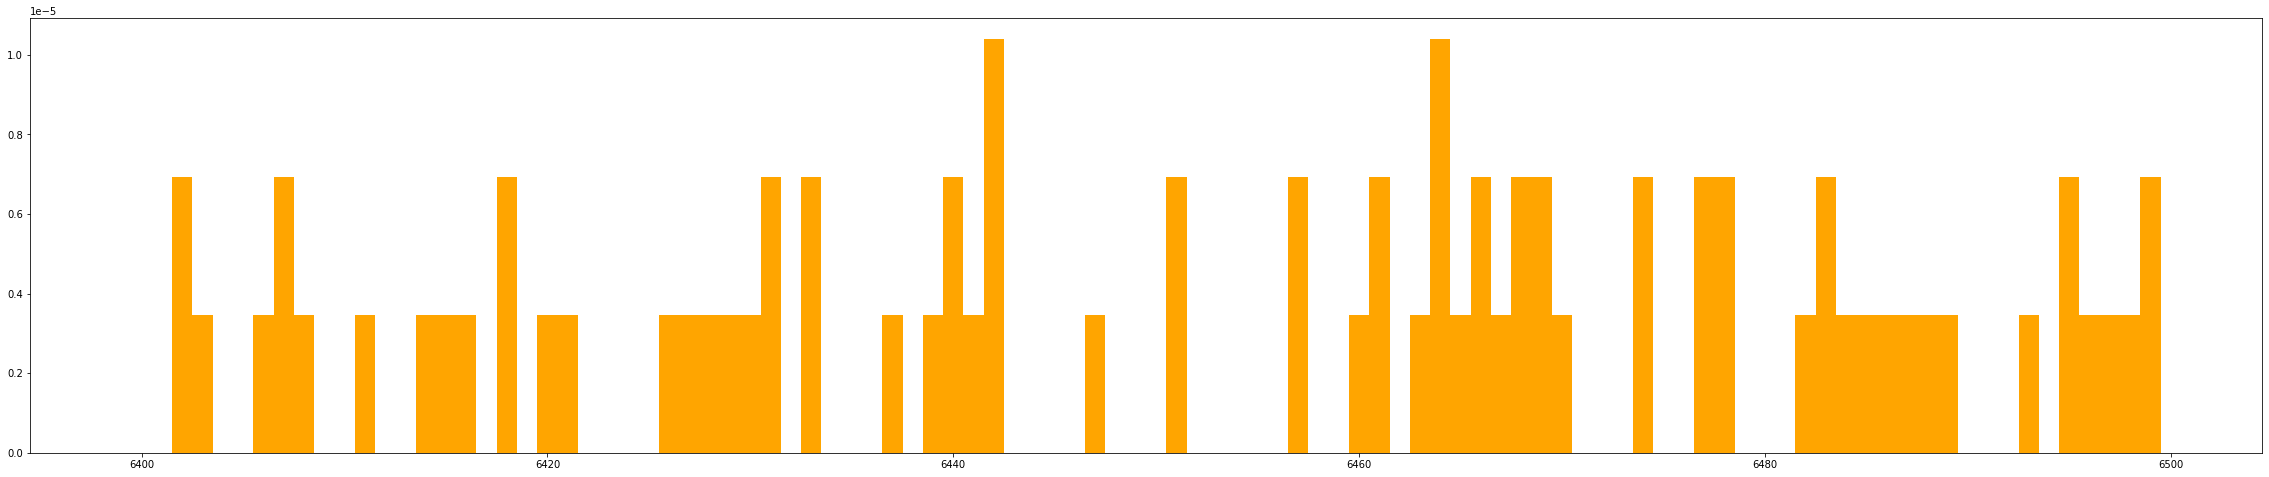

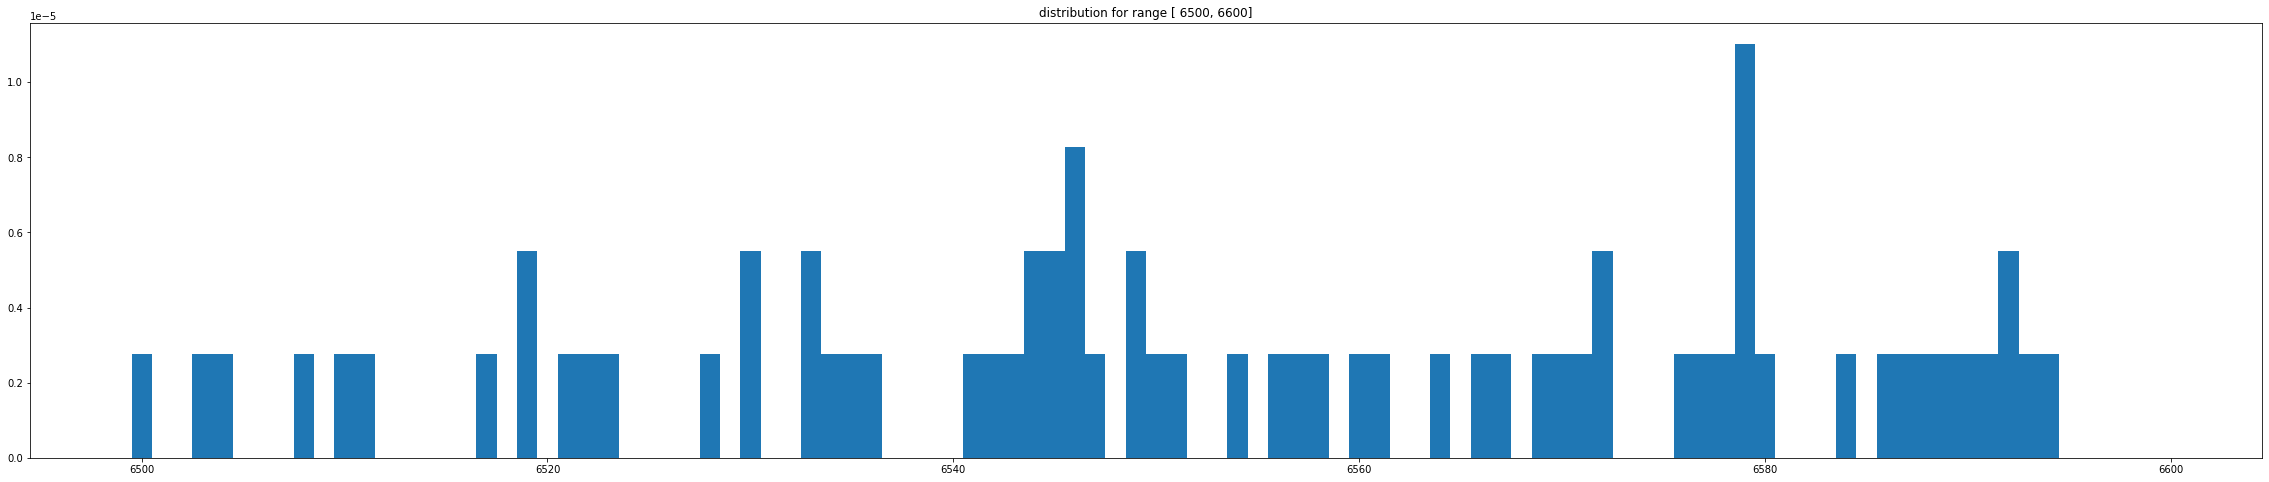

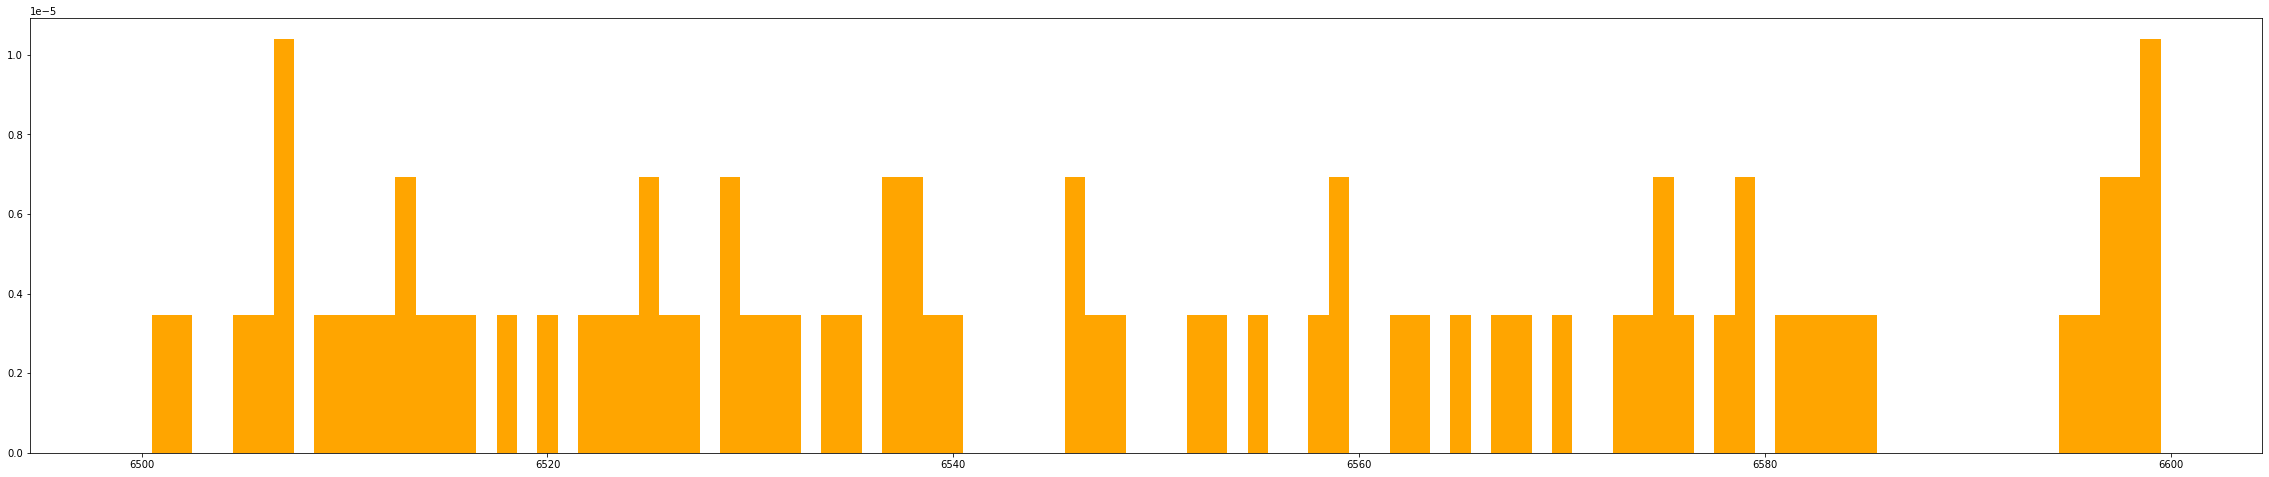

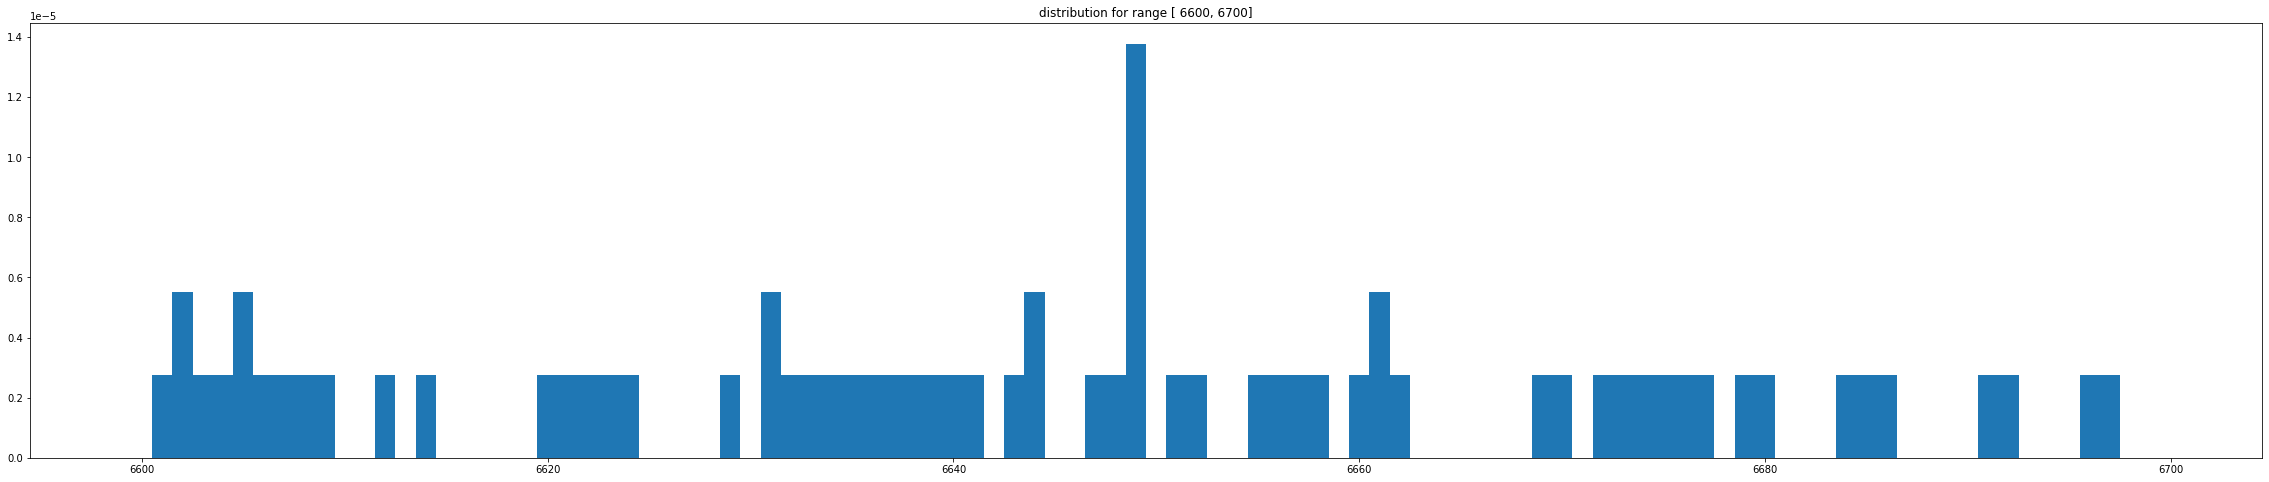

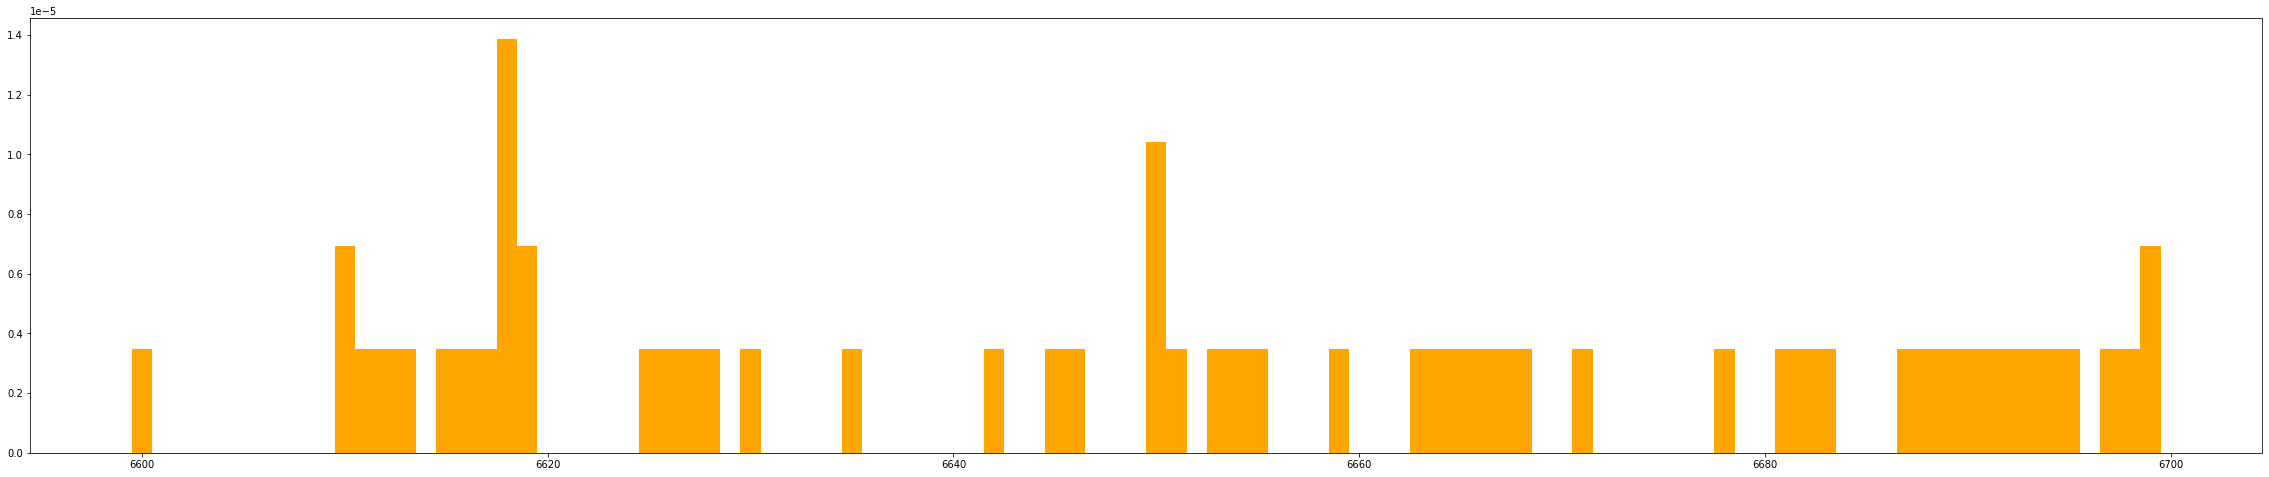

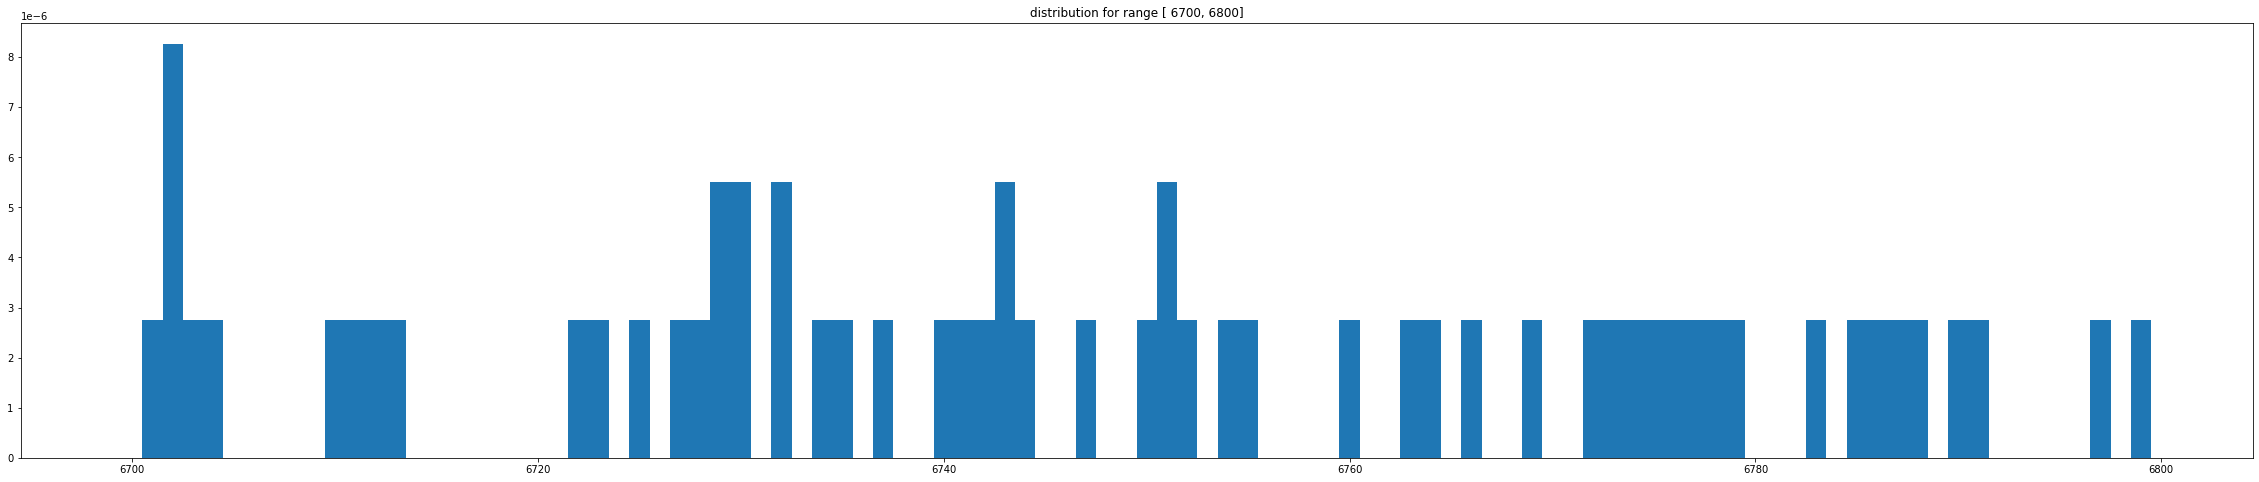

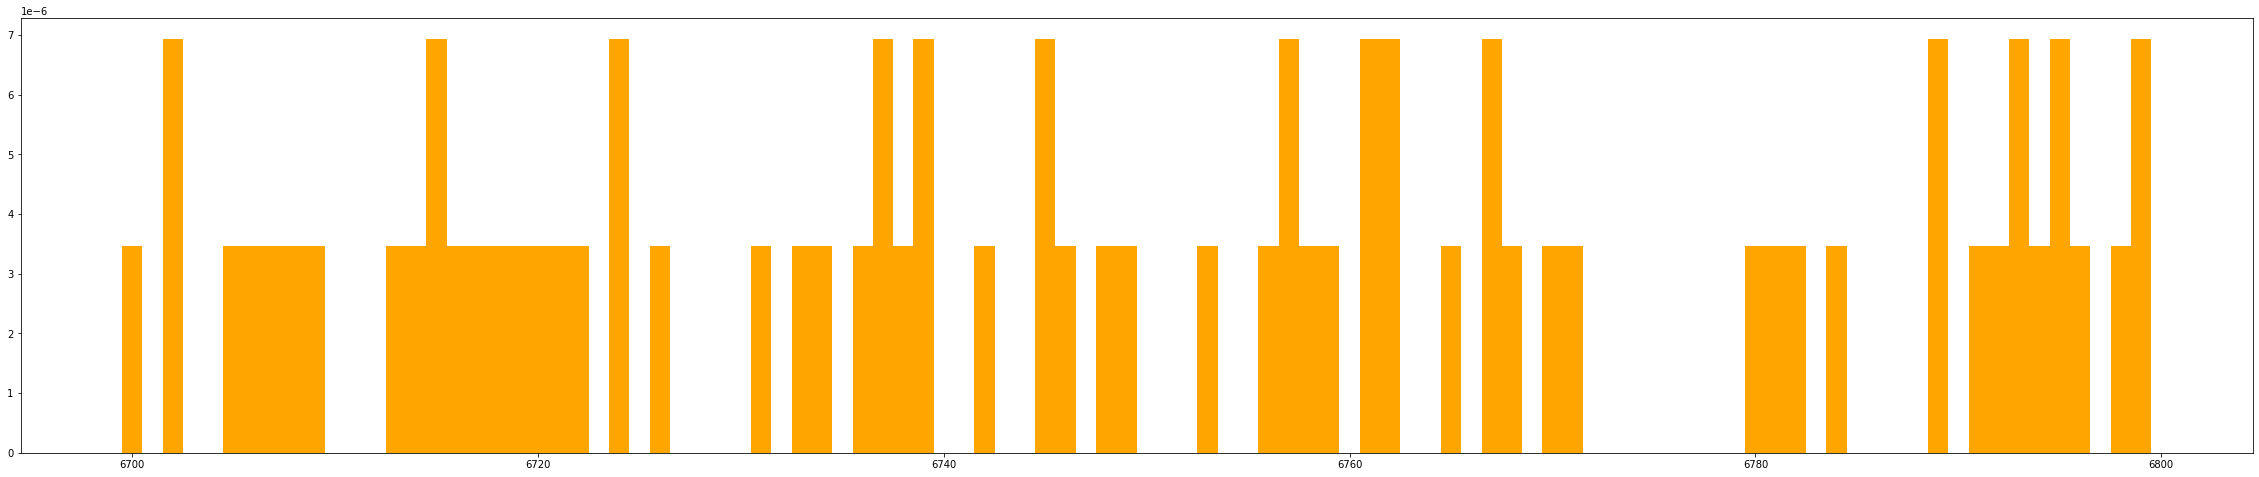

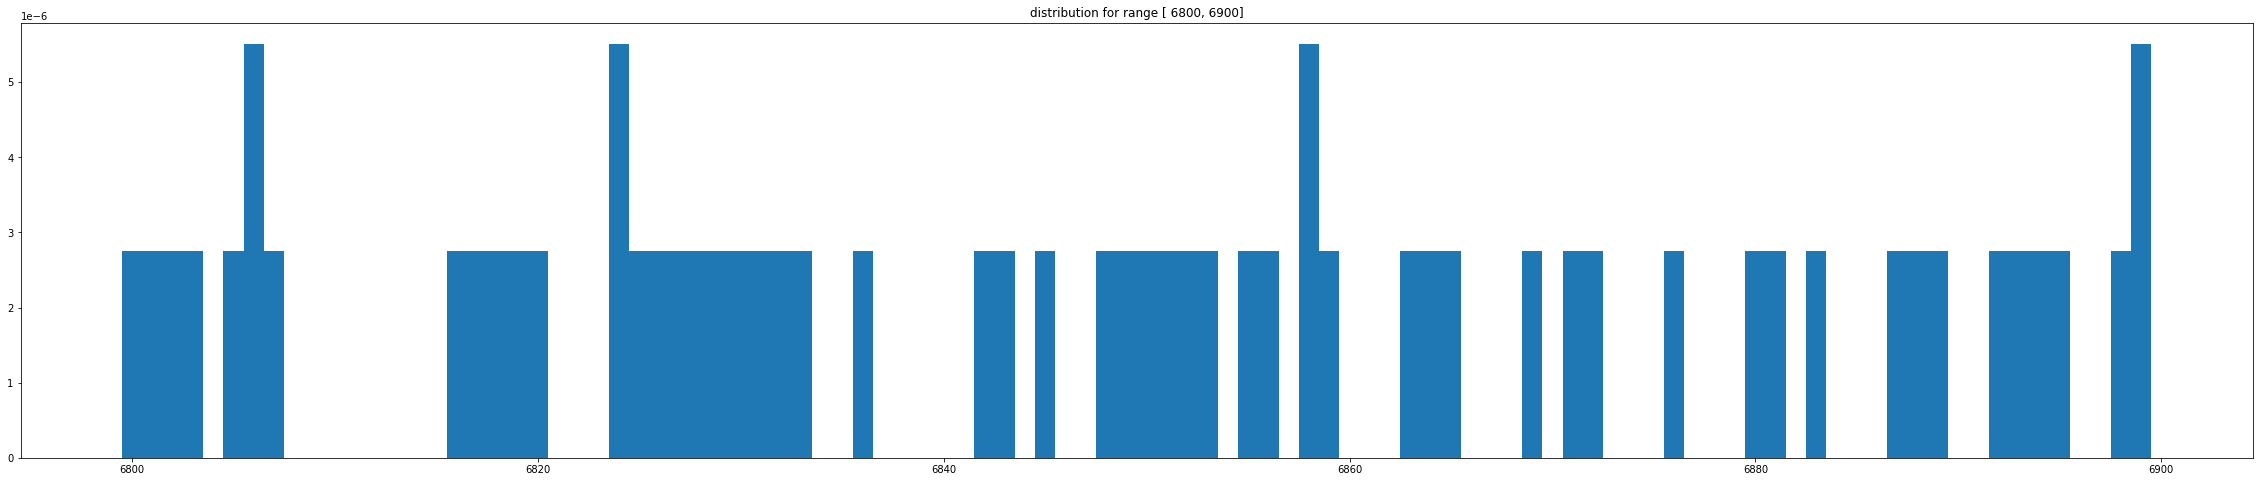

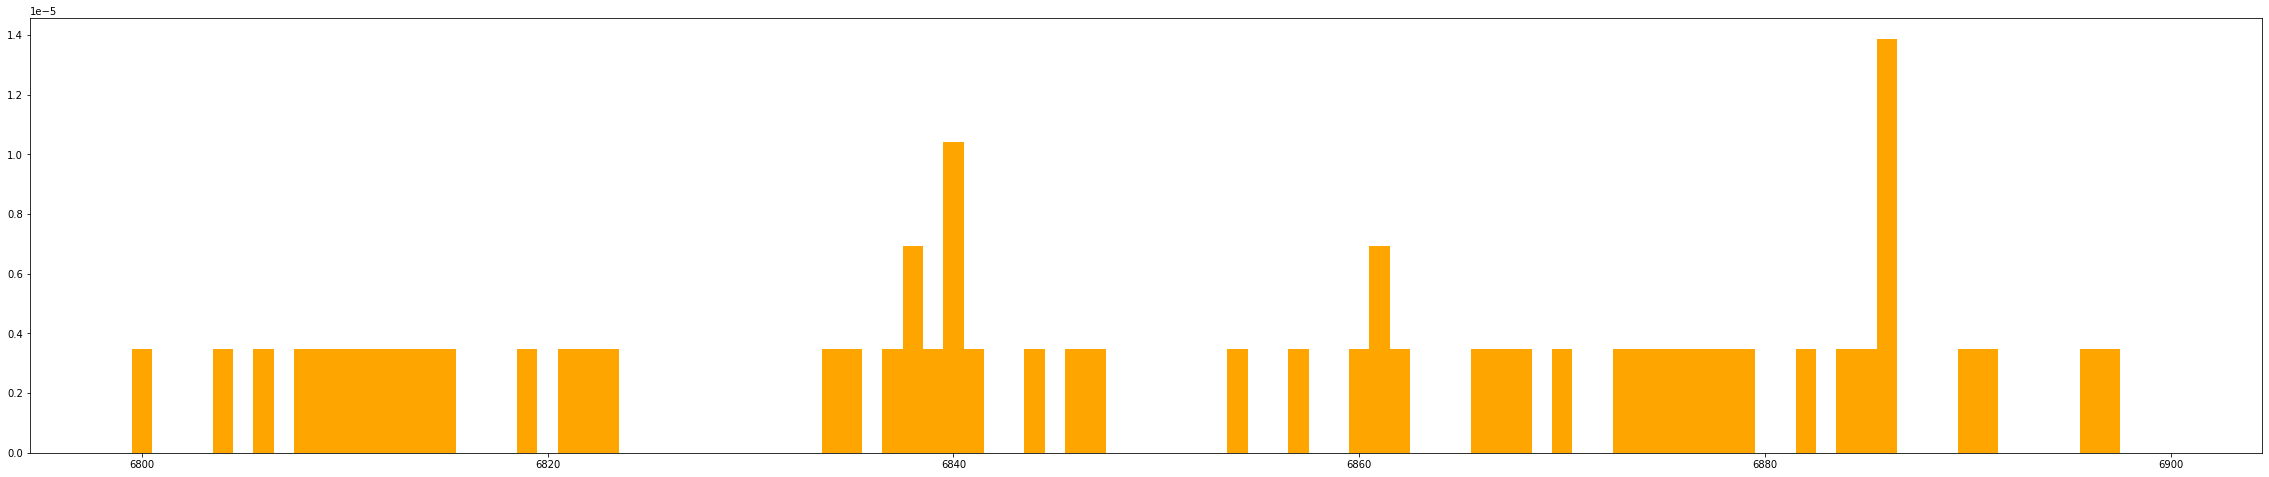

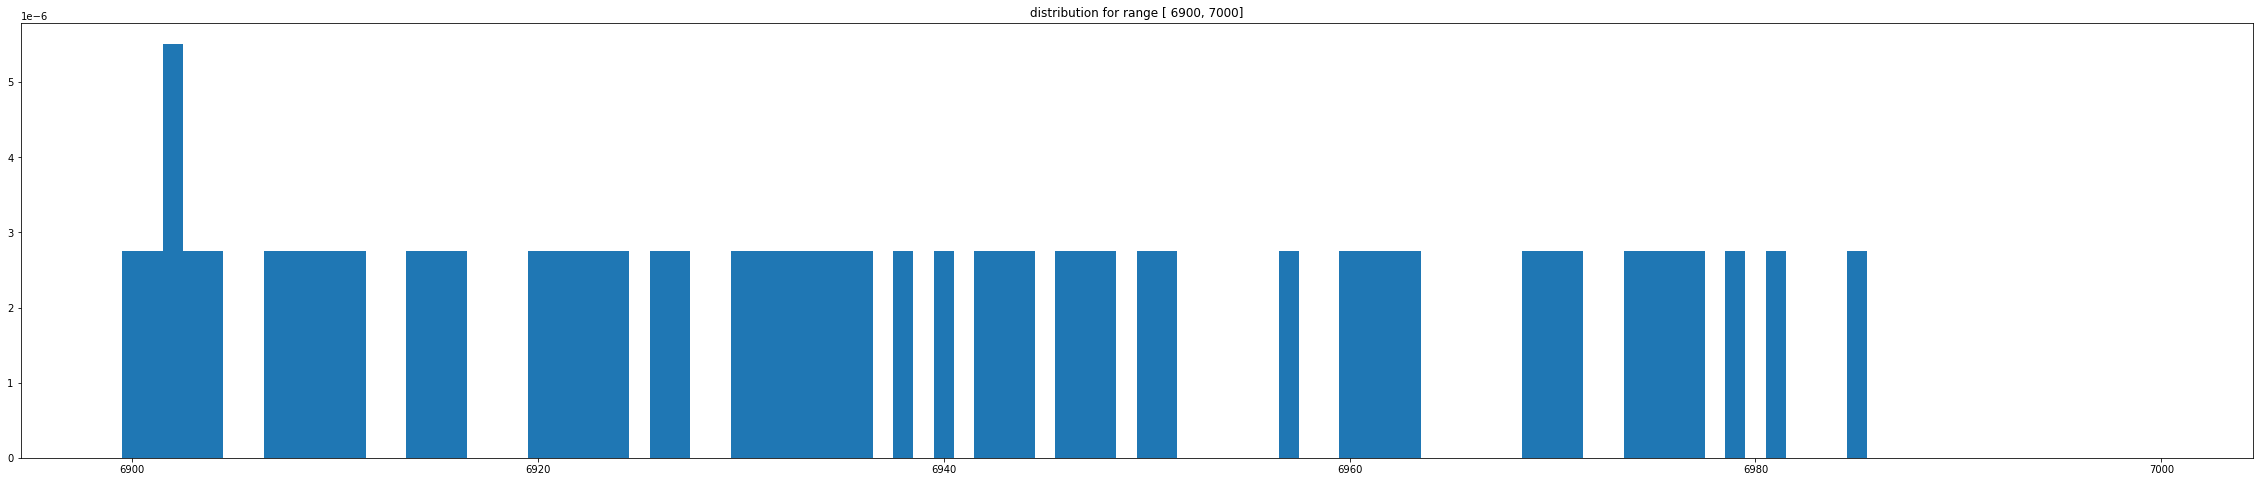

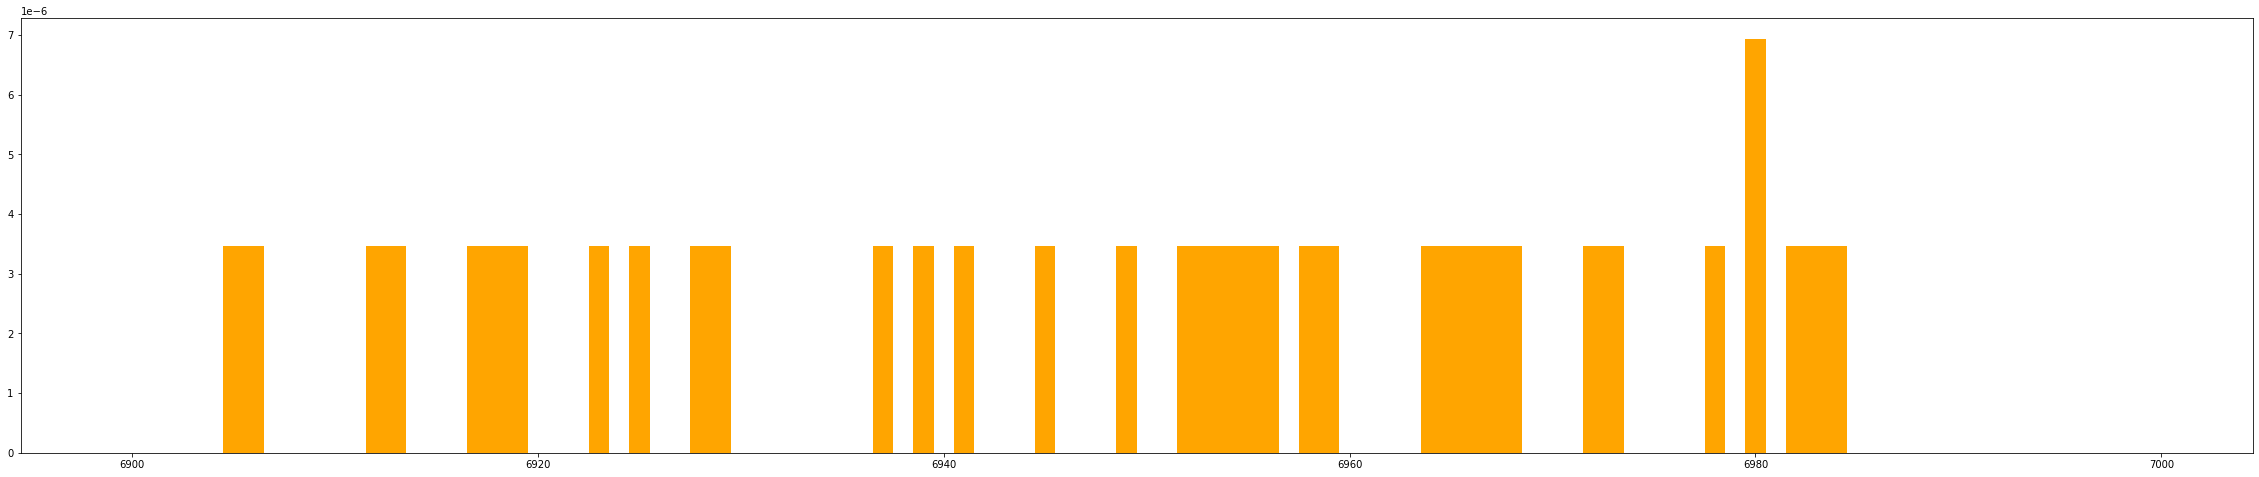

In [4]:
male_codes = [item for sublist in male_df['ICD codes'] for item in sublist]
female_codes = [item for sublist in female_df['ICD codes'] for item in sublist]

bin_width = 1

max_code = 6985
gap = 100
for begin in range(0, max_code, 100):
    plt.figure(figsize=(40,8)) 
    hist, bins = np.histogram(male_codes, bins=range(begin, begin+gap+1, bin_width))
    hist = [x / len(male_codes) for x in hist]
    widths = np.diff(bins)
    plt.bar(bins[:-1], hist, widths)
    plt.title("distribution for range [ " + str(begin)+", " + str(begin+gap) + "]")

    plt.figure(figsize=(40,8)) 
    hist, bins = np.histogram(female_codes, bins=range(begin, begin+gap+1, bin_width))
    hist = [x / len(female_codes) for x in hist]
    widths = np.diff(bins)
    plt.bar(bins[:-1], hist, widths, color='orange')
    plt.show()


In [5]:
""" 
To quantify the male vs female density differences numerically 
"""

male_hist, _ = np.histogram(male_codes, bins=range(0, max_code+1, bin_width))
male_hist = [x / len(male_codes) for x in male_hist]
female_hist, _ = np.histogram(female_codes, bins=range(0, max_code+1, bin_width))
female_hist = [x / len(female_codes) for x in female_hist]

diff_codes = []
for i in range(len(male_hist)):
    male_prob = male_hist[i]
    female_prob = female_hist[i]
    if abs(male_prob-female_prob) > 0.001: # quantify as significant difference in densities
        diff_codes.append(i)

print("codes with significant different probablities are:", diff_codes)


codes with significant different probablities are: [7, 8, 9, 11, 12, 13, 18, 19, 21, 23, 28, 29, 30, 31, 57, 59, 63, 65, 70, 71, 82, 83, 103, 107, 112, 124, 183, 193, 203, 206, 219, 248, 253, 256, 270, 295, 298, 320, 370, 373, 444, 446, 552, 565, 867]


In [ ]:
""" 
Plot correlation between male code densities and female code densities (per visit)

Refer to https://stackoverflow.com/questions/72195177/correlation-matrix-in-plotly
dataframe dimension is (# of visits) x (# of ICD codes), if code is present, then 1 
"""
